# Robyn: Marketing Mix Modeling Application

This notebook demonstrates the usage of Robyn, a Marketing Mix Modeling (MMM) application. We'll go through the main steps of initializing the model, running it, and performing budget allocation.



## 1. Import Required Libraries and Create Synthetic Data

First, let's import the necessary libraries and create some synthetic data for our demonstration.

In [1]:
import sys

sys.path.append("/Users/yijuilee/robynpy_release_reviews/Robyn/python/src")

import pandas as pd
import numpy as np
from robyn.robyn import Robyn
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters, ChannelHyperparameters
from robyn.data.entities.calibration_input import (
    CalibrationInput,
    ChannelCalibrationData,
)
from robyn.data.entities.enums import AdstockType, DependentVarType, CalibrationScope

2024-11-30 21:07:37,125 - robyn - INFO - Logging is set up to console only.
/Users/yijuilee/robynpy_release_reviews/robynvenv_py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.1 Load simulated data.

You need to replace this with real data.

In [2]:
# Read the simulated data and holidays data
dt_simulated_weekly = pd.read_csv("resources/dt_simulated_weekly.csv")

print("Simulated Data...")
dt_simulated_weekly.head()

Simulated Data...


DATE       revenue          tv_S     ooh_S       print_S  \
0  2015-11-23  2.754372e+06  22358.346667       0.0  12728.488889   
1  2015-11-30  2.584277e+06  28613.453333       0.0      0.000000   
2  2015-12-07  2.547387e+06      0.000000  132278.4    453.866667   
3  2015-12-14  2.875220e+06  83450.306667       0.0  17680.000000   
4  2015-12-21  2.215953e+06      0.000000  277336.0      0.000000   

     facebook_I  search_clicks_P     search_S  competitor_sales_B  \
0  2.430128e+07         0.000000     0.000000             8125009   
1  5.527033e+06      9837.238486  4133.333333             7901549   
2  1.665159e+07     12044.119653  3786.666667             8300197   
3  1.054977e+07     12268.070319  4253.333333             8122883   
4  2.934090e+06      9467.248023  3613.333333             7105985   

    facebook_S events    newsletter  
0  7607.132915     na  19401.653846  
1  1141.952450     na  14791.000000  
2  4256.375378     na  14544.000000  
3  2800.490677     na   2800.000000  
4   689.582605     na  15478.000000

In [3]:
dt_prophet_holidays = pd.read_csv("resources/dt_prophet_holidays.csv")

print("Holidays Data...")
dt_prophet_holidays.head()

Holidays Data...


ds           holiday country  year
0  1995-01-01    New Year's Day      AD  1995
1  1995-01-06          Epiphany      AD  1995
2  1995-02-28          Carnival      AD  1995
3  1995-03-14  Constitution Day      AD  1995
4  1995-04-14       Good Friday      AD  1995

## 2.2. Initialize Robyn

Now, let's initialize Robyn with our synthetic data and configuration.

In [4]:
# Initialize Robyn
robyn = Robyn(working_dir="output")

# Create MMMData
mmm_data_spec = MMMData.MMMDataSpec(
    dep_var="revenue",
    dep_var_type="revenue",
    date_var="DATE",
    context_vars=["competitor_sales_B", "events"],
    paid_media_spends=["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    paid_media_vars=["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
    organic_vars=["newsletter"],
    window_start="2016-01-01",
    window_end="2018-12-31",
)

mmm_data = MMMData(data=dt_simulated_weekly, mmmdata_spec=mmm_data_spec)

# Create HolidaysData (using dummy data for demonstration)
holidays_data = HolidaysData(
    dt_holidays=dt_prophet_holidays,
    prophet_vars=["trend", "season", "holiday"],
    prophet_country="DE",
    prophet_signs=["default", "default", "default"],
)

# Create Hyperparameters
hyperparameters = Hyperparameters(
    hyperparameters={
        "facebook_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "print_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "tv_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.3, 0.8],
        ),
        "search_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "ooh_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "newsletter": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
    },
    adstock=AdstockType.GEOMETRIC,
    lambda_=[0, 1],
    train_size=[0.5, 0.8],
)


## Calibration is not supported yet
# Create CalibrationInput (using dummy data for demonstration)
# calibration_input = CalibrationInput({
#     "tv_spend": ChannelCalibrationData(
#         lift_start_date=pd.Timestamp("2022-03-01"),
#         lift_end_date=pd.Timestamp("2022-03-15"),
#         lift_abs=10000,
#         spend=50000,
#         confidence=0.9,
#         metric="revenue",
#         calibration_scope=CalibrationScope.IMMEDIATE
#     )
# })

# Initialize Robyn
robyn.initialize(
    mmm_data=mmm_data,
    holidays_data=holidays_data,
    hyperparameters=hyperparameters,
)

print("Robyn initialized successfully!")

INFO: Initialized Robyn in output
2024-11-30 21:07:38,900 - robyn.robyn - INFO - Initialized Robyn in output
INFO: Validating input data
2024-11-30 21:07:38,904 - robyn.robyn - INFO - Validating input data
2024-11-30 21:07:38,905 - robyn.data.validation.mmmdata_validation - INFO - Starting complete MMMData validation
2024-11-30 21:07:38,906 - robyn.data.validation.mmmdata_validation - INFO - Missing and infinite value check passed successfully
2024-11-30 21:07:38,907 - robyn.data.validation.mmmdata_validation - INFO - No-variance check passed successfully
2024-11-30 21:07:38,908 - robyn.data.validation.mmmdata_validation - INFO - Variable names validation passed successfully
2024-11-30 21:07:38,909 - robyn.data.validation.mmmdata_validation - INFO - Date variable validation passed successfully
2024-11-30 21:07:38,909 - robyn.data.validation.mmmdata_validation - INFO - Dependent variable validation passed successfully
2024-11-30 21:07:38,909 - robyn.data.validation.mmmdata_validation - 

Adjusted window_start to the closest date in the data: 2016-01-04 00:00:00
Adjusted window_end to the closest date in the data: 2018-12-31 00:00:00
Robyn initialized successfully!


## Feature Engineering

INFO: Performing feature engineering
2024-11-30 21:07:38,939 - robyn.robyn - INFO - Performing feature engineering
2024-11-30 21:07:38,940 - robyn.modeling.feature_engineering - INFO - Starting feature engineering process
2024-11-30 21:07:38,942 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
2024-11-30 21:07:38,942 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
/Users/yijuilee/robynpy_release_reviews/robynvenv_py3.10/lib/python3.10/site-packages/prophet/forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
2024-11-30 21:07:39,571 - cmdstanpy - DEBUG - input tempfile: /var/folders/gm/g5cpl7110m96nfd1qr1xwnwc0000gn/T/tmpn

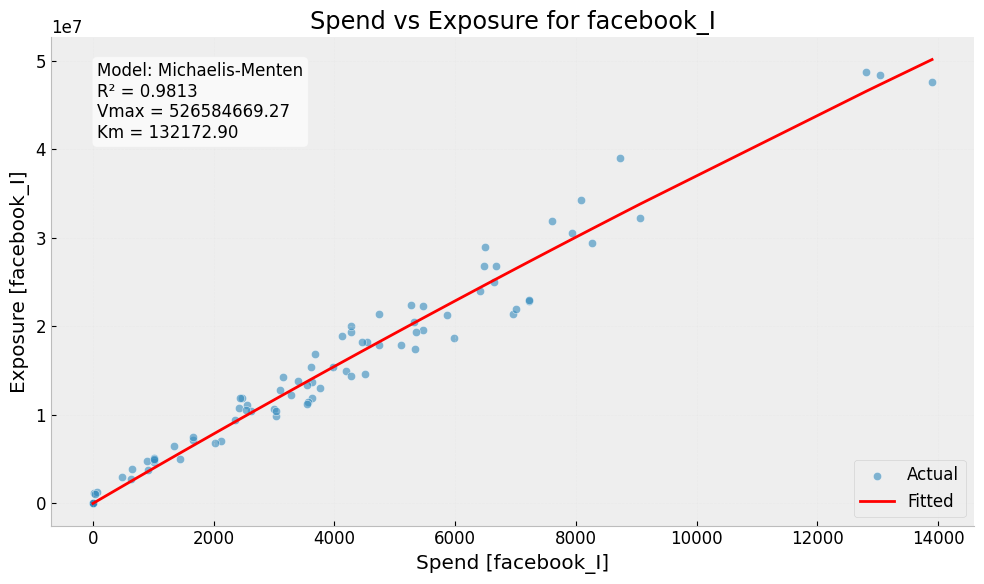

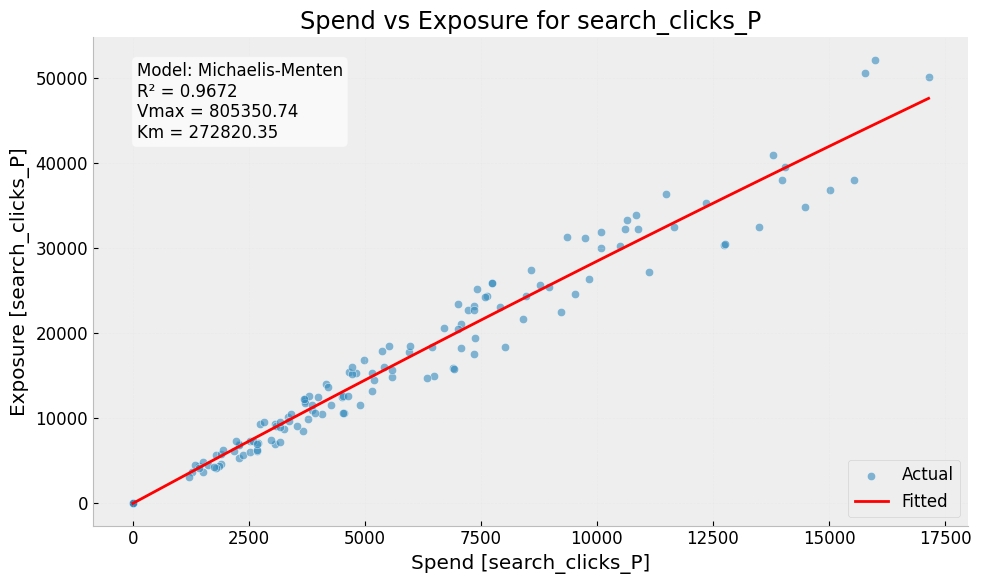

FeaturizedMMMData(dt_mod=            ds       dep_var         trend        season      holiday  \
0   2015-11-23  2.754372e+06  1.715494e+06  1.126399e+06       0.0000   
1   2015-11-30  2.584277e+06  1.716691e+06  9.011866e+05       0.0000   
2   2015-12-07  2.547387e+06  1.717888e+06  7.162881e+05       0.0000   
3   2015-12-14  2.875220e+06  1.719085e+06  6.931421e+05       0.0000   
4   2015-12-21  2.215953e+06  1.720283e+06  7.855960e+05  511758.5616   
..         ...           ...           ...           ...          ...   
203 2019-10-14  2.456240e+06  1.733547e+06  7.397506e+05       0.0000   
204 2019-10-21  2.182825e+06  1.732738e+06  7.952188e+05       0.0000   
205 2019-10-28  2.377707e+06  1.731930e+06  8.694171e+05       0.0000   
206 2019-11-04  2.732825e+06  1.731122e+06  1.015043e+06       0.0000   
207 2019-11-11  2.767788e+06  1.730314e+06  1.174804e+06       0.0000   

     competitor_sales_B  events          tv_S          ooh_S       print_S  \
0               8125

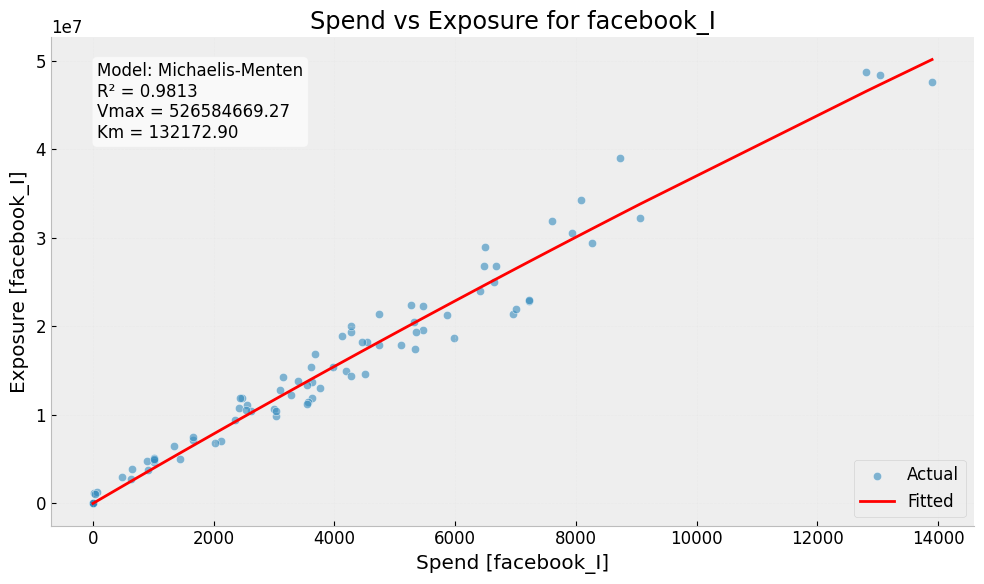

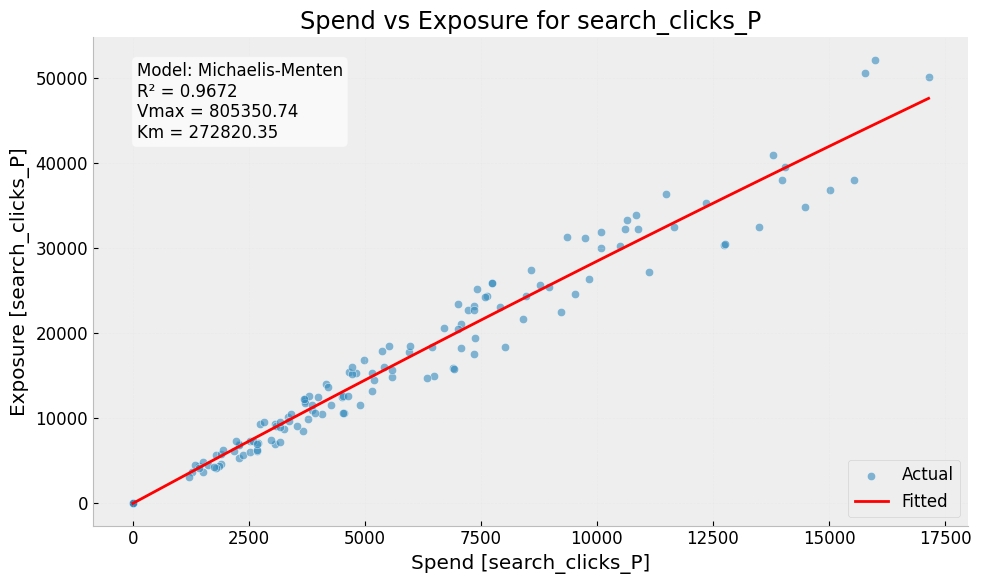

In [5]:
%matplotlib inline
robyn.feature_engineering()

## 3. Run Robyn Model

After initialization, we can run the Robyn model.

In [6]:
%matplotlib inline
from robyn.modeling.entities.enums import Models, NevergradAlgorithm
from robyn.modeling.entities.modelrun_trials_config import TrialsConfig


trials_config = TrialsConfig(iterations=2000, trials=5)

# Run the model
robyn.train_models(trials_config=trials_config,
                    ts_validation=True,  # changed from True to False -> deacitvate
                    add_penalty_factor=False,
                    rssd_zero_penalty=True,
                    cores=8,
                    nevergrad_algo=NevergradAlgorithm.TWO_POINTS_DE,
                    model_name=Models.RIDGE,
                )

INFO: Training models
2024-11-30 21:07:40,453 - robyn.robyn - INFO - Training models
2024-11-30 21:07:40,455 - robyn.modeling.base_model_executor - INFO - Initializing BaseModelExecutor
2024-11-30 21:07:40,456 - robyn.modeling.model_executor - INFO - Starting model execution with model_name=Models.RIDGE
2024-11-30 21:07:40,456 - robyn.modeling.base_model_executor - INFO - Input validation successful
2024-11-30 21:07:40,456 - robyn.modeling.base_model_executor - INFO - Preparing hyperparameters
2024-11-30 21:07:40,457 - robyn.modeling.base_model_executor - INFO - Completed hyperparameter preparation with 20 parameters to optimize
2024-11-30 21:07:40,457 - robyn.modeling.model_executor - INFO - Initializing Ridge model builder
2024-11-30 21:07:40,458 - robyn.modeling.model_executor - INFO - Building models with configured parameters
2024-11-30 21:07:40,458 - robyn.modeling.ridge.ridge_data_builder - INFO - Collecting hyperparameters for optimization...
Running trial 1 of total 5 trials: 


Evaluation Debug (trial 1, iteration 0):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.2835963773323633, 'facebook_S_alphas': 1.8435644690538955, 'facebook_S_gammas': 0.5188954920312618, 'print_S_thetas': 0.34703050960488074, 'print_S_alphas': 2.006508497068446, 'print_S_gammas': 0.5127114369662895, 'tv_S_thetas': 0.7124628364956679, 'tv_S_alphas': 1.0341682240607177, 'tv_S_gammas': 0.5641327143712191, 'search_S_thetas': 0.2657160403908986, 'search_S_alphas': 2.9593932808464682, 'search_S_gammas': 0.39741808719231064, 'ooh_S_thetas': 0.19944960841968046, 'ooh_S_alphas': 1.039077283877158, 'ooh_S_gammas': 0.6181917021731164, 'newsletter_thetas': 0.25064092981890496, 'newsletter_alphas': 1.5409105967498742, 'newsletter_gammas': 0.5774720839637223, 'lambda': 0.556948336053984, 'train_size': 0.6921455493357966}

Lambda Calculation Debug (iteration 0):
n_samples: 143
x_scaled mean abs: 0.747393
y_scaled mean abs: 0.844770
Scale factor: 0.631375
lambda_hp: 0.556948


Running trial 1 of total 5 trials:   0%|▏                                  


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 411888768585.855835
RMSE: 108481.567702
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1095768.024813, 30453.641853
  1140006.666667, 1112444.930363, 27561.736304
  1479303.333333, 1435230.984391, 44072.348942
  1647193.333333, 1643374.888847, 3818.444487
  2009478.333333, 1917894.325158, 91584.008175
Final NRMSE: 0.052106

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 268336368202.417755
RMSE: 86335.323047
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1405380.933504, 20119.066496
  1156860.000000, 1165890.133514, -9030.133514
  1252230.000000, 1253039.205215, -809.205215
  1209373.333333, 1181209.183213, 28164.150120
  1183801.666667, 1211551.675274, -27750.008607
Final NRMSE: 0.041200

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 315005392425.050842
RMSE: 112250.682390
y_

Running trial 1 of total 5 trials:   1%|▏                                  


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 263630571654.797394
RMSE: 107061.658719
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3211690.104808, -3540.104808
  2746851.666667, 2632729.986312, 114121.680354
  2566165.000000, 2691370.511516, -125205.511516
  2554828.333333, 2501291.270110, 53537.063223
  1959706.666667, 1959334.764303, 371.902363
Final NRMSE: 0.043094

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 350358049171.182068
RMSE: 120823.226446
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 774356.765824, 128768.234176
  672250.000000, 908671.545262, -236421.545262
  739783.333333, 652148.329921, 87635.003413
  831833.333333, 735602.428952, 96230.904382
  939896.666667, 832572.276034, 107324.390632
Final NRMSE: 0.057657

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 274094777250.389130
RMSE: 109165.764910
y_true

Running trial 1 of total 5 trials:   1%|▎                                  


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 437516808834.843872
RMSE: 110241.755655
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  1056811.666667, 1024414.670367, 32396.996299
  932326.666667, 916836.347336, 15490.319330
  1126221.666667, 1098056.672911, 28164.993755
  1140006.666667, 1116799.881379, 23206.785287
  1479303.333333, 1439253.757799, 40049.575534
Final NRMSE: 0.048440

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 300158803683.870605
RMSE: 90068.863097
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1539734.701412, -58974.701412
  1425500.000000, 1399724.035057, 25775.964943
  1156860.000000, 1168962.742997, -12102.742997
  1252230.000000, 1243047.043903, 9182.956097
  1209373.333333, 1171444.377299, 37928.956035
Final NRMSE: 0.042981

NRMSE Calculation Debug (iteration 0):
n: 49
RSS: 9383180939504.525391
RMSE: 437599.689855
y_

Running trial 1 of total 5 trials:   1%|▎                                  


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 401558546121.835388
RMSE: 108676.333551
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1650625.404881, -3432.071548
  2009478.333333, 1914314.090829, 95164.242504
  1523443.333333, 1557451.418303, -34008.084970
  1420118.333333, 1468634.456474, -48516.123140
  1673551.666667, 1822266.487275, -148714.820609
Final NRMSE: 0.052980

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 264133200902.726746
RMSE: 88139.795529
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1254813.566846, -2583.566846
  1209373.333333, 1188290.156503, 21083.176830
  1183801.666667, 1189150.377960, -5348.711293
  918593.333333, 999539.202958, -80945.869625
  2303595.000000, 2385917.011394, -82322.011394
Final NRMSE: 0.042061

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 3214297321712.145996
RMSE: 264340.743

Running trial 1 of total 5 trials:   1%|▍                                  


NRMSE Calculation Debug (iteration 0):
n: 45
RSS: 3318241926175.701660
RMSE: 271548.723935
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1656268.333333, 1785921.889170, -129653.555836
  1703790.000000, 1729874.226226, -26084.226226
  1488115.000000, 1640197.151982, -152082.151982
  1727330.000000, 1650996.770413, 76333.229587
  1208246.666667, 1371654.270495, -163407.603829
Final NRMSE: 0.111826

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 3722184761563.705078
RMSE: 284459.241428
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2746851.666667, 2923405.701147, -176554.034480
  2566165.000000, 2938909.428948, -372744.428948
  2554828.333333, 2743818.153253, -188989.819919
  1959706.666667, 2193147.554221, -233440.887555
  2424486.666667, 2449686.244291, -25199.577624
Final NRMSE: 0.135745

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 271212448018.434814
RMS

Running trial 1 of total 5 trials:   1%|▍                                  


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 270119264735.791718
RMSE: 108371.194780
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2671308.684192, 75542.982475
  2566165.000000, 2716631.413044, -150466.413044
  2554828.333333, 2518720.947228, 36107.386105
  1959706.666667, 1959788.576873, -81.910206
  2424486.666667, 2222048.216010, 202438.450657
Final NRMSE: 0.053568

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 309629906569.815247
RMSE: 116026.591137
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 925192.813685, -252942.813685
  739783.333333, 673045.536913, 66737.796421
  831833.333333, 755153.877232, 76679.456102
  939896.666667, 855423.441665, 84473.225002
  946510.000000, 856548.558920, 89961.441080
Final NRMSE: 0.055368

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 472155149509.377197
RMSE: 119614.931356
y_true r

Running trial 1 of total 5 trials:   2%|▌                                  


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 313883879287.332153
RMSE: 109874.732744
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2610305.980005, 55934.019995
  2559550.000000, 2707706.536443, -148156.536443
  2653766.666667, 2457617.898244, 196148.768423
  2144703.333333, 2305273.761387, -160570.428053
  2451681.666667, 2545292.034642, -93610.367975
Final NRMSE: 0.047411

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 286438371856.037537
RMSE: 102999.167896
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 884439.446284, 31352.220382
  746205.000000, 702384.943390, 43820.056610
  723785.000000, 628456.950957, 95328.049043
  903125.000000, 812323.287220, 90801.712780
  672250.000000, 938819.340905, -266569.340905
Final NRMSE: 0.049152

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 3003530804548.148438
RMSE: 255527.196057
y_

Running trial 1 of total 5 trials:   2%|▋                                  


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 355874493475.321289
RMSE: 100835.721204
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1119682.127099, 6539.539567
  1140006.666667, 1106556.393468, 33450.273198
  1479303.333333, 1439441.164279, 39862.169054
  1647193.333333, 1631492.587264, 15700.746070
  2009478.333333, 1915510.407907, 93967.925427
Final NRMSE: 0.048434

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 312058985038.275879
RMSE: 93103.733222
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1383120.924895, 42379.075105
  1156860.000000, 1144871.936986, 11988.063014
  1252230.000000, 1232282.203136, 19947.796864
  1209373.333333, 1161666.980323, 47706.353010
  1183801.666667, 1192275.778507, -8474.111841
Final NRMSE: 0.044430

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 308069303360.208374
RMSE: 111007.982300
y_

Running trial 1 of total 5 trials:   2%|▋                                  


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 277071307422.769470
RMSE: 109756.906769
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3287168.658865, -79018.658865
  2746851.666667, 2686876.412477, 59975.254189
  2566165.000000, 2707199.964568, -141034.964568
  2554828.333333, 2499553.946192, 55274.387141
  1959706.666667, 1928418.653022, 31288.013644
Final NRMSE: 0.044179

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 324217593643.853638
RMSE: 116228.509419
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 784347.499071, 118777.500929
  672250.000000, 914433.294445, -242183.294445
  739783.333333, 668647.470646, 71135.862687
  831833.333333, 751890.374834, 79942.958499
  939896.666667, 848257.058998, 91639.607669
Final NRMSE: 0.055465

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 405024461243.663940
RMSE: 109144.327174
y_tru

Running trial 1 of total 5 trials:   2%|▊                                  


NRMSE Calculation Debug (iteration 0):
n: 49
RSS: 9315901553515.142578
RMSE: 436028.026470
y_true range: [779838.333333, 3109461.666667]
scale: 2329623.333333
First 5 pairs (true, pred, residual):
  3109461.666667, 2773026.615812, 336435.050855
  2228128.333333, 2599870.977027, -371742.643694
  2202593.333333, 2234307.558263, -31714.224930
  1918293.333333, 2107156.194834, -188862.861500
  1862458.333333, 2033661.458447, -171203.125114
Final NRMSE: 0.187167

NRMSE Calculation Debug (iteration 0):
n: 49
RSS: 32083784080896.875000
RMSE: 809179.277844
y_true range: [672250.000000, 3208150.000000]
scale: 2535900.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 3137951.013044, -686269.346377
  2469486.666667, 3155380.053150, -685893.386484
  3208150.000000, 3883219.933966, -675069.933966
  2746851.666667, 3323305.425276, -576453.758609
  2566165.000000, 3371046.249427, -804881.249427
Final NRMSE: 0.319090

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 324014700313.223450


Running trial 1 of total 5 trials:   3%|▉                                  


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 406070791703.689819
RMSE: 106206.140190
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 918197.406486, 14129.260180
  1126221.666667, 1096698.256600, 29523.410066
  1140006.666667, 1122113.294702, 17893.371965
  1479303.333333, 1448028.836032, 31274.497301
  1647193.333333, 1649554.689637, -2361.356304
Final NRMSE: 0.046667

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 290402209178.077087
RMSE: 89814.965528
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1395219.517033, 30280.482967
  1156860.000000, 1154217.863192, 2642.136808
  1252230.000000, 1237084.247962, 15145.752038
  1209373.333333, 1162869.525445, 46503.807888
  1183801.666667, 1150336.248264, 33465.418403
Final NRMSE: 0.042860

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 424716902859.122498
RMSE: 110157.925966
y_tru

Running trial 1 of total 5 trials:   3%|▉                                  


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 334655381739.325684
RMSE: 111331.234468
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2808604.703486, -39663.036819
  2666240.000000, 2551211.608875, 115028.391125
  2559550.000000, 2646167.372223, -86617.372223
  2653766.666667, 2477911.167564, 175855.499103
  2144703.333333, 2292539.402461, -147836.069128
Final NRMSE: 0.048040

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 281734278291.876343
RMSE: 102149.904061
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 850915.983498, 64875.683168
  746205.000000, 670342.903442, 75862.096558
  723785.000000, 612071.752267, 111713.247733
  903125.000000, 808685.882157, 94439.117843
  672250.000000, 927002.214438, -254752.214438
Final NRMSE: 0.048746

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 232804121833.752563
RMSE: 100607.744933
y_

Running trial 1 of total 5 trials:   3%|█                                  


NRMSE Calculation Debug (iteration 0):
n: 52
RSS: 4432431023779.583008
RMSE: 291957.288228
y_true range: [779838.333333, 3827520.000000]
scale: 3047681.666667
First 5 pairs (true, pred, residual):
  3303155.000000, 3138749.916847, 164405.083153
  3103743.333333, 3150360.505136, -46617.171803
  2793875.000000, 2704111.765418, 89763.234582
  2260396.666667, 2376414.536138, -116017.869471
  2399176.666667, 2384588.546444, 14588.120223
Final NRMSE: 0.095797

NRMSE Calculation Debug (iteration 0):
n: 52
RSS: 2886617377639.941895
RMSE: 235609.576730
y_true range: [672250.000000, 3208150.000000]
scale: 2535900.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2565819.262342, -6269.262342
  2653766.666667, 2363951.751314, 289814.915352
  2144703.333333, 2121737.584136, 22965.749197
  2451681.666667, 2348674.210106, 103007.456561
  2469486.666667, 2422136.322060, 47350.344607
Final NRMSE: 0.092910

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 414106734121.872742
RMSE: 107251.

Running trial 1 of total 5 trials:   3%|█▏                                 


NRMSE Calculation Debug (iteration 0):
n: 45
RSS: 2802519428329.171387
RMSE: 249556.024809
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1656268.333333, 1803720.810888, -147452.477555
  1703790.000000, 1726800.219184, -23010.219184
  1488115.000000, 1615059.076409, -126944.076409
  1727330.000000, 1641349.374834, 85980.625166
  1208246.666667, 1372791.011970, -164544.345303
Final NRMSE: 0.102769

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 2668624645180.866699
RMSE: 240860.082295
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2746851.666667, 2857785.557052, -110933.890386
  2566165.000000, 2933101.736223, -366936.736223
  2554828.333333, 2728101.752147, -173273.418814
  1959706.666667, 2164354.533187, -204647.866520
  2424486.666667, 2413797.526091, 10689.140575
Final NRMSE: 0.114939

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 358929901434.755249
RMSE

Running trial 1 of total 5 trials:   3%|█▏                                 


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 330640035959.427185
RMSE: 112769.341844
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2712739.572348, -153189.572348
  2653766.666667, 2463959.084519, 189807.582148
  2144703.333333, 2322224.250159, -177520.916825
  2451681.666667, 2565545.724011, -113864.057344
  2469486.666667, 2550131.588669, -80644.922003
Final NRMSE: 0.048660

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 280298910001.799988
RMSE: 103830.281266
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 704316.882933, 41888.117067
  723785.000000, 613465.832031, 110319.167969
  903125.000000, 792784.665905, 110340.334095
  672250.000000, 920130.287840, -247880.287840
  739783.333333, 667150.786264, 72632.547069
Final NRMSE: 0.049548

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 407470646796.529175
RMSE: 104941.508392

Running trial 1 of total 5 trials:   4%|█▎                                 


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 371146003157.780884
RMSE: 109418.699109
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2272912.028241, -128802.028241
  2058653.333333, 2197231.399309, -138578.065975
  2208345.000000, 2224356.449400, -16011.449400
  2603008.333333, 2552259.634523, 50748.698810
  2313193.333333, 2435907.798150, -122714.464817
Final NRMSE: 0.053341

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 325001142825.632202
RMSE: 102390.955817
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 975908.296325, -57314.962992
  2303595.000000, 2393056.501979, -89461.501979
  890675.000000, 1170509.449255, -279834.449255
  989913.333333, 951281.523220, 38631.810113
  915791.666667, 881080.868376, 34710.798291
Final NRMSE: 0.048861

NRMSE Calculation Debug (iteration 0):
n: 48
RSS: 12556979503272.539062
RMSE: 511472.1

Running trial 1 of total 5 trials:   4%|█▍                                 


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 404459070996.229980
RMSE: 104552.982947
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  982420.000000, 956766.671476, 25653.328524
  1056811.666667, 1037108.953866, 19702.712801
  932326.666667, 901214.399612, 31112.267054
  1126221.666667, 1112806.599048, 13415.067619
  1140006.666667, 1102667.837089, 37338.829578
Final NRMSE: 0.045941

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 418764251789.070007
RMSE: 106385.867252
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1514118.446508, -33358.446508
  1425500.000000, 1372602.157902, 52897.842098
  1156860.000000, 1136024.839962, 20835.160038
  1252230.000000, 1212517.163374, 39712.836626
  1209373.333333, 1139009.155677, 70364.177656
Final NRMSE: 0.050768

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 361300123378.912231
RMSE: 113593.907561
y_tr

Running trial 1 of total 5 trials:   4%|█▍                                 


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 256049234896.256348
RMSE: 105511.020421
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2659373.460911, 87478.205756
  2566165.000000, 2705227.909631, -139062.909631
  2554828.333333, 2509437.202821, 45391.130513
  1959706.666667, 1968410.478297, -8703.811630
  2424486.666667, 2225082.785458, 199403.881208
Final NRMSE: 0.052154

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 339142873250.119751
RMSE: 121430.401116
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 903182.626771, -230932.626771
  739783.333333, 650093.593071, 89689.740262
  831833.333333, 735927.779314, 95905.554020
  939896.666667, 835882.050398, 104014.616269
  946510.000000, 840002.099410, 106507.900590
Final NRMSE: 0.057947

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 462287392848.482910
RMSE: 118358.391651
y_tr

Running trial 1 of total 5 trials:   4%|█▌                                 


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 360686345860.075378
RMSE: 107865.858430
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2276499.398145, -132389.398145
  2058653.333333, 2202430.090262, -143776.756928
  2208345.000000, 2228669.361067, -20324.361067
  2603008.333333, 2564384.096306, 38624.237027
  2313193.333333, 2426029.212777, -112835.879443
Final NRMSE: 0.052584

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 313728111559.906372
RMSE: 100599.511247
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 963649.284065, -45055.950732
  2303595.000000, 2377669.973114, -74074.973114
  890675.000000, 1157747.824834, -267072.824834
  989913.333333, 942390.649836, 47522.683498
  915791.666667, 873058.965193, 42732.701474
Final NRMSE: 0.048007

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 275450868711.296814
RMSE: 109435.482

Running trial 1 of total 5 trials:   5%|█▋                                 


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 239090980030.214600
RMSE: 99810.441177
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2544596.875676, -75110.209009
  3208150.000000, 3233294.972613, -25144.972613
  2746851.666667, 2655633.945707, 91217.720960
  2566165.000000, 2708591.336670, -142426.336670
  2554828.333333, 2508054.860827, 46773.472507
Final NRMSE: 0.040175

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 323572651610.355164
RMSE: 116112.849492
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 775141.958898, 127983.041102
  672250.000000, 909440.009876, -237190.009876
  739783.333333, 659725.478564, 80057.854769
  831833.333333, 744762.665728, 87070.667605
  939896.666667, 842549.721937, 97346.944730
Final NRMSE: 0.055410

NRMSE Calculation Debug (iteration 0):
n: 45
RSS: 2897339552957.708984
RMSE: 253742.632206
y_tr

Running trial 1 of total 5 trials:   5%|█▊                                 


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 344142622561.162292
RMSE: 105363.062414
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2109830.409811, -48738.743144
  2144110.000000, 2240965.810988, -96855.810988
  2058653.333333, 2187493.167746, -128839.834413
  2208345.000000, 2190936.474863, 17408.525137
  2603008.333333, 2610447.185122, -7438.851789
Final NRMSE: 0.051364

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 330041029072.870361
RMSE: 101556.792774
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1142889.208535, 40912.458131
  918593.333333, 988659.958368, -70066.625035
  2303595.000000, 2379309.663802, -75714.663802
  890675.000000, 1179032.186198, -288357.186198
  989913.333333, 960010.797476, 29902.535857
Final NRMSE: 0.048463

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 393790071370.928894
RMSE: 103164.7948

Running trial 1 of total 5 trials:   5%|█▊                                 


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 372517990504.427917
RMSE: 109620.752466
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2271444.174245, -127334.174245
  2058653.333333, 2198863.510879, -140210.177546
  2208345.000000, 2223579.972010, -15234.972010
  2603008.333333, 2551939.079616, 51069.253717
  2313193.333333, 2433617.644294, -120424.310960
Final NRMSE: 0.053440

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 328717891586.888672
RMSE: 102974.768533
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 973652.655077, -55059.321744
  2303595.000000, 2388723.603350, -85128.603350
  890675.000000, 1166998.442906, -276323.442906
  989913.333333, 948873.371921, 41039.961412
  915791.666667, 877988.624646, 37803.042020
Final NRMSE: 0.049140

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 316338576708.864075
RMSE: 108241.598

Running trial 1 of total 5 trials:   6%|█▉                                 


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 325265294223.355774
RMSE: 111849.021560
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2720889.041873, -161339.041873
  2653766.666667, 2451826.502125, 201940.164542
  2144703.333333, 2321053.129675, -176349.796342
  2451681.666667, 2560741.815629, -109060.148962
  2469486.666667, 2558010.434655, -88523.767988
Final NRMSE: 0.048263

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 279515210671.955933
RMSE: 103685.027973
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 689078.157237, 57126.842763
  723785.000000, 613089.793413, 110695.206587
  903125.000000, 792175.399509, 110949.600491
  672250.000000, 922515.956699, -250265.956699
  739783.333333, 670255.258229, 69528.075104
Final NRMSE: 0.049479

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 355872499671.390015
RMSE: 112737.447776

Running trial 1 of total 5 trials:   6%|█▉                                 


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 322907055339.178467
RMSE: 109359.592941
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2818635.508726, -49693.842060
  2666240.000000, 2601899.338324, 64340.661676
  2559550.000000, 2694639.473963, -135089.473963
  2653766.666667, 2456726.828462, 197039.838205
  2144703.333333, 2312522.913868, -167819.580535
Final NRMSE: 0.047189

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 309160609753.503052
RMSE: 107006.508932
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 860083.720983, 55707.945684
  746205.000000, 675205.078019, 70999.921981
  723785.000000, 602627.356277, 121157.643723
  903125.000000, 787419.754365, 115705.245635
  672250.000000, 913381.661841, -241131.661841
Final NRMSE: 0.051064

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 236536122640.132660
RMSE: 103690.124593
y

Running trial 1 of total 5 trials:   6%|██                                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291670178959.643860
RMSE: 108012.995322
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2350088.243292, -205384.909959
  2451681.666667, 2584645.922031, -132964.255365
  2469486.666667, 2581338.442944, -111851.776278
  3208150.000000, 3245899.952956, -37749.952956
  2746851.666667, 2681385.231765, 65466.434902
Final NRMSE: 0.043873

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 260412568158.080048
RMSE: 102061.269472
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 619262.490537, 104522.509463
  903125.000000, 800648.270369, 102476.729631
  672250.000000, 929694.271598, -257444.271598
  739783.333333, 673850.088282, 65933.245051
  831833.333333, 758478.386641, 73354.946692
Final NRMSE: 0.048704

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 341473908889.319275
RMSE: 112459.689715


Running trial 1 of total 5 trials:   6%|██                                 


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 488231026124.956299
RMSE: 123520.118063
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1835478.337506, -161926.670840
  2061091.666667, 2151370.884604, -90279.217937
  2144110.000000, 2307787.033412, -163677.033412
  2058653.333333, 2240478.453988, -181825.120655
  2208345.000000, 2261050.424153, -52705.424153
Final NRMSE: 0.060216

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 283362979437.560059
RMSE: 94101.504278
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1130578.351896, 53223.314770
  918593.333333, 994341.712199, -75748.378866
  2303595.000000, 2400171.780370, -96576.780370
  890675.000000, 1170713.801856, -280038.801856
  989913.333333, 974692.657183, 15220.676151
Final NRMSE: 0.044906

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 230050051771.516907
RMSE: 100010.8

Running trial 1 of total 5 trials:   6%|██▏                                


NRMSE Calculation Debug (iteration 0):
n: 45
RSS: 2777462595587.411621
RMSE: 248437.901724
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1656268.333333, 1807207.957270, -150939.623937
  1703790.000000, 1725665.616923, -21875.616923
  1488115.000000, 1615819.349125, -127704.349125
  1727330.000000, 1637643.152664, 89686.847336
  1208246.666667, 1367196.962194, -158950.295527
Final NRMSE: 0.102309

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 2526610246547.219727
RMSE: 234363.627100
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2746851.666667, 2846993.256574, -100141.589908
  2566165.000000, 2923162.133325, -356997.133325
  2554828.333333, 2720625.930666, -165797.597333
  1959706.666667, 2159109.256830, -199402.590163
  2424486.666667, 2408905.510629, 15581.156038
Final NRMSE: 0.111839

NRMSE Calculation Debug (iteration 0):
n: 43
RSS: 2632574608327.859375
RMS

Running trial 1 of total 5 trials:   6%|██▎                                


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 362558578843.849792
RMSE: 97678.120543
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 835593.412028, 74958.254638
  923853.333333, 820844.511279, 103008.822054
  982420.000000, 929016.673403, 53403.326597
  1056811.666667, 1003758.632097, 53053.034570
  932326.666667, 908541.330448, 23785.336219
Final NRMSE: 0.042513

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 565871132259.600342
RMSE: 122030.101146
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1844926.857734, 131486.475599
  1480760.000000, 1501336.323672, -20576.323672
  1425500.000000, 1363227.473639, 62272.526361
  1156860.000000, 1122469.858302, 34390.141698
  1252230.000000, 1188096.335589, 64133.664411
Final NRMSE: 0.058233

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 263270000122.975830
RMSE: 106988.418740
y_true 

Running trial 1 of total 5 trials:   7%|██▎                                


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 265722373460.212433
RMSE: 107485.564948
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2667935.729704, 78915.936963
  2566165.000000, 2709402.548251, -143237.548251
  2554828.333333, 2511078.168271, 43750.165062
  1959706.666667, 1960509.483026, -802.816360
  2424486.666667, 2226668.305143, 197818.361524
Final NRMSE: 0.053130

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 325533695903.569336
RMSE: 118969.067208
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 900381.014224, -228131.014224
  739783.333333, 647028.976489, 92754.356844
  831833.333333, 732528.326499, 99305.006834
  939896.666667, 831729.461636, 108167.205031
  946510.000000, 835753.967766, 110756.032234
Final NRMSE: 0.056773

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 368216307610.263306
RMSE: 108985.987204
y_tru

Running trial 1 of total 5 trials:   7%|██▍                                


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 364131487595.097534
RMSE: 116130.751278
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2786635.784020, 161239.215980
  2768941.666667, 2824768.556954, -55826.890288
  2666240.000000, 2576625.329773, 89614.670227
  2559550.000000, 2690991.575655, -131441.575655
  2653766.666667, 2439314.403533, 214452.263134
Final NRMSE: 0.050111

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 408682519498.216736
RMSE: 120813.096425
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 909180.574160, 80732.759173
  915791.666667, 833634.987465, 82156.679202
  746205.000000, 656949.032939, 89255.967061
  723785.000000, 584339.086158, 139445.913842
  903125.000000, 769356.776178, 133768.223822
Final NRMSE: 0.057653

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 393399486187.263245
RMSE: 112651.258342
y_tr

Running trial 1 of total 5 trials:   7%|██▌                                


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 437348823680.082336
RMSE: 110220.589889
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 915397.907599, 16928.759067
  1126221.666667, 1096167.012598, 30054.654068
  1140006.666667, 1123452.791791, 16553.874875
  1479303.333333, 1445955.142626, 33348.190707
  1647193.333333, 1647042.448950, 150.884383
Final NRMSE: 0.048431

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 336553482674.045105
RMSE: 96688.716260
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1393411.837074, 32088.162926
  1156860.000000, 1149602.790490, 7257.209510
  1252230.000000, 1231243.161109, 20986.838891
  1209373.333333, 1154427.398965, 54945.934368
  1183801.666667, 1118505.822545, 65295.844122
Final NRMSE: 0.046140

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 356274940521.514954
RMSE: 114871.093698
y_true 

Running trial 1 of total 5 trials:   7%|██▌                                


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 337955904014.883911
RMSE: 111878.886900
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2810896.757438, -41955.090772
  2666240.000000, 2584814.176544, 81425.823456
  2559550.000000, 2703918.362600, -144368.362600
  2653766.666667, 2473102.993049, 180663.673618
  2144703.333333, 2310240.558832, -165537.225498
Final NRMSE: 0.048276

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 272881413527.898926
RMSE: 100532.179025
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 864299.368136, 51492.298530
  746205.000000, 713228.171486, 32976.828514
  723785.000000, 627766.858872, 96018.141128
  903125.000000, 809733.148888, 93391.851112
  672250.000000, 930408.107473, -258158.107473
Final NRMSE: 0.047974

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 253881111438.734558
RMSE: 105063.357994
y_t

Running trial 1 of total 5 trials:   8%|██▋                                


Evaluation Debug (trial 1, iteration 150):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.21799879466683125, 'facebook_S_alphas': 1.1975040950512021, 'facebook_S_gammas': 0.9984144207523963, 'print_S_thetas': 0.34703050960488074, 'print_S_alphas': 2.006508497068446, 'print_S_gammas': 0.5127114369662895, 'tv_S_thetas': 0.5986255305053052, 'tv_S_alphas': 0.647176873866616, 'tv_S_gammas': 0.6852659613236722, 'search_S_thetas': 0.23619592135516557, 'search_S_alphas': 2.9593932808464682, 'search_S_gammas': 0.3974180871923107, 'ooh_S_thetas': 0.19944960841968046, 'ooh_S_alphas': 1.039077283877158, 'ooh_S_gammas': 0.6181917021731164, 'newsletter_thetas': 0.25064092981890496, 'newsletter_alphas': 0.7128138868750598, 'newsletter_gammas': 0.769475631239602, 'lambda': 0.8416374697234287, 'train_size': 0.7663505866101928}

Lambda Calculation Debug (iteration 150):
n_samples: 159
x_scaled mean abs: 0.743328
y_scaled mean abs: 0.849301
Scale factor: 0.631309
lambda_hp: 0.841

Running trial 1 of total 5 trials:   8%|██▊                                


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 239832074678.415771
RMSE: 99965.009436
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2525664.143959, -73982.477293
  2469486.666667, 2506987.132752, -37500.466085
  3208150.000000, 3277054.699673, -68904.699673
  2746851.666667, 2688848.528563, 58003.138104
  2566165.000000, 2732894.871607, -166729.871607
Final NRMSE: 0.040604

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 303957706571.806152
RMSE: 110264.719030
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 638588.260408, 85196.739592
  903125.000000, 809856.437197, 93268.562803
  672250.000000, 913399.516029, -241149.516029
  739783.333333, 646236.773214, 93546.560119
  831833.333333, 744224.512579, 87608.820754
Final NRMSE: 0.052619

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 336685442743.648499
RMSE: 111668.398452
y_tru

Running trial 1 of total 5 trials:   8%|██▊                                


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 251519525021.538971
RMSE: 104573.569905
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2669793.386213, 77058.280454
  2566165.000000, 2716524.996995, -150359.996995
  2554828.333333, 2526290.601426, 28537.731908
  1959706.666667, 1992489.188943, -32782.522277
  2424486.666667, 2246188.654234, 178298.012432
Final NRMSE: 0.051691

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 339851767056.649719
RMSE: 121557.244889
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 911307.551418, -239057.551418
  739783.333333, 649827.013484, 89956.319850
  831833.333333, 734141.611183, 97691.722150
  939896.666667, 831754.223965, 108142.442702
  946510.000000, 836035.827680, 110474.172320
Final NRMSE: 0.058008

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 367503028735.148010
RMSE: 108880.376610
y_t

Running trial 1 of total 5 trials:   8%|██▉                                


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 359939157766.599182
RMSE: 115460.295848
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2789958.022267, 157916.977733
  2768941.666667, 2823804.603776, -54862.937110
  2666240.000000, 2577461.669733, 88778.330267
  2559550.000000, 2691002.120091, -131452.120091
  2653766.666667, 2443566.156872, 210200.509795
Final NRMSE: 0.049822

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 403588055501.359741
RMSE: 120057.732467
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 916257.156889, 73656.176444
  915791.666667, 840490.744409, 75300.922258
  746205.000000, 666054.437331, 80150.562669
  723785.000000, 593591.162047, 130193.837953
  903125.000000, 778555.056605, 124569.943395
Final NRMSE: 0.057292

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 414969037050.918152
RMSE: 105902.688256
y_tr

Running trial 1 of total 5 trials:   9%|███                                


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 283489244057.609009
RMSE: 111020.805739
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2643476.473148, 103375.193519
  2566165.000000, 2695641.347412, -129476.347412
  2554828.333333, 2504534.201035, 50294.132299
  1959706.666667, 1985967.236982, -26260.570316
  2424486.666667, 2221498.555676, 202988.110991
Final NRMSE: 0.054877

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 357063095001.562927
RMSE: 124597.280835
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 896979.753089, -224729.753089
  739783.333333, 634322.456371, 105460.876962
  831833.333333, 715211.866177, 116621.467156
  939896.666667, 812921.308298, 126975.358369
  946510.000000, 815001.288559, 131508.711441
Final NRMSE: 0.059458

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 377702809544.298828
RMSE: 116143.816259


Running trial 1 of total 5 trials:   9%|███▏                               


Evaluation Debug (trial 1, iteration 175):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.16354620341983514, 'facebook_S_alphas': 2.365327536138415, 'facebook_S_gammas': 0.901030634359365, 'print_S_thetas': 0.2934390575939049, 'print_S_alphas': 2.5291709113924163, 'print_S_gammas': 0.8929027762995796, 'tv_S_thetas': 0.6958214464104109, 'tv_S_alphas': 0.8350116992332055, 'tv_S_gammas': 0.5760358610224348, 'search_S_thetas': 0.13768097243300215, 'search_S_alphas': 1.8920738404274975, 'search_S_gammas': 0.32053519317221857, 'ooh_S_thetas': 0.24013909662927752, 'ooh_S_alphas': 1.8655444187713086, 'ooh_S_gammas': 0.7223571843971963, 'newsletter_thetas': 0.3503845525417021, 'newsletter_alphas': 1.5608753123210382, 'newsletter_gammas': 0.5956331538679325, 'lambda': 0.6308271395673712, 'train_size': 0.7451064755645324}

Lambda Calculation Debug (iteration 175):
n_samples: 154
x_scaled mean abs: 0.707733
y_scaled mean abs: 0.845818
Scale factor: 0.598613
lambda_hp: 0.63

Running trial 1 of total 5 trials:   9%|███▏                               


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 245555144013.913239
RMSE: 101150.701104
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2555786.913200, -104105.246534
  2469486.666667, 2555500.230133, -86013.563467
  3208150.000000, 3222749.984631, -14599.984631
  2746851.666667, 2650265.265346, 96586.401321
  2566165.000000, 2715014.704500, -148849.704500
Final NRMSE: 0.041086

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 304418178633.165710
RMSE: 110348.208619
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 597899.987087, 125885.012913
  903125.000000, 783270.181577, 119854.818423
  672250.000000, 911070.287169, -238820.287169
  739783.333333, 658068.690035, 81714.643299
  831833.333333, 747035.927197, 84797.406136
Final NRMSE: 0.052659

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 255061492771.734558
RMSE: 103090.068381
y

Running trial 1 of total 5 trials:   9%|███▎                               


NRMSE Calculation Debug (iteration 0):
n: 43
RSS: 2420023666562.069824
RMSE: 237233.261059
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1388960.000000, 1424787.425137, -35827.425137
  2408331.666667, 2141203.009963, 267128.656704
  1131721.666667, 1234552.391478, -102830.724811
  950015.000000, 1021745.470934, -71730.470934
  801298.333333, 840874.367002, -39576.033669
Final NRMSE: 0.097695

NRMSE Calculation Debug (iteration 0):
n: 43
RSS: 667514104102.323120
RMSE: 124593.674865
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1959706.666667, 2008051.616136, -48344.949469
  2424486.666667, 2325576.951589, 98909.715077
  1953060.000000, 2077918.050584, -124858.050584
  2086935.000000, 1999173.744849, 87761.255151
  1675816.666667, 1727797.540283, -51980.873617
Final NRMSE: 0.059457

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 376333800677.203796
RMSE: 103693.

Running trial 1 of total 5 trials:  10%|███▎                               


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 254020355999.681335
RMSE: 105092.165761
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3233875.833917, -25725.833917
  2746851.666667, 2650137.789954, 96713.876712
  2566165.000000, 2710078.384136, -143913.384136
  2554828.333333, 2522206.262998, 32622.070335
  1959706.666667, 1978906.664625, -19199.997958
Final NRMSE: 0.042301

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 327337790871.181519
RMSE: 116786.448784
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 802019.449092, 101105.550908
  672250.000000, 928746.804427, -256496.804427
  739783.333333, 668175.186716, 71608.146617
  831833.333333, 750047.153275, 81786.180058
  939896.666667, 843799.321208, 96097.345459
Final NRMSE: 0.055731

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287738849633.523804
RMSE: 107282.589386
y_tr

Running trial 1 of total 5 trials:  10%|███▍                               


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 254593277188.178589
RMSE: 102995.403859
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2556560.527184, -104878.860518
  2469486.666667, 2530877.698176, -61391.031510
  3208150.000000, 3277800.505831, -69650.505831
  2746851.666667, 2703747.984118, 43103.682549
  2566165.000000, 2750391.062578, -184226.062578
Final NRMSE: 0.041835

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 323251709111.794556
RMSE: 113710.458466
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 628620.237789, 95164.762211
  903125.000000, 809353.546231, 93771.453769
  672250.000000, 924248.036159, -251998.036159
  739783.333333, 662333.221454, 77450.111879
  831833.333333, 747523.698581, 84309.634752
Final NRMSE: 0.054263

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 324356962387.534790
RMSE: 107629.815702
y_t

Running trial 1 of total 5 trials:  10%|███▌                               


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 362454394419.184204
RMSE: 98975.071175
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  982420.000000, 963280.309652, 19139.690348
  1056811.666667, 1027974.501652, 28837.165015
  932326.666667, 904600.607082, 27726.059585
  1126221.666667, 1099828.082683, 26393.583984
  1140006.666667, 1102562.049775, 37444.616892
Final NRMSE: 0.043490

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 410554088430.309265
RMSE: 105337.820578
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1509776.500191, -29016.500191
  1425500.000000, 1371088.453221, 54411.546779
  1156860.000000, 1137484.378652, 19375.621348
  1252230.000000, 1208388.890610, 43841.109390
  1209373.333333, 1139808.039145, 69565.294188
Final NRMSE: 0.050268

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 337309291393.314087
RMSE: 116156.668581
y_tru

Running trial 1 of total 5 trials:  10%|███▌                               


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 374664924014.621338
RMSE: 117798.466319
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2789567.264171, -20625.597504
  2666240.000000, 2560687.133535, 105552.866465
  2559550.000000, 2631235.905130, -71685.905130
  2653766.666667, 2463521.932572, 190244.734095
  2144703.333333, 2294089.036710, -149385.703377
Final NRMSE: 0.050831

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 311504702698.904114
RMSE: 107411.410991
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 876820.042949, 38971.623718
  746205.000000, 696117.143822, 50087.856178
  723785.000000, 615067.817243, 108717.182757
  903125.000000, 807851.213681, 95273.786319
  672250.000000, 919247.056896, -246997.056896
Final NRMSE: 0.051257

NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 290208677778.528076
RMSE: 117556.202927
y_

Running trial 1 of total 5 trials:  10%|███▋                               


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 395410107894.982178
RMSE: 107841.128776
y_true range: [1420118.333333, 3208150.000000]
scale: 1788031.666667
First 5 pairs (true, pred, residual):
  1479303.333333, 1434021.563680, 45281.769653
  1647193.333333, 1623825.124752, 23368.208581
  2009478.333333, 1912396.031951, 97082.301382
  1523443.333333, 1522362.101091, 1081.232242
  1420118.333333, 1427979.538194, -7861.204861
Final NRMSE: 0.060313

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 343558942832.292358
RMSE: 99075.576179
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1167125.677279, -10265.677279
  1252230.000000, 1241956.761476, 10273.238524
  1209373.333333, 1167031.443493, 42341.889840
  1183801.666667, 1180158.516580, 3643.150086
  918593.333333, 1026374.857302, -107781.523969
Final NRMSE: 0.047279

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 352786215589.834778
RMSE: 114307.288188
y

Running trial 1 of total 5 trials:  11%|███▊                               


NRMSE Calculation Debug (iteration 0):
n: 43
RSS: 2454225557443.570312
RMSE: 238903.773440
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1388960.000000, 1421175.310749, -32215.310749
  2408331.666667, 2133334.965879, 274996.700788
  1131721.666667, 1223928.752212, -92207.085545
  950015.000000, 1003428.899395, -53413.899395
  801298.333333, 826460.804075, -25162.470742
Final NRMSE: 0.098383

NRMSE Calculation Debug (iteration 0):
n: 43
RSS: 556728937084.294434
RMSE: 113785.695864
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1959706.666667, 1976224.836112, -16518.169445
  2424486.666667, 2322435.704670, 102050.961997
  1953060.000000, 2071010.249320, -117950.249320
  2086935.000000, 1970031.620980, 116903.379020
  1675816.666667, 1698181.645950, -22364.979283
Final NRMSE: 0.054299

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 367680391893.989929
RMSE: 102494

Running trial 1 of total 5 trials:  11%|███▊                               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 309577163872.143616
RMSE: 111279.317732
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2453737.244675, 200029.421992
  2144703.333333, 2312552.283374, -167848.950040
  2451681.666667, 2559527.069668, -107845.403002
  2469486.666667, 2543271.988439, -73785.321772
  3208150.000000, 3264537.581602, -56387.581602
Final NRMSE: 0.048017

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 337536152910.841492
RMSE: 113939.280880
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 687390.547273, 58814.452727
  723785.000000, 602489.588946, 121295.411054
  903125.000000, 786738.422363, 116386.577637
  672250.000000, 909831.817581, -237581.817581
  739783.333333, 657247.525998, 82535.807335
Final NRMSE: 0.054372

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 420090714010.630432
RMSE: 105142.849447


Running trial 1 of total 5 trials:  11%|███▉                               


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 377928061512.863281
RMSE: 118310.336030
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2781321.115623, 166553.884377
  2768941.666667, 2823078.954036, -54137.287369
  2666240.000000, 2575068.485769, 91171.514231
  2559550.000000, 2705241.066096, -145691.066096
  2653766.666667, 2451720.170061, 202046.496606
Final NRMSE: 0.051051

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 373861041808.206482
RMSE: 115551.633760
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 915709.295076, 74204.038257
  915791.666667, 841717.392409, 74074.274257
  746205.000000, 671052.650220, 75152.349780
  723785.000000, 590283.806590, 133501.193410
  903125.000000, 773699.656619, 129425.343381
Final NRMSE: 0.055142

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 427201907822.283691
RMSE: 108934.474166
y_tr

Running trial 1 of total 5 trials:  12%|████                               


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 346927087648.170593
RMSE: 115513.417078
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2717036.232140, -157486.232140
  2653766.666667, 2475051.225634, 178715.441033
  2144703.333333, 2322854.872147, -178151.538813
  2451681.666667, 2585162.644507, -133480.977840
  2469486.666667, 2564690.065134, -95203.398467
Final NRMSE: 0.049845

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 270702502890.551117
RMSE: 102037.418267
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 698779.500838, 47425.499162
  723785.000000, 612135.923506, 111649.076494
  903125.000000, 797584.122912, 105540.877088
  672250.000000, 930366.143935, -258116.143935
  739783.333333, 676240.353470, 63542.979863
Final NRMSE: 0.048693

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 348099128954.019592
RMSE: 109560.112449

Running trial 1 of total 5 trials:  12%|████                               


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 245851086425.369629
RMSE: 105712.106133
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2699297.926212, -133132.926212
  2554828.333333, 2507255.471971, 47572.861363
  1959706.666667, 1976637.689322, -16931.022656
  2424486.666667, 2222469.227843, 202017.438823
  1953060.000000, 2009322.361432, -56262.361432
Final NRMSE: 0.057378

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 295144145485.182434
RMSE: 113279.981248
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 914779.510939, -242529.510939
  739783.333333, 658688.466027, 81094.867306
  831833.333333, 743512.784712, 88320.548621
  939896.666667, 843295.650104, 96601.016563
  946510.000000, 847033.966608, 99476.033392
Final NRMSE: 0.054058

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 258203174259.705353
RMSE: 103723.023453
y_tr

Running trial 1 of total 5 trials:  12%|████▏                              


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 272630242137.839996
RMSE: 108873.728643
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2638410.229070, 108441.437597
  2566165.000000, 2699241.217895, -133076.217895
  2554828.333333, 2508329.546486, 46498.786847
  1959706.666667, 1956850.559239, 2856.107428
  2424486.666667, 2214159.124524, 210327.542142
Final NRMSE: 0.053816

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 346926353026.871033
RMSE: 122815.937400
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 904783.033688, -232533.033688
  739783.333333, 649154.679203, 90628.654130
  831833.333333, 735576.737952, 96256.595382
  939896.666667, 832105.581339, 107791.085328
  946510.000000, 836542.268843, 109967.731157
Final NRMSE: 0.058608

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 439904943755.210449
RMSE: 112110.270175
y_tr

Running trial 1 of total 5 trials:  12%|████▎                              


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 253564798533.327271
RMSE: 102787.158434
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2529115.941931, -59629.275265
  3208150.000000, 3278012.917771, -69862.917771
  2746851.666667, 2695129.729191, 51721.937476
  2566165.000000, 2729893.648660, -163728.648660
  2554828.333333, 2527359.315310, 27469.018024
Final NRMSE: 0.041374

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 307251569703.945618
RMSE: 113146.580760
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 807248.453189, 95876.546811
  672250.000000, 931020.577268, -258770.577268
  739783.333333, 668767.744768, 71015.588565
  831833.333333, 747876.691039, 83956.642295
  939896.666667, 844601.752712, 95294.913955
Final NRMSE: 0.053994

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 455898395143.048035
RMSE: 114130.050524
y_tru

Running trial 1 of total 5 trials:  12%|████▍                              


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 337693747380.309387
RMSE: 111835.485553
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2808658.343718, -39716.677051
  2666240.000000, 2565893.836861, 100346.163139
  2559550.000000, 2660320.012578, -100770.012578
  2653766.666667, 2500255.242981, 153511.423686
  2144703.333333, 2321895.670083, -177192.336750
Final NRMSE: 0.048257

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 256556428862.307129
RMSE: 97478.664116
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 861434.149086, 54357.517581
  746205.000000, 721907.546400, 24297.453600
  723785.000000, 633973.920911, 89811.079089
  903125.000000, 815786.182570, 87338.817430
  672250.000000, 926111.898168, -253861.898168
Final NRMSE: 0.046517

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 257868930650.137634
RMSE: 108265.022189
y_t

Running trial 1 of total 5 trials:  13%|████▍                              


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 380344136390.172485
RMSE: 112597.237442
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2200589.056296, -141935.722962
  2208345.000000, 2242407.429657, -34062.429657
  2603008.333333, 2529146.280692, 73862.052641
  2313193.333333, 2419576.230481, -106382.897147
  2813106.666667, 2674193.220443, 138913.446224
Final NRMSE: 0.054891

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 382825680271.386902
RMSE: 111127.024133
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 949727.885466, -31134.552133
  2303595.000000, 2372905.483642, -69310.483642
  890675.000000, 1138103.968621, -247428.968621
  989913.333333, 930275.798132, 59637.535201
  915791.666667, 851241.777591, 64549.889075
Final NRMSE: 0.053030

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 449837476739.542297
RMSE: 111783.2074

Running trial 1 of total 5 trials:  13%|████▌                              


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 254375362120.202454
RMSE: 102951.315784
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2571609.690879, -119928.024213
  2469486.666667, 2573007.972893, -103521.306226
  3208150.000000, 3218961.639373, -10811.639373
  2746851.666667, 2652670.244987, 94181.421680
  2566165.000000, 2714072.781229, -147907.781229
Final NRMSE: 0.041817

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 331477619766.810120
RMSE: 115148.186224
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 595620.758508, 128164.241492
  903125.000000, 781032.666952, 122092.333048
  672250.000000, 912953.990096, -240703.990096
  739783.333333, 654028.585709, 85754.747624
  831833.333333, 739217.595464, 92615.737869
Final NRMSE: 0.054949

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 263324383909.625366
RMSE: 104746.595790


Running trial 1 of total 5 trials:  13%|████▌                              


NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 301805142454.950195
RMSE: 119881.914609
y_true range: [672250.000000, 2424486.666667]
scale: 1752236.666667
First 5 pairs (true, pred, residual):
  1959706.666667, 1964452.693377, -4746.026711
  2424486.666667, 2210250.860654, 214235.806013
  1953060.000000, 2002999.679217, -49939.679217
  2086935.000000, 1943311.343758, 143623.656242
  1675816.666667, 1686008.552836, -10191.886169
Final NRMSE: 0.068417

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 300115711875.867188
RMSE: 116797.359846
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 645774.887962, 94008.445371
  831833.333333, 730995.747283, 100837.586050
  939896.666667, 827578.433069, 112318.233597
  946510.000000, 831760.334998, 114749.665002
  1063913.333333, 950721.376657, 113191.956676
Final NRMSE: 0.057592

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 259926649968.871643
RMSE: 104068.617181
y_

Running trial 1 of total 5 trials:  13%|████▋                              


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 277781602403.163757
RMSE: 109897.502128
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2643214.748296, 103636.918371
  2566165.000000, 2695671.146850, -129506.146850
  2554828.333333, 2503684.695232, 51143.638101
  1959706.666667, 1962031.493270, -2324.826604
  2424486.666667, 2211237.749539, 213248.917127
Final NRMSE: 0.054322

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 379518272133.941345
RMSE: 128455.418105
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 901472.477481, -229222.477481
  739783.333333, 641303.363415, 98479.969919
  831833.333333, 726137.797681, 105695.535652
  939896.666667, 822253.772282, 117642.894384
  946510.000000, 826277.879561, 120232.120439
Final NRMSE: 0.061299

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 244160044777.680359
RMSE: 103032.296494
y_

Running trial 1 of total 5 trials:  14%|████▊                              


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 310978477430.160522
RMSE: 118892.326656
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2485397.765681, 69430.567652
  1959706.666667, 1968863.358232, -9156.691566
  2424486.666667, 2203944.026106, 220542.640560
  1953060.000000, 1989246.557214, -36186.557214
  2086935.000000, 1947520.789218, 139414.210782
Final NRMSE: 0.063154

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 304660791928.914001
RMSE: 117678.450937
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 646080.481263, 93702.852070
  831833.333333, 729003.877658, 102829.455675
  939896.666667, 827718.175890, 112178.490777
  946510.000000, 830027.949188, 116482.050812
  1063913.333333, 952667.894186, 111245.439148
Final NRMSE: 0.058027

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 461377451535.604126
RMSE: 114813.818424
y_t

Running trial 1 of total 5 trials:  14%|████▉                              


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 255219975614.982391
RMSE: 103122.090992
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2577343.504169, -125661.837502
  2469486.666667, 2581349.807073, -111863.140406
  3208150.000000, 3220561.808452, -12411.808452
  2746851.666667, 2655504.290238, 91347.376429
  2566165.000000, 2718866.445881, -152701.445881
Final NRMSE: 0.041886

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 323225178923.356262
RMSE: 113705.792099
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 589322.227720, 134462.772280
  903125.000000, 776620.645372, 126504.354628
  672250.000000, 909887.688986, -237637.688986
  739783.333333, 653355.661764, 86427.671569
  831833.333333, 737816.873551, 94016.459782
Final NRMSE: 0.054261

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 420016131055.588379
RMSE: 105133.515495


Running trial 1 of total 5 trials:  14%|████▉                              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276770779551.376953
RMSE: 105218.017383
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2336377.467510, -191674.134176
  2451681.666667, 2569481.718149, -117800.051483
  2469486.666667, 2575807.088952, -106320.422285
  3208150.000000, 3229588.430539, -21438.430539
  2746851.666667, 2661726.683952, 85124.982715
Final NRMSE: 0.042738

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285920663337.558289
RMSE: 106943.099513
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611128.146465, 112656.853535
  903125.000000, 789816.709974, 113308.290026
  672250.000000, 922133.010418, -249883.010418
  739783.333333, 665685.360712, 74097.972621
  831833.333333, 750151.489366, 81681.843967
Final NRMSE: 0.051034

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 443648771214.145508
RMSE: 111011.607403


Running trial 1 of total 5 trials:  14%|█████                              


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 253226094562.491089
RMSE: 102718.485549
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2570519.694086, -118838.027420
  2469486.666667, 2573140.310054, -103653.643387
  3208150.000000, 3217265.638386, -9115.638386
  2746851.666667, 2651701.147311, 95150.519356
  2566165.000000, 2713339.729243, -147174.729243
Final NRMSE: 0.041722

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 333589591873.606628
RMSE: 115514.430592
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 594378.695320, 129406.304680
  903125.000000, 779497.771852, 123627.228148
  672250.000000, 912282.738572, -240032.738572
  739783.333333, 654002.245822, 85781.087512
  831833.333333, 739270.210891, 92563.122443
Final NRMSE: 0.055124

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 262610609915.640259
RMSE: 102491.094231
y

Running trial 1 of total 5 trials:  15%|█████▏                             


NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 300886768798.445129
RMSE: 119699.379160
y_true range: [672250.000000, 2424486.666667]
scale: 1752236.666667
First 5 pairs (true, pred, residual):
  1959706.666667, 1967369.307315, -7662.640648
  2424486.666667, 2213458.787974, 211027.878693
  1953060.000000, 2005728.536524, -52668.536524
  2086935.000000, 1945109.790271, 141825.209729
  1675816.666667, 1686246.938078, -10430.271412
Final NRMSE: 0.068312

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 292369896442.661621
RMSE: 115280.270417
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 647478.390462, 92304.942871
  831833.333333, 732682.768204, 99150.565130
  939896.666667, 828969.565330, 110927.101336
  946510.000000, 833316.206159, 113193.793841
  1063913.333333, 950473.866627, 113439.466706
Final NRMSE: 0.056844

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 259693140151.772705
RMSE: 104021.860714
y_t

Running trial 1 of total 5 trials:  15%|█████▏                             


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 260662316707.406555
RMSE: 104215.785094
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2569458.040028, -99971.373361
  3208150.000000, 3206591.084375, 1558.915625
  2746851.666667, 2643203.042400, 103648.624266
  2566165.000000, 2700606.637541, -134441.637541
  2554828.333333, 2509247.798037, 45580.535296
Final NRMSE: 0.041949

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 347747724593.886963
RMSE: 120372.291350
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 770878.916524, 132246.083476
  672250.000000, 907476.581026, -235226.581026
  739783.333333, 648931.744521, 90851.588813
  831833.333333, 732364.728147, 99468.605187
  939896.666667, 831025.952065, 108870.714602
Final NRMSE: 0.057442

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 441850712028.346130
RMSE: 113998.285852
y_tr

Running trial 1 of total 5 trials:  15%|█████▎                             


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 457178444881.217773
RMSE: 114290.162666
y_true range: [1140006.666667, 3208150.000000]
scale: 2068143.333333
First 5 pairs (true, pred, residual):
  1140006.666667, 1120071.429032, 19935.237635
  1479303.333333, 1447932.978496, 31370.354838
  1647193.333333, 1661025.067424, -13831.734091
  2009478.333333, 1918319.714942, 91158.618391
  1523443.333333, 1563700.137483, -40256.804150
Final NRMSE: 0.055262

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 309910687003.821411
RMSE: 94098.836641
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1165708.180197, -8848.180197
  1252230.000000, 1242541.454484, 9688.545516
  1209373.333333, 1172567.710651, 36805.622682
  1183801.666667, 1111393.523592, 72408.143075
  918593.333333, 977685.630340, -59092.297006
Final NRMSE: 0.044904

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 338863488828.920959
RMSE: 106280.052821
y

Running trial 1 of total 5 trials:  16%|█████▍                             


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 308304346842.511597
RMSE: 103107.634896
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2605736.290013, -2727.956680
  2313193.333333, 2458877.034355, -145683.701021
  2813106.666667, 2712378.677857, 100727.988810
  2665110.000000, 2794152.182805, -129042.182805
  2947875.000000, 2798321.387308, 149553.612692
Final NRMSE: 0.045034

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 391159557455.860657
RMSE: 114186.916568
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2363690.789277, -60095.789277
  890675.000000, 1144556.589549, -253881.589549
  989913.333333, 931040.639363, 58872.693970
  915791.666667, 853822.887112, 61968.779554
  746205.000000, 697719.298761, 48485.701239
Final NRMSE: 0.054490

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 260092350963.853455
RMSE: 106340.787497

Running trial 1 of total 5 trials:  16%|█████▌                             


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 455757772517.682373
RMSE: 112516.390475
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 914318.331428, 18008.335239
  1126221.666667, 1087320.899994, 38900.766672
  1140006.666667, 1116345.195982, 23661.470684
  1479303.333333, 1440214.176251, 39089.157082
  1647193.333333, 1653480.706074, -6287.372740
Final NRMSE: 0.049440

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 316426690630.263733
RMSE: 93753.028193
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1403305.654969, 22194.345031
  1156860.000000, 1164994.574989, -8134.574989
  1252230.000000, 1240516.751665, 11713.248335
  1209373.333333, 1167935.008475, 41438.324858
  1183801.666667, 1120643.945085, 63157.721582
Final NRMSE: 0.044739

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 261721758873.511200
RMSE: 104427.358898
y_tr

Running trial 1 of total 5 trials:  16%|█████▌                             


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 260093495256.663513
RMSE: 104102.012320
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2557452.520207, -87965.853541
  3208150.000000, 3210443.121191, -2293.121191
  2746851.666667, 2641544.026462, 105307.640205
  2566165.000000, 2698967.766666, -132802.766666
  2554828.333333, 2506010.511805, 48817.821528
Final NRMSE: 0.041903

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 348114517923.889465
RMSE: 120435.757066
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 781106.788184, 122018.211816
  672250.000000, 911829.015399, -239579.015399
  739783.333333, 651007.014280, 88776.319054
  831833.333333, 733815.813525, 98017.519809
  939896.666667, 828579.152332, 111317.514334
Final NRMSE: 0.057472

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 351578630379.052979
RMSE: 116285.231283
y_t

Running trial 1 of total 5 trials:  16%|█████▋                             


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 352892527261.351562
RMSE: 114324.510068
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2845874.176074, -76932.509408
  2666240.000000, 2586637.849605, 79602.150395
  2559550.000000, 2711737.902419, -152187.902419
  2653766.666667, 2446806.776753, 206959.889914
  2144703.333333, 2335505.041511, -190801.708178
Final NRMSE: 0.049331

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 320103335419.791321
RMSE: 108883.787083
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 847875.918955, 67915.747712
  746205.000000, 676204.300699, 70000.699301
  723785.000000, 600206.746373, 123578.253627
  903125.000000, 783351.225245, 119773.774755
  672250.000000, 912011.610129, -239761.610129
Final NRMSE: 0.051960

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 245209154050.300568
RMSE: 101079.414746
y

Running trial 1 of total 5 trials:  16%|█████▊                             


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 268897007192.988922
RMSE: 108125.733412
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2638483.306805, 108368.359862
  2566165.000000, 2698084.658859, -131919.658859
  2554828.333333, 2506750.799276, 48077.534057
  1959706.666667, 1955749.862958, 3956.803708
  2424486.666667, 2213151.595572, 211335.071094
Final NRMSE: 0.053446

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 333405214128.193237
RMSE: 120398.832532
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 909650.218503, -237400.218503
  739783.333333, 652461.313342, 87322.019991
  831833.333333, 738717.488536, 93115.844797
  939896.666667, 834768.066121, 105128.600546
  946510.000000, 839154.510383, 107355.489617
Final NRMSE: 0.057455

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 242929120233.273926
RMSE: 100608.382734
y_tr

Running trial 1 of total 5 trials:  17%|█████▊                             


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 251293933626.347046
RMSE: 102325.854835
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2567789.409503, -116107.742836
  2469486.666667, 2568269.406156, -98782.739489
  3208150.000000, 3224770.905788, -16620.905788
  2746851.666667, 2653159.602818, 93692.063849
  2566165.000000, 2713609.192883, -147444.192883
Final NRMSE: 0.041563

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327114606207.998047
RMSE: 114387.867575
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606137.720383, 117647.279617
  903125.000000, 790914.662168, 112210.337832
  672250.000000, 920932.820961, -248682.820961
  739783.333333, 659381.460090, 80401.873243
  831833.333333, 741692.427844, 90140.905490
Final NRMSE: 0.054586

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 357853647878.578613
RMSE: 115125.317851
y

Running trial 1 of total 5 trials:  17%|█████▉                             


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 468259285083.679626
RMSE: 120967.361957
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1415169.048758, 4949.284576
  1673551.666667, 1830659.337126, -157107.670459
  2061091.666667, 2146682.465097, -85590.798431
  2144110.000000, 2294346.896263, -150236.896263
  2058653.333333, 2228424.041815, -169770.708482
Final NRMSE: 0.058971

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 293264145356.814270
RMSE: 94269.784574
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1178911.919086, 30461.414247
  1183801.666667, 1146646.447117, 37155.219550
  918593.333333, 1006570.445257, -87977.111924
  2303595.000000, 2411246.958694, -107651.958694
  890675.000000, 1186605.595699, -295930.595699
Final NRMSE: 0.044986

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 427788697933.030823
RMSE: 106101

Running trial 1 of total 5 trials:  17%|██████                             


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 379193500532.429260
RMSE: 112426.791073
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2199237.967573, -140584.634240
  2208345.000000, 2242294.498138, -33949.498138
  2603008.333333, 2531052.371863, 71955.961470
  2313193.333333, 2423593.525820, -110400.192486
  2813106.666667, 2674491.574937, 138615.091730
Final NRMSE: 0.054808

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 377326700813.994995
RMSE: 110326.012610
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 956964.046373, -38370.713040
  2303595.000000, 2385656.198134, -82061.198134
  890675.000000, 1148851.260121, -258176.260121
  989913.333333, 939439.959250, 50473.374083
  915791.666667, 857704.650712, 58087.015954
Final NRMSE: 0.052648

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 375706462308.492004
RMSE: 111908.6625

Running trial 1 of total 5 trials:  17%|██████                             


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 257318413611.030518
RMSE: 103545.161969
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2574215.157623, -122533.490956
  2469486.666667, 2568423.558054, -98936.891387
  3208150.000000, 3219520.133692, -11370.133692
  2746851.666667, 2644242.002838, 102609.663828
  2566165.000000, 2716056.170112, -149891.170112
Final NRMSE: 0.042058

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 297306079883.180481
RMSE: 109051.562095
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 598098.961918, 125686.038082
  903125.000000, 785963.428593, 117161.571407
  672250.000000, 918113.590099, -245863.590099
  739783.333333, 663360.694568, 76422.638765
  831833.333333, 749537.747167, 82295.586167
Final NRMSE: 0.052040

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 319616751244.463501
RMSE: 113069.315244


Running trial 1 of total 5 trials:  18%|██████▏                            


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348766969467.993774
RMSE: 113654.279134
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2853271.724317, -84330.057650
  2666240.000000, 2585530.447233, 80709.552767
  2559550.000000, 2711975.741696, -152425.741696
  2653766.666667, 2450219.781119, 203546.885548
  2144703.333333, 2333160.829109, -188457.495776
Final NRMSE: 0.049042

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 284834607841.070190
RMSE: 102710.417778
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 850746.235780, 65045.430886
  746205.000000, 676365.432146, 69839.567854
  723785.000000, 604611.604812, 119173.395188
  903125.000000, 790208.616136, 112916.383864
  672250.000000, 920559.129593, -248309.129593
Final NRMSE: 0.049014

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292059764396.008606
RMSE: 108085.108021
y

Running trial 1 of total 5 trials:  18%|██████▎                            


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 365276644396.726318
RMSE: 116313.217681
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2793757.583793, 154117.416207
  2768941.666667, 2833801.538464, -64859.871797
  2666240.000000, 2573140.270927, 93099.729073
  2559550.000000, 2699964.722263, -140414.722263
  2653766.666667, 2446285.868452, 207480.798215
Final NRMSE: 0.050190

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 369658186658.929993
RMSE: 114900.296322
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 918837.588568, 71075.744765
  915791.666667, 838955.260294, 76836.406373
  746205.000000, 664484.243461, 81720.756539
  723785.000000, 592982.407909, 130802.592091
  903125.000000, 775991.050959, 127133.949041
Final NRMSE: 0.054831

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246739137296.464050
RMSE: 101394.267034
y_tr

Running trial 1 of total 5 trials:  18%|██████▎                            


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246664827208.478027
RMSE: 101378.997498
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2563164.965796, -111483.299130
  2469486.666667, 2562396.946718, -92910.280051
  3208150.000000, 3225055.637247, -16905.637247
  2746851.666667, 2654500.968633, 92350.698034
  2566165.000000, 2713614.681763, -147449.681763
Final NRMSE: 0.041178

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 299810575919.576355
RMSE: 109509.922093
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 594859.426855, 128925.573145
  903125.000000, 783383.309258, 119741.690742
  672250.000000, 910544.920693, -238294.920693
  739783.333333, 655478.803789, 84304.529545
  831833.333333, 743679.379239, 88153.954094
Final NRMSE: 0.052259

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 245238275507.806274
RMSE: 101085.416750
y

Running trial 1 of total 5 trials:  18%|██████▍                            


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 392494065682.653137
RMSE: 118396.136774
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2804874.659656, -139764.659656
  2947875.000000, 2811088.476754, 136786.523246
  2768941.666667, 2852077.316694, -83135.650027
  2666240.000000, 2589370.785219, 76869.214781
  2559550.000000, 2712764.380625, -153214.380625
Final NRMSE: 0.051088

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 337798208685.886353
RMSE: 109837.251144
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 921922.775205, 67990.558128
  915791.666667, 848974.357179, 66817.309488
  746205.000000, 668927.694102, 77277.305898
  723785.000000, 594362.658139, 129422.341861
  903125.000000, 780234.603921, 122890.396079
Final NRMSE: 0.052415

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 249285404007.831970
RMSE: 101916.101935
y_t

Running trial 1 of total 5 trials:  19%|██████▌                            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326383025638.370667
RMSE: 114259.883710
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2440131.166417, 213635.500249
  2144703.333333, 2329271.998054, -184568.664721
  2451681.666667, 2578431.413636, -126749.746969
  2469486.666667, 2573419.534825, -103932.868158
  3208150.000000, 3236758.542695, -28608.542695
Final NRMSE: 0.049304

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 353515819718.560120
RMSE: 116605.155533
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 681226.804493, 64978.195507
  723785.000000, 606535.977038, 117249.022962
  903125.000000, 790808.324320, 112316.675680
  672250.000000, 915715.292980, -243465.292980
  739783.333333, 656545.034938, 83238.298395
Final NRMSE: 0.055644

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 373443861407.550415
RMSE: 111571.182272

Running trial 1 of total 5 trials:  19%|██████▌                            


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 259241343908.144135
RMSE: 103931.336289
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2576211.970629, -124530.303963
  2469486.666667, 2572210.018384, -102723.351717
  3208150.000000, 3227255.363744, -19105.363744
  2746851.666667, 2657307.947797, 89543.718870
  2566165.000000, 2718604.473955, -152439.473955
Final NRMSE: 0.042215

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 319736105429.638428
RMSE: 113090.424958
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602298.977124, 121486.022876
  903125.000000, 789134.358838, 113990.641162
  672250.000000, 917060.119451, -244810.119451
  739783.333333, 655267.541772, 84515.791561
  831833.333333, 740233.545713, 91599.787620
Final NRMSE: 0.053967

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 242272678356.430603
RMSE: 102633.302155


Running trial 1 of total 5 trials:  19%|██████▋                            


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348778435534.755493
RMSE: 113656.147368
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2852567.106947, -83625.440281
  2666240.000000, 2584434.702988, 81805.297012
  2559550.000000, 2711105.382962, -151555.382962
  2653766.666667, 2453473.229623, 200293.437043
  2144703.333333, 2331999.954682, -187296.621348
Final NRMSE: 0.049043

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 285158261742.679138
RMSE: 102768.755474
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 850417.219562, 65374.447105
  746205.000000, 676576.847266, 69628.152734
  723785.000000, 604251.068595, 119533.931405
  903125.000000, 790245.611026, 112879.388974
  672250.000000, 920335.174593, -248085.174593
Final NRMSE: 0.049042

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290707300339.491455
RMSE: 107834.558531
y

Running trial 1 of total 5 trials:  20%|██████▊                            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280621568914.822388
RMSE: 105947.452808
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344027.250141, -199323.916808
  2451681.666667, 2574050.242658, -122368.575991
  2469486.666667, 2586894.731421, -117408.064755
  3208150.000000, 3214288.629344, -6138.629344
  2746851.666667, 2663624.559443, 83227.107224
Final NRMSE: 0.043034

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 268272557190.137054
RMSE: 103590.068480
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602449.608381, 121335.391619
  903125.000000, 786501.335561, 116623.664439
  672250.000000, 920819.475966, -248569.475966
  739783.333333, 669750.750339, 70032.582994
  831833.333333, 756082.580551, 75750.752782
Final NRMSE: 0.049434

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 239925737907.538208
RMSE: 99984.527534
y_

Running trial 1 of total 5 trials:  20%|██████▉                            


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 301718701413.486694
RMSE: 117108.865710
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2495712.323491, 59116.009842
  1959706.666667, 1965760.283123, -6053.616456
  2424486.666667, 2213840.434297, 210646.232370
  1953060.000000, 1995769.163117, -42709.163117
  2086935.000000, 1927551.556493, 159383.443507
Final NRMSE: 0.062207

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 297595360234.844299
RMSE: 116305.897653
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 648925.692166, 90857.641167
  831833.333333, 734645.473272, 97187.860061
  939896.666667, 835848.265776, 104048.400891
  946510.000000, 839029.636995, 107480.363005
  1063913.333333, 965276.928563, 98636.404770
Final NRMSE: 0.057350

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 362294799407.595093
RMSE: 115837.497832
y_tru

Running trial 1 of total 5 trials:  20%|██████▉                            


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 250003012284.724915
RMSE: 106601.000397
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2709673.517854, -143508.517854
  2554828.333333, 2519429.040929, 35399.292404
  1959706.666667, 1979664.112464, -19957.445798
  2424486.666667, 2228895.234498, 195591.432168
  1953060.000000, 2021762.638616, -68702.638616
Final NRMSE: 0.057860

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 339952795854.911621
RMSE: 121575.311398
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 911759.785163, -239509.785163
  739783.333333, 652332.362406, 87450.970928
  831833.333333, 736132.503128, 95700.830206
  939896.666667, 832452.571860, 107444.094807
  946510.000000, 835618.863178, 110891.136822
Final NRMSE: 0.058016

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 367268624333.797852
RMSE: 116629.934588
y_

Running trial 1 of total 5 trials:  20%|███████                            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 332294002032.424438
RMSE: 115289.895833
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2442320.243189, 211446.423478
  2144703.333333, 2330961.443763, -186258.110430
  2451681.666667, 2582992.161470, -131310.494803
  2469486.666667, 2580564.431052, -111077.764385
  3208150.000000, 3235645.879771, -27495.879771
Final NRMSE: 0.049748

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 347087993436.507080
RMSE: 115540.201701
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 671669.553193, 74535.446807
  723785.000000, 598730.873436, 125054.126564
  903125.000000, 785821.875971, 117303.124029
  672250.000000, 912147.984715, -239897.984715
  739783.333333, 653678.096716, 86105.236617
Final NRMSE: 0.055136

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 247553563775.544830
RMSE: 103745.835700

Running trial 1 of total 5 trials:  20%|███████▏                           


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 255733032332.255615
RMSE: 103225.689699
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2572726.796465, -121045.129798
  2469486.666667, 2572223.520826, -102736.854159
  3208150.000000, 3224063.746860, -15913.746860
  2746851.666667, 2653127.734404, 93723.932263
  2566165.000000, 2715450.273576, -149285.273576
Final NRMSE: 0.041929

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 321331325565.736633
RMSE: 113372.188047
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 597804.386054, 125980.613946
  903125.000000, 784083.482549, 119041.517451
  672250.000000, 914236.327409, -241986.327409
  739783.333333, 654519.535054, 85263.798279
  831833.333333, 739562.843470, 92270.489863
Final NRMSE: 0.054102

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 314287035281.402588
RMSE: 112122.617751


Running trial 1 of total 5 trials:  21%|███████▏                           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278181671418.761780
RMSE: 105485.860933
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341762.588395, -197059.255062
  2451681.666667, 2572278.256265, -120596.589599
  2469486.666667, 2581281.590223, -111794.923556
  3208150.000000, 3223140.179348, -14990.179348
  2746851.666667, 2661413.707603, 85437.959063
Final NRMSE: 0.042847

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 260786985398.064667
RMSE: 102134.614191
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607162.366506, 116622.633494
  903125.000000, 789002.996283, 114122.003717
  672250.000000, 919852.277047, -247602.277047
  739783.333333, 667518.367269, 72264.966064
  831833.333333, 754301.908273, 77531.425061
Final NRMSE: 0.048739

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293717218325.329041
RMSE: 108391.368351


Running trial 1 of total 5 trials:  21%|███████▎                           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271854987603.260223
RMSE: 104279.429919
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2334057.801571, -189354.468237
  2451681.666667, 2570064.021485, -118382.354818
  2469486.666667, 2576518.182690, -107031.516023
  3208150.000000, 3222320.283905, -14170.283905
  2746851.666667, 2661874.685937, 84976.980730
Final NRMSE: 0.042357

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 263921882592.130463
RMSE: 102746.655925
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611712.654497, 112072.345503
  903125.000000, 791745.335714, 111379.664286
  672250.000000, 926076.486991, -253826.486991
  739783.333333, 673615.071056, 66168.262277
  831833.333333, 762846.161307, 68987.172027
Final NRMSE: 0.049031

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272057260787.405670
RMSE: 104318.217160


Running trial 1 of total 5 trials:  21%|███████▍                           


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246090826263.674805
RMSE: 101260.971888
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2562487.741877, -110806.075210
  2469486.666667, 2569667.174093, -100180.507427
  3208150.000000, 3212245.770369, -4095.770369
  2746851.666667, 2647335.990965, 99515.675702
  2566165.000000, 2710745.260602, -144580.260602
Final NRMSE: 0.041130

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 348055171594.813904
RMSE: 117992.401721
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 594837.346985, 128947.653015
  903125.000000, 777575.990693, 125549.009307
  672250.000000, 911566.207688, -239316.207688
  739783.333333, 655044.014643, 84739.318690
  831833.333333, 739284.803237, 92548.530097
Final NRMSE: 0.056306

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 356313646293.428467
RMSE: 114877.333337
y

Running trial 1 of total 5 trials:  21%|███████▌                           


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 264646075183.385620
RMSE: 105009.141504
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2565638.773595, -96152.106929
  3208150.000000, 3197395.734738, 10754.265262
  2746851.666667, 2639316.316804, 107535.349863
  2566165.000000, 2692165.640983, -126000.640983
  2554828.333333, 2503530.420495, 51297.912839
Final NRMSE: 0.042268

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 336792359319.397644
RMSE: 118461.027227
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 776411.499051, 126713.500949
  672250.000000, 908220.724179, -235970.724179
  739783.333333, 651620.953440, 88162.379893
  831833.333333, 735665.962160, 96167.371173
  939896.666667, 838819.966386, 101076.700281
Final NRMSE: 0.056530

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272963218731.026245
RMSE: 104491.764026
y_t

Running trial 1 of total 5 trials:  22%|███████▌                           


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 254069257095.144653
RMSE: 102889.353412
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2574768.207062, -123086.540396
  2469486.666667, 2580822.849458, -111336.182791
  3208150.000000, 3227433.290899, -19283.290899
  2746851.666667, 2660982.231898, 85869.434769
  2566165.000000, 2721270.915664, -155105.915664
Final NRMSE: 0.041792

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326693147640.307556
RMSE: 114314.154441
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 600853.007798, 122931.992202
  903125.000000, 787321.854221, 115803.145779
  672250.000000, 916702.225049, -244452.225049
  739783.333333, 655068.692367, 84714.640967
  831833.333333, 736414.848815, 95418.484518
Final NRMSE: 0.054551

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 341399426965.594360
RMSE: 106676.993297


Running trial 1 of total 5 trials:  22%|███████▋                           


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 257907438077.483826
RMSE: 103663.606214
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2572448.513255, -120766.846588
  2469486.666667, 2569134.754894, -99648.088227
  3208150.000000, 3234311.025077, -26161.025077
  2746851.666667, 2653318.911375, 93532.755292
  2566165.000000, 2716293.124901, -150128.124901
Final NRMSE: 0.042106

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 304290164900.909668
RMSE: 110325.004401
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602143.890028, 121641.109972
  903125.000000, 789609.063774, 113515.936226
  672250.000000, 916200.165772, -243950.165772
  739783.333333, 655080.441693, 84702.891641
  831833.333333, 739693.508587, 92139.824746
Final NRMSE: 0.052648

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 355523573668.310608
RMSE: 119251.595154
y

Running trial 1 of total 5 trials:  22%|███████▊                           


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 350376405746.486938
RMSE: 109917.901298
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2429600.649090, -116407.315757
  2813106.666667, 2677357.896136, 135748.770531
  2665110.000000, 2789784.772696, -124674.772696
  2947875.000000, 2798264.634897, 149610.365103
  2768941.666667, 2845672.093426, -76730.426759
Final NRMSE: 0.048008

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 419819792377.906372
RMSE: 120318.512976
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1194668.265192, -303993.265192
  989913.333333, 956571.097101, 33342.236232
  915791.666667, 850638.141121, 65153.525545
  746205.000000, 701546.840019, 44658.159981
  723785.000000, 622742.393717, 101042.606283
Final NRMSE: 0.057417

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 248183918946.395508
RMSE: 101690.690935


Running trial 1 of total 5 trials:  22%|███████▊                           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 314072252729.498901
RMSE: 112084.299120
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2441399.367710, 212367.298956
  2144703.333333, 2324431.168310, -179727.834977
  2451681.666667, 2571616.770494, -119935.103828
  2469486.666667, 2573910.443344, -104423.776678
  3208150.000000, 3220516.692273, -12366.692273
Final NRMSE: 0.048365

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 338911002311.576294
RMSE: 114171.093322
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 655547.682637, 90657.317363
  723785.000000, 589701.367320, 134083.632680
  903125.000000, 776692.072404, 126432.927596
  672250.000000, 905138.479838, -232888.479838
  739783.333333, 654353.010810, 85430.322523
Final NRMSE: 0.054483

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280477027205.502319
RMSE: 105920.163747

Running trial 1 of total 5 trials:  22%|███████▉                           


Evaluation Debug (trial 1, iteration 450):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.027885329969405858, 'facebook_S_alphas': 1.7808988395202305, 'facebook_S_gammas': 0.8227137171961103, 'print_S_thetas': 0.34703050960488074, 'print_S_alphas': 1.351888339887505, 'print_S_gammas': 0.5830736490004507, 'tv_S_thetas': 0.5986255305053052, 'tv_S_alphas': 0.6471768738666159, 'tv_S_gammas': 0.6852659613236722, 'search_S_thetas': 0.23619592135516557, 'search_S_alphas': 2.9593932808464682, 'search_S_gammas': 0.3974180871923107, 'ooh_S_thetas': 0.24500202722463787, 'ooh_S_alphas': 1.6033482810395157, 'ooh_S_gammas': 0.948155032933774, 'newsletter_thetas': 0.17285990804673987, 'newsletter_alphas': 1.451756992506341, 'newsletter_gammas': 0.6309352274797221, 'lambda': 0.978354958844368, 'train_size': 0.7650687498409278}

Lambda Calculation Debug (iteration 450):
n_samples: 159
x_scaled mean abs: 0.729641
y_scaled mean abs: 0.849301
Scale factor: 0.619685
lambda_hp: 0.97

Running trial 1 of total 5 trials:  23%|███████▉                           


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 264903217579.210266
RMSE: 107319.761457
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3207274.379289, 875.620711
  2746851.666667, 2642671.526953, 104180.139713
  2566165.000000, 2694614.094357, -128449.094357
  2554828.333333, 2505221.308576, 49607.024757
  1959706.666667, 1971329.124997, -11622.458331
Final NRMSE: 0.043198

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 364750266289.798218
RMSE: 123279.875738
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 770622.427749, 132502.572251
  672250.000000, 903370.982477, -231120.982477
  739783.333333, 642619.358090, 97163.975244
  831833.333333, 725565.476186, 106267.857147
  939896.666667, 825984.687069, 113911.979598
Final NRMSE: 0.058830

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 312286854454.092285
RMSE: 111765.263737
y_tr

Running trial 1 of total 5 trials:  23%|████████                           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282815947230.168884
RMSE: 106360.885147
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343811.931703, -199108.598370
  2451681.666667, 2573984.782694, -122303.116027
  2469486.666667, 2584610.840800, -115124.174134
  3208150.000000, 3214176.833683, -6026.833683
  2746851.666667, 2661445.492986, 85406.173681
Final NRMSE: 0.043202

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276199305610.499573
RMSE: 105109.334621
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 603375.124474, 120409.875526
  903125.000000, 785685.168168, 117439.831832
  672250.000000, 918474.624695, -246224.624695
  739783.333333, 666955.851432, 72827.481901
  831833.333333, 753179.309665, 78654.023668
Final NRMSE: 0.050159

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 266505063249.063324
RMSE: 107643.748834
y

Running trial 1 of total 5 trials:  23%|████████                           


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 346374438460.016724
RMSE: 111222.819868
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2665768.919864, 147337.746802
  2665110.000000, 2797411.983435, -132301.983435
  2947875.000000, 2796442.838542, 151432.161458
  2768941.666667, 2846952.336374, -78010.669707
  2666240.000000, 2551847.616421, 114392.383579
Final NRMSE: 0.048578

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 415420539048.208740
RMSE: 119686.449417
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1154661.070446, -263986.070446
  989913.333333, 928915.636185, 60997.697148
  915791.666667, 840633.005874, 75158.660793
  746205.000000, 673442.207414, 72762.792586
  723785.000000, 598449.203757, 125335.796243
Final NRMSE: 0.057115

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 266013215092.199921
RMSE: 105280.026416
y

Running trial 1 of total 5 trials:  24%|████████▏                          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 321046519833.365417
RMSE: 113321.934299
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2452970.056634, 200796.610033
  2144703.333333, 2332704.339884, -188001.006550
  2451681.666667, 2581096.431661, -129414.764994
  2469486.666667, 2578632.029201, -109145.362535
  3208150.000000, 3227881.338154, -19731.338154
Final NRMSE: 0.048899

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 328330590027.104980
RMSE: 112374.817537
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 659961.013983, 86243.986017
  723785.000000, 593051.069731, 130733.930269
  903125.000000, 782329.771533, 120795.228467
  672250.000000, 909516.607614, -237266.607614
  739783.333333, 656879.760105, 82903.573228
Final NRMSE: 0.053626

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 353031845163.167297
RMSE: 110333.639033

Running trial 1 of total 5 trials:  24%|████████▎                          


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 308943211990.749817
RMSE: 118502.629812
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2492494.154506, 62334.178828
  1959706.666667, 1963524.008788, -3817.342121
  2424486.666667, 2208128.736589, 216357.930077
  1953060.000000, 2002767.127012, -49707.127012
  2086935.000000, 1952351.238131, 134583.761869
Final NRMSE: 0.062947

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 281130335329.091675
RMSE: 113042.698154
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 652406.264626, 87377.068708
  831833.333333, 736660.055267, 95173.278066
  939896.666667, 832613.921437, 107282.745230
  946510.000000, 836263.709447, 110246.290553
  1063913.333333, 952176.505950, 111736.827383
Final NRMSE: 0.055741

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341666509152.321777
RMSE: 114634.286244
y_tr

Running trial 1 of total 5 trials:  24%|████████▍                          


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 273290697339.005066
RMSE: 106710.413686
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2579228.494425, -127546.827758
  2469486.666667, 2553470.331678, -83983.665012
  3208150.000000, 3247893.276460, -39743.276460
  2746851.666667, 2652626.180904, 94225.485763
  2566165.000000, 2731762.305599, -165597.305599
Final NRMSE: 0.043344

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 241688591374.455933
RMSE: 98323.667827
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 639905.213742, 83879.786258
  903125.000000, 828331.509503, 74793.490497
  672250.000000, 950430.399251, -278180.399251
  739783.333333, 688526.635218, 51256.698115
  831833.333333, 774006.261394, 57827.071940
Final NRMSE: 0.046920

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 248420398826.329895
RMSE: 101739.126943
y_tr

Running trial 1 of total 5 trials:  24%|████████▍                          


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341723538356.135315
RMSE: 114643.852926
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2578614.423318, 87625.576682
  2559550.000000, 2703708.513557, -144158.513557
  2653766.666667, 2446153.172843, 207613.493824
  2144703.333333, 2329702.518914, -184999.185580
  2451681.666667, 2582532.489762, -130850.823095
Final NRMSE: 0.049469

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 317543760803.253723
RMSE: 108447.591166
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 845155.230090, 70636.436577
  746205.000000, 665892.398127, 80312.601873
  723785.000000, 595527.470270, 128257.529730
  903125.000000, 782742.145374, 120382.854626
  672250.000000, 915280.261489, -243030.261489
Final NRMSE: 0.051752

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 316234605203.814941
RMSE: 112469.481230


Running trial 1 of total 5 trials:  25%|████████▌                          


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 347835835268.325195
RMSE: 115664.607190
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2712498.228926, -152948.228926
  2653766.666667, 2459631.810978, 194134.855689
  2144703.333333, 2340390.534695, -195687.201361
  2451681.666667, 2588323.624980, -136641.958313
  2469486.666667, 2586283.815175, -116797.148508
Final NRMSE: 0.049910

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 296201732502.659790
RMSE: 106735.066061
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 691231.268513, 54973.731487
  723785.000000, 612271.504229, 111513.495771
  903125.000000, 795015.463814, 108109.536186
  672250.000000, 927521.485494, -255271.485494
  739783.333333, 669900.464182, 69882.869152
Final NRMSE: 0.050934

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 258797363128.480255
RMSE: 103842.30093

Running trial 1 of total 5 trials:  25%|████████▋                          


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 344236198935.453308
RMSE: 110878.987919
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2664619.619113, 148487.047554
  2665110.000000, 2798384.931758, -133274.931758
  2947875.000000, 2797529.878459, 150345.121541
  2768941.666667, 2844833.119197, -75891.452530
  2666240.000000, 2553603.859861, 112636.140139
Final NRMSE: 0.048428

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 411090622586.222778
RMSE: 119061.071345
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1156480.848593, -265805.848593
  989913.333333, 930072.742003, 59840.591330
  915791.666667, 842180.723649, 73610.943018
  746205.000000, 675058.113233, 71146.886767
  723785.000000, 599926.058425, 123858.941575
Final NRMSE: 0.056816

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 255885834895.467346
RMSE: 103256.524188
y

Running trial 1 of total 5 trials:  25%|████████▊                          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 319127890152.067627
RMSE: 112982.811109
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2441436.994462, 212329.672205
  2144703.333333, 2326689.026561, -181985.693228
  2451681.666667, 2575745.944337, -124064.277670
  2469486.666667, 2578322.244171, -108835.577504
  3208150.000000, 3220089.451099, -11939.451099
Final NRMSE: 0.048753

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 349940746350.891602
RMSE: 116014.048611
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 652910.388626, 93294.611374
  723785.000000, 585747.977779, 138037.022221
  903125.000000, 773070.168878, 130054.831122
  672250.000000, 904690.499285, -232440.499285
  739783.333333, 653675.043556, 86108.289777
Final NRMSE: 0.055362

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 350223612879.043274
RMSE: 109893.932072

Running trial 1 of total 5 trials:  25%|████████▊                          


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 248695547111.771729
RMSE: 106321.884156
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2706714.867537, -140549.867537
  2554828.333333, 2513862.077642, 40966.255691
  1959706.666667, 1966640.307056, -6933.640389
  2424486.666667, 2218021.925493, 206464.741174
  1953060.000000, 2016528.461644, -63468.461644
Final NRMSE: 0.057709

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 325252944078.466248
RMSE: 118917.754567
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 921494.485944, -249244.485944
  739783.333333, 657900.627616, 81882.705717
  831833.333333, 742361.722033, 89471.611300
  939896.666667, 834276.105312, 105620.561354
  946510.000000, 839066.312327, 107443.687673
Final NRMSE: 0.056748

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 239918811022.799927
RMSE: 99983.084199
y_tr

Running trial 1 of total 5 trials:  26%|████████▉                          


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 222547509721.984344
RMSE: 96295.445921
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2550248.370240, -98566.703574
  2469486.666667, 2558500.965482, -89014.298816
  3208150.000000, 3220080.499939, -11930.499939
  2746851.666667, 2665466.916272, 81384.750395
  2566165.000000, 2724840.700419, -158675.700419
Final NRMSE: 0.039114

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 331322550640.530701
RMSE: 115121.249236
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609219.855801, 114565.144199
  903125.000000, 791114.501237, 112010.498763
  672250.000000, 919665.971666, -247415.971666
  739783.333333, 668942.085422, 70841.247912
  831833.333333, 752798.073199, 79035.260134
Final NRMSE: 0.054936

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 251383434567.782257
RMSE: 102344.075420
y_t

Running trial 1 of total 5 trials:  26%|█████████                          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325239593435.662781
RMSE: 114059.562236
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2442281.074682, 211485.591985
  2144703.333333, 2328030.549308, -183327.215975
  2451681.666667, 2578790.801045, -127109.134379
  2469486.666667, 2579808.796418, -110322.129751
  3208150.000000, 3225436.704610, -17286.704610
Final NRMSE: 0.049217

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 359330078537.874817
RMSE: 117560.144760
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 659032.125340, 87172.874660
  723785.000000, 586406.357245, 137378.642755
  903125.000000, 770774.588826, 132350.411174
  672250.000000, 901594.545274, -229344.545274
  739783.333333, 648559.477675, 91223.855658
Final NRMSE: 0.056100

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 237728419081.811981
RMSE: 103951.129051

Running trial 1 of total 5 trials:  26%|█████████                          


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 249626128888.729736
RMSE: 101985.727941
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2570690.102889, -119008.436222
  2469486.666667, 2574382.997095, -104896.330428
  3208150.000000, 3219717.196739, -11567.196739
  2746851.666667, 2659913.910248, 86937.756418
  2566165.000000, 2718599.892916, -152434.892916
Final NRMSE: 0.041425

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 342337618296.072754
RMSE: 117019.249407
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 604919.088841, 118865.911159
  903125.000000, 788582.400432, 114542.599568
  672250.000000, 919535.125887, -247285.125887
  739783.333333, 657571.098151, 82212.235183
  831833.333333, 740582.928692, 91250.404642
Final NRMSE: 0.055842

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290380406988.503418
RMSE: 107773.912797


Running trial 1 of total 5 trials:  26%|█████████▏                         


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 247523697432.537781
RMSE: 101555.341529
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2567734.320790, -116052.654123
  2469486.666667, 2578173.160925, -108686.494259
  3208150.000000, 3212475.393442, -4325.393442
  2746851.666667, 2654164.999063, 92686.667604
  2566165.000000, 2715494.829217, -149329.829217
Final NRMSE: 0.041250

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 346937824344.485962
RMSE: 117802.856391
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 592868.650607, 130916.349393
  903125.000000, 776673.101333, 126451.898667
  672250.000000, 911991.777599, -239741.777599
  739783.333333, 654503.242853, 85280.090480
  831833.333333, 738295.345435, 93537.987899
Final NRMSE: 0.056216

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 350552873036.804810
RMSE: 111891.668437
y

Running trial 1 of total 5 trials:  26%|█████████▎                         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293122953609.961853
RMSE: 108281.661164
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346729.053112, -202025.719778
  2451681.666667, 2583876.498404, -132194.831737
  2469486.666667, 2586782.312227, -117295.645560
  3208150.000000, 3235675.102563, -27525.102563
  2746851.666667, 2677404.836709, 69446.829958
Final NRMSE: 0.043982

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280244802501.694702
RMSE: 105876.305659
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 617513.479160, 106271.520840
  903125.000000, 798380.356511, 104744.643489
  672250.000000, 930352.815971, -258102.815971
  739783.333333, 668610.912840, 71172.420494
  831833.333333, 753248.648489, 78584.684845
Final NRMSE: 0.050525

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 330526690844.335693
RMSE: 114982.901484


Running trial 1 of total 5 trials:  27%|█████████▎                         


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246638625617.173492
RMSE: 101373.612941
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2561516.421245, -92029.754578
  3208150.000000, 3208035.122737, 114.877263
  2746851.666667, 2642341.304247, 104510.362420
  2566165.000000, 2707150.396345, -140985.396345
  2554828.333333, 2517308.310946, 37520.022388
Final NRMSE: 0.040805

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 319346471244.387329
RMSE: 115352.082636
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 784132.943977, 118992.056023
  672250.000000, 918730.565738, -246480.565738
  739783.333333, 662141.610419, 77641.722914
  831833.333333, 746448.807641, 85384.525693
  939896.666667, 842622.283000, 97274.383667
Final NRMSE: 0.055047

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 345036937842.449280
RMSE: 115198.313597
y_true

Running trial 1 of total 5 trials:  27%|█████████▍                         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278773726829.736206
RMSE: 105598.054306
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340053.023646, -195349.690312
  2451681.666667, 2575445.585840, -123763.919173
  2469486.666667, 2585816.656555, -116329.989889
  3208150.000000, 3218063.048521, -9913.048521
  2746851.666667, 2662991.452357, 83860.214310
Final NRMSE: 0.042892

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270664455131.226654
RMSE: 104050.844327
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605784.533351, 118000.466649
  903125.000000, 786950.279123, 116174.720877
  672250.000000, 923084.131743, -250834.131743
  739783.333333, 672178.127150, 67605.206184
  831833.333333, 758790.719966, 73042.613368
Final NRMSE: 0.049654

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278927003448.947083
RMSE: 105627.080514
y

Running trial 1 of total 5 trials:  27%|█████████▌                         


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 343353215099.974548
RMSE: 114916.895574
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2593678.719453, 72561.280547
  2559550.000000, 2714757.569679, -155207.569679
  2653766.666667, 2436647.986529, 217118.680137
  2144703.333333, 2325564.812288, -180861.478955
  2451681.666667, 2573011.993704, -121330.327037
Final NRMSE: 0.049587

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 347498696949.088013
RMSE: 113447.442057
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 849814.876782, 65976.789885
  746205.000000, 673840.357853, 72364.642147
  723785.000000, 598067.523980, 125717.476020
  903125.000000, 780651.793967, 122473.206033
  672250.000000, 910921.606282, -238671.606282
Final NRMSE: 0.054138

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341627180289.775391
RMSE: 114627.688340


Running trial 1 of total 5 trials:  28%|█████████▋                         


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 355679209143.444397
RMSE: 114775.014887
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2852809.153005, -83867.486338
  2666240.000000, 2574715.026750, 91524.973250
  2559550.000000, 2696576.107571, -137026.107571
  2653766.666667, 2469330.259317, 184436.407350
  2144703.333333, 2338256.680428, -193553.347095
Final NRMSE: 0.049526

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 271968316392.172394
RMSE: 100363.841134
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 856640.574710, 59151.091956
  746205.000000, 677768.271040, 68436.728960
  723785.000000, 604102.186498, 119682.813502
  903125.000000, 793149.979339, 109975.020661
  672250.000000, 922060.128188, -249810.128188
Final NRMSE: 0.047894

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 267215392016.260468
RMSE: 107787.107404
y

Running trial 1 of total 5 trials:  28%|█████████▋                         


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 253499066789.819519
RMSE: 102773.834784
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2572961.552463, -121279.885796
  2469486.666667, 2579279.809248, -109793.142581
  3208150.000000, 3230883.024031, -22733.024031
  2746851.666667, 2659298.067068, 87553.599598
  2566165.000000, 2720178.351314, -154013.351314
Final NRMSE: 0.041745

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 319710537338.265198
RMSE: 113085.903160
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 601178.676299, 122606.323701
  903125.000000, 788004.093557, 115120.906443
  672250.000000, 916658.410982, -244408.410982
  739783.333333, 655217.312014, 84566.021319
  831833.333333, 736305.987722, 95527.345611
Final NRMSE: 0.053965

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 350552875520.126648
RMSE: 111891.668833


Running trial 1 of total 5 trials:  28%|█████████▊                         


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 351668071375.806763
RMSE: 116300.021724
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2705655.355272, -146105.355272
  2653766.666667, 2457040.729751, 196725.936916
  2144703.333333, 2333300.031319, -188596.697986
  2451681.666667, 2586163.883564, -134482.216897
  2469486.666667, 2574127.109114, -104640.442448
Final NRMSE: 0.050184

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 284303535540.633606
RMSE: 104569.361512
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 697077.583575, 49127.416425
  723785.000000, 614266.139107, 109518.860893
  903125.000000, 798999.599205, 104125.400795
  672250.000000, 927677.695594, -255427.695594
  739783.333333, 668912.867654, 70870.465679
Final NRMSE: 0.049901

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292049814860.112183
RMSE: 108083.26694

Running trial 1 of total 5 trials:  28%|█████████▊                         


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 342788268051.927979
RMSE: 112675.914816
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2850605.661050, -81663.994383
  2666240.000000, 2592602.808286, 73637.191714
  2559550.000000, 2718607.946810, -159057.946810
  2653766.666667, 2448753.710632, 205012.956034
  2144703.333333, 2332871.968247, -188168.634914
Final NRMSE: 0.048620

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 296577743166.273743
RMSE: 104806.301614
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 846716.792895, 69074.873772
  746205.000000, 671982.035574, 74222.964426
  723785.000000, 602554.883152, 121230.116848
  903125.000000, 786233.459974, 116891.540026
  672250.000000, 917763.414005, -245513.414005
Final NRMSE: 0.050014

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296203273772.082947
RMSE: 108849.120120
y

Running trial 1 of total 5 trials:  28%|█████████▉                         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281917322262.934692
RMSE: 106191.774119
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344324.366500, -199621.033167
  2451681.666667, 2574861.146221, -123179.479554
  2469486.666667, 2586946.397485, -117459.730818
  3208150.000000, 3215672.215846, -7522.215846
  2746851.666667, 2664623.534597, 82228.132070
Final NRMSE: 0.043133

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 264970593804.166718
RMSE: 102950.588887
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 603746.742917, 120038.257083
  903125.000000, 788337.288507, 114787.711493
  672250.000000, 921861.789342, -249611.789342
  739783.333333, 670494.927270, 69288.406063
  831833.333333, 756724.371714, 75108.961619
Final NRMSE: 0.049128

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 265417372744.111877
RMSE: 107423.860345
y

Running trial 1 of total 5 trials:  29%|██████████                         


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 255832238215.631134
RMSE: 103245.709801
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2573210.610750, -121528.944084
  2469486.666667, 2580240.292917, -110753.626250
  3208150.000000, 3219012.292436, -10862.292436
  2746851.666667, 2654684.158946, 92167.507721
  2566165.000000, 2715249.496644, -149084.496644
Final NRMSE: 0.041937

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 338429785835.574890
RMSE: 116349.436756
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 587268.206394, 136516.793606
  903125.000000, 772212.262611, 130912.737389
  672250.000000, 905301.243362, -233051.243362
  739783.333333, 647791.728995, 91991.604338
  831833.333333, 732089.229768, 99744.103566
Final NRMSE: 0.055522

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341027299229.661926
RMSE: 114527.003740


Running trial 1 of total 5 trials:  29%|██████████                         


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 252879715171.669189
RMSE: 107212.557603
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2705448.272433, -139283.272433
  2554828.333333, 2512455.934980, 42372.398354
  1959706.666667, 1969061.682815, -9355.016148
  2424486.666667, 2217283.620626, 207203.046040
  1953060.000000, 2016848.866157, -63788.866157
Final NRMSE: 0.058192

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 348330368965.151550
RMSE: 123064.205400
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 917879.685814, -245629.685814
  739783.333333, 653931.013278, 85852.320055
  831833.333333, 737109.635303, 94723.698030
  939896.666667, 829178.146810, 110718.519857
  946510.000000, 833260.653315, 113249.346685
Final NRMSE: 0.058727

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273284853682.022888
RMSE: 104553.307682
y_t

Running trial 1 of total 5 trials:  29%|██████████▏                        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284822414202.505920
RMSE: 106737.512469
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345062.070137, -200358.736804
  2451681.666667, 2580355.307835, -128673.641168
  2469486.666667, 2589013.467649, -119526.800983
  3208150.000000, 3226514.461251, -18364.461251
  2746851.666667, 2673131.091388, 73720.575279
Final NRMSE: 0.043355

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287587333544.579834
RMSE: 107254.339501
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611630.374595, 112154.625405
  903125.000000, 791952.439102, 111172.560898
  672250.000000, 927782.954500, -255532.954500
  739783.333333, 669770.047449, 70013.285885
  831833.333333, 753811.299896, 78022.033437
Final NRMSE: 0.051182

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 350619334310.758667
RMSE: 111902.274698


Running trial 1 of total 5 trials:  29%|██████████▎                        


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 251011832309.295837
RMSE: 102268.403460
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2573766.401810, -122084.735144
  2469486.666667, 2572642.602350, -103155.935684
  3208150.000000, 3222587.492514, -14437.492514
  2746851.666667, 2651516.163323, 95335.503343
  2566165.000000, 2719497.454194, -153332.454194
Final NRMSE: 0.041540

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 302433063379.732666
RMSE: 109987.829032
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 600869.820636, 122915.179364
  903125.000000, 787151.608755, 115973.391245
  672250.000000, 920001.469955, -247751.469955
  739783.333333, 662892.690931, 76890.642403
  831833.333333, 748548.637367, 83284.695966
Final NRMSE: 0.052487

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 331657765300.491821
RMSE: 115179.471313


Running trial 1 of total 5 trials:  30%|██████████▍                        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282380414135.102722
RMSE: 106278.956362
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344548.003345, -199844.670011
  2451681.666667, 2577005.900723, -125324.234056
  2469486.666667, 2586039.306888, -116552.640221
  3208150.000000, 3222038.359912, -13888.359912
  2746851.666667, 2668439.902102, 78411.764565
Final NRMSE: 0.043169

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 301694025456.530090
RMSE: 109853.361434
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608709.232593, 115075.767407
  903125.000000, 787130.284411, 115994.715589
  672250.000000, 922772.477257, -250522.477257
  739783.333333, 665529.898822, 74253.434511
  831833.333333, 749955.759398, 81877.573935
Final NRMSE: 0.052423

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 349777977517.988953
RMSE: 113818.890823


Running trial 1 of total 5 trials:  30%|██████████▍                        


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 517621031988.889038
RMSE: 127183.557309
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1831858.289144, -158306.622478
  2061091.666667, 2155818.877904, -94727.211238
  2144110.000000, 2317813.774972, -173703.774972
  2058653.333333, 2246237.219786, -187583.886453
  2208345.000000, 2274589.549929, -66244.549929
Final NRMSE: 0.062002

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 291508522812.221741
RMSE: 95444.441105
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1128027.864592, 55773.802074
  918593.333333, 994271.375699, -75678.042365
  2303595.000000, 2403725.357804, -100130.357804
  890675.000000, 1171257.840226, -280582.840226
  989913.333333, 976223.426625, 13689.906708
Final NRMSE: 0.045547

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278054416710.228882
RMSE: 105461.

Running trial 1 of total 5 trials:  30%|██████████▌                        


Evaluation Debug (trial 1, iteration 600):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.06954397200058023, 'facebook_S_alphas': 2.428738890108, 'facebook_S_gammas': 0.8761502999823001, 'print_S_thetas': 0.34703050960488074, 'print_S_alphas': 1.351888339887505, 'print_S_gammas': 0.5830736490004507, 'tv_S_thetas': 0.730665844614158, 'tv_S_alphas': 0.657591542053192, 'tv_S_gammas': 0.36219044842356196, 'search_S_thetas': 0.19846676107997543, 'search_S_alphas': 1.8654316058756335, 'search_S_gammas': 0.6644508887763626, 'ooh_S_thetas': 0.2868718467835479, 'ooh_S_alphas': 1.716180301311203, 'ooh_S_gammas': 0.782304158443794, 'newsletter_thetas': 0.3731054118205442, 'newsletter_alphas': 1.0805329052612112, 'newsletter_gammas': 0.6817665543799926, 'lambda': 0.8808404003093266, 'train_size': 0.7734739593945621}

Lambda Calculation Debug (iteration 600):
n_samples: 160
x_scaled mean abs: 0.718438
y_scaled mean abs: 0.849915
Scale factor: 0.610611
lambda_hp: 0.880840
ma

Running trial 1 of total 5 trials:  30%|██████████▋                        


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 397544466267.143494
RMSE: 119155.430646
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2796636.029479, -131526.029479
  2947875.000000, 2802316.361997, 145558.638003
  2768941.666667, 2842494.292294, -73552.625627
  2666240.000000, 2571640.448375, 94599.551625
  2559550.000000, 2700335.790520, -140785.790520
Final NRMSE: 0.051416

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 322035259785.657410
RMSE: 107243.924201
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 923577.801897, 66335.531436
  915791.666667, 846352.305221, 69439.361446
  746205.000000, 670865.625750, 75339.374250
  723785.000000, 589256.604759, 134528.395241
  903125.000000, 778225.478978, 124899.521022
Final NRMSE: 0.051177

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 249190065140.260406
RMSE: 101896.611233
y_t

Running trial 1 of total 5 trials:  31%|██████████▋                        


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 513261047845.674377
RMSE: 124713.131170
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1565026.082068, -41582.748734
  1420118.333333, 1391983.951612, 28134.381721
  1673551.666667, 1832145.006695, -158593.340029
  2061091.666667, 2154020.247004, -92928.580337
  2144110.000000, 2317245.161765, -173135.161765
Final NRMSE: 0.060797

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 301517633248.816162
RMSE: 95587.122445
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1198608.256046, 10765.077287
  1183801.666667, 1138582.825076, 45218.841591
  918593.333333, 997480.664497, -78887.331163
  2303595.000000, 2414611.925229, -111016.925229
  890675.000000, 1188097.304881, -297422.304881
Final NRMSE: 0.045615

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283557218263.694275
RMSE: 106500.

Running trial 1 of total 5 trials:  31%|██████████▊                        


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 349203846984.660400
RMSE: 115891.834017
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2582533.613923, 83706.386077
  2559550.000000, 2710819.938353, -151269.938353
  2653766.666667, 2435840.050292, 217926.616375
  2144703.333333, 2321521.200388, -176817.867054
  2451681.666667, 2578718.349687, -127036.683021
Final NRMSE: 0.050008

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 325551867543.864502
RMSE: 109806.541589
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 854725.635679, 61066.030988
  746205.000000, 674526.917897, 71678.082103
  723785.000000, 600089.940547, 123695.059453
  903125.000000, 786774.015672, 116350.984328
  672250.000000, 918732.541984, -246482.541984
Final NRMSE: 0.052400

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 360442954664.828247
RMSE: 115541.070887


Running trial 1 of total 5 trials:  31%|██████████▉                        


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 350599394770.036804
RMSE: 111899.092740
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2656805.422339, 156301.244328
  2665110.000000, 2790498.417027, -125388.417027
  2947875.000000, 2792705.538554, 155169.461446
  2768941.666667, 2833417.197659, -64475.530993
  2666240.000000, 2580630.925616, 85609.074384
Final NRMSE: 0.048874

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 443849635609.165771
RMSE: 123714.024462
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1130919.334237, -240244.334237
  989913.333333, 912077.806966, 77835.526367
  915791.666667, 838823.251676, 76968.414991
  746205.000000, 661646.143298, 84558.856702
  723785.000000, 587289.629470, 136495.370530
Final NRMSE: 0.059037

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288129656312.393005
RMSE: 107355.420229
y_

Running trial 1 of total 5 trials:  31%|██████████▉                        


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 264725261408.326691
RMSE: 107283.707870
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3195633.416058, 12516.583942
  2746851.666667, 2639786.124649, 107065.542018
  2566165.000000, 2692057.568565, -125892.568565
  2554828.333333, 2500222.345212, 54605.988121
  1959706.666667, 1960374.812001, -668.145335
Final NRMSE: 0.043184

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 404832692848.038391
RMSE: 129876.975899
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 761051.982172, 142073.017828
  672250.000000, 898932.945724, -226682.945724
  739783.333333, 639772.081412, 100011.251922
  831833.333333, 722895.526486, 108937.806848
  939896.666667, 820617.452306, 119279.214361
Final NRMSE: 0.061978

Evaluation Debug (trial 1, iteration 625):
X shape: (208, 12)
y shape: (208,)
Parameters: {'f

Running trial 1 of total 5 trials:  32%|███████████                        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281941639100.611023
RMSE: 106196.353817
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342521.230996, -197817.897663
  2451681.666667, 2578392.089356, -126710.422690
  2469486.666667, 2586967.973470, -117481.306803
  3208150.000000, 3225415.581552, -17265.581552
  2746851.666667, 2671739.007986, 75112.658680
Final NRMSE: 0.043135

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292676423970.965271
RMSE: 108199.154150
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611790.445389, 111994.554611
  903125.000000, 791322.363131, 111802.636869
  672250.000000, 928330.575508, -256080.575508
  739783.333333, 670316.815841, 69466.517493
  831833.333333, 754734.640638, 77098.692695
Final NRMSE: 0.051633

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 254944959942.519440
RMSE: 103066.515728


Running trial 1 of total 5 trials:  32%|███████████▏                       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326655687775.476013
RMSE: 114307.600408
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2469411.587398, 184355.079269
  2144703.333333, 2320768.278308, -176064.944974
  2451681.666667, 2587864.933544, -136183.266878
  2469486.666667, 2573130.869162, -103644.202496
  3208150.000000, 3232544.382333, -24394.382333
Final NRMSE: 0.049324

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 300974782176.677307
RMSE: 107591.603579
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 663842.929322, 82362.070678
  723785.000000, 592137.976671, 131647.023329
  903125.000000, 781036.733341, 122088.266659
  672250.000000, 911927.488138, -239677.488138
  739783.333333, 660555.259360, 79228.073973
Final NRMSE: 0.051343

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281773886489.782104
RMSE: 106164.756203

Running trial 1 of total 5 trials:  32%|███████████▎                       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288602889497.257690
RMSE: 107443.546013
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344050.257292, -199346.923959
  2451681.666667, 2581371.427930, -129689.761264
  2469486.666667, 2585485.194776, -115998.528109
  3208150.000000, 3232482.901863, -24332.901863
  2746851.666667, 2675179.839908, 71671.826758
Final NRMSE: 0.043642

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282768123431.392822
RMSE: 106351.892025
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 616248.746977, 107536.253023
  903125.000000, 796841.114623, 106283.885377
  672250.000000, 930327.256825, -258077.256825
  739783.333333, 669752.488812, 70030.844522
  831833.333333, 754285.696281, 77547.637053
Final NRMSE: 0.050752

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 283514020614.773865
RMSE: 111025.657163


Running trial 1 of total 5 trials:  32%|███████████▎                       


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 245199198720.871338
RMSE: 101077.362847
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2570851.240825, -119169.574158
  2469486.666667, 2579708.169913, -110221.503246
  3208150.000000, 3213618.038903, -5468.038903
  2746851.666667, 2652968.946879, 93882.719788
  2566165.000000, 2722113.176352, -155948.176352
Final NRMSE: 0.041056

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 305987363437.264160
RMSE: 110632.249084
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 594169.345894, 129615.654106
  903125.000000, 780461.759116, 122663.240884
  672250.000000, 913967.994477, -241717.994477
  739783.333333, 660764.355055, 79018.978279
  831833.333333, 746280.707524, 85552.625810
Final NRMSE: 0.052794

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 351662458196.561035
RMSE: 116299.093554
y

Running trial 1 of total 5 trials:  33%|███████████▍                       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288343029808.802795
RMSE: 107395.163729
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346522.306185, -201818.972852
  2451681.666667, 2580765.113435, -129083.446768
  2469486.666667, 2584711.979714, -115225.313047
  3208150.000000, 3232752.813201, -24602.813201
  2746851.666667, 2674268.707427, 72582.959239
Final NRMSE: 0.043622

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279579999684.307617
RMSE: 105750.650056
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 615785.327257, 107999.672743
  903125.000000, 796635.202823, 106489.797177
  672250.000000, 929332.622920, -257082.622920
  739783.333333, 669844.568900, 69938.764433
  831833.333333, 754676.636482, 77156.696851
Final NRMSE: 0.050465

Evaluation Debug (trial 1, iteration 650):
X shape: (208, 12)
y shape: (208,)
Parameters: 

Running trial 1 of total 5 trials:  33%|███████████▍                       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291095823870.392700
RMSE: 107906.593658
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2347191.194183, -202487.860850
  2451681.666667, 2583527.435714, -131845.769047
  2469486.666667, 2588282.697101, -118796.030434
  3208150.000000, 3233114.312406, -24964.312406
  2746851.666667, 2676721.403755, 70130.262912
Final NRMSE: 0.043830

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285652892595.924988
RMSE: 106893.010547
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612813.446105, 110971.553895
  903125.000000, 793729.815887, 109395.184113
  672250.000000, 927277.351401, -255027.351401
  739783.333333, 667261.349578, 72521.983755
  831833.333333, 751767.491029, 80065.842305
Final NRMSE: 0.051010

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348768103056.522705
RMSE: 113654.463838


Running trial 1 of total 5 trials:  33%|███████████▌                       


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 351439232019.826416
RMSE: 116262.175875
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2553383.957215, 112856.042785
  2559550.000000, 2681625.705061, -122075.705061
  2653766.666667, 2465061.515031, 188705.151636
  2144703.333333, 2331565.904591, -186862.571257
  2451681.666667, 2591825.610262, -140143.943596
Final NRMSE: 0.050168

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 304455978100.175598
RMSE: 106189.205370
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 847937.356963, 67854.309703
  746205.000000, 676892.880617, 69312.119383
  723785.000000, 602335.387423, 121449.612577
  903125.000000, 792757.022363, 110367.977637
  672250.000000, 919356.049659, -247106.049659
Final NRMSE: 0.050674

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279664354193.370667
RMSE: 105766.602327

Running trial 1 of total 5 trials:  33%|███████████▋                       


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 395306760311.330994
RMSE: 118819.605211
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2797105.854492, -131995.854492
  2947875.000000, 2800171.358841, 147703.641159
  2768941.666667, 2837654.414373, -68712.747706
  2666240.000000, 2573516.816723, 92723.183277
  2559550.000000, 2701277.737929, -141727.737929
Final NRMSE: 0.051271

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 309578211405.644287
RMSE: 105149.249608
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 934085.045910, 55828.287423
  915791.666667, 853866.073529, 61925.593138
  746205.000000, 681087.056435, 65117.943565
  723785.000000, 600946.499532, 122838.500468
  903125.000000, 789551.186448, 113573.813552
Final NRMSE: 0.050178

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 314193322095.008545
RMSE: 119505.291266
y_t

Running trial 1 of total 5 trials:  34%|███████████▋                       


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 330425023793.603577
RMSE: 112732.669450
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2582914.981526, 83325.018474
  2559550.000000, 2689592.481565, -130042.481565
  2653766.666667, 2462452.108262, 191314.558405
  2144703.333333, 2330660.398720, -185957.065386
  2451681.666667, 2571567.096317, -119885.429650
Final NRMSE: 0.048645

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 323362452743.081238
RMSE: 109436.680956
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 854169.160690, 61622.505977
  746205.000000, 662885.228100, 83319.771900
  723785.000000, 593122.296723, 130662.703277
  903125.000000, 780047.352672, 123077.647328
  672250.000000, 908255.885641, -236005.885641
Final NRMSE: 0.052224

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 453068390863.855591
RMSE: 117172.288438


Running trial 1 of total 5 trials:  34%|███████████▊                       


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 355750462934.730042
RMSE: 114786.510844
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2847488.693407, -78547.026740
  2666240.000000, 2578372.672879, 87867.327121
  2559550.000000, 2702842.680189, -143292.680189
  2653766.666667, 2464377.893765, 189388.772902
  2144703.333333, 2337116.697580, -192413.364246
Final NRMSE: 0.049531

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 305253351629.559204
RMSE: 106328.169786
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 854984.666037, 60807.000629
  746205.000000, 681980.526507, 64224.473493
  723785.000000, 602343.482282, 121441.517718
  903125.000000, 789476.509110, 113648.490890
  672250.000000, 918149.601580, -245899.601580
Final NRMSE: 0.050740

Evaluation Debug (trial 1, iteration 675):
X shape: (208, 12)
y shape: (208,)
Parameters: {

Running trial 1 of total 5 trials:  34%|███████████▉                       


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 252910919820.143921
RMSE: 104862.419144
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3203691.080564, 4458.919436
  2746851.666667, 2645421.506206, 101430.160460
  2566165.000000, 2700485.141402, -134320.141402
  2554828.333333, 2508538.812557, 46289.520777
  1959706.666667, 1965489.915063, -5783.248397
Final NRMSE: 0.042209

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 392249775528.169434
RMSE: 127842.640175
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 775328.051218, 127796.948782
  672250.000000, 907953.547523, -235703.547523
  739783.333333, 645830.517881, 93952.815453
  831833.333333, 728995.990015, 102837.343318
  939896.666667, 822603.833769, 117292.832898
Final NRMSE: 0.061007

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281419285993.857239
RMSE: 106097.933249
y_tr

Running trial 1 of total 5 trials:  34%|████████████                       


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 254571382080.507080
RMSE: 105206.088037
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3199708.599265, 8441.400735
  2746851.666667, 2639851.909997, 106999.756670
  2566165.000000, 2694714.640444, -128549.640444
  2554828.333333, 2502243.298623, 52585.034711
  1959706.666667, 1960222.325444, -515.658778
Final NRMSE: 0.042347

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 392165362290.301392
RMSE: 127828.883390
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 768666.715625, 134458.284375
  672250.000000, 901584.823952, -229334.823952
  739783.333333, 642730.609110, 97052.724224
  831833.333333, 728007.801301, 103825.532032
  939896.666667, 822519.939521, 117376.727146
Final NRMSE: 0.061000

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291714125037.515320
RMSE: 108021.132199
y_tru

Running trial 1 of total 5 trials:  35%|████████████                       


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 355491155324.621948
RMSE: 116930.478248
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2559457.873477, 106782.126523
  2559550.000000, 2689435.492373, -129885.492373
  2653766.666667, 2455237.868379, 198528.798288
  2144703.333333, 2330211.322186, -185507.988852
  2451681.666667, 2590856.077651, -139174.410984
Final NRMSE: 0.050456

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 315495765158.721680
RMSE: 108097.309584
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 848456.167990, 67335.498676
  746205.000000, 671999.961912, 74205.038088
  723785.000000, 596349.374814, 127435.625186
  903125.000000, 785988.755442, 117136.244558
  672250.000000, 914673.819093, -242423.819093
Final NRMSE: 0.051585

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277817847857.447510
RMSE: 105416.857828

Running trial 1 of total 5 trials:  35%|████████████▏                      


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 307761802069.355286
RMSE: 118275.833632
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2488276.219387, 66552.113946
  1959706.666667, 1973004.656096, -13297.989429
  2424486.666667, 2211791.065481, 212695.601186
  1953060.000000, 1998990.929238, -45930.929238
  2086935.000000, 1928575.986360, 158359.013640
Final NRMSE: 0.062827

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 291900282322.916809
RMSE: 115187.649733
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 644111.125725, 95672.207608
  831833.333333, 726810.894323, 105022.439010
  939896.666667, 830060.811593, 109835.855073
  946510.000000, 831033.083107, 115476.916893
  1063913.333333, 954421.075353, 109492.257980
Final NRMSE: 0.056799

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 399460951271.001892
RMSE: 119442.297974
y_

Running trial 1 of total 5 trials:  35%|████████████▎                      


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 264677280017.754944
RMSE: 105015.332217
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2580001.232550, -128319.565883
  2469486.666667, 2579038.128166, -109551.461499
  3208150.000000, 3240732.527181, -32582.527181
  2746851.666667, 2659756.835031, 87094.831636
  2566165.000000, 2711710.465062, -145545.465062
Final NRMSE: 0.042655

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273074722133.526886
RMSE: 104513.103893
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606427.617361, 117357.382639
  903125.000000, 797376.154022, 105748.845978
  672250.000000, 914866.030328, -242616.030328
  739783.333333, 654201.366363, 85581.966970
  831833.333333, 735143.886101, 96689.447232
Final NRMSE: 0.049874

Evaluation Debug (trial 1, iteration 700):
X shape: (208, 12)
y shape: (208,)
Parameters: 

Running trial 1 of total 5 trials:  35%|████████████▎                      


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 339441509934.079102
RMSE: 114260.416111
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2576699.402902, 89540.597098
  2559550.000000, 2705704.087028, -146154.087028
  2653766.666667, 2440175.874484, 213590.792182
  2144703.333333, 2319563.328080, -174859.994747
  2451681.666667, 2576347.240002, -124665.573335
Final NRMSE: 0.049304

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 310218691253.513428
RMSE: 107189.463836
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 851201.344441, 64590.322226
  746205.000000, 680383.612552, 65821.387448
  723785.000000, 611665.177660, 112119.822340
  903125.000000, 797538.222410, 105586.777590
  672250.000000, 925426.745157, -253176.745157
Final NRMSE: 0.051151

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 258752803439.188141
RMSE: 103833.360776


Running trial 1 of total 5 trials:  36%|████████████▍                      


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 367669665523.505676
RMSE: 116693.594595
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2801242.332507, 146632.667493
  2768941.666667, 2842135.806645, -73194.139979
  2666240.000000, 2571456.531459, 94783.468541
  2559550.000000, 2694490.321510, -134940.321510
  2653766.666667, 2446180.357222, 207586.309445
Final NRMSE: 0.050354

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 385459443676.216858
RMSE: 117330.340078
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 917546.572029, 72366.761304
  915791.666667, 838055.043969, 77736.622698
  746205.000000, 666096.525277, 80108.474723
  723785.000000, 591240.236396, 132544.763604
  903125.000000, 774344.457413, 128780.542587
Final NRMSE: 0.055991

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 365602159274.024292
RMSE: 112280.768654
y_tr

Running trial 1 of total 5 trials:  36%|████████████▌                      


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 345345870575.082886
RMSE: 115249.874116
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2562153.064998, 104086.935002
  2559550.000000, 2685099.105347, -125549.105347
  2653766.666667, 2466845.062271, 186921.604395
  2144703.333333, 2332226.745424, -187523.412090
  2451681.666667, 2586853.095123, -135171.428456
Final NRMSE: 0.049731

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 318581290681.123291
RMSE: 108624.615361
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 844301.244094, 71490.422573
  746205.000000, 676385.655317, 69819.344683
  723785.000000, 598978.129766, 124806.870234
  903125.000000, 785949.566948, 117175.433052
  672250.000000, 912226.376226, -239976.376226
Final NRMSE: 0.051836

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 265343063253.483582
RMSE: 107408.821444

Running trial 1 of total 5 trials:  36%|████████████▌                      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 329015588824.450867
RMSE: 114719.760952
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2444713.127322, 209053.539345
  2144703.333333, 2329721.042012, -185017.708678
  2451681.666667, 2579012.225740, -127330.559073
  2469486.666667, 2572002.868616, -102516.201950
  3208150.000000, 3238377.445741, -30227.445741
Final NRMSE: 0.049502

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 356107607651.108826
RMSE: 117031.818101
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 683043.485210, 63161.514790
  723785.000000, 604724.679677, 119060.320323
  903125.000000, 787626.557265, 115498.442735
  672250.000000, 912041.764658, -239791.764658
  739783.333333, 651891.663953, 87891.669380
Final NRMSE: 0.055848

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341858606800.959717
RMSE: 114666.507551

Running trial 1 of total 5 trials:  36%|████████████▋                      


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 254694360165.561493
RMSE: 103015.848329
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2570198.592208, -118516.925541
  2469486.666667, 2565243.033265, -95756.366598
  3208150.000000, 3239817.459056, -31667.459056
  2746851.666667, 2646401.209198, 100450.457469
  2566165.000000, 2714343.660599, -148178.660599
Final NRMSE: 0.041843

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281667756599.997742
RMSE: 106144.760888
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602865.591091, 120919.408909
  903125.000000, 789461.035046, 113663.964954
  672250.000000, 918520.337974, -246270.337974
  739783.333333, 661516.493995, 78266.839338
  831833.333333, 746345.712180, 85487.621154
Final NRMSE: 0.050653

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 317520720994.388733
RMSE: 112697.954018


Running trial 1 of total 5 trials:  36%|████████████▊                      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283103636930.138977
RMSE: 106414.968295
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343212.764199, -198509.430866
  2451681.666667, 2573960.496018, -122278.829351
  2469486.666667, 2584171.469351, -114684.802684
  3208150.000000, 3213518.527258, -5368.527258
  2746851.666667, 2659175.490674, 87676.175993
Final NRMSE: 0.043224

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271378680115.449860
RMSE: 104188.037723
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 603809.790454, 119975.209546
  903125.000000, 786052.236883, 117072.763117
  672250.000000, 918851.934424, -246601.934424
  739783.333333, 667692.376713, 72090.956620
  831833.333333, 753942.881425, 77890.451908
Final NRMSE: 0.049719

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289392075058.691772
RMSE: 107590.348091
y

Running trial 1 of total 5 trials:  37%|████████████▉                      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293586908639.333984
RMSE: 108367.321392
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342719.574814, -198016.241481
  2451681.666667, 2587854.470414, -136172.803748
  2469486.666667, 2585762.113608, -116275.446942
  3208150.000000, 3234690.440345, -26540.440345
  2746851.666667, 2667337.537514, 79514.129153
Final NRMSE: 0.044017

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 260452364243.526855
RMSE: 102069.067644
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611543.951238, 112241.048762
  903125.000000, 794019.515173, 109105.484827
  672250.000000, 929711.711449, -257461.711449
  739783.333333, 673108.979889, 66674.353444
  831833.333333, 758801.410189, 73031.923144
Final NRMSE: 0.048708

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 260516177911.114227
RMSE: 104186.567015


Running trial 1 of total 5 trials:  37%|████████████▉                      


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 262025161817.215881
RMSE: 104487.870472
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2569986.407749, -100499.741082
  3208150.000000, 3211931.712014, -3781.712014
  2746851.666667, 2650784.564260, 96067.102407
  2566165.000000, 2706402.838639, -140237.838639
  2554828.333333, 2515131.724700, 39696.608633
Final NRMSE: 0.042058

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 362880135142.349976
RMSE: 122963.432088
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 777500.685372, 125624.314628
  672250.000000, 909126.434047, -236876.434047
  739783.333333, 646537.708579, 93245.624755
  831833.333333, 728495.003473, 103338.329860
  939896.666667, 824666.680373, 115229.986294
Final NRMSE: 0.058679

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 343809720420.175476
RMSE: 114993.264087
y_

Running trial 1 of total 5 trials:  37%|█████████████                      


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 260608477745.653961
RMSE: 108838.595625
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2699940.503436, -133775.503436
  2554828.333333, 2508318.123950, 46510.209383
  1959706.666667, 1963002.260494, -3295.593828
  2424486.666667, 2214177.418207, 210309.248460
  1953060.000000, 2011791.603659, -58731.603659
Final NRMSE: 0.059075

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 315105118524.090393
RMSE: 117047.949766
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 912037.477898, -239787.477898
  739783.333333, 654657.401436, 85125.931897
  831833.333333, 739588.007637, 92245.325696
  939896.666667, 836512.058148, 103384.608519
  946510.000000, 840150.314531, 106359.685469
Final NRMSE: 0.055856

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 478380113932.862793
RMSE: 122267.651324
y_t

Running trial 1 of total 5 trials:  38%|█████████████▏                     


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 259528897649.258514
RMSE: 103988.961283
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2564610.534687, -95123.868020
  3208150.000000, 3196502.429141, 11647.570859
  2746851.666667, 2637953.116039, 108898.550628
  2566165.000000, 2695842.327893, -129677.327893
  2554828.333333, 2503801.298865, 51027.034468
Final NRMSE: 0.041857

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 362073387391.976074
RMSE: 122826.671132
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 770049.790473, 133075.209527
  672250.000000, 906799.892889, -234549.892889
  739783.333333, 649665.958376, 90117.374958
  831833.333333, 734006.948291, 97826.385042
  939896.666667, 830893.793444, 109002.873223
Final NRMSE: 0.058613

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 254376673460.469360
RMSE: 107529.419539
y_t

Running trial 1 of total 5 trials:  38%|█████████████▏                     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 324780773011.443604
RMSE: 113979.081065
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2442527.473788, 211239.192878
  2144703.333333, 2325480.076204, -180776.742871
  2451681.666667, 2579984.427844, -128302.761178
  2469486.666667, 2577956.553958, -108469.887291
  3208150.000000, 3228098.331761, -19948.331761
Final NRMSE: 0.049182

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 339079343672.759888
RMSE: 114199.444912
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 660494.506728, 85710.493272
  723785.000000, 588591.330131, 135193.669869
  903125.000000, 774800.787313, 128324.212687
  672250.000000, 905907.141927, -233657.141927
  739783.333333, 653235.440384, 86547.892949
Final NRMSE: 0.054496

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 300498803846.749146
RMSE: 109635.542384

Running trial 1 of total 5 trials:  38%|█████████████▎                     


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 254433311962.901428
RMSE: 107541.389910
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2703464.350723, -137299.350723
  2554828.333333, 2510306.124083, 44522.209250
  1959706.666667, 1965814.656004, -6107.989337
  2424486.666667, 2213969.831510, 210516.835157
  1953060.000000, 2013922.451934, -60862.451934
Final NRMSE: 0.058371

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 359061651384.591064
RMSE: 124945.492704
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 916040.955314, -243790.955314
  739783.333333, 652804.904092, 86978.429241
  831833.333333, 735453.275746, 96380.057588
  939896.666667, 827720.042971, 112176.623696
  946510.000000, 831170.920850, 115339.079150
Final NRMSE: 0.059625

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 247298700918.767822
RMSE: 101509.174651
y_t

Running trial 1 of total 5 trials:  38%|█████████████▍                     


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 258753527970.668579
RMSE: 103833.506147
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2568970.427079, -99483.760413
  3208150.000000, 3210329.677174, -2179.677174
  2746851.666667, 2648399.241738, 98452.424929
  2566165.000000, 2704149.392810, -137984.392810
  2554828.333333, 2514465.098075, 40363.235258
Final NRMSE: 0.041795

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 329791813532.625732
RMSE: 117223.400240
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 774689.087577, 128435.912423
  672250.000000, 909065.184537, -236815.184537
  739783.333333, 650885.308555, 88898.024778
  831833.333333, 734941.246389, 96892.086944
  939896.666667, 834738.091619, 105158.575047
Final NRMSE: 0.055940

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275020495605.616577
RMSE: 104884.793103
y_tr

Running trial 1 of total 5 trials:  39%|█████████████▌                     


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 350997007300.029846
RMSE: 111962.526783
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2656541.152716, 156565.513951
  2665110.000000, 2792542.680332, -127432.680332
  2947875.000000, 2796581.802948, 151293.197052
  2768941.666667, 2830920.455981, -61978.789314
  2666240.000000, 2583800.143481, 82439.856519
Final NRMSE: 0.048901

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 446779022677.740356
RMSE: 124121.606482
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1131511.115306, -240836.115306
  989913.333333, 915669.471124, 74243.862210
  915791.666667, 844624.402949, 71167.263718
  746205.000000, 668083.840463, 78121.159537
  723785.000000, 591268.953401, 132516.046599
Final NRMSE: 0.059231

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 328660721339.058533
RMSE: 114657.877416
y_

Running trial 1 of total 5 trials:  39%|█████████████▌                     


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 348494809680.821350
RMSE: 115774.118551
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2578052.060701, 88187.939299
  2559550.000000, 2700584.003678, -141034.003678
  2653766.666667, 2441165.529340, 212601.137327
  2144703.333333, 2327511.203173, -182807.869840
  2451681.666667, 2578034.946144, -126353.279477
Final NRMSE: 0.049957

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 338387963583.751404
RMSE: 111950.379812
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 852963.582748, 62828.083919
  746205.000000, 682412.684257, 63792.315743
  723785.000000, 605149.094207, 118635.905793
  903125.000000, 789152.273748, 113972.726252
  672250.000000, 915670.842118, -243420.842118
Final NRMSE: 0.053423

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282067972087.337158
RMSE: 106220.143492


Running trial 1 of total 5 trials:  39%|█████████████▋                     


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 351654655403.141541
RMSE: 116297.803307
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2564891.961418, 101348.038582
  2559550.000000, 2687135.348844, -127585.348844
  2653766.666667, 2443383.190189, 210383.476478
  2144703.333333, 2327972.472408, -183269.139075
  2451681.666667, 2580876.064016, -129194.397349
Final NRMSE: 0.050183

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 333627199590.519836
RMSE: 111160.078031
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 850486.492046, 65305.174621
  746205.000000, 680438.352757, 65766.647243
  723785.000000, 606310.418284, 117474.581716
  903125.000000, 793111.837565, 110013.162435
  672250.000000, 918055.419776, -245805.419776
Final NRMSE: 0.053046

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290422032393.851196
RMSE: 107781.637099

Running trial 1 of total 5 trials:  39%|█████████████▊                     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 313847001037.560242
RMSE: 112044.098646
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2432643.264050, 221123.402617
  2144703.333333, 2323434.570305, -178731.236972
  2451681.666667, 2573759.484818, -122077.818151
  2469486.666667, 2578456.624827, -108969.958160
  3208150.000000, 3223111.453773, -14961.453773
Final NRMSE: 0.048347

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 348047890709.434875
RMSE: 115699.858837
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 657818.116805, 88386.883195
  723785.000000, 591395.592221, 132389.407779
  903125.000000, 775869.920938, 127255.079062
  672250.000000, 907076.735548, -234826.735548
  739783.333333, 656809.631873, 82973.701460
Final NRMSE: 0.055212

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 309598617830.458740
RMSE: 118628.261586

Running trial 1 of total 5 trials:  40%|█████████████▊                     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286886389928.907715
RMSE: 107123.552952
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343834.758610, -199131.425277
  2451681.666667, 2579700.791795, -128019.125128
  2469486.666667, 2581734.298707, -112247.632041
  3208150.000000, 3236890.700287, -28740.700287
  2746851.666667, 2679290.806156, 67560.860511
Final NRMSE: 0.043512

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280697224532.144958
RMSE: 105961.733571
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 621116.397168, 102668.602832
  903125.000000, 800657.872384, 102467.127616
  672250.000000, 932178.264810, -259928.264810
  739783.333333, 670725.373543, 69057.959790
  831833.333333, 755718.391085, 76114.942248
Final NRMSE: 0.050565

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 249666445527.442169
RMSE: 101993.963369


Running trial 1 of total 5 trials:  40%|█████████████▉                     


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 261848686921.949310
RMSE: 104452.678066
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2567873.365429, -98386.698762
  3208150.000000, 3208471.631991, -321.631991
  2746851.666667, 2646523.102594, 100328.564072
  2566165.000000, 2702058.059733, -135893.059733
  2554828.333333, 2512322.689719, 42505.643614
Final NRMSE: 0.042044

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 339134064486.776001
RMSE: 118872.141481
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 771767.957923, 131357.042077
  672250.000000, 905311.208241, -233061.208241
  739783.333333, 647468.978693, 92314.354640
  831833.333333, 731480.819783, 100352.513550
  939896.666667, 831142.373314, 108754.293353
Final NRMSE: 0.056726

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276882764197.908203
RMSE: 105239.301442
y_t

Running trial 1 of total 5 trials:  40%|██████████████                     


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 352754931366.156799
RMSE: 112242.551672
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2657446.275403, 155660.391264
  2665110.000000, 2792998.597374, -127888.597374
  2947875.000000, 2795384.652193, 152490.347807
  2768941.666667, 2833633.193330, -64691.526663
  2666240.000000, 2580939.407908, 85300.592092
Final NRMSE: 0.049024

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 445292273539.172424
RMSE: 123914.914292
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1132932.545013, -242257.545013
  989913.333333, 917072.276550, 72841.056784
  915791.666667, 844457.419347, 71334.247319
  746205.000000, 668884.635622, 77320.364378
  723785.000000, 592131.029220, 131653.970780
Final NRMSE: 0.059133

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 328660720481.500061
RMSE: 114657.877267
y_

Running trial 1 of total 5 trials:  40%|██████████████▏                    


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 308609122005.825562
RMSE: 118438.538339
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2492531.351838, 62296.981496
  1959706.666667, 1966714.601031, -7007.934364
  2424486.666667, 2208662.521299, 215824.145368
  1953060.000000, 2000301.699621, -47241.699621
  2086935.000000, 1943685.709516, 143249.290484
Final NRMSE: 0.062913

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 331355028613.176025
RMSE: 122725.678689
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 645084.558355, 94698.774979
  831833.333333, 728258.128874, 103575.204459
  939896.666667, 825784.652604, 114112.014063
  946510.000000, 828419.530589, 118090.469411
  1063913.333333, 947544.056860, 116369.276474
Final NRMSE: 0.060515

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291374585202.221741
RMSE: 107958.248449
y_t

Running trial 1 of total 5 trials:  41%|██████████████▏                    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295083767653.154602
RMSE: 108643.226692
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2350844.642508, -206141.309175
  2451681.666667, 2584430.097901, -132748.431234
  2469486.666667, 2586888.530654, -117401.863987
  3208150.000000, 3236200.694194, -28050.694194
  2746851.666667, 2681701.444052, 65150.222615
Final NRMSE: 0.044129

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291870661760.158997
RMSE: 108050.110923
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 624553.001758, 99231.998242
  903125.000000, 804708.145900, 98416.854100
  672250.000000, 935105.931148, -262855.931148
  739783.333333, 672136.650235, 67646.683098
  831833.333333, 754597.105680, 77236.227653
Final NRMSE: 0.051562

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 265054822837.837585
RMSE: 105090.203880
y_

Running trial 1 of total 5 trials:  41%|██████████████▎                    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296502981047.350708
RMSE: 108904.174584
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2347110.436319, -202407.102986
  2451681.666667, 2589589.090505, -137907.423838
  2469486.666667, 2589415.079282, -119928.412615
  3208150.000000, 3243781.594356, -35631.594356
  2746851.666667, 2680389.416030, 66462.250637
Final NRMSE: 0.044235

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 267546749428.357605
RMSE: 103449.842809
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 618330.365801, 105454.634199
  903125.000000, 801038.702616, 102086.297384
  672250.000000, 933600.919963, -261350.919963
  739783.333333, 672900.584658, 66882.748675
  831833.333333, 757497.000855, 74336.332479
Final NRMSE: 0.049367

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 370628947961.997253
RMSE: 119394.135271


Running trial 1 of total 5 trials:  41%|██████████████▍                    


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 352089652780.258911
RMSE: 114194.384759
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2850214.753668, -81273.087002
  2666240.000000, 2598372.660501, 67867.339499
  2559550.000000, 2723398.327988, -163848.327988
  2653766.666667, 2444174.379678, 209592.286989
  2144703.333333, 2334484.335310, -189781.001977
Final NRMSE: 0.049275

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 318294944593.033813
RMSE: 108575.787594
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 854527.361548, 61264.305118
  746205.000000, 675368.798403, 70836.201597
  723785.000000, 601801.462347, 121983.537653
  903125.000000, 784685.034229, 118439.965771
  672250.000000, 917977.703960, -245727.703960
Final NRMSE: 0.051813

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325005306892.492798
RMSE: 114018.473397
y

Running trial 1 of total 5 trials:  41%|██████████████▌                    


Lambda Calculation Debug (iteration 825):
n_samples: 159
x_scaled mean abs: 0.713332
y_scaled mean abs: 0.849301
Scale factor: 0.605834
lambda_hp: 0.732125
max ctx: 0.901368
lambda_max: 901.367986
lambda_min: 0.090137
final lambda_: 659.938421

NRMSE Calculation Debug (iteration 825):
n: 159
RSS: 5094166250785.519531
RMSE: 178993.802830
y_true range: [727250.000000, 3827520.000000]
scale: 3100270.000000
First 5 pairs (true, pred, residual):
  2754371.666667, 2620068.407522, 134303.259145
  2584276.666667, 2508877.918992, 75398.747674
  2547386.666667, 2569622.963155, -22236.296489
  2875220.000000, 2523773.919726, 351446.080274
  2215953.333333, 2891318.531493, -675365.198160
Final NRMSE: 0.057735

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246350638091.059265
RMSE: 101314.411218
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2569548.809820, -117867.143154
  2469486.666667, 2576131.223597, -106644.5569

Running trial 1 of total 5 trials:  42%|██████████████▌                    


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 277307384117.580933
RMSE: 109803.655621
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2639522.407059, 107329.259608
  2566165.000000, 2694066.444767, -127901.444767
  2554828.333333, 2501098.387589, 53729.945744
  1959706.666667, 1959031.962902, 674.703764
  2424486.666667, 2207064.406753, 217422.259914
Final NRMSE: 0.054276

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 396052457787.226746
RMSE: 131223.748147
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 901325.283321, -229075.283321
  739783.333333, 641715.683456, 98067.649877
  831833.333333, 725014.217172, 106819.116161
  939896.666667, 819264.476557, 120632.190110
  946510.000000, 822399.575790, 124110.424210
Final NRMSE: 0.062621

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 249106265727.626038
RMSE: 101879.476533
y_tr

Running trial 1 of total 5 trials:  42%|██████████████▋                    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327323921673.698975
RMSE: 114424.459216
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2432818.901949, 220947.764717
  2144703.333333, 2324615.363482, -179912.030149
  2451681.666667, 2576221.275182, -124539.608516
  2469486.666667, 2576618.027240, -107131.360573
  3208150.000000, 3224248.695158, -16098.695158
Final NRMSE: 0.049375

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 373795456498.895142
RMSE: 119903.078888
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 665740.755166, 80464.244834
  723785.000000, 592247.945907, 131537.054093
  903125.000000, 776612.152007, 126512.847993
  672250.000000, 907406.547949, -235156.547949
  739783.333333, 651740.323986, 88043.009347
Final NRMSE: 0.057218

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 243340469351.114319
RMSE: 100693.526222

Running trial 1 of total 5 trials:  42%|██████████████▊                    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283411632572.930115
RMSE: 106472.838334
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342970.985196, -198267.651863
  2451681.666667, 2579183.229313, -127501.562646
  2469486.666667, 2587119.621224, -117632.954557
  3208150.000000, 3227099.922355, -18949.922355
  2746851.666667, 2671444.560807, 75407.105859
Final NRMSE: 0.043247

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289650841809.547913
RMSE: 107638.439567
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610327.124276, 113457.875724
  903125.000000, 790126.355708, 112998.644292
  672250.000000, 926658.833576, -254408.833576
  739783.333333, 668829.921501, 70953.411832
  831833.333333, 753521.639107, 78311.694226
Final NRMSE: 0.051366

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 376521669041.835449
RMSE: 118089.995349


Running trial 1 of total 5 trials:  42%|██████████████▊                    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282551043651.289307
RMSE: 106311.061259
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342732.440175, -198029.106842
  2451681.666667, 2579001.561655, -127319.894989
  2469486.666667, 2587699.785915, -118213.119249
  3208150.000000, 3224871.986708, -16721.986708
  2746851.666667, 2670700.682443, 76150.984224
Final NRMSE: 0.043182

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296038021783.701599
RMSE: 108818.752388
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611231.926435, 112553.073565
  903125.000000, 791067.821718, 112057.178282
  672250.000000, 927978.002097, -255728.002097
  739783.333333, 669934.174067, 69849.159267
  831833.333333, 753790.434943, 78042.898390
Final NRMSE: 0.051929

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273430587641.247314
RMSE: 104581.181413


Running trial 1 of total 5 trials:  43%|██████████████▉                    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284747602562.585022
RMSE: 106723.493676
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344859.655324, -200156.321990
  2451681.666667, 2580392.586950, -128710.920284
  2469486.666667, 2589151.744776, -119665.078110
  3208150.000000, 3226356.494314, -18206.494314
  2746851.666667, 2672986.508892, 73865.157775
Final NRMSE: 0.043349

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287664278797.561707
RMSE: 107268.686726
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611395.785601, 112389.214399
  903125.000000, 791803.577611, 111321.422389
  672250.000000, 927742.850233, -255492.850233
  739783.333333, 669700.272453, 70083.060880
  831833.333333, 753751.995669, 78081.337664
Final NRMSE: 0.051189

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 344148009425.085327
RMSE: 115049.823559


Running trial 1 of total 5 trials:  43%|███████████████                    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295838090266.743469
RMSE: 108782.000398
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2347467.085258, -202763.751925
  2451681.666667, 2586027.517367, -134345.850700
  2469486.666667, 2587340.257670, -117853.591003
  3208150.000000, 3237170.614239, -29020.614239
  2746851.666667, 2677572.223362, 69279.443305
Final NRMSE: 0.044185

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277636614674.380981
RMSE: 105382.468120
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 616278.733701, 107506.266299
  903125.000000, 797274.435177, 105850.564823
  672250.000000, 928990.138309, -256740.138309
  739783.333333, 667452.305632, 72331.027701
  831833.333333, 752478.447044, 79354.886289
Final NRMSE: 0.050289

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 343702452758.390991
RMSE: 114975.323901


Running trial 1 of total 5 trials:  43%|███████████████                    


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 265811691731.293304
RMSE: 107503.628196
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3195740.125010, 12409.874990
  2746851.666667, 2633034.625515, 113817.041151
  2566165.000000, 2693201.269020, -127036.269020
  2554828.333333, 2502262.934324, 52565.399009
  1959706.666667, 1956313.497101, 3393.169566
Final NRMSE: 0.043272

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 372511417666.287842
RMSE: 124584.545869
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 761625.664805, 141499.335195
  672250.000000, 899529.474113, -227279.474113
  739783.333333, 644179.795186, 95603.538147
  831833.333333, 728857.005126, 102976.328207
  939896.666667, 827313.627219, 112583.039448
Final NRMSE: 0.059452

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288270053200.115356
RMSE: 107381.572572
y_tr

Running trial 1 of total 5 trials:  44%|███████████████▏                   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282936457542.830017
RMSE: 106383.543378
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344607.121352, -199903.788019
  2451681.666667, 2575552.335596, -123870.668929
  2469486.666667, 2588205.420733, -118718.754066
  3208150.000000, 3214907.229373, -6757.229373
  2746851.666667, 2663515.110782, 83336.555885
Final NRMSE: 0.043211

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 265560927942.913483
RMSE: 103065.208086
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602243.298635, 121541.701365
  903125.000000, 787261.948587, 115863.051413
  672250.000000, 921256.275945, -249006.275945
  739783.333333, 670264.084285, 69519.249049
  831833.333333, 756168.606897, 75664.726437
Final NRMSE: 0.049183

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 239908036400.496704
RMSE: 99980.839081
y_

Running trial 1 of total 5 trials:  44%|███████████████▎                   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282983452481.506104
RMSE: 106392.378013
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344013.105357, -199309.772023
  2451681.666667, 2578633.071441, -126951.404774
  2469486.666667, 2587941.951212, -118455.284545
  3208150.000000, 3226055.338121, -17905.338121
  2746851.666667, 2673547.264348, 73304.402319
Final NRMSE: 0.043215

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296101698543.966614
RMSE: 108830.455029
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611070.976372, 112714.023628
  903125.000000, 790266.069181, 112858.930819
  672250.000000, 927076.256338, -254826.256338
  739783.333333, 668783.231801, 71000.101533
  831833.333333, 753055.477084, 78777.856250
Final NRMSE: 0.051934

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279647901373.622742
RMSE: 105763.491125


Running trial 1 of total 5 trials:  44%|███████████████▍                   


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 251816317723.041565
RMSE: 104635.250051
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3196042.398088, 12107.601912
  2746851.666667, 2641766.108938, 105085.557729
  2566165.000000, 2696525.295340, -130360.295340
  2554828.333333, 2504260.131986, 50568.201347
  1959706.666667, 1959212.811793, 493.854874
Final NRMSE: 0.042118

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 405676294246.777039
RMSE: 130012.226067
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 771578.874660, 131546.125340
  672250.000000, 908041.058848, -235791.058848
  739783.333333, 647590.347549, 92192.985784
  831833.333333, 729963.072191, 101870.261143
  939896.666667, 823748.914721, 116147.751946
Final NRMSE: 0.062042

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284674060215.182556
RMSE: 106709.710939
y_tru

Running trial 1 of total 5 trials:  44%|███████████████▍                   


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 247473900430.073669
RMSE: 101545.125525
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2566622.059530, -114940.392864
  2469486.666667, 2576029.533998, -106542.867331
  3208150.000000, 3211933.359241, -3783.359241
  2746851.666667, 2654094.270835, 92757.395832
  2566165.000000, 2715463.517182, -149298.517182
Final NRMSE: 0.041246

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 350250556344.111450
RMSE: 118363.939837
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 593695.880517, 130089.119483
  903125.000000, 776819.427865, 126305.572135
  672250.000000, 910822.525377, -238572.525377
  739783.333333, 653125.361892, 86657.971442
  831833.333333, 737413.954210, 94419.379123
Final NRMSE: 0.056484

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 260507236789.049927
RMSE: 106425.568354
y

Running trial 1 of total 5 trials:  44%|███████████████▌                   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296392300407.401489
RMSE: 108883.846443
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342717.804661, -198014.471327
  2451681.666667, 2588636.935259, -136955.268592
  2469486.666667, 2583819.064007, -114332.397340
  3208150.000000, 3237480.121392, -29330.121392
  2746851.666667, 2670752.438592, 76099.228075
Final NRMSE: 0.044227

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 256265262850.326141
RMSE: 101245.298725
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 614839.328996, 108945.671004
  903125.000000, 797298.501031, 105826.498969
  672250.000000, 930765.554533, -258515.554533
  739783.333333, 673225.103634, 66558.229700
  831833.333333, 760001.343808, 71831.989526
Final NRMSE: 0.048315

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 253892819234.934937
RMSE: 102853.621561


Running trial 1 of total 5 trials:  45%|███████████████▋                   


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 256801108226.994171
RMSE: 105665.820278
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3207098.892224, 1051.107776
  2746851.666667, 2646199.378006, 100652.288660
  2566165.000000, 2701162.345415, -134997.345415
  2554828.333333, 2510534.754010, 44293.579324
  1959706.666667, 1970340.021431, -10633.354764
Final NRMSE: 0.042532

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 384673294492.791504
RMSE: 126601.950764
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 771754.100407, 131370.899593
  672250.000000, 905830.070986, -233580.070986
  739783.333333, 644147.882765, 95635.450569
  831833.333333, 726779.474981, 105053.858352
  939896.666667, 823401.214363, 116495.452303
Final NRMSE: 0.060415

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246257495898.424622
RMSE: 101295.256531
y_t

Running trial 1 of total 5 trials:  45%|███████████████▊                   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278500848869.047241
RMSE: 105546.359268
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2339530.392732, -194827.059399
  2451681.666667, 2579383.556081, -127701.889414
  2469486.666667, 2587125.223099, -117638.556432
  3208150.000000, 3226320.206450, -18170.206450
  2746851.666667, 2668083.667981, 78767.998685
Final NRMSE: 0.042871

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271185869116.305023
RMSE: 104151.019028
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608560.256261, 115224.743739
  903125.000000, 789056.040028, 114068.959972
  672250.000000, 927122.290713, -254872.290713
  739783.333333, 674325.782299, 65457.551034
  831833.333333, 761029.237786, 70804.095547
Final NRMSE: 0.049701

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 254894367910.618958
RMSE: 103056.288808


Running trial 1 of total 5 trials:  45%|███████████████▊                   


Evaluation Debug (trial 1, iteration 900):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.06954397200058023, 'facebook_S_alphas': 2.862840418916098, 'facebook_S_gammas': 0.9221072364936541, 'print_S_thetas': 0.3354977130318335, 'print_S_alphas': 0.5336962803017012, 'print_S_gammas': 0.8693760139184703, 'tv_S_thetas': 0.793609934508539, 'tv_S_alphas': 0.5989633020413779, 'tv_S_gammas': 0.3734168606247928, 'search_S_thetas': 0.23226912524003587, 'search_S_alphas': 2.1470144175029273, 'search_S_gammas': 0.7979288547866986, 'ooh_S_thetas': 0.23935254355628185, 'ooh_S_alphas': 2.1446674121945484, 'ooh_S_gammas': 0.7646717309885663, 'newsletter_thetas': 0.379595964231141, 'newsletter_alphas': 1.0805329052612112, 'newsletter_gammas': 0.8820866195489014, 'lambda': 0.8808404003093266, 'train_size': 0.7714976387846806}

Lambda Calculation Debug (iteration 900):
n_samples: 160
x_scaled mean abs: 0.705866
y_scaled mean abs: 0.849915
Scale factor: 0.599926
lambda_hp: 0.8808

Running trial 1 of total 5 trials:  45%|███████████████▉                   


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 271437073212.892151
RMSE: 108635.223932
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2646112.860410, 100738.806257
  2566165.000000, 2699433.578935, -133268.578935
  2554828.333333, 2507484.334394, 47343.998939
  1959706.666667, 1963844.625143, -4137.958476
  2424486.666667, 2214353.120265, 210133.546402
Final NRMSE: 0.053698

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 384236257760.095093
RMSE: 129251.399414
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 905656.932978, -233406.932978
  739783.333333, 644781.075614, 95002.257719
  831833.333333, 727484.783155, 104348.550178
  939896.666667, 822428.130131, 117468.536536
  946510.000000, 825105.289339, 121404.710661
Final NRMSE: 0.061679

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273143130395.006805
RMSE: 104526.193922
y_

Running trial 1 of total 5 trials:  46%|████████████████                   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284847152665.543457
RMSE: 106742.147752
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344963.923475, -200260.590142
  2451681.666667, 2580532.461008, -128850.794341
  2469486.666667, 2589798.699904, -120312.033237
  3208150.000000, 3224926.454923, -16776.454923
  2746851.666667, 2672584.032823, 74267.633843
Final NRMSE: 0.043357

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289988919673.552307
RMSE: 107701.238558
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610179.526436, 113605.473564
  903125.000000, 790666.736273, 112458.263727
  672250.000000, 927346.951594, -255096.951594
  739783.333333, 669682.137522, 70101.195811
  831833.333333, 753617.649082, 78215.684252
Final NRMSE: 0.051395

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278064385262.441467
RMSE: 105463.621266


Running trial 1 of total 5 trials:  46%|████████████████                   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289940879738.858765
RMSE: 107692.317226
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345413.993722, -200710.660388
  2451681.666667, 2582709.354025, -131027.687358
  2469486.666667, 2587650.181764, -118163.515098
  3208150.000000, 3232899.420738, -24749.420738
  2746851.666667, 2675801.560473, 71050.106194
Final NRMSE: 0.043743

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281178726326.158630
RMSE: 106052.576834
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 615044.936270, 108740.063730
  903125.000000, 795537.889562, 107587.110438
  672250.000000, 929316.421780, -257066.421780
  739783.333333, 668667.447257, 71115.886077
  831833.333333, 753477.508625, 78355.824708
Final NRMSE: 0.050609

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281321925954.008301
RMSE: 106079.578799


Running trial 1 of total 5 trials:  46%|████████████████▏                  


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 262589788809.199097
RMSE: 106850.116235
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3200167.932384, 7982.067616
  2746851.666667, 2639278.215642, 107573.451024
  2566165.000000, 2693033.838819, -126868.838819
  2554828.333333, 2500583.627184, 54244.706149
  1959706.666667, 1959702.439794, 4.226873
Final NRMSE: 0.043009

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 394016670181.494385
RMSE: 128130.251141
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 771753.216854, 131371.783146
  672250.000000, 905991.470853, -233741.470853
  739783.333333, 644147.565551, 95635.767782
  831833.333333, 726600.909211, 105232.424122
  939896.666667, 821716.075650, 118180.591017
Final NRMSE: 0.061144

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 344504609922.368530
RMSE: 115109.414492
y_true r

Running trial 1 of total 5 trials:  46%|████████████████▎                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288485707179.215332
RMSE: 107421.730982
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346352.272017, -201648.938684
  2451681.666667, 2581267.948983, -129586.282317
  2469486.666667, 2586704.218805, -117217.552139
  3208150.000000, 3227957.943705, -19807.943705
  2746851.666667, 2668267.885841, 78583.780825
Final NRMSE: 0.043633

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284646468808.276489
RMSE: 106704.539511
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607329.575031, 116455.424969
  903125.000000, 788177.699249, 114947.300751
  672250.000000, 922956.874031, -250706.874031
  739783.333333, 665942.301219, 73841.032115
  831833.333333, 751027.407631, 80805.925702
Final NRMSE: 0.050920

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 250285880630.251465
RMSE: 102120.411082


Running trial 1 of total 5 trials:  47%|████████████████▎                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292645311288.070312
RMSE: 108193.402994
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2334101.283239, -189397.949905
  2451681.666667, 2583816.816414, -132135.149747
  2469486.666667, 2573838.541616, -104351.874949
  3208150.000000, 3232081.737736, -23931.737736
  2746851.666667, 2659706.096472, 87145.570195
Final NRMSE: 0.043946

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 253897911405.928101
RMSE: 100776.567000
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 617319.424487, 106465.575513
  903125.000000, 800099.826139, 103025.173861
  672250.000000, 934790.797626, -262540.797626
  739783.333333, 678899.438755, 60883.894578
  831833.333333, 765477.485088, 66355.848246
Final NRMSE: 0.048091

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 344341554975.525024
RMSE: 115082.170472


Running trial 1 of total 5 trials:  47%|████████████████▍                  


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 371570902119.505249
RMSE: 117311.061983
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2798883.714344, 148991.285656
  2768941.666667, 2842620.187215, -73678.520549
  2666240.000000, 2586929.362479, 79310.637521
  2559550.000000, 2713100.579994, -153550.579994
  2653766.666667, 2434618.895868, 219147.770798
Final NRMSE: 0.050620

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 383712632320.834534
RMSE: 117064.181468
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 916753.656906, 73159.676427
  915791.666667, 846645.337069, 69146.329597
  746205.000000, 667265.632595, 78939.367405
  723785.000000, 592748.614217, 131036.385783
  903125.000000, 774678.228985, 128446.771015
Final NRMSE: 0.055864

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270087642178.375946
RMSE: 103939.913831
y_tr

Running trial 1 of total 5 trials:  47%|████████████████▌                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294417074164.422729
RMSE: 108520.426495
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2348098.988693, -203395.655360
  2451681.666667, 2586383.674683, -134702.008017
  2469486.666667, 2590035.344723, -120548.678057
  3208150.000000, 3234003.568725, -25853.568725
  2746851.666667, 2677091.178867, 69760.487800
Final NRMSE: 0.044079

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278641941526.593872
RMSE: 105573.091558
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 615173.004159, 108611.995841
  903125.000000, 796869.707266, 106255.292734
  672250.000000, 930539.488945, -258289.488945
  739783.333333, 669980.629776, 69802.703557
  831833.333333, 753832.727255, 78000.606079
Final NRMSE: 0.050380

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 330189371614.465332
RMSE: 114924.213570


Running trial 1 of total 5 trials:  47%|████████████████▌                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 313973733170.860046
RMSE: 112066.718194
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2443529.420967, 210237.245699
  2144703.333333, 2324805.214317, -180101.880984
  2451681.666667, 2572115.829408, -120434.162742
  2469486.666667, 2577446.426630, -107959.759963
  3208150.000000, 3215277.708817, -7127.708817
Final NRMSE: 0.048357

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 347836848323.405334
RMSE: 115664.775624
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 651084.994838, 95120.005162
  723785.000000, 589394.730386, 134390.269614
  903125.000000, 776269.059287, 126855.940713
  672250.000000, 906125.533739, -233875.533739
  739783.333333, 656425.294388, 83358.038945
Final NRMSE: 0.055196

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284435659995.772583
RMSE: 106665.019570


Running trial 1 of total 5 trials:  48%|████████████████▋                  


Evaluation Debug (trial 1, iteration 950):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.11884164629115453, 'facebook_S_alphas': 2.9382166712770426, 'facebook_S_gammas': 0.9174582743129961, 'print_S_thetas': 0.37025411353374416, 'print_S_alphas': 0.5043468624930753, 'print_S_gammas': 0.44451266659834565, 'tv_S_thetas': 0.766608914822267, 'tv_S_alphas': 0.6456326915692071, 'tv_S_gammas': 0.3997899675435917, 'search_S_thetas': 0.25072231303193204, 'search_S_alphas': 1.8782503541063247, 'search_S_gammas': 0.8512528290923344, 'ooh_S_thetas': 0.21111312373286964, 'ooh_S_alphas': 0.8771656973081489, 'ooh_S_gammas': 0.621250804877856, 'newsletter_thetas': 0.3997070931322602, 'newsletter_alphas': 1.1623818413769682, 'newsletter_gammas': 0.8923381980539908, 'lambda': 0.6460923299280971, 'train_size': 0.7622313389134111}

Lambda Calculation Debug (iteration 950):
n_samples: 158
x_scaled mean abs: 0.723820
y_scaled mean abs: 0.849846
Scale factor: 0.615136
lambda_hp: 0.6

Running trial 1 of total 5 trials:  48%|████████████████▊                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327740117792.892273
RMSE: 114497.182113
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2432293.327335, 221473.339332
  2144703.333333, 2324695.990196, -179992.656863
  2451681.666667, 2576107.965518, -124426.298852
  2469486.666667, 2576402.691372, -106916.024706
  3208150.000000, 3224095.352310, -15945.352310
Final NRMSE: 0.049406

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 374587762383.316284
RMSE: 120030.086354
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 665483.592557, 80721.407443
  723785.000000, 592034.763533, 131750.236467
  903125.000000, 776432.555730, 126692.444270
  672250.000000, 907104.130673, -234854.130673
  739783.333333, 651507.009311, 88276.324023
Final NRMSE: 0.057279

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288485614675.580444
RMSE: 107421.713759

Running trial 1 of total 5 trials:  48%|████████████████▊                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279534874758.947449
RMSE: 105742.115500
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341110.992708, -196407.659375
  2451681.666667, 2576928.058080, -125246.391414
  2469486.666667, 2587171.679520, -117685.012853
  3208150.000000, 3221866.410988, -13716.410988
  2746851.666667, 2669052.335113, 77799.331554
Final NRMSE: 0.042951

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294658921770.193298
RMSE: 108564.989158
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609308.070915, 114476.929085
  903125.000000, 788722.800645, 114402.199355
  672250.000000, 927205.688755, -254955.688755
  739783.333333, 670431.931090, 69351.402244
  831833.333333, 755071.971041, 76761.362292
Final NRMSE: 0.051808

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 254659226316.327789
RMSE: 103008.742816


Running trial 1 of total 5 trials:  48%|████████████████▉                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290424537137.256531
RMSE: 107782.101879
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2350773.308701, -206069.975368
  2451681.666667, 2580960.655980, -129278.989313
  2469486.666667, 2589301.204258, -119814.537591
  3208150.000000, 3222549.897764, -14399.897764
  2746851.666667, 2665875.377266, 80976.289401
Final NRMSE: 0.043779

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273536300753.778259
RMSE: 104601.395928
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 600981.734430, 122803.265570
  903125.000000, 784563.572662, 118561.427338
  672250.000000, 917459.956778, -245209.956778
  739783.333333, 664052.131139, 75731.202194
  831833.333333, 749743.657679, 82089.675655
Final NRMSE: 0.049916

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 391412780830.048523
RMSE: 118232.939094


Running trial 1 of total 5 trials:  49%|█████████████████                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278699808847.804565
RMSE: 105584.053502
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340483.179704, -195779.846371
  2451681.666667, 2577206.845221, -125525.178554
  2469486.666667, 2584173.022286, -114686.355619
  3208150.000000, 3226291.569945, -18141.569945
  2746851.666667, 2671556.014865, 75295.651802
Final NRMSE: 0.042886

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279953134070.267273
RMSE: 105821.195244
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 613426.520904, 110358.479096
  903125.000000, 792872.888938, 110252.111062
  672250.000000, 929454.730542, -257204.730542
  739783.333333, 672349.132640, 67434.200694
  831833.333333, 758483.874682, 73349.458652
Final NRMSE: 0.050498

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 306400606638.119385
RMSE: 118013.983501


Running trial 1 of total 5 trials:  49%|█████████████████                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276034249123.643066
RMSE: 105077.923300
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343155.590888, -198452.257555
  2451681.666667, 2572710.273346, -121028.606679
  2469486.666667, 2587223.779798, -117737.113131
  3208150.000000, 3214152.179275, -6002.179275
  2746851.666667, 2668103.547365, 78748.119302
Final NRMSE: 0.042681

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270275649727.539062
RMSE: 103976.083736
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609174.766371, 114610.233629
  903125.000000, 791340.922318, 111784.077682
  672250.000000, 925618.888046, -253368.888046
  739783.333333, 674748.426767, 65034.906567
  831833.333333, 760807.305768, 71026.027565
Final NRMSE: 0.049618

Evaluation Debug (trial 1, iteration 975):
X shape: (208, 12)
y shape: (208,)
Parameters: {

Running trial 1 of total 5 trials:  49%|█████████████████▏                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 331963174210.942139
RMSE: 115232.490941
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2433690.292688, 220076.373979
  2144703.333333, 2327740.102474, -183036.769141
  2451681.666667, 2580313.222152, -128631.555485
  2469486.666667, 2576850.351008, -107363.684341
  3208150.000000, 3228017.318068, -19867.318068
Final NRMSE: 0.049723

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 366750987332.699402
RMSE: 118767.871098
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 675235.670704, 70969.329296
  723785.000000, 600031.185480, 123753.814520
  903125.000000, 785237.113041, 117887.886959
  672250.000000, 913502.251488, -241252.251488
  739783.333333, 655259.501888, 84523.831445
Final NRMSE: 0.056677

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284207957424.671753
RMSE: 106622.316130

Running trial 1 of total 5 trials:  49%|█████████████████▎                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288091596661.895630
RMSE: 107348.329593
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2347004.727088, -202301.393754
  2451681.666667, 2581773.218011, -130091.551344
  2469486.666667, 2589240.015895, -119753.349228
  3208150.000000, 3231406.774399, -23256.774399
  2746851.666667, 2676767.484401, 70084.182265
Final NRMSE: 0.043603

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292085662597.486511
RMSE: 108089.900101
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 613970.991592, 109814.008408
  903125.000000, 793886.677220, 109238.322780
  672250.000000, 928441.582486, -256191.582486
  739783.333333, 668485.566055, 71297.767279
  831833.333333, 752230.783710, 79602.549623
Final NRMSE: 0.051581

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348344144539.964417
RMSE: 113585.364299


Running trial 1 of total 5 trials:  50%|█████████████████▍                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279138769889.891296
RMSE: 105667.169904
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341104.840910, -196401.507577
  2451681.666667, 2576206.292798, -124524.626131
  2469486.666667, 2586856.739596, -117370.072929
  3208150.000000, 3220985.454779, -12835.454779
  2746851.666667, 2668734.219439, 78117.447228
Final NRMSE: 0.042920

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296364330641.299683
RMSE: 108878.708780
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609940.210136, 113844.789864
  903125.000000, 789232.085692, 113892.914308
  672250.000000, 927594.453748, -255344.453748
  739783.333333, 670770.934983, 69012.398350
  831833.333333, 755156.255701, 76677.077633
Final NRMSE: 0.051957

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279723744316.348694
RMSE: 105777.832142


Running trial 1 of total 5 trials:  50%|█████████████████▍                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 300368063569.048767
RMSE: 109611.689809
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2355610.642402, -210907.309069
  2451681.666667, 2587034.529747, -135352.863080
  2469486.666667, 2593191.002520, -123704.335854
  3208150.000000, 3229678.412251, -21528.412251
  2746851.666667, 2674651.958257, 72199.708410
Final NRMSE: 0.044522

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273517264482.035675
RMSE: 104597.756091
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605688.959351, 118096.040649
  903125.000000, 789681.664309, 113443.335691
  672250.000000, 920428.201721, -248178.201721
  739783.333333, 662283.029906, 77500.303428
  831833.333333, 746249.534414, 85583.798919
Final NRMSE: 0.049915

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 354383347384.414246
RMSE: 116748.142364


Running trial 1 of total 5 trials:  50%|█████████████████▌                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284395149062.993774
RMSE: 106657.423382
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342796.258144, -198092.924811
  2451681.666667, 2578554.749150, -126873.082484
  2469486.666667, 2584666.333471, -115179.666804
  3208150.000000, 3226657.639913, -18507.639913
  2746851.666667, 2667582.761545, 79268.905121
Final NRMSE: 0.043322

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288881235583.445007
RMSE: 107495.346054
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608562.599152, 115222.400848
  903125.000000, 788722.365113, 114402.634887
  672250.000000, 924999.742413, -252749.742413
  739783.333333, 667660.503141, 72122.830192
  831833.333333, 753017.358567, 78815.974766
Final NRMSE: 0.051297

Evaluation Debug (trial 1, iteration 1000):
X shape: (208, 12)
y shape: (208,)
Parameters:

Running trial 1 of total 5 trials:  50%|█████████████████▋                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276947087951.741211
RMSE: 105251.525015
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342400.186919, -197696.853586
  2451681.666667, 2572339.585697, -120657.919031
  2469486.666667, 2586998.170269, -117511.503602
  3208150.000000, 3213042.604613, -4892.604613
  2746851.666667, 2666137.679287, 80713.987380
Final NRMSE: 0.042751

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 268969135969.392761
RMSE: 103724.468853
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607822.917453, 115962.082547
  903125.000000, 790205.502636, 112919.497364
  672250.000000, 924235.590064, -251985.590064
  739783.333333, 673353.967941, 66429.365393
  831833.333333, 759965.090813, 71868.242520
Final NRMSE: 0.049498

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284435662350.576843
RMSE: 106665.020011
y

Running trial 1 of total 5 trials:  51%|█████████████████▋                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 317404667929.834106
RMSE: 112677.356719
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2434855.253489, 218911.413177
  2144703.333333, 2319062.341781, -174359.008447
  2451681.666667, 2576140.079754, -124458.413087
  2469486.666667, 2574607.623969, -105120.957302
  3208150.000000, 3222922.552180, -14772.552180
Final NRMSE: 0.048621

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341540387521.352783
RMSE: 114613.126433
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 665754.838485, 80450.161515
  723785.000000, 597858.439672, 125926.560328
  903125.000000, 784436.659351, 118688.340649
  672250.000000, 916463.210841, -244213.210841
  739783.333333, 663998.282640, 75785.050694
Final NRMSE: 0.054694

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284431159109.350586
RMSE: 106664.175637

Running trial 1 of total 5 trials:  51%|█████████████████▊                 


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 253336155312.801514
RMSE: 107309.271673
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2704883.175020, -138718.175020
  2554828.333333, 2511574.330498, 43254.002835
  1959706.666667, 1965462.431954, -5755.765287
  2424486.666667, 2214845.028886, 209641.637781
  1953060.000000, 2012650.713428, -59590.713428
Final NRMSE: 0.058245

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 360035179289.950073
RMSE: 125114.761109
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 914614.755502, -242364.755502
  739783.333333, 652296.801288, 87486.532045
  831833.333333, 735627.387740, 96205.945594
  939896.666667, 827613.028903, 112283.637764
  946510.000000, 831422.864547, 115087.135453
Final NRMSE: 0.059705

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327254786855.483459
RMSE: 114412.374655
y_t

Running trial 1 of total 5 trials:  51%|█████████████████▉                 


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 251422440958.100189
RMSE: 102352.015319
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2570422.741703, -118741.075037
  2469486.666667, 2578407.347889, -108920.681223
  3208150.000000, 3214541.665230, -6391.665230
  2746851.666667, 2653187.008948, 93664.657718
  2566165.000000, 2716234.666398, -150069.666398
Final NRMSE: 0.041574

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 342931339238.274780
RMSE: 117120.679513
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 591961.980361, 131823.019639
  903125.000000, 776736.902193, 126388.097807
  672250.000000, 911562.208935, -239312.208935
  739783.333333, 653617.145684, 86166.187650
  831833.333333, 737594.576405, 94238.756928
Final NRMSE: 0.055890

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282109276115.100342
RMSE: 106227.920269
y

Running trial 1 of total 5 trials:  51%|█████████████████▉                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270620747255.236481
RMSE: 104042.442735
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340204.112282, -195500.778949
  2451681.666667, 2575328.955779, -123647.289112
  2469486.666667, 2589679.060670, -120192.394003
  3208150.000000, 3221736.707432, -13586.707432
  2746851.666667, 2671451.916711, 75399.749955
Final NRMSE: 0.042260

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273209028009.288422
RMSE: 104538.801985
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608100.258587, 115684.741413
  903125.000000, 788713.634546, 114411.365454
  672250.000000, 928015.393156, -255765.393156
  739783.333333, 675534.076432, 64249.256902
  831833.333333, 762708.428608, 69124.904726
Final NRMSE: 0.049886

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291366181986.326782
RMSE: 107956.691684


Running trial 1 of total 5 trials:  52%|██████████████████                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286220140257.431030
RMSE: 106999.091633
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343298.373048, -198595.039714
  2451681.666667, 2579741.849026, -128060.182360
  2469486.666667, 2585144.762789, -115658.096123
  3208150.000000, 3228507.149052, -20357.149052
  2746851.666667, 2672373.924366, 74477.742300
Final NRMSE: 0.043461

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294327134204.394104
RMSE: 108503.849555
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 614017.299424, 109767.700576
  903125.000000, 793764.998783, 109360.001217
  672250.000000, 928685.006613, -256435.006613
  739783.333333, 668930.714340, 70852.618994
  831833.333333, 752831.114659, 79002.218674
Final NRMSE: 0.051779

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 247399062483.740570
RMSE: 101529.770364


Running trial 1 of total 5 trials:  52%|██████████████████▏                


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274717048448.736298
RMSE: 104826.914187
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341179.588766, -196476.255433
  2451681.666667, 2579430.842165, -127749.175499
  2469486.666667, 2592828.127305, -123341.460638
  3208150.000000, 3226713.786244, -18563.786244
  2746851.666667, 2675239.346861, 71612.319806
Final NRMSE: 0.042579

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 269076942108.249725
RMSE: 103745.253792
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608535.372174, 115249.627826
  903125.000000, 789240.823702, 113884.176298
  672250.000000, 929323.484173, -257073.484173
  739783.333333, 675939.888395, 63843.444938
  831833.333333, 762586.958168, 69246.375165
Final NRMSE: 0.049508

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 251185267900.928406
RMSE: 102303.728325


Running trial 1 of total 5 trials:  52%|██████████████████▏                


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 351334245733.237366
RMSE: 112016.300748
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2657806.692713, 155299.973953
  2665110.000000, 2794036.951755, -128926.951755
  2947875.000000, 2797966.375947, 149908.624053
  2768941.666667, 2832527.619386, -63585.952719
  2666240.000000, 2586228.818185, 80011.181815
Final NRMSE: 0.048925

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 448716350344.109009
RMSE: 124390.424061
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1128762.610727, -238087.610727
  989913.333333, 915142.187351, 74771.145983
  915791.666667, 844660.260990, 71131.405677
  746205.000000, 667878.261286, 78326.738714
  723785.000000, 591856.196880, 131928.803120
Final NRMSE: 0.059360

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 329390487892.520569
RMSE: 114785.101454
y_

Running trial 1 of total 5 trials:  52%|██████████████████▎                


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289624685902.503174
RMSE: 107633.579501
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2337513.166554, -192809.833220
  2451681.666667, 2585678.710940, -133997.044273
  2469486.666667, 2585965.237524, -116478.570857
  3208150.000000, 3231972.465234, -23822.465234
  2746851.666667, 2664827.572172, 82024.094494
Final NRMSE: 0.043719

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 257823377870.186707
RMSE: 101552.622393
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607266.864883, 116518.135117
  903125.000000, 790592.742392, 112532.257608
  672250.000000, 928721.988316, -256471.988316
  739783.333333, 674826.379083, 64956.954251
  831833.333333, 760888.719542, 70944.613791
Final NRMSE: 0.048461

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289206445512.468994
RMSE: 107555.835827


Running trial 1 of total 5 trials:  53%|██████████████████▍                


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 363820630044.928162
RMSE: 116081.170522
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2853645.257622, -84703.590956
  2666240.000000, 2574982.965289, 91257.034711
  2559550.000000, 2700648.254992, -141098.254992
  2653766.666667, 2444602.646963, 209164.019704
  2144703.333333, 2338817.910199, -194114.576865
Final NRMSE: 0.050090

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 317015627873.303711
RMSE: 108357.369620
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 856603.032422, 59188.634245
  746205.000000, 683713.285851, 62491.714149
  723785.000000, 607740.424148, 116044.575852
  903125.000000, 793806.477922, 109318.522078
  672250.000000, 920070.753867, -247820.753867
Final NRMSE: 0.051709

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278377571985.673950
RMSE: 105522.996922
y

Running trial 1 of total 5 trials:  53%|██████████████████▍                


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327247171211.543091
RMSE: 114411.043385
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2437677.019302, 216089.647364
  2144703.333333, 2321196.098945, -176492.765612
  2451681.666667, 2576929.472589, -125247.805923
  2469486.666667, 2572566.885496, -103080.218830
  3208150.000000, 3223156.081172, -15006.081172
Final NRMSE: 0.049369

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 357880068829.095886
RMSE: 117322.708935
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 666397.013533, 79807.986467
  723785.000000, 590925.244616, 132859.755384
  903125.000000, 776129.712035, 126995.287965
  672250.000000, 907149.028785, -234899.028785
  739783.333333, 653408.163424, 86375.169909
Final NRMSE: 0.055987

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289361476635.390991
RMSE: 107584.659991

Running trial 1 of total 5 trials:  53%|██████████████████▌                


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289267064108.805603
RMSE: 107567.107260
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345374.305198, -200670.971865
  2451681.666667, 2582869.560560, -131187.893893
  2469486.666667, 2587556.986097, -118070.319430
  3208150.000000, 3230711.451608, -22561.451608
  2746851.666667, 2675181.717961, 71669.948705
Final NRMSE: 0.043692

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286212604136.272766
RMSE: 106997.682991
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 617147.194562, 106637.805438
  903125.000000, 797847.501132, 105277.498868
  672250.000000, 931932.899673, -259682.899673
  739783.333333, 671332.452633, 68450.880700
  831833.333333, 755055.152299, 76778.181034
Final NRMSE: 0.051060

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280145287922.048645
RMSE: 105857.505718


Running trial 1 of total 5 trials:  53%|██████████████████▌                


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279132082356.265991
RMSE: 105665.904124
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343838.303861, -199134.970528
  2451681.666667, 2582891.094668, -131209.428001
  2469486.666667, 2595070.251975, -125583.585309
  3208150.000000, 3231730.570580, -23580.570580
  2746851.666667, 2680174.109358, 66677.557309
Final NRMSE: 0.042920

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 262179204350.112091
RMSE: 102406.875619
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611599.265071, 112185.734929
  903125.000000, 793017.384646, 110107.615354
  672250.000000, 931710.000137, -259460.000137
  739783.333333, 677395.528537, 62387.804796
  831833.333333, 763791.623395, 68041.709938
Final NRMSE: 0.048869

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 359040985637.582336
RMSE: 115316.149272


Running trial 1 of total 5 trials:  54%|██████████████████▋                


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 248155615399.258545
RMSE: 101684.892232
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2571070.580588, -119388.913921
  2469486.666667, 2578687.218361, -109200.551695
  3208150.000000, 3219635.213670, -11485.213670
  2746851.666667, 2663165.716790, 83685.949876
  2566165.000000, 2721101.147648, -154936.147648
Final NRMSE: 0.041303

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 351164688427.772034
RMSE: 118518.300431
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 598233.930905, 125551.069095
  903125.000000, 781223.557573, 121901.442427
  672250.000000, 913853.704878, -241603.704878
  739783.333333, 653467.587078, 86315.746255
  831833.333333, 737051.871038, 94781.462295
Final NRMSE: 0.056557

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 314820875160.723389
RMSE: 112217.801647


Running trial 1 of total 5 trials:  54%|██████████████████▊                


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 248574799161.793030
RMSE: 101770.738911
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2565804.491670, -114122.825003
  2469486.666667, 2576179.759635, -106693.092968
  3208150.000000, 3210069.055413, -1919.055413
  2746851.666667, 2652421.440733, 94430.225934
  2566165.000000, 2713974.670380, -147809.670380
Final NRMSE: 0.041338

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 359329763645.804016
RMSE: 119888.241900
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 592409.008590, 131375.991410
  903125.000000, 775248.185403, 127876.814597
  672250.000000, 911183.159280, -238933.159280
  739783.333333, 653493.413489, 86289.919845
  831833.333333, 737207.216492, 94626.116842
Final NRMSE: 0.057211

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 315077773233.908447
RMSE: 112263.577929
y

Running trial 1 of total 5 trials:  54%|██████████████████▉                


Evaluation Debug (trial 1, iteration 1075):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.1356035148468184, 'facebook_S_alphas': 2.639868853023322, 'facebook_S_gammas': 0.9056760536697436, 'print_S_thetas': 0.3892681473273497, 'print_S_alphas': 2.21203490506936, 'print_S_gammas': 0.3040043617850651, 'tv_S_thetas': 0.751930849651181, 'tv_S_alphas': 0.5676313820017967, 'tv_S_gammas': 0.3136512104330899, 'search_S_thetas': 0.16003587118434812, 'search_S_alphas': 1.5446213856058824, 'search_S_gammas': 0.8618842509179832, 'ooh_S_thetas': 0.11211421952626086, 'ooh_S_alphas': 2.5592998926224615, 'ooh_S_gammas': 0.8561075799544234, 'newsletter_thetas': 0.2958488811825921, 'newsletter_alphas': 2.3959732210053817, 'newsletter_gammas': 0.8106777530873611, 'lambda': 0.8473280093906879, 'train_size': 0.7435656938848426}

Lambda Calculation Debug (iteration 1075):
n_samples: 154
x_scaled mean abs: 0.706795
y_scaled mean abs: 0.845818
Scale factor: 0.597820
lambda_hp: 0.8473

Running trial 1 of total 5 trials:  54%|██████████████████▉                


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283721199736.963989
RMSE: 106530.971973
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344536.988102, -199833.654768
  2451681.666667, 2580347.666367, -128665.999701
  2469486.666667, 2589061.748140, -119575.081473
  3208150.000000, 3227876.828468, -19726.828468
  2746851.666667, 2673911.777541, 72939.889125
Final NRMSE: 0.043271

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286527379650.247986
RMSE: 107056.504641
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610453.471376, 113331.528624
  903125.000000, 790481.051114, 112643.948886
  672250.000000, 927078.926225, -254828.926225
  739783.333333, 669279.613203, 70503.720131
  831833.333333, 754148.955871, 77684.377462
Final NRMSE: 0.051088

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282613865432.756409
RMSE: 106322.879087


Running trial 1 of total 5 trials:  54%|███████████████████                


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 403634179310.932068
RMSE: 120064.592632
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2812040.728192, -146930.728192
  2947875.000000, 2805614.254981, 142260.745019
  2768941.666667, 2846963.492526, -78021.825859
  2666240.000000, 2554884.662505, 111355.337495
  2559550.000000, 2691535.067352, -131985.067352
Final NRMSE: 0.051808

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 291485537944.295837
RMSE: 102030.376769
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 938350.751173, 51562.582160
  915791.666667, 850143.123537, 65648.543130
  746205.000000, 680812.060315, 65392.939685
  723785.000000, 608655.412712, 115129.587288
  903125.000000, 800166.296640, 102958.703360
Final NRMSE: 0.048689

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 241841181936.783325
RMSE: 100382.846712
y_

Running trial 1 of total 5 trials:  55%|███████████████████▏               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 323610735577.570190
RMSE: 113773.588425
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2449212.975091, 204553.691576
  2144703.333333, 2312277.368413, -167574.035079
  2451681.666667, 2577740.746583, -126059.079917
  2469486.666667, 2565489.089220, -96002.422553
  3208150.000000, 3221969.970340, -13819.970340
Final NRMSE: 0.049094

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 327137225154.273010
RMSE: 112170.410392
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 667929.352325, 78275.647675
  723785.000000, 595951.537749, 127833.462251
  903125.000000, 783703.561972, 119421.438028
  672250.000000, 915583.940345, -243333.940345
  739783.333333, 664149.818282, 75633.515052
Final NRMSE: 0.053528

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284079054868.940918
RMSE: 106598.134105


Running trial 1 of total 5 trials:  55%|███████████████████▏               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283265186274.991577
RMSE: 106445.326112
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341449.817183, -196746.483849
  2451681.666667, 2581930.200192, -130248.533526
  2469486.666667, 2587750.724854, -118264.058187
  3208150.000000, 3228700.925596, -20550.925596
  2746851.666667, 2670217.098801, 76634.567865
Final NRMSE: 0.043236

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276494368762.546509
RMSE: 105165.463677
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607257.459617, 116527.540383
  903125.000000, 788446.731118, 114678.268882
  672250.000000, 926192.234949, -253942.234949
  739783.333333, 671032.198063, 68751.135271
  831833.333333, 757094.434422, 74738.898911
Final NRMSE: 0.050185

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282601359113.028748
RMSE: 106320.526544


Running trial 1 of total 5 trials:  55%|███████████████████▎               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 323431211144.594055
RMSE: 113742.025856
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2449725.137193, 204041.529474
  2144703.333333, 2314428.917806, -169725.584473
  2451681.666667, 2579457.275597, -127775.608930
  2469486.666667, 2565970.319141, -96483.652474
  3208150.000000, 3226926.928927, -18776.928927
Final NRMSE: 0.049080

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 318929226712.667053
RMSE: 110754.271790
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 673189.891305, 73015.108695
  723785.000000, 601156.923803, 122628.076197
  903125.000000, 789096.632212, 114028.367788
  672250.000000, 918821.678571, -246571.678571
  739783.333333, 665538.290268, 74245.043065
Final NRMSE: 0.052852

Evaluation Debug (trial 1, iteration 1100):
X shape: (208, 12)
y shape: (208,)
Parameters:

Running trial 1 of total 5 trials:  55%|███████████████████▎               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284007839693.628296
RMSE: 106584.771838
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344526.346851, -199823.013518
  2451681.666667, 2579335.396516, -127653.729850
  2469486.666667, 2588266.526715, -118779.860048
  3208150.000000, 3227142.868989, -18992.868989
  2746851.666667, 2673493.888084, 73357.778583
Final NRMSE: 0.043293

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293968795878.408997
RMSE: 108437.778634
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611593.526278, 112191.473722
  903125.000000, 791158.378518, 111966.621482
  672250.000000, 927412.616022, -255162.616022
  739783.333333, 668871.404502, 70911.928832
  831833.333333, 753111.528769, 78721.804564
Final NRMSE: 0.051747

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348190339702.608093
RMSE: 113560.285785


Running trial 1 of total 5 trials:  56%|███████████████████▍               


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 344464442226.417480
RMSE: 115102.703675
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2727741.667003, -168191.667003
  2653766.666667, 2442971.583666, 210795.083001
  2144703.333333, 2332967.509602, -188264.176269
  2451681.666667, 2576530.764408, -124849.097741
  2469486.666667, 2582525.322126, -113038.655460
Final NRMSE: 0.049667

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 317548717570.055359
RMSE: 110514.307735
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 679107.500969, 67097.499031
  723785.000000, 604939.312514, 118845.687486
  903125.000000, 785890.181658, 117234.818342
  672250.000000, 921946.426843, -249696.426843
  739783.333333, 667289.240367, 72494.092966
Final NRMSE: 0.052738

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276451352128.683594
RMSE: 105157.28260

Running trial 1 of total 5 trials:  56%|███████████████████▌               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280375512445.820374
RMSE: 105900.993847
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346148.320380, -201444.987047
  2451681.666667, 2577483.825514, -125802.158847
  2469486.666667, 2592641.989029, -123155.322362
  3208150.000000, 3218563.667358, -10413.667358
  2746851.666667, 2671714.498595, 75137.168072
Final NRMSE: 0.043015

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 267438458023.822418
RMSE: 103428.904669
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605183.664583, 118601.335417
  903125.000000, 788165.005516, 114959.994484
  672250.000000, 923378.886972, -251128.886972
  739783.333333, 671302.383113, 68480.950221
  831833.333333, 757393.674661, 74439.658673
Final NRMSE: 0.049357

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 401550580104.060547
RMSE: 119754.299073


Running trial 1 of total 5 trials:  56%|███████████████████▋               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282684129236.607117
RMSE: 106336.095327
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343979.410927, -199276.077594
  2451681.666667, 2579204.712757, -127523.046090
  2469486.666667, 2587701.162445, -118214.495778
  3208150.000000, 3226021.678521, -17871.678521
  2746851.666667, 2673195.502536, 73656.164131
Final NRMSE: 0.043192

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294775631622.861084
RMSE: 108586.487488
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612907.195651, 110877.804349
  903125.000000, 792373.367072, 110751.632928
  672250.000000, 928995.665947, -256745.665947
  739783.333333, 670580.403741, 69202.929592
  831833.333333, 754511.645338, 77321.687995
Final NRMSE: 0.051818

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 328426482028.167480
RMSE: 114617.011308


Running trial 1 of total 5 trials:  56%|███████████████████▋               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276723347809.187500
RMSE: 105209.001100
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342370.300017, -197666.966684
  2451681.666667, 2572162.932945, -120481.266278
  2469486.666667, 2586630.581009, -117143.914342
  3208150.000000, 3213187.068847, -5037.068847
  2746851.666667, 2666489.654365, 80362.012302
Final NRMSE: 0.042734

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 268762851115.791931
RMSE: 103684.685680
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608357.282570, 115427.717430
  903125.000000, 790614.872062, 112510.127938
  672250.000000, 924487.693794, -252237.693794
  739783.333333, 673476.496658, 66306.836675
  831833.333333, 760204.970157, 71628.363176
Final NRMSE: 0.049479

Evaluation Debug (trial 1, iteration 1125):
X shape: (208, 12)
y shape: (208,)
Parameters: 

Running trial 1 of total 5 trials:  57%|███████████████████▊               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 324267718597.899109
RMSE: 113889.019418
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2437671.857710, 216094.808957
  2144703.333333, 2326302.648486, -181599.315153
  2451681.666667, 2576959.480567, -125277.813901
  2469486.666667, 2577275.617361, -107788.950694
  3208150.000000, 3226893.611031, -18743.611031
Final NRMSE: 0.049144

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 369202094463.875488
RMSE: 119164.090884
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 667933.067828, 78271.932172
  723785.000000, 593753.893660, 130031.106340
  903125.000000, 777231.699972, 125893.300028
  672250.000000, 907847.284092, -235597.284092
  739783.333333, 652113.504963, 87669.828370
Final NRMSE: 0.056866

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288106327793.322388
RMSE: 107351.074106

Running trial 1 of total 5 trials:  57%|███████████████████▉               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327188829155.854370
RMSE: 114400.844255
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2446829.623197, 206937.043470
  2144703.333333, 2333249.103105, -188545.769771
  2451681.666667, 2583161.303425, -131479.636759
  2469486.666667, 2581867.135296, -112380.468630
  3208150.000000, 3231935.993071, -23785.993071
Final NRMSE: 0.049364

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 360870339824.049744
RMSE: 117811.834952
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 669099.123552, 77105.876448
  723785.000000, 594004.201076, 129780.798924
  903125.000000, 778599.664815, 124525.335185
  672250.000000, 907974.471370, -235724.471370
  739783.333333, 651293.283749, 88490.049584
Final NRMSE: 0.056220

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 328156000333.475464
RMSE: 114569.804108

Running trial 1 of total 5 trials:  57%|███████████████████▉               


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 353422739406.934753
RMSE: 114410.362683
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2851114.490959, -82172.824293
  2666240.000000, 2596820.973456, 69419.026544
  2559550.000000, 2722408.373871, -162858.373871
  2653766.666667, 2441532.643950, 212234.022717
  2144703.333333, 2333160.744967, -188457.411633
Final NRMSE: 0.049369

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 321285638370.588318
RMSE: 109084.683104
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 855395.147269, 60396.519398
  746205.000000, 675652.715044, 70552.284956
  723785.000000, 602551.724556, 121233.275444
  903125.000000, 786698.872181, 116426.127819
  672250.000000, 920032.462530, -247782.462530
Final NRMSE: 0.052056

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278093218804.545837
RMSE: 105469.089084
y

Running trial 1 of total 5 trials:  57%|████████████████████               


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 354463108822.382629
RMSE: 114578.633653
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2844730.111501, -75788.444835
  2666240.000000, 2588136.016001, 78103.983999
  2559550.000000, 2715793.689833, -156243.689833
  2653766.666667, 2449788.225681, 203978.440986
  2144703.333333, 2332167.262850, -187463.929516
Final NRMSE: 0.049441

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 307303256576.561279
RMSE: 106684.591650
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 856288.620997, 59503.045670
  746205.000000, 677878.480531, 68326.519469
  723785.000000, 601556.876767, 122228.123233
  903125.000000, 787018.296491, 116106.703509
  672250.000000, 918704.239454, -246454.239454
Final NRMSE: 0.050910

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 310034295841.272705
RMSE: 111361.446801
y

Running trial 1 of total 5 trials:  58%|████████████████████▏              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284779233800.144592
RMSE: 106729.421211
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344993.749080, -200290.415746
  2451681.666667, 2579227.447174, -127545.780507
  2469486.666667, 2586621.903341, -117135.236674
  3208150.000000, 3226434.408957, -18284.408957
  2746851.666667, 2672627.832813, 74223.833854
Final NRMSE: 0.043352

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294148262845.274597
RMSE: 108470.874035
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 614484.333154, 109300.666846
  903125.000000, 794594.022588, 108530.977412
  672250.000000, 929694.481685, -257444.481685
  739783.333333, 670416.361843, 69366.971490
  831833.333333, 754182.800513, 77650.532820
Final NRMSE: 0.051763

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283080183758.991760
RMSE: 106410.560333


Running trial 1 of total 5 trials:  58%|████████████████████▏              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272629341793.406830
RMSE: 104427.839544
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2339809.064572, -195105.731238
  2451681.666667, 2577609.603071, -125927.936405
  2469486.666667, 2591977.124658, -122490.457991
  3208150.000000, 3224378.370435, -16228.370435
  2746851.666667, 2673000.415969, 73851.250697
Final NRMSE: 0.042417

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273812999261.188293
RMSE: 104654.287874
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606577.302716, 117207.697284
  903125.000000, 786672.881172, 116452.118828
  672250.000000, 927567.154874, -255317.154874
  739783.333333, 674641.709847, 65141.623486
  831833.333333, 761389.397448, 70443.935885
Final NRMSE: 0.049941

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288468980468.340759
RMSE: 107418.616723


Running trial 1 of total 5 trials:  58%|████████████████████▎              


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 237361900624.104614
RMSE: 99448.877282
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2564705.488996, -113023.822329
  2469486.666667, 2577180.066047, -107693.399380
  3208150.000000, 3210135.146458, -1985.146458
  2746851.666667, 2655519.592717, 91332.073949
  2566165.000000, 2721025.089978, -154860.089978
Final NRMSE: 0.040394

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 332021735972.535034
RMSE: 115242.654598
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 593919.971012, 129865.028988
  903125.000000, 777112.453024, 126012.546976
  672250.000000, 914532.337068, -242282.337068
  739783.333333, 660598.659698, 79184.673636
  831833.333333, 746855.803151, 84977.530182
Final NRMSE: 0.054994

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325291935982.781372
RMSE: 114068.739974
y_

Running trial 1 of total 5 trials:  58%|████████████████████▍              


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 247077065348.345734
RMSE: 101463.676864
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2566917.360660, -115235.693993
  2469486.666667, 2575472.816234, -105986.149567
  3208150.000000, 3214008.578408, -5858.578408
  2746851.666667, 2655696.492612, 91155.174055
  2566165.000000, 2716947.430570, -150782.430570
Final NRMSE: 0.041213

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 352049786627.530518
RMSE: 118667.567031
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 596501.142472, 127283.857528
  903125.000000, 779644.408902, 123480.591098
  672250.000000, 914242.606930, -241992.606930
  739783.333333, 655248.990491, 84534.342843
  831833.333333, 738976.337195, 92856.996139
Final NRMSE: 0.056629

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325178941059.057556
RMSE: 114048.926529
y

Running trial 1 of total 5 trials:  58%|████████████████████▍              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274732400827.130432
RMSE: 104829.843237
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340486.724352, -195783.391019
  2451681.666667, 2579358.581759, -127676.915092
  2469486.666667, 2591999.780126, -122513.113459
  3208150.000000, 3224652.755671, -16502.755671
  2746851.666667, 2672286.361530, 74565.305137
Final NRMSE: 0.042580

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273667135697.523102
RMSE: 104626.408845
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608142.921929, 115642.078071
  903125.000000, 788544.267103, 114580.732897
  672250.000000, 928065.707355, -255815.707355
  739783.333333, 675886.826073, 63896.507260
  831833.333333, 762327.229005, 69506.104328
Final NRMSE: 0.049928

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 253756561259.784027
RMSE: 105037.583597


Running trial 1 of total 5 trials:  59%|████████████████████▌              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278303154662.468140
RMSE: 105508.891504
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341834.171924, -197130.838590
  2451681.666667, 2581827.811294, -130146.144627
  2469486.666667, 2592313.144136, -122826.477469
  3208150.000000, 3231369.748370, -23219.748370
  2746851.666667, 2678369.368309, 68482.298358
Final NRMSE: 0.042856

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 262407998790.441559
RMSE: 102451.549289
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612696.161096, 111088.838904
  903125.000000, 793785.804154, 109339.195846
  672250.000000, 932270.324369, -260020.324369
  739783.333333, 677640.417144, 62142.916190
  831833.333333, 764246.247688, 67587.085645
Final NRMSE: 0.048890

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 253046820163.432098
RMSE: 107247.975222


Running trial 1 of total 5 trials:  59%|████████████████████▋              


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 334893562412.296814
RMSE: 113492.385785
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2580350.180047, 85889.819953
  2559550.000000, 2708175.966784, -148625.966784
  2653766.666667, 2445676.769089, 208089.897578
  2144703.333333, 2327093.013177, -182389.679843
  2451681.666667, 2574228.277898, -122546.611231
Final NRMSE: 0.048972

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 337935569402.621155
RMSE: 111875.521005
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 835460.763407, 80330.903260
  746205.000000, 655700.331366, 90504.668634
  723785.000000, 590021.057662, 133763.942338
  903125.000000, 775542.049543, 127582.950457
  672250.000000, 907138.926423, -234888.926423
Final NRMSE: 0.053387

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285848370444.533569
RMSE: 106929.578779


Running trial 1 of total 5 trials:  59%|████████████████████▋              


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 239341863779.678131
RMSE: 99862.794160
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2562309.638207, -110627.971540
  2469486.666667, 2580587.606570, -111100.939903
  3208150.000000, 3201638.925976, 6511.074024
  2746851.666667, 2653717.626495, 93134.040171
  2566165.000000, 2712409.857053, -146244.857053
Final NRMSE: 0.040563

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 333494388268.203369
RMSE: 115497.946002
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 589897.089438, 133887.910562
  903125.000000, 774759.378071, 128365.621929
  672250.000000, 909680.915121, -237430.915121
  739783.333333, 657985.008803, 81798.324530
  831833.333333, 743511.414047, 88321.919287
Final NRMSE: 0.055116

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273038467600.074249
RMSE: 104506.165866
y_t

Running trial 1 of total 5 trials:  59%|████████████████████▊              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 322370501269.446655
RMSE: 113555.361171
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2431016.585571, 222750.081095
  2144703.333333, 2320543.890549, -175840.557216
  2451681.666667, 2571397.744990, -119716.078323
  2469486.666667, 2571942.030185, -102455.363518
  3208150.000000, 3220129.421585, -11979.421585
Final NRMSE: 0.049000

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 378310013029.568726
RMSE: 120624.977167
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 665755.853229, 80449.146771
  723785.000000, 593613.592142, 130171.407858
  903125.000000, 776849.931978, 126275.068022
  672250.000000, 907980.785163, -235730.785163
  739783.333333, 653366.585073, 86416.748260
Final NRMSE: 0.057563


Running trial 1 of total 5 trials:  60%|████████████████████▊              


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341513499572.768127
RMSE: 114608.614855
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2719986.533032, -160436.533032
  2653766.666667, 2451444.507500, 202322.159167
  2144703.333333, 2336643.471862, -191940.138529
  2451681.666667, 2579803.893367, -128122.226700
  2469486.666667, 2584985.711287, -115499.044621
Final NRMSE: 0.049454

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 307371765973.842529
RMSE: 108728.979573
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 679644.260811, 66560.739189
  723785.000000, 605558.499433, 118226.500567
  903125.000000, 787246.922101, 115878.077899
  672250.000000, 921333.800286, -249083.800286
  739783.333333, 666047.212770, 73736.120563
Final NRMSE: 0.051886

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291891604521.115906
RMSE: 108053.98734

Running trial 1 of total 5 trials:  60%|████████████████████▉              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325169697321.864197
RMSE: 114047.305505
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2448293.855218, 205472.811449
  2144703.333333, 2334380.037635, -189676.704302
  2451681.666667, 2581747.650222, -130065.983556
  2469486.666667, 2584088.671469, -114602.004802
  3208150.000000, 3227902.369163, -19752.369163
Final NRMSE: 0.049212

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 363312494841.583862
RMSE: 118209.802867
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 662533.042130, 83671.957870
  723785.000000, 589631.186460, 134153.813540
  903125.000000, 774971.236328, 128153.763672
  672250.000000, 905307.514055, -233057.514055
  739783.333333, 649557.917841, 90225.415492
Final NRMSE: 0.056410

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284063066088.197449
RMSE: 106595.134239

Running trial 1 of total 5 trials:  60%|█████████████████████              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 328651665483.910339
RMSE: 114656.297775
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2424284.982023, 229481.684644
  2144703.333333, 2322486.120597, -177782.787263
  2451681.666667, 2572816.683589, -121135.016923
  2469486.666667, 2573920.876270, -104434.209603
  3208150.000000, 3219588.825998, -11438.825998
Final NRMSE: 0.049475

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 382424714548.366333
RMSE: 121279.193876
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 663079.170149, 83125.829851
  723785.000000, 591110.193765, 132674.806235
  903125.000000, 775168.345952, 127956.654048
  672250.000000, 905999.372868, -233749.372868
  739783.333333, 651731.539541, 88051.793793
Final NRMSE: 0.057875

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 258852416322.339783
RMSE: 106087.006196

Running trial 1 of total 5 trials:  60%|█████████████████████              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275121368792.568970
RMSE: 104904.026385
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345663.733478, -200960.400144
  2451681.666667, 2574580.460929, -122898.794262
  2469486.666667, 2592818.803554, -123332.136887
  3208150.000000, 3214981.753571, -6831.753571
  2746851.666667, 2669544.376150, 77307.290516
Final NRMSE: 0.042610

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271086367464.928040
RMSE: 104131.910088
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 603845.182447, 119939.817553
  903125.000000, 786096.081698, 117028.918302
  672250.000000, 922534.414922, -250284.414922
  739783.333333, 671902.217852, 67881.115482
  831833.333333, 758180.149022, 73653.184312
Final NRMSE: 0.049692

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293650138124.675781
RMSE: 108378.990238
y

Running trial 1 of total 5 trials:  61%|█████████████████████▏             


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 259520599558.020203
RMSE: 103987.298815
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2566859.950956, -97373.284289
  3208150.000000, 3194148.600123, 14001.399877
  2746851.666667, 2640665.557591, 106186.109076
  2566165.000000, 2696642.664343, -130477.664343
  2554828.333333, 2504209.276654, 50619.056679
Final NRMSE: 0.041857

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 386105139359.314697
RMSE: 126837.353094
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 768139.403985, 134985.596015
  672250.000000, 904129.734085, -231879.734085
  739783.333333, 645432.389268, 94350.944065
  831833.333333, 728554.816243, 103278.517090
  939896.666667, 824336.119734, 115560.546933
Final NRMSE: 0.060527

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287468376793.216187
RMSE: 107232.155027
y_

Running trial 1 of total 5 trials:  61%|█████████████████████▎             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272702195495.070282
RMSE: 104441.791539
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340880.753134, -196177.419801
  2451681.666667, 2577935.582432, -126253.915765
  2469486.666667, 2592300.050170, -122813.383503
  3208150.000000, 3225026.855553, -16876.855553
  2746851.666667, 2674972.260365, 71879.406302
Final NRMSE: 0.042422

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270907419502.421051
RMSE: 104097.534938
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608833.212656, 114951.787344
  903125.000000, 789469.420097, 113655.579903
  672250.000000, 929595.567061, -257345.567061
  739783.333333, 676322.611912, 63460.721421
  831833.333333, 763053.538311, 68779.795022
Final NRMSE: 0.049676

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274444870518.637268
RMSE: 104774.972301


Running trial 1 of total 5 trials:  61%|█████████████████████▎             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287934033218.699219
RMSE: 107318.970032
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345477.049754, -200773.716421
  2451681.666667, 2581081.203522, -129399.536856
  2469486.666667, 2585665.632267, -116178.965600
  3208150.000000, 3229587.504411, -21437.504411
  2746851.666667, 2674915.145445, 71936.521222
Final NRMSE: 0.043591

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289689153223.856201
RMSE: 107645.557869
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 616973.298514, 106811.701486
  903125.000000, 796986.396254, 106138.603746
  672250.000000, 930757.980322, -258507.980322
  739783.333333, 670503.887346, 69279.445987
  831833.333333, 754563.087631, 77270.245703
Final NRMSE: 0.051369

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 274564356115.086639
RMSE: 109259.236226


Running trial 1 of total 5 trials:  61%|█████████████████████▍             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280127996284.889526
RMSE: 105854.238703
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340509.084799, -195805.751466
  2451681.666667, 2576201.922393, -124520.255726
  2469486.666667, 2585346.601125, -115859.934458
  3208150.000000, 3223605.427021, -15455.427021
  2746851.666667, 2668698.950293, 78152.716374
Final NRMSE: 0.042996

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292876804709.729187
RMSE: 108236.187056
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609289.340875, 114495.659125
  903125.000000, 788826.493978, 114298.506022
  672250.000000, 926403.911750, -254153.911750
  739783.333333, 669479.187564, 70304.145769
  831833.333333, 754333.592830, 77499.740503
Final NRMSE: 0.051651

Evaluation Debug (trial 1, iteration 1225):
X shape: (208, 12)
y shape: (208,)
Parameters:

Running trial 1 of total 5 trials:  62%|█████████████████████▌             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278406992467.843262
RMSE: 105528.572902
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340977.499304, -196274.165970
  2451681.666667, 2575993.619852, -124311.953185
  2469486.666667, 2585869.991788, -116383.325121
  3208150.000000, 3222713.201814, -14563.201814
  2746851.666667, 2669865.979666, 76985.687001
Final NRMSE: 0.042864

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295852388319.691345
RMSE: 108784.629120
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611838.531617, 111946.468383
  903125.000000, 790833.623314, 112291.376686
  672250.000000, 928409.832972, -256159.832972
  739783.333333, 671069.921625, 68713.411709
  831833.333333, 755467.126594, 76366.206740
Final NRMSE: 0.051912

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283773799631.204407
RMSE: 106540.846558


Running trial 1 of total 5 trials:  62%|█████████████████████▋             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294045461626.603699
RMSE: 108451.917757
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2351554.094440, -206850.761107
  2451681.666667, 2586142.604983, -134460.938317
  2469486.666667, 2591602.760569, -122116.093902
  3208150.000000, 3229905.356825, -21755.356825
  2746851.666667, 2673938.703591, 72912.963076
Final NRMSE: 0.044051

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 262799794026.951172
RMSE: 102528.004765
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609528.354267, 114256.645733
  903125.000000, 794657.329707, 108467.670293
  672250.000000, 926286.986345, -254036.986345
  739783.333333, 670025.800104, 69757.533229
  831833.333333, 754734.658269, 77098.675064
Final NRMSE: 0.048927

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 413492394268.744446
RMSE: 121521.954846


Running trial 1 of total 5 trials:  62%|█████████████████████▋             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283126981903.442993
RMSE: 106419.355740
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343771.859354, -199068.526021
  2451681.666667, 2579311.918779, -127630.252112
  2469486.666667, 2588175.037906, -118688.371239
  3208150.000000, 3225278.924941, -17128.924941
  2746851.666667, 2672205.574261, 74646.092406
Final NRMSE: 0.043226

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294864124881.908691
RMSE: 108602.785394
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611628.286139, 112156.713861
  903125.000000, 791298.971216, 111826.028784
  672250.000000, 928245.349180, -255995.349180
  739783.333333, 670027.357869, 69755.975464
  831833.333333, 754009.120060, 77824.213273
Final NRMSE: 0.051826

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 316367857277.484619
RMSE: 112493.174420


Running trial 1 of total 5 trials:  62%|█████████████████████▊             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284793635016.822449
RMSE: 106732.119817
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344616.239611, -199912.906278
  2451681.666667, 2580186.777492, -128505.110825
  2469486.666667, 2588522.960890, -119036.294223
  3208150.000000, 3227668.708424, -19518.708424
  2746851.666667, 2671901.019427, 74950.647239
Final NRMSE: 0.043353

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291118494524.389099
RMSE: 107910.795479
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608610.474998, 115174.525002
  903125.000000, 789334.399496, 113790.600504
  672250.000000, 925583.349724, -253333.349724
  739783.333333, 667719.359639, 72063.973694
  831833.333333, 752082.055802, 79751.277531
Final NRMSE: 0.051496

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281797948115.697998
RMSE: 106169.288990


Running trial 1 of total 5 trials:  63%|█████████████████████▉             


Evaluation Debug (trial 1, iteration 1250):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.12926919927738728, 'facebook_S_alphas': 2.8022362326415236, 'facebook_S_gammas': 0.857421964916034, 'print_S_thetas': 0.37025411353374416, 'print_S_alphas': 0.504346862493075, 'print_S_gammas': 0.44451266659834565, 'tv_S_thetas': 0.7692167481091189, 'tv_S_alphas': 0.5991771472372623, 'tv_S_gammas': 0.49536196264421706, 'search_S_thetas': 0.25028913811189135, 'search_S_alphas': 1.8782503541063247, 'search_S_gammas': 0.9926169991715363, 'ooh_S_thetas': 0.1493738560112474, 'ooh_S_alphas': 1.9300416721217837, 'ooh_S_gammas': 0.9802911423907391, 'newsletter_thetas': 0.36829554002268555, 'newsletter_alphas': 1.5989046488501781, 'newsletter_gammas': 0.781920932918561, 'lambda': 0.44725441942456656, 'train_size': 0.7594944629820379}

Lambda Calculation Debug (iteration 1250):
n_samples: 157
x_scaled mean abs: 0.708643
y_scaled mean abs: 0.848884
Scale factor: 0.601556
lambda_hp: 

Running trial 1 of total 5 trials:  63%|██████████████████████             


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348965501799.064453
RMSE: 113686.622849
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2855047.713779, -86106.047112
  2666240.000000, 2579236.058778, 87003.941222
  2559550.000000, 2704244.954151, -144694.954151
  2653766.666667, 2453899.626121, 199867.040546
  2144703.333333, 2339908.328654, -195204.995321
Final NRMSE: 0.049056

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 319701405473.270813
RMSE: 108815.406976
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 844031.883309, 71759.783357
  746205.000000, 665316.846219, 80888.153781
  723785.000000, 595597.415484, 128187.584516
  903125.000000, 782921.162904, 120203.837096
  672250.000000, 913405.150588, -241155.150588
Final NRMSE: 0.051927

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282202359600.710022
RMSE: 106245.444062
y

Running trial 1 of total 5 trials:  63%|██████████████████████             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289507602593.869507
RMSE: 107611.821394
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2350125.292128, -205421.958794
  2451681.666667, 2581791.523575, -130109.856908
  2469486.666667, 2592363.155917, -122876.489251
  3208150.000000, 3227226.726536, -19076.726536
  2746851.666667, 2675350.209005, 71501.457662
Final NRMSE: 0.043710

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291659454940.894470
RMSE: 108011.009613
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609466.985719, 114318.014281
  903125.000000, 789750.163353, 113374.836647
  672250.000000, 923864.507808, -251614.507808
  739783.333333, 665861.088102, 73922.245231
  831833.333333, 749234.560539, 82598.772794
Final NRMSE: 0.051543

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288476030659.941406
RMSE: 107419.929373


Running trial 1 of total 5 trials:  63%|██████████████████████▏            


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 358408440577.603699
RMSE: 117409.284225
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2693764.128791, -134214.128791
  2653766.666667, 2489345.621098, 164421.045568
  2144703.333333, 2346919.044253, -202215.710919
  2451681.666667, 2603462.648922, -151780.982256
  2469486.666667, 2584842.143722, -115355.477055
Final NRMSE: 0.050663

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 279327556981.518799
RMSE: 103650.217444
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 702086.132363, 44118.867637
  723785.000000, 612965.117945, 110819.882055
  903125.000000, 799666.352116, 103458.647884
  672250.000000, 928702.509900, -256452.509900
  739783.333333, 669872.383349, 69910.949985
Final NRMSE: 0.049462

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285074680504.196350
RMSE: 106784.77054

Running trial 1 of total 5 trials:  64%|██████████████████████▎            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327025693083.434143
RMSE: 114372.320617
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2459016.856862, 194749.809804
  2144703.333333, 2316612.921166, -171909.587832
  2451681.666667, 2583034.076456, -131352.409789
  2469486.666667, 2567032.637907, -97545.971240
  3208150.000000, 3226620.464184, -18470.464184
Final NRMSE: 0.049352

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 323777416577.688416
RMSE: 111592.909993
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 669727.610394, 76477.389606
  723785.000000, 594104.117207, 129680.882793
  903125.000000, 781530.653376, 121594.346624
  672250.000000, 914406.801167, -242156.801167
  739783.333333, 661949.941249, 77833.392084
Final NRMSE: 0.053253

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284650375511.894531
RMSE: 106705.271756


Running trial 1 of total 5 trials:  64%|██████████████████████▎            


Evaluation Debug (trial 1, iteration 1275):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.0640645313386227, 'facebook_S_alphas': 2.8431733156903434, 'facebook_S_gammas': 0.997809331602105, 'print_S_thetas': 0.33527565206803495, 'print_S_alphas': 0.5499993281915175, 'print_S_gammas': 0.958824610087776, 'tv_S_thetas': 0.773677326044464, 'tv_S_alphas': 0.6397519525103649, 'tv_S_gammas': 0.3583265844117587, 'search_S_thetas': 0.28287151602063304, 'search_S_alphas': 2.1816415479863185, 'search_S_gammas': 0.793547867208509, 'ooh_S_thetas': 0.17537422047230444, 'ooh_S_alphas': 1.9660118076301927, 'ooh_S_gammas': 0.4498699224644119, 'newsletter_thetas': 0.30051594518712554, 'newsletter_alphas': 1.6401231773276463, 'newsletter_gammas': 0.8649970157819937, 'lambda': 0.7321252648118868, 'train_size': 0.7632962859540112}

Lambda Calculation Debug (iteration 1275):
n_samples: 158
x_scaled mean abs: 0.713575
y_scaled mean abs: 0.849846
Scale factor: 0.606429
lambda_hp: 0.73

Running trial 1 of total 5 trials:  64%|██████████████████████▍            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286610027804.083130
RMSE: 107071.943627
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344952.806834, -200249.473500
  2451681.666667, 2581219.442266, -129537.775599
  2469486.666667, 2590920.692997, -121434.026331
  3208150.000000, 3226029.746148, -17879.746148
  2746851.666667, 2673494.312060, 73357.354606
Final NRMSE: 0.043491

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292470217171.019348
RMSE: 108161.031277
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610986.043866, 112798.956134
  903125.000000, 791629.317845, 111495.682155
  672250.000000, 929039.493264, -256789.493264
  739783.333333, 670101.214978, 69682.118355
  831833.333333, 753564.992695, 78268.340638
Final NRMSE: 0.051615

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286673598664.552429
RMSE: 107083.817389


Running trial 1 of total 5 trials:  64%|██████████████████████▌            


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 353578908496.948730
RMSE: 114435.637498
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2852835.812988, -83894.146322
  2666240.000000, 2594742.932313, 71497.067687
  2559550.000000, 2720014.280671, -160464.280671
  2653766.666667, 2445767.287789, 207999.378877
  2144703.333333, 2335075.932330, -190372.598997
Final NRMSE: 0.049379

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 313793756897.525330
RMSE: 107805.338440
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 854909.195453, 60882.471214
  746205.000000, 674928.754269, 71276.245731
  723785.000000, 601993.331903, 121791.668097
  903125.000000, 786533.083482, 116591.916518
  672250.000000, 920081.208360, -247831.208360
Final NRMSE: 0.051445

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279662559009.892883
RMSE: 105766.262865
y

Running trial 1 of total 5 trials:  65%|██████████████████████▋            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286669767228.409241
RMSE: 107083.101791
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345168.486273, -200465.152939
  2451681.666667, 2581147.500389, -129465.833723
  2469486.666667, 2589530.389319, -120043.722652
  3208150.000000, 3228124.714654, -19974.714654
  2746851.666667, 2673109.232594, 73742.434073
Final NRMSE: 0.043495

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291050420888.693604
RMSE: 107898.178092
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610789.248777, 112995.751223
  903125.000000, 791105.081852, 112019.918148
  672250.000000, 927192.189570, -254942.189570
  739783.333333, 668544.073662, 71239.259671
  831833.333333, 752409.069703, 79424.263630
Final NRMSE: 0.051489

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326669997337.455322
RMSE: 114310.104074


Running trial 1 of total 5 trials:  65%|██████████████████████▋            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 340818217421.344604
RMSE: 116759.276706
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2474810.298531, 178956.368136
  2144703.333333, 2334130.528175, -189427.194841
  2451681.666667, 2597159.569959, -145477.903292
  2469486.666667, 2575255.770302, -105769.103635
  3208150.000000, 3245793.466751, -37643.466751
Final NRMSE: 0.050382

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 318679379907.269104
RMSE: 110710.881250
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 685391.633737, 60813.366263
  723785.000000, 600621.657039, 123163.342961
  903125.000000, 790681.201235, 112443.798765
  672250.000000, 915784.092967, -243534.092967
  739783.333333, 657978.287596, 81805.045737
Final NRMSE: 0.052832

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281916357481.281067
RMSE: 106191.592413

Running trial 1 of total 5 trials:  65%|██████████████████████▊            


Evaluation Debug (trial 1, iteration 1300):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.14269361108045225, 'facebook_S_alphas': 2.898331189128804, 'facebook_S_gammas': 0.8829373160029113, 'print_S_thetas': 0.3806944878883132, 'print_S_alphas': 2.2461226250470174, 'print_S_gammas': 0.5302168207817652, 'tv_S_thetas': 0.7883051869614781, 'tv_S_alphas': 0.7141167738428829, 'tv_S_gammas': 0.4597072347011144, 'search_S_thetas': 0.28851187599718964, 'search_S_alphas': 1.618216891885001, 'search_S_gammas': 0.9832746921882798, 'ooh_S_thetas': 0.1983317947475098, 'ooh_S_alphas': 1.6040683847323753, 'ooh_S_gammas': 0.7090464407042507, 'newsletter_thetas': 0.3762081774195341, 'newsletter_alphas': 1.4936132148996464, 'newsletter_gammas': 0.687575729082268, 'lambda': 0.7584448479172609, 'train_size': 0.758553214275575}

Lambda Calculation Debug (iteration 1300):
n_samples: 157
x_scaled mean abs: 0.711624
y_scaled mean abs: 0.848884
Scale factor: 0.604086
lambda_hp: 0.7584

Running trial 1 of total 5 trials:  65%|██████████████████████▊            


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 297352315317.849915
RMSE: 116258.394676
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2498059.555843, 56768.777490
  1959706.666667, 1960582.548943, -875.882277
  2424486.666667, 2210983.200973, 213503.465693
  1953060.000000, 1996256.363872, -43196.363872
  2086935.000000, 1943353.803019, 143581.196981
Final NRMSE: 0.061755

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 302849992208.018250
RMSE: 117328.209467
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 654399.072882, 85384.260451
  831833.333333, 739684.000486, 92149.332848
  939896.666667, 838418.350759, 101478.315907
  946510.000000, 841575.786110, 104934.213890
  1063913.333333, 962857.810254, 101055.523079
Final NRMSE: 0.057854

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279526579421.416443
RMSE: 105740.546513
y_tru

Running trial 1 of total 5 trials:  66%|██████████████████████▉            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282067185039.359985
RMSE: 106219.995300
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341735.217955, -197031.884621
  2451681.666667, 2578337.992756, -126656.326089
  2469486.666667, 2585839.663127, -116352.996461
  3208150.000000, 3225661.938650, -17511.938650
  2746851.666667, 2671550.895649, 75300.771017
Final NRMSE: 0.043145

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289485611423.889648
RMSE: 107607.734187
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 613166.185315, 110618.814685
  903125.000000, 792703.990074, 110421.009926
  672250.000000, 929209.397434, -256959.397434
  739783.333333, 670849.014706, 68934.318628
  831833.333333, 755519.066443, 76314.266890
Final NRMSE: 0.051351

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287090586617.645020
RMSE: 107161.669755


Running trial 1 of total 5 trials:  66%|███████████████████████            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276016281746.158997
RMSE: 105074.503424
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340523.628179, -195820.294845
  2451681.666667, 2577548.776954, -125867.110288
  2469486.666667, 2589392.921274, -119906.254607
  3208150.000000, 3221305.186608, -13155.186608
  2746851.666667, 2667933.532724, 78918.133942
Final NRMSE: 0.042679

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 268902151912.396759
RMSE: 103711.552281
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606523.149305, 117261.850695
  903125.000000, 787945.953941, 115179.046059
  672250.000000, 926090.276116, -253840.276116
  739783.333333, 674011.286098, 65772.047236
  831833.333333, 760579.393386, 71253.939948
Final NRMSE: 0.049492

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325987461748.467468
RMSE: 114190.623389


Running trial 1 of total 5 trials:  66%|███████████████████████            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281876864948.359192
RMSE: 106184.154175
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341740.558239, -197037.224905
  2451681.666667, 2577474.204576, -125792.537909
  2469486.666667, 2587599.982547, -118113.315881
  3208150.000000, 3223588.766058, -15438.766058
  2746851.666667, 2669089.258887, 77762.407779
Final NRMSE: 0.043130

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295275849750.318176
RMSE: 108678.581100
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608005.055768, 115779.944232
  903125.000000, 788050.101031, 115074.898969
  672250.000000, 925651.304238, -253401.304238
  739783.333333, 668223.117477, 71560.215857
  831833.333333, 752618.662279, 79214.671054
Final NRMSE: 0.051862

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 259740014553.409149
RMSE: 108657.095019


Running trial 1 of total 5 trials:  66%|███████████████████████▏           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293192969650.231995
RMSE: 108294.592598
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346441.061739, -201737.728405
  2451681.666667, 2585222.249920, -133540.583253
  2469486.666667, 2587357.188386, -117870.521719
  3208150.000000, 3231133.725632, -22983.725632
  2746851.666667, 2668446.182634, 78405.484033
Final NRMSE: 0.043987

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274897087980.224060
RMSE: 104861.258429
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609276.155315, 114508.844685
  903125.000000, 791227.164368, 111897.835632
  672250.000000, 925846.612005, -253596.612005
  739783.333333, 668440.289511, 71343.043822
  831833.333333, 753579.915094, 78253.418239
Final NRMSE: 0.050040

Evaluation Debug (trial 1, iteration 1325):
X shape: (208, 12)
y shape: (208,)
Parameters:

Running trial 1 of total 5 trials:  66%|███████████████████████▎           


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 250219728056.390747
RMSE: 104303.013433
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3192496.564495, 15653.435505
  2746851.666667, 2637479.273869, 109372.392798
  2566165.000000, 2698741.833166, -132576.833166
  2554828.333333, 2508347.164863, 46481.168470
  1959706.666667, 1956437.822583, 3268.844083
Final NRMSE: 0.041984

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 368221064646.658081
RMSE: 123865.024766
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 768177.412777, 134947.587223
  672250.000000, 907614.591915, -235364.591915
  739783.333333, 652566.772611, 87216.560723
  831833.333333, 737631.152927, 94202.180406
  939896.666667, 834994.631121, 104902.035546
Final NRMSE: 0.059109

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 328633337589.458008
RMSE: 114653.100715
y_tru

Running trial 1 of total 5 trials:  67%|███████████████████████▎           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285833399800.291382
RMSE: 106926.778648
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346219.458636, -201516.125303
  2451681.666667, 2581710.854903, -130029.188236
  2469486.666667, 2592495.304327, -123008.637661
  3208150.000000, 3227975.217390, -19825.217390
  2746851.666667, 2673776.276378, 73075.390289
Final NRMSE: 0.043432

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290096660113.435181
RMSE: 107721.243980
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605948.776569, 117836.223431
  903125.000000, 785913.852521, 117211.147479
  672250.000000, 924032.688539, -251782.688539
  739783.333333, 666673.833043, 73109.500290
  831833.333333, 751082.970124, 80750.363209
Final NRMSE: 0.051405

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 249454243182.544434
RMSE: 101950.609607


Running trial 1 of total 5 trials:  67%|███████████████████████▍           


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 254930568216.201080
RMSE: 105280.281860
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3198891.928015, 9258.071985
  2746851.666667, 2644244.350247, 102607.316419
  2566165.000000, 2697110.401255, -130945.401255
  2554828.333333, 2504826.805933, 50001.527400
  1959706.666667, 1961157.241186, -1450.574520
Final NRMSE: 0.042377

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 401301773184.202271
RMSE: 129309.346979
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 768290.577706, 134834.422294
  672250.000000, 904383.924257, -232133.924257
  739783.333333, 643463.101140, 96320.232193
  831833.333333, 727478.802712, 104354.530621
  939896.666667, 822167.608836, 117729.057831
Final NRMSE: 0.061707

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246242574904.079346
RMSE: 101292.187693
y_tr

Running trial 1 of total 5 trials:  67%|███████████████████████▌           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285100879676.945068
RMSE: 106789.677343
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2348320.294879, -203616.961546
  2451681.666667, 2578762.925423, -127081.258757
  2469486.666667, 2590188.320992, -120701.654326
  3208150.000000, 3223332.240267, -15182.240267
  2746851.666667, 2671464.770109, 75386.896557
Final NRMSE: 0.043376

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290925077726.757141
RMSE: 107874.941989
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 604841.479089, 118943.520911
  903125.000000, 785079.377101, 118045.622899
  672250.000000, 919826.657945, -247576.657945
  739783.333333, 663930.938432, 75852.394901
  831833.333333, 748602.599201, 83230.734133
Final NRMSE: 0.051478

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 331318479151.812927
RMSE: 115120.541894


Running trial 1 of total 5 trials:  67%|███████████████████████▌           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327034599795.705383
RMSE: 114373.878101
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2433826.336649, 219940.330017
  2144703.333333, 2324450.201026, -179746.867693
  2451681.666667, 2576198.944497, -124517.277830
  2469486.666667, 2577328.136625, -107841.469958
  3208150.000000, 3224759.934688, -16609.934688
Final NRMSE: 0.049353

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 369274474975.300903
RMSE: 119175.771120
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 664624.370075, 81580.629925
  723785.000000, 591349.887506, 132435.112494
  903125.000000, 775916.105580, 127208.894420
  672250.000000, 906961.261913, -234711.261913
  739783.333333, 651229.220428, 88554.112906
Final NRMSE: 0.056871

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280897901855.888428
RMSE: 105999.604123

Running trial 1 of total 5 trials:  68%|███████████████████████▋           


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 355080968942.795288
RMSE: 114678.450451
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2853861.211331, -84919.544664
  2666240.000000, 2594298.551344, 71941.448656
  2559550.000000, 2721324.370671, -161774.370671
  2653766.666667, 2440157.172013, 213609.494654
  2144703.333333, 2334141.797952, -189438.464619
Final NRMSE: 0.049484

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 318058192797.268127
RMSE: 108535.400062
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 855091.825465, 60699.841202
  746205.000000, 675378.693344, 70826.306656
  723785.000000, 602375.544945, 121409.455055
  903125.000000, 786782.528313, 116342.471687
  672250.000000, 919621.917994, -247371.917994
Final NRMSE: 0.051794

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 256836982553.663025
RMSE: 105673.200616
y

Running trial 1 of total 5 trials:  68%|███████████████████████▋           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282573570986.494934
RMSE: 106315.299179
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342695.670488, -197992.337155
  2451681.666667, 2578364.140049, -126682.473383
  2469486.666667, 2588401.455193, -118914.788526
  3208150.000000, 3224492.450840, -16342.450840
  2746851.666667, 2670338.072203, 76513.594463
Final NRMSE: 0.043183

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293695011418.693604
RMSE: 108387.270732
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608659.872513, 115125.127487
  903125.000000, 788182.359974, 114942.640026
  672250.000000, 925828.659406, -253578.659406
  739783.333333, 668395.029683, 71388.303651
  831833.333333, 752855.593954, 78977.739380
Final NRMSE: 0.051723

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294931779813.151611
RMSE: 108615.243831


Running trial 1 of total 5 trials:  68%|███████████████████████▊           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 316675821839.283813
RMSE: 112547.913679
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2425206.723427, 228559.943240
  2144703.333333, 2318441.577992, -173738.244659
  2451681.666667, 2569341.173090, -117659.506423
  2469486.666667, 2573405.749902, -103919.083235
  3208150.000000, 3216644.852134, -8494.852134
Final NRMSE: 0.048565

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 366736439734.214233
RMSE: 118765.515543
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 656613.116378, 89591.883622
  723785.000000, 589774.472383, 134010.527617
  903125.000000, 773818.819306, 129306.180694
  672250.000000, 905872.926739, -233622.926739
  739783.333333, 655611.086287, 84172.247047
Final NRMSE: 0.056675

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288456411750.770081
RMSE: 107416.276560


Running trial 1 of total 5 trials:  68%|███████████████████████▉           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285029344594.868103
RMSE: 106776.279125
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345097.297416, -200393.964083
  2451681.666667, 2580404.001383, -128722.334717
  2469486.666667, 2590361.222753, -120874.556086
  3208150.000000, 3227007.439150, -18857.439150
  2746851.666667, 2674123.274810, 72728.391857
Final NRMSE: 0.043371

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292786475608.405762
RMSE: 108219.494659
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610921.447212, 112863.552788
  903125.000000, 790808.787098, 112316.212902
  672250.000000, 927783.118771, -255533.118771
  739783.333333, 669182.558061, 70600.775272
  831833.333333, 752937.532154, 78895.801179
Final NRMSE: 0.051643

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278428247010.385620
RMSE: 105532.601031


Running trial 1 of total 5 trials:  68%|███████████████████████▉           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325377376907.600891
RMSE: 114083.719594
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2429670.798244, 224095.868423
  2144703.333333, 2321209.100056, -176505.766723
  2451681.666667, 2573680.737820, -121999.071153
  2469486.666667, 2572102.833978, -102616.167311
  3208150.000000, 3225517.710373, -17367.710373
Final NRMSE: 0.049228

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 363961747577.440552
RMSE: 118315.378345
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 670111.972847, 76093.027153
  723785.000000, 596416.439926, 127368.560074
  903125.000000, 780424.268332, 122700.731668
  672250.000000, 910049.628035, -237799.628035
  739783.333333, 654132.378224, 85650.955109
Final NRMSE: 0.056461

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246608314058.148743
RMSE: 101367.383409

Running trial 1 of total 5 trials:  69%|████████████████████████           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290828489465.133179
RMSE: 107857.033051
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2348112.337846, -203409.004512
  2451681.666667, 2582722.286874, -131040.620207
  2469486.666667, 2590404.187895, -120917.521229
  3208150.000000, 3229103.088452, -20953.088452
  2746851.666667, 2676799.090806, 70052.575860
Final NRMSE: 0.043810

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296384684388.960205
RMSE: 108882.447509
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612838.793074, 110946.206926
  903125.000000, 793359.685505, 109765.314495
  672250.000000, 928178.253271, -255928.253271
  739783.333333, 667980.342788, 71802.990545
  831833.333333, 751039.854822, 80793.478512
Final NRMSE: 0.051959

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274988893738.345642
RMSE: 104878.766915


Running trial 1 of total 5 trials:  69%|████████████████████████           


Evaluation Debug (trial 1, iteration 1375):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.16556604029511826, 'facebook_S_alphas': 2.8388258128634796, 'facebook_S_gammas': 0.8683203076932463, 'print_S_thetas': 0.38339130273206373, 'print_S_alphas': 0.5675293673897217, 'print_S_gammas': 0.44749273154954106, 'tv_S_thetas': 0.7740539542761737, 'tv_S_alphas': 0.620428660399539, 'tv_S_gammas': 0.33737215130847703, 'search_S_thetas': 0.27236343901660287, 'search_S_alphas': 1.5817539934140719, 'search_S_gammas': 0.9046914236750003, 'ooh_S_thetas': 0.1518139071978408, 'ooh_S_alphas': 1.4928796826060706, 'ooh_S_gammas': 0.7926626859502719, 'newsletter_thetas': 0.37718201039831095, 'newsletter_alphas': 1.3530283425818446, 'newsletter_gammas': 0.8213458810865067, 'lambda': 0.9205445457681465, 'train_size': 0.7390874719921767}

Lambda Calculation Debug (iteration 1375):
n_samples: 153
x_scaled mean abs: 0.717686
y_scaled mean abs: 0.845142
Scale factor: 0.606547
lambda_hp:

Running trial 1 of total 5 trials:  69%|████████████████████████▏          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279633104338.373169
RMSE: 105760.692951
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341427.896683, -196724.563350
  2451681.666667, 2576284.786673, -124603.120007
  2469486.666667, 2586683.140271, -117196.473605
  3208150.000000, 3223050.151786, -14900.151786
  2746851.666667, 2669631.599505, 77220.067162
Final NRMSE: 0.042958

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296042935606.050171
RMSE: 108819.655505
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609908.924504, 113876.075496
  903125.000000, 788933.271481, 114191.728519
  672250.000000, 926691.545264, -254441.545264
  739783.333333, 669482.437296, 70300.896037
  831833.333333, 754072.444838, 77760.888495
Final NRMSE: 0.051929

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282428523078.570190
RMSE: 106288.009310


Running trial 1 of total 5 trials:  69%|████████████████████████▎          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275968530862.658508
RMSE: 105065.414074
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343136.641326, -198433.307993
  2451681.666667, 2575472.966903, -123791.300236
  2469486.666667, 2591451.611872, -121964.945205
  3208150.000000, 3217640.978923, -9490.978923
  2746851.666667, 2669582.053752, 77269.612915
Final NRMSE: 0.042676

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270500649683.785309
RMSE: 104019.353908
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 603886.506523, 119898.493477
  903125.000000, 786459.171543, 116665.828457
  672250.000000, 924311.972474, -252061.972474
  739783.333333, 672250.317125, 67533.016208
  831833.333333, 758667.108079, 73166.225254
Final NRMSE: 0.049638

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 345557625084.121948
RMSE: 115285.202380
y

Running trial 1 of total 5 trials:  70%|████████████████████████▍          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276613686253.896851
RMSE: 105188.152613
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346024.858409, -201321.525075
  2451681.666667, 2576715.285607, -125033.618941
  2469486.666667, 2591858.675281, -122372.008615
  3208150.000000, 3218226.862991, -10076.862991
  2746851.666667, 2672055.519874, 74796.146793
Final NRMSE: 0.042726

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279569613544.999695
RMSE: 105748.685769
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 603428.535290, 120356.464710
  903125.000000, 785179.714862, 117945.285138
  672250.000000, 922862.069285, -250612.069285
  739783.333333, 670372.359552, 69410.973781
  831833.333333, 756510.721354, 75322.611980
Final NRMSE: 0.050464

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281763187627.801331
RMSE: 106162.740663


Running trial 1 of total 5 trials:  70%|████████████████████████▍          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285700708814.666321
RMSE: 106901.956729
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340332.334271, -195629.000937
  2451681.666667, 2581916.559182, -130234.892516
  2469486.666667, 2584954.233040, -115467.566373
  3208150.000000, 3228036.623996, -19886.623996
  2746851.666667, 2666218.302671, 80633.363996
Final NRMSE: 0.043422

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272301170489.121399
RMSE: 104364.969312
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608855.092065, 114929.907935
  903125.000000, 790512.887443, 112612.112557
  672250.000000, 927329.916709, -255079.916709
  739783.333333, 671653.640761, 68129.692572
  831833.333333, 757881.936406, 73951.396927
Final NRMSE: 0.049803

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294781742456.099487
RMSE: 108587.613006


Running trial 1 of total 5 trials:  70%|████████████████████████▌          


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 379343600795.879761
RMSE: 118531.696151
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2791227.624936, 156647.375064
  2768941.666667, 2840366.617793, -71424.951126
  2666240.000000, 2571992.191813, 94247.808187
  2559550.000000, 2700731.051841, -141181.051841
  2653766.666667, 2435351.100613, 218415.566053
Final NRMSE: 0.051147

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 378805765914.718628
RMSE: 116313.272476
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 922771.357773, 67141.975560
  915791.666667, 846579.416967, 69212.249699
  746205.000000, 672804.126718, 73400.873282
  723785.000000, 595209.673372, 128575.326628
  903125.000000, 778631.854401, 124493.145599
Final NRMSE: 0.055505

Evaluation Debug (trial 1, iteration 1400):
X shape: (208, 12)
y shape: (208,)
Parameters: {'f

Running trial 1 of total 5 trials:  70%|████████████████████████▌          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284211210874.873779
RMSE: 106622.926404
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344794.872862, -200091.539529
  2451681.666667, 2579508.453324, -127826.786658
  2469486.666667, 2588445.669084, -118959.002417
  3208150.000000, 3226416.647434, -18266.647434
  2746851.666667, 2673800.754432, 73050.912235
Final NRMSE: 0.043308

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294729412280.167114
RMSE: 108577.974245
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611723.693518, 112061.306482
  903125.000000, 791231.254957, 111893.745043
  672250.000000, 927624.491580, -255374.491580
  739783.333333, 669011.360302, 70771.973031
  831833.333333, 753266.951983, 78566.381350
Final NRMSE: 0.051814

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 349036117705.050110
RMSE: 113698.124957


Running trial 1 of total 5 trials:  71%|████████████████████████▋          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326385540610.272888
RMSE: 114260.323929
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2434028.268233, 219738.398434
  2144703.333333, 2327833.780998, -183130.447665
  2451681.666667, 2575319.775758, -123638.109091
  2469486.666667, 2577389.580585, -107902.913918
  3208150.000000, 3222212.634395, -14062.634395
Final NRMSE: 0.049304

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 372818995579.446533
RMSE: 119746.365864
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 659270.471677, 86934.528323
  723785.000000, 588382.323637, 135402.676363
  903125.000000, 773660.682820, 129464.317180
  672250.000000, 903765.691797, -231515.691797
  739783.333333, 649605.975497, 90177.357836
Final NRMSE: 0.057143

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280119861638.179077
RMSE: 105852.701739

Running trial 1 of total 5 trials:  71%|████████████████████████▊          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279734557279.405762
RMSE: 105779.876589
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2339507.100225, -194803.766892
  2451681.666667, 2575774.829776, -124093.163109
  2469486.666667, 2583286.306409, -113799.639743
  3208150.000000, 3222693.839436, -14543.839436
  2746851.666667, 2668924.286745, 77927.379922
Final NRMSE: 0.042966

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290650666448.173523
RMSE: 107824.054171
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 616069.252661, 107715.747339
  903125.000000, 795513.183564, 107611.816436
  672250.000000, 932321.132965, -260071.132965
  739783.333333, 673764.697042, 66018.636291
  831833.333333, 758243.329832, 73590.003501
Final NRMSE: 0.051454

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273288076694.653717
RMSE: 104553.924210


Running trial 1 of total 5 trials:  71%|████████████████████████▊          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275679745117.199890
RMSE: 105010.427124
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342758.649840, -198055.316506
  2451681.666667, 2569829.700816, -118148.034150
  2469486.666667, 2586992.120068, -117505.453401
  3208150.000000, 3210457.326681, -2307.326681
  2746851.666667, 2664548.571789, 82303.094878
Final NRMSE: 0.042653

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273580712018.449005
RMSE: 104609.887108
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605016.014216, 118768.985784
  903125.000000, 787766.912039, 115358.087961
  672250.000000, 922185.399625, -249935.399625
  739783.333333, 671864.839833, 67918.493500
  831833.333333, 758331.785162, 73501.548172
Final NRMSE: 0.049920

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277015076592.056702
RMSE: 105264.443492
y

Running trial 1 of total 5 trials:  71%|████████████████████████▉          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281870179454.664734
RMSE: 106182.894942
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342016.911151, -197313.577817
  2451681.666667, 2578225.216215, -126543.549548
  2469486.666667, 2586443.872693, -116957.206027
  3208150.000000, 3223417.874302, -15267.874302
  2746851.666667, 2670007.213826, 76844.452841
Final NRMSE: 0.043130

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293870385905.517090
RMSE: 108419.626619
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612761.952275, 111023.047725
  903125.000000, 792359.578553, 110765.421447
  672250.000000, 929353.687779, -257103.687779
  739783.333333, 671425.318057, 68358.015276
  831833.333333, 755412.927968, 76420.405365
Final NRMSE: 0.051738

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 240371059206.833679
RMSE: 100077.274145


Running trial 1 of total 5 trials:  72%|█████████████████████████          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282755697395.165710
RMSE: 106349.555221
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342497.920708, -197794.587375
  2451681.666667, 2578867.684188, -127186.017522
  2469486.666667, 2587864.507448, -118377.840781
  3208150.000000, 3225009.925068, -16859.925068
  2746851.666667, 2670899.931310, 75951.735357
Final NRMSE: 0.043197

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291090078298.376404
RMSE: 107905.528737
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610140.703326, 113644.296674
  903125.000000, 790077.413197, 113047.586803
  672250.000000, 927460.654291, -255210.654291
  739783.333333, 669654.564562, 70128.768772
  831833.333333, 754115.623602, 77717.709731
Final NRMSE: 0.051493

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277090532013.643127
RMSE: 105278.778871


Running trial 1 of total 5 trials:  72%|█████████████████████████          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 333351202174.149231
RMSE: 115473.148770
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2437603.754370, 216162.912297
  2144703.333333, 2327246.499596, -182543.166263
  2451681.666667, 2579829.124951, -128147.458285
  2469486.666667, 2575097.070412, -105610.403745
  3208150.000000, 3230268.113518, -22118.113518
Final NRMSE: 0.049827

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 363577966371.815735
RMSE: 118252.982784
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 672926.967164, 73278.032836
  723785.000000, 596197.328507, 127587.671493
  903125.000000, 781420.534971, 121704.465029
  672250.000000, 909106.372976, -236856.372976
  739783.333333, 651060.465773, 88722.867560
Final NRMSE: 0.056431

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286645185050.242371
RMSE: 107078.510458

Running trial 1 of total 5 trials:  72%|█████████████████████████▏         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 300704519726.324768
RMSE: 109673.063188
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2353656.040220, -208952.706887
  2451681.666667, 2589533.113741, -137851.447074
  2469486.666667, 2594331.069423, -124844.402756
  3208150.000000, 3242569.021857, -34419.021857
  2746851.666667, 2688462.853510, 58388.813157
Final NRMSE: 0.044547

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286013220036.382385
RMSE: 106960.407635
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 620078.323551, 103706.676449
  903125.000000, 800962.180618, 102162.819382
  672250.000000, 933034.104528, -260784.104528
  739783.333333, 669223.631970, 70559.701364
  831833.333333, 751831.044409, 80002.288924
Final NRMSE: 0.051042

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 299105681247.701599
RMSE: 109381.110115


Running trial 1 of total 5 trials:  72%|█████████████████████████▎         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270380440325.963379
RMSE: 103996.238456
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2337484.852937, -192781.519603
  2451681.666667, 2574682.894907, -123001.228241
  2469486.666667, 2586627.160017, -117140.493350
  3208150.000000, 3222033.260226, -13883.260226
  2746851.666667, 2670754.790713, 76096.875954
Final NRMSE: 0.042241

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274342704666.725067
RMSE: 104755.468529
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610293.512733, 113491.487267
  903125.000000, 790261.984182, 112863.015818
  672250.000000, 929856.903398, -257606.903398
  739783.333333, 676739.374650, 63043.958683
  831833.333333, 763783.420330, 68049.913003
Final NRMSE: 0.049990

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279607146959.892029
RMSE: 105755.784137


Running trial 1 of total 5 trials:  72%|█████████████████████████▎         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279025350213.524048
RMSE: 105645.700379
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2347159.498182, -202456.164849
  2451681.666667, 2578365.446906, -126683.780239
  2469486.666667, 2594194.598044, -124707.931377
  3208150.000000, 3220558.512649, -12408.512649
  2746851.666667, 2674550.341202, 72301.325464
Final NRMSE: 0.042911

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271029878902.044830
RMSE: 104121.060099
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605305.576854, 118479.423146
  903125.000000, 787831.859307, 115293.140693
  672250.000000, 924739.737462, -252489.737462
  739783.333333, 672059.943742, 67723.389591
  831833.333333, 758114.751584, 73718.581749
Final NRMSE: 0.049687

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 411450696571.084534
RMSE: 121221.564644


Running trial 1 of total 5 trials:  73%|█████████████████████████▍         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276849880164.736572
RMSE: 105233.051873
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344618.005661, -199914.672328
  2451681.666667, 2578875.434874, -127193.768208
  2469486.666667, 2593848.677331, -124362.010664
  3208150.000000, 3223762.864978, -15612.864978
  2746851.666667, 2676472.322705, 70379.343962
Final NRMSE: 0.042744

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 267740937543.612396
RMSE: 103487.378466
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606341.272824, 117443.727176
  903125.000000, 789358.685028, 113766.314972
  672250.000000, 928161.804657, -255911.804657
  739783.333333, 674550.643475, 65232.689859
  831833.333333, 760897.429934, 70935.903399
Final NRMSE: 0.049385

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281953584709.032104
RMSE: 106198.603514


Running trial 1 of total 5 trials:  73%|█████████████████████████▍         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272713467923.416260
RMSE: 104443.950121
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341338.285435, -196634.952102
  2451681.666667, 2577427.928058, -125746.261391
  2469486.666667, 2591639.482032, -122152.815365
  3208150.000000, 3224590.738113, -16440.738113
  2746851.666667, 2673956.351531, 72895.315136
Final NRMSE: 0.042423

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273477622908.129242
RMSE: 104590.176003
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607575.279957, 116209.720043
  903125.000000, 788110.794365, 115014.205635
  672250.000000, 927749.253495, -255499.253495
  739783.333333, 674888.354197, 64894.979137
  831833.333333, 761641.627324, 70191.706009
Final NRMSE: 0.049911

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282507291933.251343
RMSE: 106302.830053


Running trial 1 of total 5 trials:  73%|█████████████████████████▌         


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 371243016573.499512
RMSE: 117259.291123
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2796354.547105, 151520.452895
  2768941.666667, 2839167.904218, -70226.237552
  2666240.000000, 2583955.375428, 82284.624572
  2559550.000000, 2709224.964061, -149674.964061
  2653766.666667, 2434323.270647, 219443.396019
Final NRMSE: 0.050598

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 380444280969.766663
RMSE: 116564.556143
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 920412.381824, 69500.951509
  915791.666667, 847713.282994, 68078.383672
  746205.000000, 671145.796468, 75059.203532
  723785.000000, 595581.786103, 128203.213897
  903125.000000, 777990.713885, 125134.286115
Final NRMSE: 0.055625

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278673032108.754333
RMSE: 105578.981262
y_tr

Running trial 1 of total 5 trials:  73%|█████████████████████████▋         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274900315306.755798
RMSE: 104861.873969
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341609.798458, -196906.465124
  2451681.666667, 2578682.185085, -127000.518419
  2469486.666667, 2592026.271542, -122539.604875
  3208150.000000, 3224066.154131, -15916.154131
  2746851.666667, 2673443.805114, 73407.861553
Final NRMSE: 0.042593

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274930600426.162476
RMSE: 104867.650002
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607385.805667, 116399.194333
  903125.000000, 787656.526313, 115468.473687
  672250.000000, 927638.698034, -255388.698034
  739783.333333, 674316.886001, 65466.447332
  831833.333333, 761013.311517, 70820.021817
Final NRMSE: 0.050043

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280221594336.839478
RMSE: 105871.921554


Running trial 1 of total 5 trials:  74%|█████████████████████████▋         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274369723394.892731
RMSE: 104760.626839
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344125.661989, -199422.328656
  2451681.666667, 2573121.738349, -121440.071683
  2469486.666667, 2591128.159680, -121641.493013
  3208150.000000, 3214888.698776, -6738.698776
  2746851.666667, 2670600.293461, 76251.373206
Final NRMSE: 0.042552

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274671670624.247101
RMSE: 104818.256163
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602485.359370, 121299.640630
  903125.000000, 785337.217526, 117787.782474
  672250.000000, 922576.973887, -250326.973887
  739783.333333, 670881.365050, 68901.968284
  831833.333333, 757419.434540, 74413.898793
Final NRMSE: 0.050020

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 351089769956.733887
RMSE: 114032.121848
y

Running trial 1 of total 5 trials:  74%|█████████████████████████▊         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 324310758743.396362
RMSE: 113896.577428
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2459228.445703, 194538.220964
  2144703.333333, 2314739.830311, -170036.496978
  2451681.666667, 2582508.297763, -130826.631097
  2469486.666667, 2567948.167830, -98461.501163
  3208150.000000, 3229467.298348, -21317.298348
Final NRMSE: 0.049147

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 313412466397.316528
RMSE: 109792.192940
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 673043.056701, 73161.943299
  723785.000000, 599935.472665, 123849.527335
  903125.000000, 788358.860665, 114766.139335
  672250.000000, 919282.959819, -247032.959819
  739783.333333, 665858.367342, 73924.965991
Final NRMSE: 0.052393

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273884240435.447723
RMSE: 104667.901562


Running trial 1 of total 5 trials:  74%|█████████████████████████▉         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288374101443.415344
RMSE: 107400.949985
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342170.401695, -197467.068361
  2451681.666667, 2583684.566356, -132002.899689
  2469486.666667, 2585417.060649, -115930.393983
  3208150.000000, 3230683.802818, -22533.802818
  2746851.666667, 2668002.753718, 78848.912948
Final NRMSE: 0.043624

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270614479785.727448
RMSE: 104041.237937
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610523.851671, 113261.148329
  903125.000000, 792314.247476, 110810.752524
  672250.000000, 927921.965068, -255671.965068
  739783.333333, 671593.399519, 68189.933815
  831833.333333, 757422.637585, 74410.695749
Final NRMSE: 0.049649

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295191109389.286316
RMSE: 108662.985306


Running trial 1 of total 5 trials:  74%|██████████████████████████         


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 257754128626.343506
RMSE: 103632.790947
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2575042.617980, -123360.951313
  2469486.666667, 2576736.917626, -107250.250959
  3208150.000000, 3218633.893487, -10483.893487
  2746851.666667, 2653861.300774, 92990.365892
  2566165.000000, 2713702.017687, -147537.017687
Final NRMSE: 0.042094

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 335154101875.555054
RMSE: 115784.990716
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 595424.729273, 128360.270727
  903125.000000, 780592.602451, 122532.397549
  672250.000000, 912874.510308, -240624.510308
  739783.333333, 653437.562737, 86345.770596
  831833.333333, 737494.691891, 94338.641443
Final NRMSE: 0.055253

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271067466439.990082
RMSE: 104128.279817


Running trial 1 of total 5 trials:  74%|██████████████████████████         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325676259526.884766
RMSE: 114136.104634
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2439104.286646, 214662.380021
  2144703.333333, 2326352.507181, -181649.173848
  2451681.666667, 2577481.510221, -125799.843554
  2469486.666667, 2577367.630243, -107880.963576
  3208150.000000, 3226459.860071, -18309.860071
Final NRMSE: 0.049250

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 368873698146.424500
RMSE: 119111.082309
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 666899.641540, 79305.358460
  723785.000000, 592420.771648, 131364.228352
  903125.000000, 776319.703062, 126805.296938
  672250.000000, 906549.143803, -234299.143803
  739783.333333, 650738.724058, 89044.609275
Final NRMSE: 0.056840

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294247558017.955811
RMSE: 108489.180662

Running trial 1 of total 5 trials:  75%|██████████████████████████▏        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285460376888.234009
RMSE: 106856.984215
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2335536.329931, -190832.996598
  2451681.666667, 2582596.069355, -130914.402689
  2469486.666667, 2585819.013828, -116332.347161
  3208150.000000, 3226854.539741, -18704.539741
  2746851.666667, 2663836.495490, 83015.171177
Final NRMSE: 0.043403

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 261985992069.245453
RMSE: 102369.134424
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607877.970488, 115907.029512
  903125.000000, 790795.452369, 112329.547631
  672250.000000, 929335.575214, -257085.575214
  739783.333333, 675859.145421, 63924.187913
  831833.333333, 762020.429524, 69812.903810
Final NRMSE: 0.048851

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288849378862.948608
RMSE: 107489.418803


Running trial 1 of total 5 trials:  75%|██████████████████████████▎        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327763375657.799438
RMSE: 114501.244650
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2423183.699531, 230582.967136
  2144703.333333, 2320392.053082, -175688.719749
  2451681.666667, 2570625.688183, -118944.021516
  2469486.666667, 2570724.851631, -101238.184965
  3208150.000000, 3218050.817309, -9900.817309
Final NRMSE: 0.049408

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 381324014651.678223
RMSE: 121104.534415
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 663791.801519, 82413.198481
  723785.000000, 592616.744505, 131168.255495
  903125.000000, 776606.100279, 126518.899721
  672250.000000, 907211.977296, -234961.977296
  739783.333333, 652855.645766, 86927.687568
Final NRMSE: 0.057792

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279697401400.917603
RMSE: 105772.851224


Running trial 1 of total 5 trials:  75%|██████████████████████████▎        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274319361947.531097
RMSE: 104751.011823
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345600.403927, -200897.070594
  2451681.666667, 2573611.064538, -121929.397871
  2469486.666667, 2591622.278639, -122135.611972
  3208150.000000, 3215800.316165, -7650.316165
  2746851.666667, 2672271.150641, 74580.516026
Final NRMSE: 0.042548

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274954820799.225769
RMSE: 104872.269128
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605337.451439, 118447.548561
  903125.000000, 786585.871000, 116539.129000
  672250.000000, 922968.750175, -250718.750175
  739783.333333, 671348.159457, 68435.173877
  831833.333333, 757978.650080, 73854.683254
Final NRMSE: 0.050046

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289465937131.199768
RMSE: 107604.077456
y

Running trial 1 of total 5 trials:  76%|██████████████████████████▍        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273194859491.780792
RMSE: 104536.091278
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341799.314169, -197095.980835
  2451681.666667, 2570136.077785, -118454.411118
  2469486.666667, 2588509.725344, -119023.058677
  3208150.000000, 3210240.688415, -2090.688415
  2746851.666667, 2667281.197714, 79570.468953
Final NRMSE: 0.042461

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276277352261.860779
RMSE: 105124.184137
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605738.461298, 118046.538702
  903125.000000, 788044.588325, 115080.411675
  672250.000000, 924121.432923, -251871.432923
  739783.333333, 673502.048560, 66281.284773
  831833.333333, 760068.602115, 71764.731218
Final NRMSE: 0.050166

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275499014039.474487
RMSE: 104975.999931
y

Running trial 1 of total 5 trials:  76%|██████████████████████████▌        


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 238845448884.484833
RMSE: 99759.178543
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2562751.072155, -111069.405488
  2469486.666667, 2579740.879058, -110254.212392
  3208150.000000, 3203165.471527, 4984.528473
  2746851.666667, 2655035.621390, 91816.045277
  2566165.000000, 2714594.242270, -148429.242270
Final NRMSE: 0.040520

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326669745550.104004
RMSE: 114310.060021
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 593431.361861, 130353.638139
  903125.000000, 778837.756199, 124287.243801
  672250.000000, 911581.755300, -239331.755300
  739783.333333, 659264.805398, 80518.527935
  831833.333333, 744902.233949, 86931.099385
Final NRMSE: 0.054549

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278899768613.803284
RMSE: 105621.923598
y_t

Running trial 1 of total 5 trials:  76%|██████████████████████████▌        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277008640761.173950
RMSE: 105263.220692
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2338932.556150, -194229.222817
  2451681.666667, 2575373.547373, -123691.880707
  2469486.666667, 2584404.584141, -114917.917475
  3208150.000000, 3221390.764488, -13240.764488
  2746851.666667, 2667203.655597, 79648.011069
Final NRMSE: 0.042756

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290629023664.365112
RMSE: 107820.039634
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610567.228880, 113217.771120
  903125.000000, 790301.753956, 112823.246044
  672250.000000, 928289.194128, -256039.194128
  739783.333333, 671982.367245, 67800.966088
  831833.333333, 757229.942998, 74603.390335
Final NRMSE: 0.051452

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 269013240984.875000
RMSE: 103732.972769


Running trial 1 of total 5 trials:  76%|██████████████████████████▋        


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 388602030146.636536
RMSE: 117807.656516
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2806330.057107, -141220.057107
  2947875.000000, 2809617.414276, 138257.585724
  2768941.666667, 2848251.825380, -79310.158713
  2666240.000000, 2592710.134413, 73529.865587
  2559550.000000, 2717275.724080, -157725.724080
Final NRMSE: 0.050834

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 324091085397.744812
RMSE: 107585.694315
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 929456.509523, 60456.823810
  915791.666667, 855594.418053, 60197.248613
  746205.000000, 677870.906176, 68334.093824
  723785.000000, 604492.027732, 119292.972268
  903125.000000, 788834.681177, 114290.318823
Final NRMSE: 0.051340

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293976466668.196228
RMSE: 108439.193407
y_t

Running trial 1 of total 5 trials:  76%|██████████████████████████▊        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279371583935.261047
RMSE: 105711.226260
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340881.007070, -196177.673737
  2451681.666667, 2577269.561691, -125587.895024
  2469486.666667, 2586021.641644, -116534.974977
  3208150.000000, 3224697.835452, -16547.835452
  2746851.666667, 2668908.849696, 77942.816970
Final NRMSE: 0.042938

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286954698368.573792
RMSE: 107136.305400
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608446.962762, 115338.037238
  903125.000000, 788817.212203, 114307.787797
  672250.000000, 926550.350917, -254300.350917
  739783.333333, 670261.116241, 69522.217092
  831833.333333, 755856.306667, 75977.026666
Final NRMSE: 0.051126

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288223428389.785339
RMSE: 107372.888271


Running trial 1 of total 5 trials:  77%|██████████████████████████▊        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281862903818.805298
RMSE: 106181.524536
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344169.035319, -199465.701985
  2451681.666667, 2578132.961999, -126451.295332
  2469486.666667, 2589360.536680, -119873.870013
  3208150.000000, 3224225.644278, -16075.644278
  2746851.666667, 2672139.452643, 74712.214024
Final NRMSE: 0.043129

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295519352941.719666
RMSE: 108723.383491
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607426.846801, 116358.153199
  903125.000000, 786856.862546, 116268.137454
  672250.000000, 924468.422960, -252218.422960
  739783.333333, 667526.707084, 72256.626250
  831833.333333, 752074.886413, 79758.446920
Final NRMSE: 0.051883

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284145537439.704468
RMSE: 106610.606872


Running trial 1 of total 5 trials:  77%|██████████████████████████▉        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 330043046149.556885
RMSE: 114898.746059
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2437793.797982, 215972.868684
  2144703.333333, 2325925.105173, -181221.771839
  2451681.666667, 2580863.591212, -129181.924545
  2469486.666667, 2575020.508874, -105533.842207
  3208150.000000, 3229689.710098, -21539.710098
Final NRMSE: 0.049579

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 353200496236.313293
RMSE: 116553.140115
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 677043.222483, 69161.777517
  723785.000000, 600470.826566, 123314.173434
  903125.000000, 785843.812144, 117281.187856
  672250.000000, 913849.300339, -241599.300339
  739783.333333, 656186.378832, 83596.954501
Final NRMSE: 0.055620

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289205409125.055298
RMSE: 107555.643111

Running trial 1 of total 5 trials:  77%|███████████████████████████        


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 246576578649.924805
RMSE: 103540.913705
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3192887.631135, 15262.368865
  2746851.666667, 2639337.506192, 107514.160475
  2566165.000000, 2701479.823576, -135314.823576
  2554828.333333, 2510881.567935, 43946.765398
  1959706.666667, 1956957.725317, 2748.941350
Final NRMSE: 0.041677

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 363697629966.024048
RMSE: 123101.859918
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 770962.302516, 132162.697484
  672250.000000, 909901.147327, -237651.147327
  739783.333333, 654498.146879, 85285.186454
  831833.333333, 739901.734320, 91931.599013
  939896.666667, 836796.305225, 103100.361442
Final NRMSE: 0.058745

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280955767100.655029
RMSE: 106010.521572
y_tru

Running trial 1 of total 5 trials:  77%|███████████████████████████        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273946893815.392639
RMSE: 104679.872720
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2336566.196191, -191862.862857
  2451681.666667, 2576987.949924, -125306.283258
  2469486.666667, 2584735.242459, -115248.575792
  3208150.000000, 3226069.033318, -17919.033318
  2746851.666667, 2669445.533802, 77406.132864
Final NRMSE: 0.042519

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 265112132536.034973
RMSE: 102978.081655
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 613326.760704, 110458.239296
  903125.000000, 794517.089772, 108607.910228
  672250.000000, 932727.223299, -260477.223299
  739783.333333, 679000.854516, 60782.478818
  831833.333333, 765985.151401, 65848.181932
Final NRMSE: 0.049142

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280676287204.796692
RMSE: 105957.781631


Running trial 1 of total 5 trials:  78%|███████████████████████████▏       


Evaluation Debug (trial 1, iteration 1550):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.12926919927738728, 'facebook_S_alphas': 2.8022362326415236, 'facebook_S_gammas': 0.857421964916034, 'print_S_thetas': 0.39100491204278026, 'print_S_alphas': 1.9494911259691565, 'print_S_gammas': 0.5021990835883133, 'tv_S_thetas': 0.7692167481091189, 'tv_S_alphas': 0.6689014244700691, 'tv_S_gammas': 0.49536196264421706, 'search_S_thetas': 0.23964737850833573, 'search_S_alphas': 1.9057714982980125, 'search_S_gammas': 0.8452888647152221, 'ooh_S_thetas': 0.14316150203178912, 'ooh_S_alphas': 1.6226682657476748, 'ooh_S_gammas': 0.9753204296429793, 'newsletter_thetas': 0.36829554002268555, 'newsletter_alphas': 1.5989046488501781, 'newsletter_gammas': 0.781920932918561, 'lambda': 0.44725441942456656, 'train_size': 0.7367063686277011}

Lambda Calculation Debug (iteration 1550):
n_samples: 153
x_scaled mean abs: 0.710870
y_scaled mean abs: 0.845142
Scale factor: 0.600785
lambda_hp:

Running trial 1 of total 5 trials:  78%|███████████████████████████▎       


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 259695024642.977600
RMSE: 108647.684292
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2701937.992684, -135772.992684
  2554828.333333, 2508911.674945, 45916.658389
  1959706.666667, 1964250.488421, -4543.821754
  2424486.666667, 2211548.881521, 212937.785146
  1953060.000000, 2008675.933696, -55615.933696
Final NRMSE: 0.058971

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 358519323260.796265
RMSE: 124851.097967
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 906375.683252, -234125.683252
  739783.333333, 647202.462639, 92580.870694
  831833.333333, 731647.573869, 100185.759464
  939896.666667, 826044.786792, 113851.879875
  946510.000000, 830220.499631, 116289.500369
Final NRMSE: 0.059579

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286052896543.998962
RMSE: 106967.826293
y_

Running trial 1 of total 5 trials:  78%|███████████████████████████▎       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282050811507.231750
RMSE: 106216.912308
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343519.295155, -198815.961822
  2451681.666667, 2579156.957423, -127475.290756
  2469486.666667, 2589261.041612, -119774.374945
  3208150.000000, 3224995.433932, -16845.433932
  2746851.666667, 2672673.282466, 74178.384200
Final NRMSE: 0.043143

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 297155874565.788330
RMSE: 109024.011037
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610332.529339, 113452.470661
  903125.000000, 789357.369021, 113767.630979
  672250.000000, 927019.457319, -254769.457319
  739783.333333, 669206.854891, 70576.478442
  831833.333333, 753365.338299, 78467.995034
Final NRMSE: 0.052027

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293597657672.280273
RMSE: 108369.305188


Running trial 1 of total 5 trials:  78%|███████████████████████████▍       


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 411744585305.189819
RMSE: 121264.849651
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2806397.768209, -141287.768209
  2947875.000000, 2809653.663062, 138221.336938
  2768941.666667, 2860850.163911, -91908.497245
  2666240.000000, 2556558.848423, 109681.151577
  2559550.000000, 2686162.374747, -126612.374747
Final NRMSE: 0.052326

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 314425966514.526917
RMSE: 105969.329544
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 940556.155788, 49357.177546
  915791.666667, 853763.485898, 62028.180769
  746205.000000, 683297.991289, 62907.008711
  723785.000000, 605482.295553, 118302.704447
  903125.000000, 794714.111376, 108410.888624
Final NRMSE: 0.050569

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294940087576.456360
RMSE: 108616.773581
y_

Running trial 1 of total 5 trials:  79%|███████████████████████████▌       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327113472266.254272
RMSE: 114387.669312
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2440338.030111, 213428.636556
  2144703.333333, 2327656.032688, -182952.699355
  2451681.666667, 2577188.704221, -125507.037554
  2469486.666667, 2577099.067004, -107612.400337
  3208150.000000, 3223696.962338, -15546.962338
Final NRMSE: 0.049359

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 368432573194.887756
RMSE: 119039.840324
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 663681.713342, 82523.286658
  723785.000000, 591940.418082, 131844.581918
  903125.000000, 777001.619620, 126123.380380
  672250.000000, 906114.833214, -233864.833214
  739783.333333, 650712.646944, 89070.686390
Final NRMSE: 0.056806

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279179342747.742798
RMSE: 105674.848994

Running trial 1 of total 5 trials:  79%|███████████████████████████▌       


Evaluation Debug (trial 1, iteration 1575):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.0640645313386227, 'facebook_S_alphas': 2.8431733156903434, 'facebook_S_gammas': 0.997809331602105, 'print_S_thetas': 0.33527565206803495, 'print_S_alphas': 0.5499993281915175, 'print_S_gammas': 0.958824610087776, 'tv_S_thetas': 0.773677326044464, 'tv_S_alphas': 0.6397519525103647, 'tv_S_gammas': 0.3583265844117587, 'search_S_thetas': 0.28287151602063304, 'search_S_alphas': 2.1816415479863185, 'search_S_gammas': 0.793547867208509, 'ooh_S_thetas': 0.17537422047230444, 'ooh_S_alphas': 1.813476587306906, 'ooh_S_gammas': 0.45195112903146684, 'newsletter_thetas': 0.39353788451641875, 'newsletter_alphas': 1.5322465157155434, 'newsletter_gammas': 0.6287217400968871, 'lambda': 0.7321252648118868, 'train_size': 0.7632962859540112}

Lambda Calculation Debug (iteration 1575):
n_samples: 158
x_scaled mean abs: 0.714599
y_scaled mean abs: 0.849846
Scale factor: 0.607299
lambda_hp: 0.73

Running trial 1 of total 5 trials:  79%|███████████████████████████▋       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287151172216.050964
RMSE: 107172.976485
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344605.993640, -199902.660306
  2451681.666667, 2580299.196423, -128617.529756
  2469486.666667, 2586474.590082, -116987.923415
  3208150.000000, 3225566.640243, -17416.640243
  2746851.666667, 2670167.426563, 76684.240104
Final NRMSE: 0.043532

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293209436525.845520
RMSE: 108297.633682
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610782.609659, 113002.390341
  903125.000000, 791029.775514, 112095.224486
  672250.000000, 926557.244095, -254307.244095
  739783.333333, 668205.890541, 71577.442792
  831833.333333, 752555.812059, 79277.521274
Final NRMSE: 0.051680

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285100876109.420715
RMSE: 106789.676675


Running trial 1 of total 5 trials:  79%|███████████████████████████▊       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 323998410754.657288
RMSE: 113841.716564
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2443537.992731, 210228.673936
  2144703.333333, 2331934.911238, -187231.577905
  2451681.666667, 2575982.121815, -124300.455148
  2469486.666667, 2580307.518638, -110820.851971
  3208150.000000, 3220466.589857, -12316.589857
Final NRMSE: 0.049123

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 369097536976.873413
RMSE: 119147.216142
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 656975.407527, 89229.592473
  723785.000000, 586919.827051, 136865.172949
  903125.000000, 773494.136605, 129630.863395
  672250.000000, 902711.556822, -230461.556822
  739783.333333, 647955.215345, 91828.117989
Final NRMSE: 0.056858

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 388332293883.015076
RMSE: 117766.763120

Running trial 1 of total 5 trials:  80%|███████████████████████████▊       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283301564591.948486
RMSE: 106452.161010
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344520.277099, -199816.943765
  2451681.666667, 2578767.180561, -127085.513894
  2469486.666667, 2590322.475472, -120835.808805
  3208150.000000, 3223559.380427, -15409.380427
  2746851.666667, 2671433.527821, 75418.138846
Final NRMSE: 0.043239

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295504668456.179504
RMSE: 108720.682201
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606279.989472, 117505.010528
  903125.000000, 786036.682957, 117088.317043
  672250.000000, 923936.658212, -251686.658212
  739783.333333, 667022.040525, 72761.292808
  831833.333333, 751467.191228, 80366.142105
Final NRMSE: 0.051882

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287696485028.419617
RMSE: 107274.691336


Running trial 1 of total 5 trials:  80%|███████████████████████████▉       


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 349534533827.694519
RMSE: 115946.694289
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2710829.342594, -151279.342594
  2653766.666667, 2447705.228328, 206061.438339
  2144703.333333, 2338109.478436, -193406.145102
  2451681.666667, 2583199.744507, -131518.077841
  2469486.666667, 2581246.844827, -111760.178161
Final NRMSE: 0.050031

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 308972899887.252441
RMSE: 109011.802446
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 696847.048753, 49357.951247
  723785.000000, 619780.030433, 104004.969567
  903125.000000, 802354.391208, 100770.608792
  672250.000000, 932391.284127, -260141.284127
  739783.333333, 672317.759444, 67465.573889
Final NRMSE: 0.052021

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 349413017752.387390
RMSE: 115926.53803

Running trial 1 of total 5 trials:  80%|████████████████████████████       


Evaluation Debug (trial 1, iteration 1600):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.10304534052378163, 'facebook_S_alphas': 2.850655515842388, 'facebook_S_gammas': 0.8751765904396978, 'print_S_thetas': 0.3448843203903477, 'print_S_alphas': 0.5083310624646773, 'print_S_gammas': 0.35754966604603566, 'tv_S_thetas': 0.7561604680979115, 'tv_S_alphas': 0.5780742172445639, 'tv_S_gammas': 0.5077929938671119, 'search_S_thetas': 0.13137050479976697, 'search_S_alphas': 1.4927988653034059, 'search_S_gammas': 0.6561216361300216, 'ooh_S_thetas': 0.1488925156653642, 'ooh_S_alphas': 1.013223322832044, 'ooh_S_gammas': 0.6602337533543258, 'newsletter_thetas': 0.3979003375630764, 'newsletter_alphas': 1.4567242911857035, 'newsletter_gammas': 0.9536546373412054, 'lambda': 0.7956668833806605, 'train_size': 0.7623288981727497}

Lambda Calculation Debug (iteration 1600):
n_samples: 158
x_scaled mean abs: 0.724739
y_scaled mean abs: 0.849846
Scale factor: 0.615916
lambda_hp: 0.7

Running trial 1 of total 5 trials:  80%|████████████████████████████       


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282146588704.119080
RMSE: 106234.945042
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343601.603963, -198898.270630
  2451681.666667, 2580046.549161, -128364.882494
  2469486.666667, 2588934.594504, -119447.927837
  3208150.000000, 3228298.035073, -20148.035073
  2746851.666667, 2672904.990188, 73946.676479
Final NRMSE: 0.043151

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283732423487.508667
RMSE: 106533.079086
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609658.523073, 114126.476927
  903125.000000, 790258.872978, 112866.127022
  672250.000000, 927498.459549, -255248.459549
  739783.333333, 670447.416674, 69335.916660
  831833.333333, 755598.829986, 76234.503347
Final NRMSE: 0.050838

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274025845873.300140
RMSE: 104694.956110


Running trial 1 of total 5 trials:  81%|████████████████████████████▏      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295349824058.596680
RMSE: 108692.193659
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2349430.147214, -204726.813881
  2451681.666667, 2584976.294625, -133294.627959
  2469486.666667, 2590417.595448, -120930.928782
  3208150.000000, 3230755.536130, -22605.536130
  2746851.666667, 2675272.691993, 71578.974674
Final NRMSE: 0.044149

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293092348637.134888
RMSE: 108276.008171
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612929.543197, 110855.456803
  903125.000000, 794456.496220, 108668.503780
  672250.000000, 928223.691538, -255973.691538
  739783.333333, 667293.882235, 72489.451098
  831833.333333, 750229.894007, 81603.439326
Final NRMSE: 0.051670

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295150598252.301819
RMSE: 108655.528760


Running trial 1 of total 5 trials:  81%|████████████████████████████▎      


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 349041255185.173828
RMSE: 113698.961718
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2855036.911638, -86095.244972
  2666240.000000, 2579029.524220, 87210.475780
  2559550.000000, 2704381.008675, -144831.008675
  2653766.666667, 2453947.438461, 199819.228206
  2144703.333333, 2339971.613704, -195268.280371
Final NRMSE: 0.049062

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 320808274785.548218
RMSE: 109003.614413
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 844258.531956, 71533.134711
  746205.000000, 665542.205619, 80662.794381
  723785.000000, 595777.785605, 128007.214395
  903125.000000, 783044.673214, 120080.326786
  672250.000000, 913615.031282, -241365.031282
Final NRMSE: 0.052017

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284553451570.446106
RMSE: 106687.103545
y

Running trial 1 of total 5 trials:  81%|████████████████████████████▍      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 323340100270.330444
RMSE: 113726.004110
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2426834.644485, 226932.022181
  2144703.333333, 2319522.626457, -174819.293124
  2451681.666667, 2570858.284800, -119176.618133
  2469486.666667, 2571788.480433, -102301.813766
  3208150.000000, 3218090.002064, -9940.002064
Final NRMSE: 0.049073

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 380432040718.016785
RMSE: 120962.810674
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 665549.509949, 80655.490051
  723785.000000, 594090.893133, 129694.106867
  903125.000000, 777564.684172, 125560.315828
  672250.000000, 909088.089747, -236838.089747
  739783.333333, 654588.253398, 85195.079936
Final NRMSE: 0.057724

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285184230758.235168
RMSE: 106805.286528


Running trial 1 of total 5 trials:  81%|████████████████████████████▍      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278014734303.805664
RMSE: 105454.205095
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345967.290836, -201263.957503
  2451681.666667, 2578144.828363, -126463.161696
  2469486.666667, 2593621.303916, -124134.637250
  3208150.000000, 3221608.471092, -13458.471092
  2746851.666667, 2676721.214196, 70130.452471
Final NRMSE: 0.042834

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271850347847.089844
RMSE: 104278.540045
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 604634.941336, 119150.058664
  903125.000000, 788124.244831, 115000.755169
  672250.000000, 926196.559541, -253946.559541
  739783.333333, 672588.242557, 67195.090776
  831833.333333, 758792.839752, 73040.493581
Final NRMSE: 0.049762

Evaluation Debug (trial 1, iteration 1625):
X shape: (208, 12)
y shape: (208,)
Parameters:

Running trial 1 of total 5 trials:  82%|████████████████████████████▌      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285330309156.803711
RMSE: 106832.637177
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346099.815100, -201396.481767
  2451681.666667, 2580997.383621, -129315.716955
  2469486.666667, 2589185.761407, -119699.094740
  3208150.000000, 3228659.170699, -20509.170699
  2746851.666667, 2677020.899967, 69830.766700
Final NRMSE: 0.043394

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 297228466984.257874
RMSE: 109037.327000
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 615014.010638, 108770.989362
  903125.000000, 794130.317020, 108994.682980
  672250.000000, 929944.318986, -257694.318986
  739783.333333, 670323.490485, 69459.842848
  831833.333333, 753663.129381, 78170.203952
Final NRMSE: 0.052033

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 255565315350.835876
RMSE: 105411.268136


Running trial 1 of total 5 trials:  82%|████████████████████████████▋      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273794449526.395966
RMSE: 104650.742860
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343537.607748, -198834.274414
  2451681.666667, 2574347.414397, -122665.747731
  2469486.666667, 2591414.504014, -121927.837347
  3208150.000000, 3217141.973491, -8991.973491
  2746851.666667, 2670723.516216, 76128.150451
Final NRMSE: 0.042507

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 269003392662.679382
RMSE: 103731.073968
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606684.685489, 117100.314511
  903125.000000, 788247.147357, 114877.852643
  672250.000000, 924961.996203, -252711.996203
  739783.333333, 673340.299895, 66443.033438
  831833.333333, 760066.028584, 71767.304749
Final NRMSE: 0.049501

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278475985420.153931
RMSE: 105541.647783
y

Running trial 1 of total 5 trials:  82%|████████████████████████████▋      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295608699814.547913
RMSE: 108739.817880
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2355049.291211, -210345.957878
  2451681.666667, 2584675.488192, -132993.821525
  2469486.666667, 2592694.095543, -123207.428876
  3208150.000000, 3229922.188367, -21772.188367
  2746851.666667, 2680103.662915, 66748.003752
Final NRMSE: 0.044168

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284078670412.424927
RMSE: 106598.061973
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607452.419947, 116332.580053
  903125.000000, 792226.358971, 110898.641029
  672250.000000, 924175.288947, -251925.288947
  739783.333333, 664642.637114, 75140.696219
  831833.333333, 748315.619666, 83517.713668
Final NRMSE: 0.050869

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 299040870124.466492
RMSE: 109369.258958


Running trial 1 of total 5 trials:  82%|████████████████████████████▊      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285337419921.529663
RMSE: 106833.968366
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2348171.165742, -203467.832409
  2451681.666667, 2578975.941728, -127294.275061
  2469486.666667, 2590315.245408, -120828.578742
  3208150.000000, 3224089.733493, -15939.733493
  2746851.666667, 2670316.364475, 76535.302192
Final NRMSE: 0.043394

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292570215680.201965
RMSE: 108179.520369
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 603488.852478, 120296.147522
  903125.000000, 783730.747209, 119394.252791
  672250.000000, 920153.645034, -247903.645034
  739783.333333, 663917.087745, 75866.245588
  831833.333333, 748858.724382, 82974.608951
Final NRMSE: 0.051624

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348251169065.046997
RMSE: 113570.204926


Running trial 1 of total 5 trials:  83%|████████████████████████████▉      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279336468606.707397
RMSE: 105704.582418
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340854.959647, -196151.626314
  2451681.666667, 2576565.317365, -124883.650698
  2469486.666667, 2586361.875301, -116875.208635
  3208150.000000, 3223465.898626, -15315.898626
  2746851.666667, 2669399.049945, 77452.616721
Final NRMSE: 0.042935

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293332807715.632324
RMSE: 108320.415013
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609966.781256, 113818.218744
  903125.000000, 789285.033997, 113839.966003
  672250.000000, 927177.785112, -254927.785112
  739783.333333, 670166.812260, 69616.521073
  831833.333333, 754904.983687, 76928.349647
Final NRMSE: 0.051691

Evaluation Debug (trial 1, iteration 1650):
X shape: (208, 12)
y shape: (208,)
Parameters:

Running trial 1 of total 5 trials:  83%|████████████████████████████▉      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274464215910.799194
RMSE: 104778.664987
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343339.249700, -198635.916367
  2451681.666667, 2575951.416221, -124269.749555
  2469486.666667, 2592579.666458, -123092.999792
  3208150.000000, 3218890.561542, -10740.561542
  2746851.666667, 2673276.083361, 73575.583306
Final NRMSE: 0.042559

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278153986160.898804
RMSE: 105480.611709
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602175.476177, 121609.523823
  903125.000000, 784404.035544, 118720.964456
  672250.000000, 924137.949378, -251887.949378
  739783.333333, 671369.516854, 68413.816479
  831833.333333, 757795.324237, 74038.009097
Final NRMSE: 0.050336

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 391342435005.163086
RMSE: 118222.314035


Running trial 1 of total 5 trials:  83%|█████████████████████████████      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 269354095856.826965
RMSE: 103798.669713
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2337385.349171, -192682.015838
  2451681.666667, 2574096.964135, -122415.297468
  2469486.666667, 2586861.129881, -117374.463214
  3208150.000000, 3220230.521498, -12080.521498
  2746851.666667, 2669219.195137, 77632.471530
Final NRMSE: 0.042161

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278498961650.344727
RMSE: 105546.001658
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609906.616560, 113878.383440
  903125.000000, 789738.402122, 113386.597878
  672250.000000, 930003.816897, -257753.816897
  739783.333333, 677095.558126, 62687.775207
  831833.333333, 763896.927559, 67936.405774
Final NRMSE: 0.050367

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289353763614.913269
RMSE: 107583.226130


Running trial 1 of total 5 trials:  83%|█████████████████████████████▏     


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 262168663990.582947
RMSE: 106764.402142
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3196558.728546, 11591.271454
  2746851.666667, 2640238.145817, 106613.520850
  2566165.000000, 2692204.105394, -126039.105394
  2554828.333333, 2501612.861812, 53215.471521
  1959706.666667, 1963459.365538, -3752.698871
Final NRMSE: 0.042975

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 385757681636.266113
RMSE: 126780.269501
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 761314.186176, 141810.813824
  672250.000000, 898059.101989, -225809.101989
  739783.333333, 641198.081246, 98585.252087
  831833.333333, 725830.974096, 106002.359237
  939896.666667, 826166.372659, 113730.294008
Final NRMSE: 0.060500

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287545145200.786560
RMSE: 107246.472240
y_t

Running trial 1 of total 5 trials:  84%|█████████████████████████████▎     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296583619121.081482
RMSE: 108918.982573
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2355669.409719, -210966.076385
  2451681.666667, 2584656.334059, -132974.667392
  2469486.666667, 2592017.732162, -122531.065495
  3208150.000000, 3229954.300931, -21804.300931
  2746851.666667, 2678783.679435, 68067.987232
Final NRMSE: 0.044241

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283789908877.087341
RMSE: 106543.870566
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606752.564211, 117032.435789
  903125.000000, 791755.994361, 111369.005639
  672250.000000, 923306.622665, -251056.622665
  739783.333333, 663893.248177, 75890.085157
  831833.333333, 747677.552557, 84155.780776
Final NRMSE: 0.050843

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296611504536.620422
RMSE: 108924.102849


Running trial 1 of total 5 trials:  84%|█████████████████████████████▎     


Evaluation Debug (trial 1, iteration 1675):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.14293124573575974, 'facebook_S_alphas': 2.8983311456446583, 'facebook_S_gammas': 0.8895986793682886, 'print_S_thetas': 0.36588898014281956, 'print_S_alphas': 2.1786742024064734, 'print_S_gammas': 0.48413113282299075, 'tv_S_thetas': 0.7514809196051675, 'tv_S_alphas': 0.5676313820017967, 'tv_S_gammas': 0.44289007734018904, 'search_S_thetas': 0.16003587118434812, 'search_S_alphas': 2.079549380606052, 'search_S_gammas': 0.6808894450094742, 'ooh_S_thetas': 0.128909582213189, 'ooh_S_alphas': 1.681669526163018, 'ooh_S_gammas': 0.9879433021255923, 'newsletter_thetas': 0.3324556454255585, 'newsletter_alphas': 1.3085484514183419, 'newsletter_gammas': 0.7609496359666639, 'lambda': 0.8189744554386832, 'train_size': 0.7435656938848426}

Lambda Calculation Debug (iteration 1675):
n_samples: 154
x_scaled mean abs: 0.707590
y_scaled mean abs: 0.845818
Scale factor: 0.598493
lambda_hp: 0.

Running trial 1 of total 5 trials:  84%|█████████████████████████████▍     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290710121183.264893
RMSE: 107835.081710
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2350060.872643, -205357.539310
  2451681.666667, 2583551.361086, -131869.694419
  2469486.666667, 2591356.372192, -121869.705526
  3208150.000000, 3233662.789668, -25512.789668
  2746851.666667, 2682173.599457, 64678.067210
Final NRMSE: 0.043801

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290898767545.141724
RMSE: 107870.063974
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 614582.642588, 109202.357412
  903125.000000, 794706.507921, 108418.492079
  672250.000000, 928366.879724, -256116.879724
  739783.333333, 667421.926528, 72361.406805
  831833.333333, 751040.482527, 80792.850806
Final NRMSE: 0.051476

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282255391723.841370
RMSE: 106255.426539


Running trial 1 of total 5 trials:  84%|█████████████████████████████▌     


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 271376023921.290802
RMSE: 108623.006595
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2650192.899020, 96658.767646
  2566165.000000, 2699875.039602, -133710.039602
  2554828.333333, 2509041.396698, 45786.936636
  1959706.666667, 1974206.616673, -14499.950006
  2424486.666667, 2219820.997259, 204665.669408
Final NRMSE: 0.053692

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 389970327105.409302
RMSE: 130212.256003
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 910704.589056, -238454.589056
  739783.333333, 645353.451832, 94429.881501
  831833.333333, 725757.286741, 106076.046592
  939896.666667, 820771.773090, 119124.893577
  946510.000000, 822314.817560, 124195.182440
Final NRMSE: 0.062138

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285271730186.611755
RMSE: 106821.670121
y_

Running trial 1 of total 5 trials:  85%|█████████████████████████████▌     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289269217930.241943
RMSE: 107567.507721
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343053.591060, -198350.257727
  2451681.666667, 2582889.573859, -131207.907193
  2469486.666667, 2584242.601014, -114755.934347
  3208150.000000, 3230466.241476, -22316.241476
  2746851.666667, 2667703.560831, 79148.105836
Final NRMSE: 0.043692

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278663392014.753113
RMSE: 105577.155107
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611377.843919, 112407.156081
  903125.000000, 792100.177538, 111024.822462
  672250.000000, 926324.029306, -254074.029306
  739783.333333, 669020.825594, 70762.507739
  831833.333333, 754334.857695, 77498.475638
Final NRMSE: 0.050382

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283289220287.982849
RMSE: 106449.841764


Running trial 1 of total 5 trials:  85%|█████████████████████████████▋     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271771927345.036469
RMSE: 104263.498377
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340059.648797, -195356.315464
  2451681.666667, 2577161.298367, -125479.631701
  2469486.666667, 2591807.892617, -122321.225950
  3208150.000000, 3224276.898030, -16126.898030
  2746851.666667, 2673759.536831, 73092.129836
Final NRMSE: 0.042350

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272086598225.992859
RMSE: 104323.841614
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608124.211678, 115660.788322
  903125.000000, 788610.517434, 114514.482566
  672250.000000, 929091.799721, -256841.799721
  739783.333333, 676015.043577, 63768.289756
  831833.333333, 762792.775049, 69040.558284
Final NRMSE: 0.049784

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 269383620089.346985
RMSE: 103804.358307


Running trial 1 of total 5 trials:  85%|█████████████████████████████▊     


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 347644611201.641968
RMSE: 111426.563132
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2644682.287075, 168424.379592
  2665110.000000, 2779985.216038, -114875.216038
  2947875.000000, 2781309.315026, 166565.684974
  2768941.666667, 2817697.555146, -48755.888479
  2666240.000000, 2562387.492372, 103852.507628
Final NRMSE: 0.048667

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 441630932964.718750
RMSE: 123404.428044
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1164761.155899, -274086.155899
  989913.333333, 923044.579019, 66868.754315
  915791.666667, 844475.424558, 71316.242109
  746205.000000, 671999.155311, 74205.844689
  723785.000000, 590864.662704, 132920.337296
Final NRMSE: 0.058889

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290709050276.466125
RMSE: 107834.883090
y

Running trial 1 of total 5 trials:  85%|█████████████████████████████▊     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292454195017.418640
RMSE: 108158.068588
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2335490.188191, -190786.854857
  2451681.666667, 2584156.545096, -132474.878429
  2469486.666667, 2579120.913075, -109634.246409
  3208150.000000, 3228428.988031, -20278.988031
  2746851.666667, 2657468.598941, 89383.067726
Final NRMSE: 0.043932

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 263847528903.938660
RMSE: 102732.181697
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607394.965439, 116390.034561
  903125.000000, 790355.335234, 112769.664766
  672250.000000, 927457.541209, -255207.541209
  739783.333333, 673658.863329, 66124.470004
  831833.333333, 759849.346812, 71983.986521
Final NRMSE: 0.049024

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292390768498.767395
RMSE: 108146.339466


Running trial 1 of total 5 trials:  86%|█████████████████████████████▉     


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 347458376957.436340
RMSE: 113440.860259
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2851911.159721, -82969.493054
  2666240.000000, 2599800.973592, 66439.026408
  2559550.000000, 2729179.240781, -169629.240781
  2653766.666667, 2445891.556140, 207875.110527
  2144703.333333, 2329795.030076, -185091.696742
Final NRMSE: 0.048950

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 296507539541.446838
RMSE: 104793.896405
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 853918.599700, 61873.066967
  746205.000000, 671375.257075, 74829.742925
  723785.000000, 601831.606735, 121953.393265
  903125.000000, 786723.912606, 116401.087394
  672250.000000, 923173.118622, -250923.118622
Final NRMSE: 0.050008

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 257484913428.143890
RMSE: 105806.409239
y

Running trial 1 of total 5 trials:  86%|██████████████████████████████     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274271735935.594604
RMSE: 104741.918244
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345500.258904, -200796.925570
  2451681.666667, 2573566.135896, -121884.469230
  2469486.666667, 2591579.830107, -122093.163441
  3208150.000000, 3216161.790364, -8011.790364
  2746851.666667, 2672155.428633, 74696.238033
Final NRMSE: 0.042544

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274040599550.078094
RMSE: 104697.774484
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605213.244363, 118571.755637
  903125.000000, 786509.126580, 116615.873420
  672250.000000, 922809.074690, -250559.074690
  739783.333333, 671217.335760, 68565.997574
  831833.333333, 757840.918317, 73992.415017
Final NRMSE: 0.049962

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284224534878.940735
RMSE: 106625.425651
y

Running trial 1 of total 5 trials:  86%|██████████████████████████████▏    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277084281660.325256
RMSE: 105277.591473
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344696.255802, -199992.922469
  2451681.666667, 2579292.138366, -127610.471699
  2469486.666667, 2593859.740783, -124373.074116
  3208150.000000, 3223497.567796, -15347.567796
  2746851.666667, 2675526.604641, 71325.062026
Final NRMSE: 0.042762

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 265409815458.112762
RMSE: 103035.880247
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606817.474065, 116967.525935
  903125.000000, 790232.893762, 112892.106238
  672250.000000, 928441.785149, -256191.785149
  739783.333333, 675097.697579, 64685.635754
  831833.333333, 761470.671225, 70362.662109
Final NRMSE: 0.049169

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 392845207523.368652
RMSE: 118449.086037


Running trial 1 of total 5 trials:  86%|██████████████████████████████▏    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271771925595.405029
RMSE: 104263.498041
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340059.649980, -195356.316647
  2451681.666667, 2577161.301138, -125479.634471
  2469486.666667, 2591807.893607, -122321.226941
  3208150.000000, 3224276.896483, -16126.896483
  2746851.666667, 2673759.541071, 73092.125596
Final NRMSE: 0.042350

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272086595943.739655
RMSE: 104323.841176
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608124.211026, 115660.788974
  903125.000000, 788610.519389, 114514.480611
  672250.000000, 929091.800111, -256841.800111
  739783.333333, 676015.043856, 63768.289477
  831833.333333, 762792.772936, 69040.560397
Final NRMSE: 0.049784

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293685952321.796326
RMSE: 108385.599103


Running trial 1 of total 5 trials:  87%|██████████████████████████████▎    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285597436271.966003
RMSE: 106882.634000
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2347133.198247, -202429.864914
  2451681.666667, 2579390.360925, -127708.694259
  2469486.666667, 2589768.957319, -120282.290652
  3208150.000000, 3222049.008972, -13899.008972
  2746851.666667, 2669649.081211, 77202.585456
Final NRMSE: 0.043414

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275076474036.891846
RMSE: 104895.466830
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602577.221649, 121207.778351
  903125.000000, 785527.643207, 117597.356793
  672250.000000, 920538.468215, -248288.468215
  739783.333333, 666540.893333, 73242.440001
  831833.333333, 752391.023485, 79442.309848
Final NRMSE: 0.050057

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 343162346558.658569
RMSE: 114884.950236


Running trial 1 of total 5 trials:  87%|██████████████████████████████▍    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295357084491.382812
RMSE: 108693.529613
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2355676.182231, -210972.848898
  2451681.666667, 2583837.584306, -132155.917639
  2469486.666667, 2596029.883074, -126543.216407
  3208150.000000, 3225837.220410, -17687.220410
  2746851.666667, 2676951.470308, 69900.196358
Final NRMSE: 0.044149

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287354550733.662720
RMSE: 107210.923088
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 604756.682869, 119028.317131
  903125.000000, 787994.901279, 115130.098721
  672250.000000, 920988.509505, -248738.509505
  739783.333333, 662657.174740, 77126.158593
  831833.333333, 745613.530487, 86219.802846
Final NRMSE: 0.051162

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 269735049802.203033
RMSE: 103872.046250


Running trial 1 of total 5 trials:  87%|██████████████████████████████▍    


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 354207864506.346313
RMSE: 114537.372925
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2848059.547385, -79117.880718
  2666240.000000, 2594286.123158, 71953.876842
  2559550.000000, 2719181.158975, -159631.158975
  2653766.666667, 2447215.892280, 206550.774387
  2144703.333333, 2335505.932186, -190802.598852
Final NRMSE: 0.049423

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 322427800499.545288
RMSE: 109278.407697
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 856441.698087, 59349.968580
  746205.000000, 677364.493448, 68840.506552
  723785.000000, 603069.264523, 120715.735477
  903125.000000, 787200.473669, 115924.526331
  672250.000000, 920576.172239, -248326.172239
Final NRMSE: 0.052148

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281123763344.183167
RMSE: 106042.211094
y

Running trial 1 of total 5 trials:  87%|██████████████████████████████▌    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 311305071404.549194
RMSE: 111589.438820
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2441955.978039, 211810.688627
  2144703.333333, 2327904.169223, -183200.835889
  2451681.666667, 2573090.007958, -121408.341291
  2469486.666667, 2581083.610848, -111596.944181
  3208150.000000, 3216089.754596, -7939.754596
Final NRMSE: 0.048151

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 348440656953.056091
RMSE: 115765.123111
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 653376.304540, 92828.695460
  723785.000000, 592931.794898, 130853.205102
  903125.000000, 779159.878684, 123965.121316
  672250.000000, 908890.803955, -236640.803955
  739783.333333, 658229.511038, 81553.822295
Final NRMSE: 0.055244

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272044583245.120850
RMSE: 104315.786580


Running trial 1 of total 5 trials:  88%|██████████████████████████████▋    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273242461544.673462
RMSE: 104545.198177
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341810.297161, -197106.963828
  2451681.666667, 2570323.727851, -118642.061184
  2469486.666667, 2588541.274435, -119054.607769
  3208150.000000, 3210528.366669, -2378.366669
  2746851.666667, 2667341.615881, 79510.050786
Final NRMSE: 0.042464

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274535855988.673798
RMSE: 104792.338649
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606256.835615, 117528.164385
  903125.000000, 788747.460249, 114377.539751
  672250.000000, 924808.853250, -252558.853250
  739783.333333, 674102.225032, 65681.108301
  831833.333333, 760676.989664, 71156.343669
Final NRMSE: 0.050007

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295218490572.608643
RMSE: 108668.024841
y

Running trial 1 of total 5 trials:  88%|██████████████████████████████▋    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284939963353.412842
RMSE: 106759.536034
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344998.852578, -200295.519245
  2451681.666667, 2580252.163645, -128570.496979
  2469486.666667, 2590123.308411, -120636.641744
  3208150.000000, 3226955.461949, -18805.461949
  2746851.666667, 2673734.245756, 73117.420911
Final NRMSE: 0.043364

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293160485838.637939
RMSE: 108288.593275
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610579.783070, 113205.216930
  903125.000000, 790505.797784, 112619.202216
  672250.000000, 927388.861204, -255138.861204
  739783.333333, 668920.378585, 70862.954748
  831833.333333, 752706.516040, 79126.817294
Final NRMSE: 0.051676

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286231161193.268066
RMSE: 107001.151619


Running trial 1 of total 5 trials:  88%|██████████████████████████████▊    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277666978842.453186
RMSE: 105388.230622
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344165.612312, -199462.278979
  2451681.666667, 2578134.110291, -126452.443624
  2469486.666667, 2591943.615736, -122456.949069
  3208150.000000, 3222413.956134, -14263.956134
  2746851.666667, 2673330.308190, 73521.358477
Final NRMSE: 0.042807

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274341221415.641876
RMSE: 104755.185345
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 604428.688702, 119356.311298
  903125.000000, 785545.131072, 117579.868928
  672250.000000, 923602.623808, -251352.623808
  739783.333333, 671047.075048, 68736.258286
  831833.333333, 757548.111451, 74285.221882
Final NRMSE: 0.049990

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286066405337.356750
RMSE: 106970.352030


Running trial 1 of total 5 trials:  88%|██████████████████████████████▊    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293600013786.074768
RMSE: 108369.740017
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2347812.572986, -203109.239653
  2451681.666667, 2583078.377365, -131396.710698
  2469486.666667, 2585480.033813, -115993.367146
  3208150.000000, 3231143.137157, -22993.137157
  2746851.666667, 2676185.965594, 70665.701072
Final NRMSE: 0.044018

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288321021776.763245
RMSE: 107391.065136
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 625865.645307, 97919.354693
  903125.000000, 806495.462330, 96629.537670
  672250.000000, 938080.231532, -265830.231532
  739783.333333, 675351.655061, 64431.678272
  831833.333333, 757756.532757, 74076.800577
Final NRMSE: 0.051247

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278826133684.052917
RMSE: 105607.979563
y_

Running trial 1 of total 5 trials:  88%|██████████████████████████████▉    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 324521065018.093323
RMSE: 113933.500783
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2453083.812082, 200682.854584
  2144703.333333, 2319553.648544, -174850.315211
  2451681.666667, 2580827.108177, -129145.441510
  2469486.666667, 2571461.705761, -101975.039094
  3208150.000000, 3225820.567095, -17670.567095
Final NRMSE: 0.049163

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 328594676797.691589
RMSE: 112420.001779
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 665049.928157, 81155.071843
  723785.000000, 592028.374061, 131756.625939
  903125.000000, 779258.583417, 123866.416583
  672250.000000, 910638.659415, -238388.659415
  739783.333333, 658391.181784, 81392.151549
Final NRMSE: 0.053647

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275757073980.364258
RMSE: 105025.153936

Running trial 1 of total 5 trials:  89%|███████████████████████████████    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279919568097.303894
RMSE: 105814.851150
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342466.120349, -197762.787016
  2451681.666667, 2576746.331008, -125064.664341
  2469486.666667, 2587685.173155, -118198.506489
  3208150.000000, 3222836.264125, -14686.264125
  2746851.666667, 2671098.248252, 75753.418414
Final NRMSE: 0.042980

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295642010174.149719
RMSE: 108745.944324
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609446.975523, 114338.024477
  903125.000000, 788457.297674, 114667.702326
  672250.000000, 926329.741807, -254079.741807
  739783.333333, 669402.348545, 70380.984788
  831833.333333, 754049.852842, 77783.480491
Final NRMSE: 0.051894

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295205646786.261353
RMSE: 108665.660958


Running trial 1 of total 5 trials:  89%|███████████████████████████████▏   


Evaluation Debug (trial 1, iteration 1775):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.06799405288636153, 'facebook_S_alphas': 2.7438981590053517, 'facebook_S_gammas': 0.9367218931519622, 'print_S_thetas': 0.3804699719884274, 'print_S_alphas': 0.6813765056312844, 'print_S_gammas': 0.5568007788708779, 'tv_S_thetas': 0.7800789497190821, 'tv_S_alphas': 0.629673623103115, 'tv_S_gammas': 0.5135706912289864, 'search_S_thetas': 0.20372308195148475, 'search_S_alphas': 2.1335874058960513, 'search_S_gammas': 0.8115983701454574, 'ooh_S_thetas': 0.13194888545269126, 'ooh_S_alphas': 2.928994084182369, 'ooh_S_gammas': 0.7563035843697791, 'newsletter_thetas': 0.3556074579955968, 'newsletter_alphas': 1.8000044982772136, 'newsletter_gammas': 0.8551593841990885, 'lambda': 0.346032653842492, 'train_size': 0.7338761120888402}

Lambda Calculation Debug (iteration 1775):
n_samples: 152
x_scaled mean abs: 0.698343
y_scaled mean abs: 0.844044
Scale factor: 0.589432
lambda_hp: 0.34

Running trial 1 of total 5 trials:  89%|███████████████████████████████▏   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286983683097.250916
RMSE: 107141.716077
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2349328.652937, -204625.319603
  2451681.666667, 2581508.318058, -129826.651392
  2469486.666667, 2588545.338081, -119058.671415
  3208150.000000, 3232109.863090, -23959.863090
  2746851.666667, 2679449.928163, 67401.738504
Final NRMSE: 0.043519

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288340969314.744141
RMSE: 107394.780006
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612312.109461, 111472.890539
  903125.000000, 792316.277310, 110808.722690
  672250.000000, 926075.462437, -253825.462437
  739783.333333, 667686.282881, 72097.050452
  831833.333333, 751911.322502, 79922.010831
Final NRMSE: 0.051249

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283976817734.916077
RMSE: 106578.950592


Running trial 1 of total 5 trials:  89%|███████████████████████████████▎   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287619595068.136780
RMSE: 107260.355224
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2350202.839286, -205499.505953
  2451681.666667, 2582496.492775, -130814.826109
  2469486.666667, 2593166.830408, -123680.163741
  3208150.000000, 3227649.786923, -19499.786923
  2746851.666667, 2676011.227172, 70840.439495
Final NRMSE: 0.043567

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287807278347.361694
RMSE: 107295.345351
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605477.089843, 118307.910157
  903125.000000, 786723.815472, 116401.184528
  672250.000000, 922190.144250, -249940.144250
  739783.333333, 665080.060521, 74703.272813
  831833.333333, 749478.696755, 82354.636578
Final NRMSE: 0.051202

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290114095707.471558
RMSE: 107724.481100


Running trial 1 of total 5 trials:  90%|███████████████████████████████▍   


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 311323766727.396057
RMSE: 118958.313311
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2495615.191730, 59213.141604
  1959706.666667, 1973708.609250, -14001.942583
  2424486.666667, 2212903.302203, 211583.364464
  1953060.000000, 2006438.886581, -53378.886581
  2086935.000000, 1942642.149071, 144292.850929
Final NRMSE: 0.063189

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 339877512129.989258
RMSE: 124293.917084
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 643312.902156, 96470.431177
  831833.333333, 724320.427459, 107512.905874
  939896.666667, 820739.427262, 119157.239405
  946510.000000, 822452.621069, 124057.378931
  1063913.333333, 944611.915755, 119301.417578
Final NRMSE: 0.061289

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284936860290.206665
RMSE: 106758.954714
y_

Running trial 1 of total 5 trials:  90%|███████████████████████████████▌   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 322755615572.703430
RMSE: 113623.169393
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2445352.000423, 208414.666243
  2144703.333333, 2331820.363034, -187117.029701
  2451681.666667, 2576046.090653, -124364.423987
  2469486.666667, 2580876.820139, -111390.153472
  3208150.000000, 3221090.863188, -12940.863188
Final NRMSE: 0.049029

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 370062323615.296204
RMSE: 119302.834388
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 657927.855975, 88277.144025
  723785.000000, 587709.355212, 136075.644788
  903125.000000, 774032.888818, 129092.111182
  672250.000000, 903527.285644, -231277.285644
  739783.333333, 648375.536161, 91407.797173
Final NRMSE: 0.056932

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271935390062.468445
RMSE: 104294.849357

Running trial 1 of total 5 trials:  90%|███████████████████████████████▌   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288816174359.826233
RMSE: 107483.240435
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2350853.336896, -206150.003562
  2451681.666667, 2580800.591247, -129118.924580
  2469486.666667, 2591381.643343, -121894.976677
  3208150.000000, 3225148.044291, -16998.044291
  2746851.666667, 2674540.475462, 72311.191205
Final NRMSE: 0.043658

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295259650016.151184
RMSE: 108675.599840
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608332.936715, 115452.063285
  903125.000000, 788521.188116, 114603.811884
  672250.000000, 922624.436344, -250374.436344
  739783.333333, 664808.028413, 74975.304921
  831833.333333, 748572.014186, 83261.319147
Final NRMSE: 0.051860

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326487910653.725830
RMSE: 114278.241263


Running trial 1 of total 5 trials:  90%|███████████████████████████████▋   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294506140474.871155
RMSE: 108536.839916
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2353660.668598, -208957.335265
  2451681.666667, 2586183.758199, -134502.091532
  2469486.666667, 2593601.164478, -124114.497811
  3208150.000000, 3236425.275061, -28275.275061
  2746851.666667, 2685062.575840, 61789.090826
Final NRMSE: 0.044086

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294900345213.774292
RMSE: 108609.455429
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 614917.359612, 108867.640388
  903125.000000, 795396.467789, 107728.532211
  672250.000000, 928671.565171, -256421.565171
  739783.333333, 667439.865336, 72343.467997
  831833.333333, 749586.204314, 82247.129019
Final NRMSE: 0.051829

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273216878623.077728
RMSE: 104540.303926


Running trial 1 of total 5 trials:  91%|███████████████████████████████▊   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326078823001.976868
RMSE: 114206.623801
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2436500.055619, 217266.611048
  2144703.333333, 2326160.912976, -181457.579643
  2451681.666667, 2575332.553322, -123650.886655
  2469486.666667, 2576699.534116, -107212.867450
  3208150.000000, 3222706.947436, -14556.947436
Final NRMSE: 0.049281

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 373358959194.097229
RMSE: 119833.050403
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 662671.821071, 83533.178929
  723785.000000, 591141.690817, 132643.309183
  903125.000000, 775594.723914, 127530.276086
  672250.000000, 905900.284364, -233650.284364
  739783.333333, 650767.601116, 89015.732218
Final NRMSE: 0.057185

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288162241679.877686
RMSE: 107361.490616

Running trial 1 of total 5 trials:  91%|███████████████████████████████▊   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286221811122.119446
RMSE: 106999.403946
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2349092.620622, -204389.287289
  2451681.666667, 2582265.191577, -130583.524911
  2469486.666667, 2593067.654578, -123580.987912
  3208150.000000, 3227174.747273, -19024.747273
  2746851.666667, 2674902.084678, 71949.581989
Final NRMSE: 0.043461

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283563153341.384705
RMSE: 106501.296394
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607595.638196, 116189.361804
  903125.000000, 788682.680613, 114442.319387
  672250.000000, 924502.770315, -252252.770315
  739783.333333, 667668.305616, 72115.027717
  831833.333333, 752053.238198, 79780.095135
Final NRMSE: 0.050823

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 330575784861.316223
RMSE: 114991.440527


Running trial 1 of total 5 trials:  91%|███████████████████████████████▉   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285486934585.203308
RMSE: 106861.954799
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2347920.760106, -203217.426772
  2451681.666667, 2579188.517434, -127506.850767
  2469486.666667, 2590359.418947, -120872.752280
  3208150.000000, 3223953.528646, -15803.528646
  2746851.666667, 2672026.269537, 74825.397130
Final NRMSE: 0.043406

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291277489051.993652
RMSE: 107940.259227
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 604644.021887, 119140.978113
  903125.000000, 784796.393130, 118328.606870
  672250.000000, 919765.826527, -247515.826527
  739783.333333, 663660.242943, 76123.090390
  831833.333333, 748385.185707, 83448.147627
Final NRMSE: 0.051510

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293583451823.340393
RMSE: 108366.683408


Running trial 1 of total 5 trials:  91%|████████████████████████████████   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282067140997.578796
RMSE: 106219.987008
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342590.416035, -197887.082702
  2451681.666667, 2579116.855650, -127435.188983
  2469486.666667, 2590197.147042, -120710.480376
  3208150.000000, 3225068.097297, -16918.097297
  2746851.666667, 2670772.468204, 76079.198462
Final NRMSE: 0.043145

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292210840651.672729
RMSE: 108113.059461
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607538.899605, 116246.100395
  903125.000000, 787513.969272, 115611.030728
  672250.000000, 926066.961303, -253816.961303
  739783.333333, 668888.349122, 70894.984211
  831833.333333, 753238.602810, 78594.730523
Final NRMSE: 0.051592

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273746050135.812012
RMSE: 104641.492752


Running trial 1 of total 5 trials:  92%|████████████████████████████████   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287370571746.378479
RMSE: 107213.911737
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2348772.383637, -204069.050304
  2451681.666667, 2580941.755362, -129260.088695
  2469486.666667, 2590262.564882, -120775.898216
  3208150.000000, 3227644.724519, -19494.724519
  2746851.666667, 2675306.875161, 71544.791506
Final NRMSE: 0.043548

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291460107015.215454
RMSE: 107974.090784
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609155.334638, 114629.665362
  903125.000000, 788877.866175, 114247.133825
  672250.000000, 923211.447573, -250961.447573
  739783.333333, 665521.091179, 74262.242155
  831833.333333, 749777.190897, 82056.142436
Final NRMSE: 0.051526

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287475041324.854736
RMSE: 107233.398030


Running trial 1 of total 5 trials:  92%|████████████████████████████████▏  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283888487950.261658
RMSE: 106562.373838
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344081.318779, -199377.985446
  2451681.666667, 2579786.599847, -128104.933180
  2469486.666667, 2588186.575645, -118699.908978
  3208150.000000, 3227074.704272, -18924.704272
  2746851.666667, 2673529.558230, 73322.108437
Final NRMSE: 0.043284

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292719818266.531921
RMSE: 108207.175042
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612156.156009, 111628.843991
  903125.000000, 791859.846022, 111265.153978
  672250.000000, 928364.751963, -256114.751963
  739783.333333, 669835.779920, 69947.553413
  831833.333333, 753912.310703, 77921.022630
Final NRMSE: 0.051637

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273295467599.191467
RMSE: 104555.337998


Running trial 1 of total 5 trials:  92%|████████████████████████████████▎  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281529349319.534973
RMSE: 106118.678718
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341624.943210, -196921.609877
  2451681.666667, 2577197.952732, -125516.286066
  2469486.666667, 2586313.764188, -116827.097521
  3208150.000000, 3223443.397316, -15293.397316
  2746851.666667, 2670529.798040, 76321.868627
Final NRMSE: 0.043104

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293865064144.325684
RMSE: 108418.644918
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 613285.360569, 110499.639431
  903125.000000, 792874.322258, 110250.677742
  672250.000000, 929886.463729, -257636.463729
  739783.333333, 671482.948888, 68300.384445
  831833.333333, 755451.609488, 76381.723845
Final NRMSE: 0.051738

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 316476700104.791382
RMSE: 112512.523766


Running trial 1 of total 5 trials:  92%|████████████████████████████████▍  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286693787304.811462
RMSE: 107087.587946
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345402.754266, -200699.420933
  2451681.666667, 2581139.697584, -129458.030917
  2469486.666667, 2588742.938609, -119256.271942
  3208150.000000, 3226816.711755, -18666.711755
  2746851.666667, 2672031.456618, 74820.210049
Final NRMSE: 0.043497

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286371081734.881775
RMSE: 107027.301514
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607895.147998, 115889.852002
  903125.000000, 789169.473371, 113955.526629
  672250.000000, 925147.858147, -252897.858147
  739783.333333, 667594.382439, 72188.950895
  831833.333333, 752399.295148, 79434.038186
Final NRMSE: 0.051074

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275921324290.576172
RMSE: 105056.427560


Running trial 1 of total 5 trials:  93%|████████████████████████████████▍  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287999268533.765686
RMSE: 107331.126619
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2350000.869247, -205297.535913
  2451681.666667, 2580827.923230, -129146.256564
  2469486.666667, 2592482.288840, -122995.622173
  3208150.000000, 3223914.668483, -15764.668483
  2746851.666667, 2673020.012617, 73831.654050
Final NRMSE: 0.043596

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293125727366.579407
RMSE: 108282.173485
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 604545.631058, 119239.368942
  903125.000000, 785051.304097, 118073.695903
  672250.000000, 919756.564538, -247506.564538
  739783.333333, 663267.718085, 76515.615248
  831833.333333, 747342.929875, 84490.403458
Final NRMSE: 0.051673

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 299772096614.787231
RMSE: 109502.894321


Running trial 1 of total 5 trials:  93%|████████████████████████████████▌  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284187274454.342957
RMSE: 106618.436390
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344622.624692, -199919.291358
  2451681.666667, 2579977.022024, -128295.355358
  2469486.666667, 2589827.824164, -120341.157498
  3208150.000000, 3227020.548236, -18870.548236
  2746851.666667, 2674792.735115, 72058.931552
Final NRMSE: 0.043307

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296480483641.596619
RMSE: 108900.042909
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609461.322890, 114323.677110
  903125.000000, 788751.962582, 114373.037418
  672250.000000, 926023.064837, -253773.064837
  739783.333333, 667646.494676, 72136.838657
  831833.333333, 751930.404415, 79902.928918
Final NRMSE: 0.051968

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272731785005.359314
RMSE: 104447.457605


Running trial 1 of total 5 trials:  93%|████████████████████████████████▌  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289116278640.932495
RMSE: 107539.067997
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2349942.924419, -205239.591085
  2451681.666667, 2581816.035358, -130134.368691
  2469486.666667, 2591064.117169, -121577.450502
  3208150.000000, 3227226.856765, -19076.856765
  2746851.666667, 2674983.588267, 71868.078399
Final NRMSE: 0.043681

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287909277991.398682
RMSE: 107314.356540
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609158.447679, 114626.552321
  903125.000000, 789477.874811, 113647.125189
  672250.000000, 923649.751291, -251399.751291
  739783.333333, 665897.016524, 73886.316809
  831833.333333, 750014.257529, 81819.075804
Final NRMSE: 0.051211

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325616356859.174011
RMSE: 114125.607444


Running trial 1 of total 5 trials:  93%|████████████████████████████████▋  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284377211868.062073
RMSE: 106654.059814
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2332206.172772, -187502.839438
  2451681.666667, 2580834.751305, -129153.084638
  2469486.666667, 2578587.569755, -109100.903088
  3208150.000000, 3225985.117325, -17835.117325
  2746851.666667, 2662479.014065, 84372.652601
Final NRMSE: 0.043321

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 255369843062.390808
RMSE: 101068.262687
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 619714.413343, 104070.586657
  903125.000000, 802838.130924, 100286.869076
  672250.000000, 938977.930853, -266727.930853
  739783.333333, 684458.972270, 55324.361064
  831833.333333, 770309.833939, 61523.499394
Final NRMSE: 0.048230

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272510666282.804260
RMSE: 104405.108358


Running trial 1 of total 5 trials:  94%|████████████████████████████████▊  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285404123488.021851
RMSE: 106846.454969
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344883.742228, -200180.408895
  2451681.666667, 2581309.465685, -129627.799018
  2469486.666667, 2590020.536648, -120533.869982
  3208150.000000, 3227852.439358, -19702.439358
  2746851.666667, 2673452.726111, 73398.940555
Final NRMSE: 0.043399

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286971404843.193665
RMSE: 107139.424087
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610601.108192, 113183.891808
  903125.000000, 790863.073813, 112261.926187
  672250.000000, 927647.400790, -255397.400790
  739783.333333, 669514.599898, 70268.733436
  831833.333333, 753833.719440, 77999.613893
Final NRMSE: 0.051127

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 320696238948.431702
RMSE: 113260.096936


Running trial 1 of total 5 trials:  94%|████████████████████████████████▊  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279546609929.335938
RMSE: 105744.335059
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2331235.829981, -186532.496648
  2451681.666667, 2577550.941072, -125869.274405
  2469486.666667, 2579460.977498, -109974.310831
  3208150.000000, 3226495.838256, -18345.838256
  2746851.666667, 2663341.481412, 83510.185254
Final NRMSE: 0.042952

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 261050553894.953217
RMSE: 102186.213140
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612656.079472, 111128.920528
  903125.000000, 794864.428841, 108260.571159
  672250.000000, 932565.575941, -260315.575941
  739783.333333, 679163.208761, 60620.124573
  831833.333333, 765731.376631, 66101.956702
Final NRMSE: 0.048764

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 391338838294.243042
RMSE: 118221.770761


Running trial 1 of total 5 trials:  94%|████████████████████████████████▉  


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 270055255180.852600
RMSE: 108358.353780
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2642290.958889, 104560.707778
  2566165.000000, 2700229.990536, -134064.990536
  2554828.333333, 2509364.752806, 45463.580527
  1959706.666667, 1961190.985185, -1484.318518
  2424486.666667, 2216891.695097, 207594.971570
Final NRMSE: 0.053561

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 360017625667.891235
RMSE: 125111.711068
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 899655.344682, -227405.344682
  739783.333333, 645716.090812, 94067.242522
  831833.333333, 731512.441505, 100320.891828
  939896.666667, 830975.228152, 108921.438515
  946510.000000, 834139.060959, 112370.939041
Final NRMSE: 0.059704

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293551197940.135132
RMSE: 108360.730514
y_

Running trial 1 of total 5 trials:  94%|█████████████████████████████████  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283929739631.235535
RMSE: 106570.115817
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344066.551826, -199363.218492
  2451681.666667, 2580103.700061, -128422.033395
  2469486.666667, 2589653.922328, -120167.255661
  3208150.000000, 3228249.288966, -20099.288966
  2746851.666667, 2674367.911773, 72483.754893
Final NRMSE: 0.043287

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290744415766.597046
RMSE: 107841.442084
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610475.835297, 113309.164703
  903125.000000, 790313.763911, 112811.236089
  672250.000000, 927500.975595, -255250.975595
  739783.333333, 669049.737161, 70733.596172
  831833.333333, 753361.181364, 78472.151970
Final NRMSE: 0.051462

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273766445447.500275
RMSE: 104645.390811


Running trial 1 of total 5 trials:  95%|█████████████████████████████████▏ 


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 369921025895.516174
RMSE: 117050.325659
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2796791.822182, 151083.177818
  2768941.666667, 2835938.516947, -66996.850280
  2666240.000000, 2587183.025386, 79056.974614
  2559550.000000, 2712048.775927, -152498.775927
  2653766.666667, 2437721.211776, 216045.454891
Final NRMSE: 0.050508

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 390670681382.775940
RMSE: 118120.803989
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 917803.580264, 72109.753070
  915791.666667, 847441.658243, 68350.008424
  746205.000000, 670545.422346, 75659.577654
  723785.000000, 594476.242681, 129308.757319
  903125.000000, 775804.844890, 127320.155110
Final NRMSE: 0.056368

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282542630059.629395
RMSE: 106309.478422
y_tr

Running trial 1 of total 5 trials:  95%|█████████████████████████████████▏ 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295394545833.065308
RMSE: 108700.422416
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2353842.596364, -209139.263031
  2451681.666667, 2586549.573031, -134867.906365
  2469486.666667, 2594113.055167, -124626.388500
  3208150.000000, 3234433.102189, -26283.102189
  2746851.666667, 2681948.487034, 64903.179633
Final NRMSE: 0.044152

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295327953160.117249
RMSE: 108688.169211
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612731.140044, 111053.859956
  903125.000000, 793721.359198, 109403.640802
  672250.000000, 926730.842585, -254480.842585
  739783.333333, 665991.785225, 73791.548108
  831833.333333, 748250.499681, 83582.833652
Final NRMSE: 0.051866

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285606140857.114014
RMSE: 106884.262800


Running trial 1 of total 5 trials:  95%|█████████████████████████████████▎ 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285166399418.148804
RMSE: 106801.947439
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2345028.519358, -200325.186024
  2451681.666667, 2580554.797886, -128873.131219
  2469486.666667, 2590369.389880, -120882.723213
  3208150.000000, 3227485.279309, -19335.279309
  2746851.666667, 2674205.928430, 72645.738237
Final NRMSE: 0.043381

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291210808561.372498
RMSE: 107927.903447
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611345.985902, 112439.014098
  903125.000000, 791416.896372, 111708.103628
  672250.000000, 928407.891480, -256157.891480
  739783.333333, 669659.072305, 70124.261029
  831833.333333, 753410.291099, 78423.042235
Final NRMSE: 0.051504

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 238613620608.905579
RMSE: 99710.752640
y

Running trial 1 of total 5 trials:  96%|█████████████████████████████████▍ 


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 351989563212.097778
RMSE: 114178.152417
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2849041.670034, -80100.003368
  2666240.000000, 2599817.863694, 66422.136306
  2559550.000000, 2724875.241483, -165325.241483
  2653766.666667, 2444755.399806, 209011.266860
  2144703.333333, 2332358.412955, -187655.079622
Final NRMSE: 0.049268

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 310812120705.288757
RMSE: 107291.938309
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 857548.021505, 58243.645162
  746205.000000, 677306.714618, 68898.285382
  723785.000000, 602888.777313, 120896.222687
  903125.000000, 786739.513566, 116385.486434
  672250.000000, 920865.985405, -248615.985405
Final NRMSE: 0.051200

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276487577017.303162
RMSE: 105164.172039
y

Running trial 1 of total 5 trials:  96%|█████████████████████████████████▍ 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291635445713.463013
RMSE: 108006.563822
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2353164.856792, -208461.523458
  2451681.666667, 2582993.938303, -131312.271637
  2469486.666667, 2592443.998846, -122957.332179
  3208150.000000, 3230024.674740, -21874.674740
  2746851.666667, 2679364.387947, 67487.278720
Final NRMSE: 0.043870

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285586395731.260132
RMSE: 106880.568062
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610526.118889, 113258.881111
  903125.000000, 791158.848084, 111966.151916
  672250.000000, 923896.668231, -251646.668231
  739783.333333, 665149.143464, 74634.189869
  831833.333333, 749247.359850, 82585.973484
Final NRMSE: 0.051004

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273085593698.854767
RMSE: 104515.184294


Running trial 1 of total 5 trials:  96%|█████████████████████████████████▌ 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296325424160.981873
RMSE: 108871.561789
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2339550.866453, -194847.533120
  2451681.666667, 2587646.633133, -135964.966467
  2469486.666667, 2581739.664428, -112252.997761
  3208150.000000, 3233225.837238, -25075.837238
  2746851.666667, 2661115.571697, 85736.094969
Final NRMSE: 0.044222

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 259284188896.250366
RMSE: 101839.911409
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607648.198588, 116136.801412
  903125.000000, 790848.802963, 112276.197037
  672250.000000, 926831.508604, -254581.508604
  739783.333333, 672216.787352, 67566.545981
  831833.333333, 758294.896731, 73538.436602
Final NRMSE: 0.048598

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 319843630559.752319
RMSE: 113109.439139


Running trial 1 of total 5 trials:  96%|█████████████████████████████████▋ 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285849351090.919128
RMSE: 106929.762198
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2333137.857600, -188434.524267
  2451681.666667, 2581973.177482, -130291.510815
  2469486.666667, 2582776.921580, -113290.254914
  3208150.000000, 3225716.619271, -17566.619271
  2746851.666667, 2662613.254040, 84238.412627
Final NRMSE: 0.043433

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 258623892397.519531
RMSE: 101710.155323
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 612731.029656, 111053.970344
  903125.000000, 796190.915961, 106934.084039
  672250.000000, 933307.070688, -261057.070688
  739783.333333, 679401.720128, 60381.613206
  831833.333333, 765693.828013, 66139.505320
Final NRMSE: 0.048537

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 294756994107.810852
RMSE: 108583.054683


Running trial 1 of total 5 trials:  96%|█████████████████████████████████▊ 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272642848326.093689
RMSE: 104430.426280
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341727.167107, -197023.833773
  2451681.666667, 2576507.901782, -124826.235116
  2469486.666667, 2592086.050977, -122599.384311
  3208150.000000, 3221853.452630, -13703.452630
  2746851.666667, 2672406.391691, 74445.274976
Final NRMSE: 0.042418

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275862182439.052917
RMSE: 105045.167892
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605484.363537, 118300.636463
  903125.000000, 786049.374058, 117075.625942
  672250.000000, 926361.415675, -254111.415675
  739783.333333, 673703.856667, 66079.476666
  831833.333333, 760618.205471, 71215.127862
Final NRMSE: 0.050128

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277063821294.874023
RMSE: 105273.704465


Running trial 1 of total 5 trials:  97%|█████████████████████████████████▊ 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283826770958.976868
RMSE: 106550.789947
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2343721.900508, -199018.567175
  2451681.666667, 2579626.075138, -127944.408472
  2469486.666667, 2588401.674090, -118915.007423
  3208150.000000, 3223940.398985, -15790.398985
  2746851.666667, 2669162.208445, 77689.458222
Final NRMSE: 0.043279

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286732007770.655884
RMSE: 107094.725878
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606123.805890, 117661.194110
  903125.000000, 787106.526360, 116018.473640
  672250.000000, 924229.982027, -251979.982027
  739783.333333, 667958.866450, 71824.466883
  831833.333333, 753167.034123, 78666.299210
Final NRMSE: 0.051106

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273572593412.429504
RMSE: 104608.334928


Running trial 1 of total 5 trials:  97%|█████████████████████████████████▉ 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291293118471.967102
RMSE: 107943.155127
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2339005.539040, -194302.205707
  2451681.666667, 2584319.286454, -132637.619787
  2469486.666667, 2580149.986194, -110663.319527
  3208150.000000, 3230323.319971, -22173.319971
  2746851.666667, 2661066.599946, 85785.066721
Final NRMSE: 0.043845

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 265542014494.039917
RMSE: 103061.537829
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609675.662961, 114109.337039
  903125.000000, 791905.468173, 111219.531827
  672250.000000, 928147.235976, -255897.235976
  739783.333333, 672892.032590, 66891.300743
  831833.333333, 758846.733303, 72986.600031
Final NRMSE: 0.049181

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 346693049787.933594
RMSE: 111273.962072


Running trial 1 of total 5 trials:  97%|██████████████████████████████████ 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 291957014465.631714
RMSE: 108066.093566
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2354238.655505, -209535.322171
  2451681.666667, 2582448.109345, -130766.442678
  2469486.666667, 2592590.158966, -123103.492299
  3208150.000000, 3230540.115286, -22390.115286
  2746851.666667, 2682841.469077, 64010.197590
Final NRMSE: 0.043895

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285114538007.069946
RMSE: 106792.235300
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609089.519429, 114695.480571
  903125.000000, 792503.423659, 110621.576341
  672250.000000, 925338.219129, -253088.219129
  739783.333333, 664811.786107, 74971.547226
  831833.333333, 748410.993319, 83422.340015
Final NRMSE: 0.050962

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 324576687184.138489
RMSE: 113943.264335


Running trial 1 of total 5 trials:  97%|██████████████████████████████████ 


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 351862390462.604614
RMSE: 114157.524445
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2851897.650781, -82955.984114
  2666240.000000, 2577235.827932, 89004.172068
  2559550.000000, 2703652.370069, -144102.370069
  2653766.666667, 2452257.865479, 201508.801187
  2144703.333333, 2337013.918251, -192310.584917
Final NRMSE: 0.049259

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 313077032017.838928
RMSE: 107682.150936
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 847404.589640, 68387.077026
  746205.000000, 668968.313566, 77236.686434
  723785.000000, 598578.444016, 125206.555984
  903125.000000, 786153.594437, 116971.405563
  672250.000000, 916126.569054, -243876.569054
Final NRMSE: 0.051386

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283588087595.165100
RMSE: 106505.978723
y

Running trial 1 of total 5 trials:  98%|██████████████████████████████████▏


Evaluation Debug (trial 1, iteration 1950):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.0011340367515085155, 'facebook_S_alphas': 2.966462763188779, 'facebook_S_gammas': 0.93613702876268, 'print_S_thetas': 0.38126191726753383, 'print_S_alphas': 2.0236763028179894, 'print_S_gammas': 0.5616275526211771, 'tv_S_thetas': 0.7578229239608404, 'tv_S_alphas': 0.6029741033450362, 'tv_S_gammas': 0.4029889615224746, 'search_S_thetas': 0.21468856586637652, 'search_S_alphas': 1.977955153646442, 'search_S_gammas': 0.8488893343602399, 'ooh_S_thetas': 0.17932702466823724, 'ooh_S_alphas': 1.9477714681756033, 'ooh_S_gammas': 0.6669940018351125, 'newsletter_thetas': 0.2783759226466564, 'newsletter_alphas': 0.9349227192373784, 'newsletter_gammas': 0.7436995228012129, 'lambda': 0.9126566752812547, 'train_size': 0.760656222640657}

Lambda Calculation Debug (iteration 1950):
n_samples: 158
x_scaled mean abs: 0.702013
y_scaled mean abs: 0.849846
Scale factor: 0.596603
lambda_hp: 0.9

Running trial 1 of total 5 trials:  98%|██████████████████████████████████▏


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 384082880045.998474
RMSE: 117120.645985
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2810925.223505, -145815.223505
  2947875.000000, 2809789.423752, 138085.576248
  2768941.666667, 2847984.611161, -79042.944494
  2666240.000000, 2589217.474340, 77022.525660
  2559550.000000, 2719367.120645, -159817.120645
Final NRMSE: 0.050538

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 302199155077.248718
RMSE: 103888.531451
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 926107.696670, 63805.636663
  915791.666667, 850646.393808, 65145.272859
  746205.000000, 668422.415877, 77782.584123
  723785.000000, 600073.888475, 123711.111525
  903125.000000, 787582.421277, 115542.578723
Final NRMSE: 0.049576

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 293631854572.861084
RMSE: 108375.616182
y_t

Running trial 1 of total 5 trials:  98%|██████████████████████████████████▎


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 282039821781.791443
RMSE: 106214.842989
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342548.043064, -197844.709730
  2451681.666667, 2580064.278068, -128382.611401
  2469486.666667, 2588571.623189, -119084.956522
  3208150.000000, 3228229.033352, -20079.033352
  2746851.666667, 2672829.918600, 74021.748066
Final NRMSE: 0.043143

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284538409888.218384
RMSE: 106684.283733
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609918.762920, 113866.237080
  903125.000000, 790224.932098, 112900.067902
  672250.000000, 927795.224125, -255545.224125
  739783.333333, 670600.069127, 69183.264207
  831833.333333, 755681.843909, 76151.489425
Final NRMSE: 0.050910

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280973856109.884521
RMSE: 106013.934199


Running trial 1 of total 5 trials:  98%|██████████████████████████████████▍


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285559428958.607056
RMSE: 106875.521792
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346526.780409, -201823.447076
  2451681.666667, 2580967.262472, -129285.595805
  2469486.666667, 2590055.980492, -120569.313826
  3208150.000000, 3227939.704226, -19789.704226
  2746851.666667, 2673604.916439, 73246.750227
Final NRMSE: 0.043411

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287953042079.506470
RMSE: 107322.512471
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608053.652510, 115731.347490
  903125.000000, 788094.861966, 115030.138034
  672250.000000, 924340.185724, -252090.185724
  739783.333333, 667046.863205, 72736.470128
  831833.333333, 751854.392267, 79978.941066
Final NRMSE: 0.051215

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 383069485270.065796
RMSE: 119112.378507


Running trial 1 of total 5 trials:  99%|██████████████████████████████████▌


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276418325769.094238
RMSE: 105151.001093
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2336566.649652, -191863.316318
  2451681.666667, 2577817.061096, -126135.394429
  2469486.666667, 2586641.113805, -117154.447138
  3208150.000000, 3222968.444494, -14818.444494
  2746851.666667, 2667070.296077, 79781.370589
Final NRMSE: 0.042711

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271830604802.226868
RMSE: 104274.753378
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607971.781228, 115813.218772
  903125.000000, 789056.952173, 114068.047827
  672250.000000, 928264.321312, -256014.321312
  739783.333333, 675248.365334, 64534.967999
  831833.333333, 761903.836211, 69929.497122
Final NRMSE: 0.049760

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284821995743.107056
RMSE: 106737.434060


Running trial 1 of total 5 trials:  99%|██████████████████████████████████▋


Evaluation Debug (trial 1, iteration 1975):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.09296411082087794, 'facebook_S_alphas': 2.92849678369093, 'facebook_S_gammas': 0.8853795667022891, 'print_S_thetas': 0.3758376140511201, 'print_S_alphas': 0.553860040595747, 'print_S_gammas': 0.4820844910253954, 'tv_S_thetas': 0.751930849651181, 'tv_S_alphas': 0.5676313820017967, 'tv_S_gammas': 0.3136512104330899, 'search_S_thetas': 0.16003587118434812, 'search_S_alphas': 2.9903979460477466, 'search_S_gammas': 0.4700917622425997, 'ooh_S_thetas': 0.1204523491934725, 'ooh_S_alphas': 1.2516502487184997, 'ooh_S_gammas': 0.6833902103236955, 'newsletter_thetas': 0.35296039629450426, 'newsletter_alphas': 1.3802031690610737, 'newsletter_gammas': 0.8531775235529685, 'lambda': 0.8501115013410474, 'train_size': 0.7435656938848426}

Lambda Calculation Debug (iteration 1975):
n_samples: 154
x_scaled mean abs: 0.719184
y_scaled mean abs: 0.845818
Scale factor: 0.608299
lambda_hp: 0.850

Running trial 1 of total 5 trials:  99%|██████████████████████████████████▋


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295699928591.218384
RMSE: 108756.595863
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2336526.509873, -191823.176540
  2451681.666667, 2587429.179020, -135747.512354
  2469486.666667, 2581574.593016, -112087.926350
  3208150.000000, 3233094.653135, -24944.653135
  2746851.666667, 2662448.031193, 84403.635474
Final NRMSE: 0.044175

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 255619206545.956207
RMSE: 101117.596203
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611010.677533, 112774.322467
  903125.000000, 795322.130979, 107802.869021
  672250.000000, 931856.674704, -259606.674704
  739783.333333, 677340.566366, 62442.766968
  831833.333333, 762907.287997, 68926.045336
Final NRMSE: 0.048254

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286860396814.181702
RMSE: 107118.699920


Running trial 1 of total 5 trials:  99%|██████████████████████████████████▊


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 274959896490.705627
RMSE: 109337.907920
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2646773.931500, 100077.735166
  2566165.000000, 2698770.363649, -132605.363649
  2554828.333333, 2507422.167881, 47406.165453
  1959706.666667, 1971147.481894, -11440.815227
  2424486.666667, 2216640.878104, 207845.788563
Final NRMSE: 0.054046

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 368832441674.847595
RMSE: 126634.091446
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 911322.813094, -239072.813094
  739783.333333, 646007.703523, 93775.629810
  831833.333333, 727979.032875, 103854.300458
  939896.666667, 822841.597571, 117055.069096
  946510.000000, 825834.460910, 120675.539090
Final NRMSE: 0.060430

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 259668770138.996674
RMSE: 106254.160049
y

Running trial 1 of total 5 trials: 100%|██████████████████████████████████▉


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283978987995.159546
RMSE: 106579.357850
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2336041.541479, -191338.208145
  2451681.666667, 2580978.005110, -129296.338443
  2469486.666667, 2584032.258840, -114545.592174
  3208150.000000, 3225033.826911, -16883.826911
  2746851.666667, 2662119.119420, 84732.547247
Final NRMSE: 0.043291

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 263006737231.634796
RMSE: 102568.364954
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607422.439984, 116362.560016
  903125.000000, 790280.978339, 112844.021661
  672250.000000, 928446.649534, -256196.649534
  739783.333333, 675070.793001, 64712.540333
  831833.333333, 761469.500061, 70363.833272
Final NRMSE: 0.048946

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281320435178.800232
RMSE: 106079.297731


Running trial 1 of total 5 trials: 100%|██████████████████████████████████▉


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281926088318.867615
RMSE: 106193.425092
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342636.443191, -197933.109857
  2451681.666667, 2578770.871629, -127089.204963
  2469486.666667, 2589158.865850, -119672.199183
  3208150.000000, 3225701.492847, -17551.492847
  2746851.666667, 2671465.074389, 75386.592278
Final NRMSE: 0.043134

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292578162114.490601
RMSE: 108180.989479
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 606821.010826, 116963.989174
  903125.000000, 786637.892772, 116487.107228
  672250.000000, 924933.315184, -252683.315184
  739783.333333, 667940.528535, 71842.804798
  831833.333333, 752768.749983, 79064.583350
Final NRMSE: 0.051624

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284979374395.718811
RMSE: 106766.918921


Running trial 1 of total 5 trials: 100%|███████████████████████████████████
2024-11-30 21:09:25,253 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.75 mins



NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 289481403351.095581
RMSE: 107606.952071
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2333318.547074, -188615.213741
  2451681.666667, 2583744.810403, -132063.143736
  2469486.666667, 2581702.609905, -112215.943238
  3208150.000000, 3228631.908809, -20481.908809
  2746851.666667, 2661293.491335, 85558.175332
Final NRMSE: 0.043708

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 255694973145.945251
RMSE: 101132.580931
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611761.175761, 112023.824239
  903125.000000, 795611.242917, 107513.757083
  672250.000000, 932698.317765, -260448.317765
  739783.333333, 678542.354672, 61240.978661
  831833.333333, 764554.001110, 67279.332224
Final NRMSE: 0.048261


Running trial 2 of total 5 trials:   0%|                                   


Evaluation Debug (trial 2, iteration 0):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.21090254787421236, 'facebook_S_alphas': 2.246454813639077, 'facebook_S_gammas': 0.8754370606463837, 'print_S_thetas': 0.12422862302909428, 'print_S_alphas': 1.8229011962509751, 'print_S_gammas': 0.9355506708348098, 'tv_S_thetas': 0.5784386829418127, 'tv_S_alphas': 0.8359397337346612, 'tv_S_gammas': 0.49956165597958563, 'search_S_thetas': 0.0640598942974351, 'search_S_alphas': 1.3000579922048656, 'search_S_gammas': 0.6204240501246473, 'ooh_S_thetas': 0.27408436675283954, 'ooh_S_alphas': 1.99579004244424, 'ooh_S_gammas': 0.6790742456576666, 'newsletter_thetas': 0.16592331959275833, 'newsletter_alphas': 1.2540006790926967, 'newsletter_gammas': 0.5221075670669933, 'lambda': 0.5431327110915285, 'train_size': 0.5397181351058338}

Lambda Calculation Debug (iteration 0):
n_samples: 112
x_scaled mean abs: 0.783667
y_scaled mean abs: 0.842886
Scale factor: 0.660542
lambda_hp: 0.543133

Running trial 2 of total 5 trials:   0%|▏                                  


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 367116676022.028381
RMSE: 98290.208864
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 902381.574437, 8170.092230
  923853.333333, 856616.742244, 67236.591089
  982420.000000, 978696.707405, 3723.292595
  1056811.666667, 1054639.778534, 2171.888133
  932326.666667, 919432.279012, 12894.387654
Final NRMSE: 0.042780

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 371698686734.167847
RMSE: 98901.690520
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1846112.707930, 130300.625403
  1480760.000000, 1503593.756960, -22833.756960
  1425500.000000, 1364893.645544, 60606.354456
  1156860.000000, 1138135.067051, 18724.932949
  1252230.000000, 1213969.384134, 38260.615866
Final NRMSE: 0.047196

NRMSE Calculation Debug (iteration 0):
n: 49
RSS: 9565119547038.126953
RMSE: 441821.820837
y_true rang

Running trial 2 of total 5 trials:   1%|▏                                  


NRMSE Calculation Debug (iteration 0):
n: 41
RSS: 2249350975818.381836
RMSE: 234226.853547
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  801298.333333, 823016.850647, -21718.517314
  779838.333333, 1190496.069318, -410657.735984
  889546.666667, 839734.452698, 49812.213969
  862850.000000, 937937.504777, -75087.504777
  2601601.666667, 1338183.094010, 1263418.572657
Final NRMSE: 0.096457

NRMSE Calculation Debug (iteration 0):
n: 41
RSS: 498206104019.658752
RMSE: 110233.245397
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1953060.000000, 2082239.276612, -129179.276612
  2086935.000000, 2007425.800009, 79509.199991
  1675816.666667, 1761692.850330, -85876.183664
  1976413.333333, 1910129.967763, 66283.365570
  1480760.000000, 1582486.804471, -101726.804471
Final NRMSE: 0.052604

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 401443805238.108582
RMSE: 113797.188

Running trial 2 of total 5 trials:   1%|▎                                  


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 300086877486.481079
RMSE: 107432.783545
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2614888.017772, 51351.982228
  2559550.000000, 2667191.188104, -107641.188104
  2653766.666667, 2488513.980520, 165252.686147
  2144703.333333, 2272201.804443, -127498.471110
  2451681.666667, 2535509.915664, -83828.248997
Final NRMSE: 0.046358

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 307690769563.427002
RMSE: 106751.835714
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 861645.175474, 54146.491193
  746205.000000, 698400.236012, 47804.763988
  723785.000000, 610455.133572, 113329.866428
  903125.000000, 798904.084138, 104220.915862
  672250.000000, 917746.656279, -245496.656279
Final NRMSE: 0.050942

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2315823622211.160156
RMSE: 240615.025622


Running trial 2 of total 5 trials:   1%|▎                                  


NRMSE Calculation Debug (iteration 0):
n: 48
RSS: 8088387033921.687500
RMSE: 410497.336419
y_true range: [779838.333333, 2947875.000000]
scale: 2168036.666667
First 5 pairs (true, pred, residual):
  2202593.333333, 2270516.831714, -67923.498380
  1918293.333333, 2119513.436575, -201220.103241
  1862458.333333, 2028736.496372, -166278.163039
  1975951.666667, 2236672.828057, -260721.161390
  1827318.333333, 1987144.677570, -159826.344237
Final NRMSE: 0.189341

NRMSE Calculation Debug (iteration 0):
n: 48
RSS: 25789592854322.179688
RMSE: 732996.033049
y_true range: [672250.000000, 3208150.000000]
scale: 2535900.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 3040109.485735, -570622.819068
  3208150.000000, 3906184.869157, -698034.869157
  2746851.666667, 3297625.871138, -550774.204471
  2566165.000000, 3290261.074661, -724096.074661
  2554828.333333, 3082879.777779, -528051.444446
Final NRMSE: 0.289048

NRMSE Calculation Debug (iteration 0):
n: 47
RSS: 7498701082181.33105

Running trial 2 of total 5 trials:   1%|▍                                  


NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 2101301419988.994141
RMSE: 232119.632064
y_true range: [862850.000000, 3208150.000000]
scale: 2345300.000000
First 5 pairs (true, pred, residual):
  862850.000000, 881923.037098, -19073.037098
  2601601.666667, 1276156.495689, 1325445.170978
  905008.333333, 899892.476909, 5115.856425
  910551.666667, 875025.765074, 35525.901593
  923853.333333, 825510.740413, 98342.592920
Final NRMSE: 0.098972

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 759019912959.947388
RMSE: 137751.580114
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2086935.000000, 1886413.506297, 200521.493703
  1675816.666667, 1633836.381861, 41980.284806
  1976413.333333, 1843345.113193, 133068.220140
  1480760.000000, 1499326.498580, -18566.498580
  1425500.000000, 1355437.080471, 70062.919529
Final NRMSE: 0.065736

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 342455158770.423828
RMSE: 97532.780639
y_tr

Running trial 2 of total 5 trials:   2%|▌                                  


NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 3248083311896.509766
RMSE: 265726.375771
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1827318.333333, 1913542.015298, -86223.681965
  1656268.333333, 1818846.954490, -162578.621157
  1703790.000000, 1747308.259932, -43518.259932
  1488115.000000, 1633140.116465, -145025.116465
  1727330.000000, 1656762.180421, 70567.819579
Final NRMSE: 0.109428

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 3981182775092.816406
RMSE: 294189.482532
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2746851.666667, 2890301.657875, -143449.991208
  2566165.000000, 2962756.882947, -396591.882947
  2554828.333333, 2758100.558093, -203272.224760
  1959706.666667, 2206416.332249, -246709.665582
  2424486.666667, 2453797.913406, -29311.246740
Final NRMSE: 0.140388

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 410981512423.787048
RMSE

Running trial 2 of total 5 trials:   2%|▌                                  


NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 2094305360226.585205
RMSE: 231732.901077
y_true range: [905008.333333, 3208150.000000]
scale: 2303141.666667
First 5 pairs (true, pred, residual):
  2601601.666667, 1283147.645194, 1318454.021473
  905008.333333, 911942.206384, -6933.873050
  910551.666667, 896718.462119, 13833.204548
  923853.333333, 830401.846535, 93451.486798
  982420.000000, 972956.896855, 9463.103145
Final NRMSE: 0.100616

NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 545308630992.894531
RMSE: 118246.659951
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1675816.666667, 1678313.186102, -2496.519436
  1976413.333333, 1859744.623418, 116668.709915
  1480760.000000, 1503014.799003, -22254.799003
  1425500.000000, 1363544.410636, 61955.589364
  1156860.000000, 1125372.205922, 31487.794078
Final NRMSE: 0.056428

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 456581870251.870239
RMSE: 112618.070172
y_tru

Running trial 2 of total 5 trials:   2%|▋                                  


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 382097641150.784546
RMSE: 103023.411734
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 914305.376980, 18021.289686
  1126221.666667, 1131148.434858, -4926.768192
  1140006.666667, 1112085.997188, 27920.669479
  1479303.333333, 1428910.710646, 50392.622687
  1647193.333333, 1618383.897480, 28809.435853
Final NRMSE: 0.045269

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 351366796410.928345
RMSE: 98793.667759
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1375124.526288, 50375.473712
  1156860.000000, 1139570.264469, 17289.735531
  1252230.000000, 1225848.438538, 26381.561462
  1209373.333333, 1155450.361949, 53922.971384
  1183801.666667, 1156204.655738, 27597.010929
Final NRMSE: 0.047145

NRMSE Calculation Debug (iteration 0):
n: 43
RSS: 2353393091033.370117
RMSE: 233944.591484
y_t

Running trial 2 of total 5 trials:   2%|▊                                  


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 411075599607.171509
RMSE: 105404.702650
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  982420.000000, 966836.744237, 15583.255763
  1056811.666667, 1039779.657804, 17032.008863
  932326.666667, 888218.063366, 44108.603300
  1126221.666667, 1115806.447982, 10415.218684
  1140006.666667, 1098277.007782, 41729.658885
Final NRMSE: 0.046315

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 391932523363.477173
RMSE: 102921.187817
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1520041.663629, -39281.663629
  1425500.000000, 1377834.216852, 47665.783148
  1156860.000000, 1144686.922372, 12173.077628
  1252230.000000, 1220971.925027, 31258.074973
  1209373.333333, 1148191.934104, 61181.399229
Final NRMSE: 0.049114

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 364545914896.687378
RMSE: 114103.010305
y_tr

Running trial 2 of total 5 trials:   2%|▊                                  


NRMSE Calculation Debug (iteration 0):
n: 52
RSS: 4572431531086.979492
RMSE: 296532.250519
y_true range: [779838.333333, 3827520.000000]
scale: 3047681.666667
First 5 pairs (true, pred, residual):
  3303155.000000, 3090474.519752, 212680.480248
  3103743.333333, 3158159.361873, -54416.028539
  2793875.000000, 2684318.266042, 109556.733958
  2260396.666667, 2376529.790674, -116133.124007
  2399176.666667, 2328057.236167, 71119.430500
Final NRMSE: 0.097298

NRMSE Calculation Debug (iteration 0):
n: 52
RSS: 2906802399707.124512
RMSE: 236431.905944
y_true range: [672250.000000, 3208150.000000]
scale: 2535900.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2559206.276507, 343.723493
  2653766.666667, 2356221.760010, 297544.906656
  2144703.333333, 2120348.157714, 24355.175619
  2451681.666667, 2353006.642428, 98675.024238
  2469486.666667, 2431523.675545, 37962.991122
Final NRMSE: 0.093234

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 409030770155.541199
RMSE: 111332.25

Running trial 2 of total 5 trials:   3%|▉                                  


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 401319166602.148254
RMSE: 113779.521742
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2128563.440287, -67471.773621
  2144110.000000, 2289321.256060, -145211.256060
  2058653.333333, 2223189.854665, -164536.521331
  2208345.000000, 2242522.723785, -34177.723785
  2603008.333333, 2534645.900253, 68362.433081
Final NRMSE: 0.055467

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 323414413965.224121
RMSE: 100532.086601
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1113044.061457, 70757.605210
  918593.333333, 970699.745820, -52106.412487
  2303595.000000, 2388775.617493, -85180.617493
  890675.000000, 1170131.502520, -279456.502520
  989913.333333, 951663.136053, 38250.197280
Final NRMSE: 0.047974

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 353400298201.176270
RMSE: 116586.10

Running trial 2 of total 5 trials:   3%|█                                  


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 327032769841.927856
RMSE: 104408.296261
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2156561.058042, -97907.724709
  2208345.000000, 2169691.710429, 38653.289571
  2603008.333333, 2592860.171808, 10148.161525
  2313193.333333, 2449321.244290, -136127.910957
  2813106.666667, 2716223.326971, 96883.339696
Final NRMSE: 0.050899

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 418825985394.553040
RMSE: 116234.743764
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 1009915.054561, -91321.721228
  2303595.000000, 2432317.495107, -128722.495107
  890675.000000, 1242275.113539, -351600.113539
  989913.333333, 977797.517867, 12115.815466
  915791.666667, 869798.750225, 45992.916441
Final NRMSE: 0.055468

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 3258913215393.226074
RMSE: 266169.0054

Running trial 2 of total 5 trials:   3%|█                                  


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 384691421981.557129
RMSE: 119364.276246
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2755438.664110, 192436.335890
  2768941.666667, 2774949.124197, -6007.457530
  2666240.000000, 2522434.588997, 143805.411003
  2559550.000000, 2626186.900777, -66636.900777
  2653766.666667, 2507898.978357, 145867.688310
Final NRMSE: 0.051506

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 473823343828.535156
RMSE: 130085.595973
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 931450.294538, 58463.038795
  915791.666667, 829801.149661, 85990.517005
  746205.000000, 698086.359763, 48118.640237
  723785.000000, 614873.774931, 108911.225069
  903125.000000, 804404.977866, 98720.022134
Final NRMSE: 0.062077

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 390619986085.591858
RMSE: 110484.725484
y_true

Running trial 2 of total 5 trials:   3%|█▏                                 


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 451392373161.291748
RMSE: 115222.594440
y_true range: [1420118.333333, 3208150.000000]
scale: 1788031.666667
First 5 pairs (true, pred, residual):
  1479303.333333, 1440711.801487, 38591.531846
  1647193.333333, 1660267.118659, -13073.785326
  2009478.333333, 1913472.247791, 96006.085542
  1523443.333333, 1540429.602777, -16986.269444
  1420118.333333, 1415984.621780, 4133.711553
Final NRMSE: 0.064441

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 286251619687.780334
RMSE: 90435.710344
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1182849.260857, -25989.260857
  1252230.000000, 1264460.504728, -12230.504728
  1209373.333333, 1199066.016257, 10307.317076
  1183801.666667, 1164323.528766, 19478.137901
  918593.333333, 1002454.569133, -83861.235799
Final NRMSE: 0.043156

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 503057413462.107849
RMSE: 123467.25899

Running trial 2 of total 5 trials:   4%|█▎                                 


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 416225314324.270935
RMSE: 107525.877289
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 901193.753132, 31132.913534
  1126221.666667, 1080755.728040, 45465.938627
  1140006.666667, 1094331.552753, 45675.113913
  1479303.333333, 1419469.854106, 59833.479227
  1647193.333333, 1630184.472432, 17008.860901
Final NRMSE: 0.047247

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 378305018477.009521
RMSE: 102510.842039
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1417248.857199, 8251.142801
  1156860.000000, 1170450.090386, -13590.090386
  1252230.000000, 1248038.706237, 4191.293763
  1209373.333333, 1174737.518629, 34635.814704
  1183801.666667, 1149581.207678, 34220.458988
Final NRMSE: 0.048919

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 479812084946.485962
RMSE: 120580.927803
y_tr

Running trial 2 of total 5 trials:   4%|█▎                                 


Evaluation Debug (trial 2, iteration 75):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.07498579945006101, 'facebook_S_alphas': 2.4689140754437693, 'facebook_S_gammas': 0.9236228544835575, 'print_S_thetas': 0.20578395943597666, 'print_S_alphas': 2.811035589767494, 'print_S_gammas': 0.8279656610027071, 'tv_S_thetas': 0.7880894856937292, 'tv_S_alphas': 0.7509883886675055, 'tv_S_gammas': 0.5646742483604656, 'search_S_thetas': 0.2721167565624701, 'search_S_alphas': 1.3454033368299336, 'search_S_gammas': 0.6387639057135347, 'ooh_S_thetas': 0.24285627824063347, 'ooh_S_alphas': 1.581409127044163, 'ooh_S_gammas': 0.7159091486274045, 'newsletter_thetas': 0.3706594144579056, 'newsletter_alphas': 1.007811285999239, 'newsletter_gammas': 0.54078050440413, 'lambda': 0.5589954874825053, 'train_size': 0.6490085363600968}

Lambda Calculation Debug (iteration 75):
n_samples: 134
x_scaled mean abs: 0.712452
y_scaled mean abs: 0.843234
Scale factor: 0.600764
lambda_hp: 0.558995
m

Running trial 2 of total 5 trials:   4%|█▍                                 


NRMSE Calculation Debug (iteration 0):
n: 44
RSS: 2354891388917.760742
RMSE: 231344.459279
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1727330.000000, 1546737.381029, 180592.618971
  1208246.666667, 1322652.817162, -114406.150495
  1388960.000000, 1390688.355198, -1728.355198
  2408331.666667, 2237593.454897, 170738.211769
  1131721.666667, 1248924.605391, -117202.938724
Final NRMSE: 0.095270

NRMSE Calculation Debug (iteration 0):
n: 44
RSS: 527546256212.400146
RMSE: 109497.432121
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2608494.943541, -53666.610208
  1959706.666667, 2027327.892315, -67621.225648
  2424486.666667, 2277318.766951, 147167.899715
  1953060.000000, 2107426.117792, -154366.117792
  2086935.000000, 2021204.582710, 65730.417290
Final NRMSE: 0.052253

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 327806136466.134705
RMSE: 102

Running trial 2 of total 5 trials:   4%|█▌                                 


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 457102596621.659241
RMSE: 115949.100981
y_true range: [1420118.333333, 3208150.000000]
scale: 1788031.666667
First 5 pairs (true, pred, residual):
  1479303.333333, 1411495.351363, 67807.981970
  1647193.333333, 1608738.712339, 38454.620995
  2009478.333333, 1901720.749076, 107757.584257
  1523443.333333, 1492228.151346, 31215.181988
  1420118.333333, 1405371.500934, 14746.832399
Final NRMSE: 0.064847

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 395740821244.054626
RMSE: 106333.816855
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1177520.000054, -20660.000054
  1252230.000000, 1248521.406056, 3708.593944
  1209373.333333, 1175729.100231, 33644.233102
  1183801.666667, 1172364.887264, 11436.779403
  918593.333333, 1015604.783492, -97011.450159
Final NRMSE: 0.050743

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 291247601831.749939
RMSE: 98530.469371


Running trial 2 of total 5 trials:   5%|█▌                                 


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 331531357987.780212
RMSE: 115157.519596
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2491148.422037, 162618.244630
  2144703.333333, 2324169.055606, -179465.722273
  2451681.666667, 2545824.656993, -94142.990326
  2469486.666667, 2503173.542291, -33686.875624
  3208150.000000, 3328270.364215, -120120.364215
Final NRMSE: 0.049691

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 332110226467.257324
RMSE: 113019.778131
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 730082.005465, 16122.994535
  723785.000000, 638268.543460, 85516.456540
  903125.000000, 818835.415290, 84289.584710
  672250.000000, 922087.481622, -249837.481622
  739783.333333, 667564.285723, 72219.047610
Final NRMSE: 0.053934

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 356757239264.976624
RMSE: 99548.597745
y_t

Running trial 2 of total 5 trials:   5%|█▋                                 


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 429256657224.990356
RMSE: 109196.135619
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 905617.988918, 26708.677749
  1126221.666667, 1092976.920899, 33244.745768
  1140006.666667, 1112125.904725, 27880.761941
  1479303.333333, 1435057.163184, 44246.170150
  1647193.333333, 1651977.938248, -4784.604915
Final NRMSE: 0.047981

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 295218540934.186035
RMSE: 90556.695092
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1412191.865325, 13308.134675
  1156860.000000, 1167265.085335, -10405.085335
  1252230.000000, 1250034.249930, 2195.750070
  1209373.333333, 1183024.551059, 26348.782274
  1183801.666667, 1153904.183998, 29897.482669
Final NRMSE: 0.043214

NRMSE Calculation Debug (iteration 0):
n: 42
RSS: 2339074898217.260742
RMSE: 235992.075039
y_t

Running trial 2 of total 5 trials:   5%|█▊                                 


Evaluation Debug (trial 2, iteration 100):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.16155411190277963, 'facebook_S_alphas': 2.807617762810174, 'facebook_S_gammas': 0.940675706053776, 'print_S_thetas': 0.24392404577835936, 'print_S_alphas': 2.198844897900134, 'print_S_gammas': 0.9084976669080203, 'tv_S_thetas': 0.7852495853472453, 'tv_S_alphas': 0.8578795371644772, 'tv_S_gammas': 0.3512391311513779, 'search_S_thetas': 0.23808123014495594, 'search_S_alphas': 2.0683101407714237, 'search_S_gammas': 0.8124760909954271, 'ooh_S_thetas': 0.10647512076764643, 'ooh_S_alphas': 2.8260730048307443, 'ooh_S_gammas': 0.5331788614888268, 'newsletter_thetas': 0.1712016389318546, 'newsletter_alphas': 0.8262279723895014, 'newsletter_gammas': 0.8380170742420313, 'lambda': 0.1552637143549083, 'train_size': 0.6515011254103442}

Lambda Calculation Debug (iteration 100):
n_samples: 135
x_scaled mean abs: 0.704296
y_scaled mean abs: 0.844468
Scale factor: 0.594755
lambda_hp: 0.155

Running trial 2 of total 5 trials:   5%|█▉                                 


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 408618141384.560791
RMSE: 106538.743785
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 923749.477636, 8577.189031
  1126221.666667, 1095194.055255, 31027.611412
  1140006.666667, 1118881.717106, 21124.949561
  1479303.333333, 1443265.422652, 36037.910682
  1647193.333333, 1643478.140030, 3715.193303
Final NRMSE: 0.046813

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 281626887492.913635
RMSE: 88447.549978
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1405121.460618, 20378.539382
  1156860.000000, 1159539.729628, -2679.729628
  1252230.000000, 1244331.523817, 7898.476183
  1209373.333333, 1167917.936768, 41455.396565
  1183801.666667, 1187679.367491, -3877.700825
Final NRMSE: 0.042208

NRMSE Calculation Debug (iteration 0):
n: 52
RSS: 4322381489115.882324
RMSE: 288310.112456
y_true

Running trial 2 of total 5 trials:   6%|█▉                                 


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 448825794718.446472
RMSE: 116622.389180
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1562374.724396, -38931.391063
  1420118.333333, 1488950.390683, -68832.057350
  1673551.666667, 1827059.937151, -153508.270484
  2061091.666667, 2138014.082176, -76922.415509
  2144110.000000, 2253928.125180, -109818.125180
Final NRMSE: 0.056853

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 386230194637.588257
RMSE: 108184.773846
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1162064.300727, 47309.032606
  1183801.666667, 1198135.996849, -14334.330182
  918593.333333, 1065875.250922, -147281.917589
  2303595.000000, 2440251.881742, -136656.881742
  890675.000000, 1244440.619095, -353765.619095
Final NRMSE: 0.051626

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 423155755042.763550
RMSE: 10

Running trial 2 of total 5 trials:   6%|██                                 


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 315159070180.354736
RMSE: 119688.814352
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2492789.003335, 62039.329999
  1959706.666667, 1960176.860893, -470.194226
  2424486.666667, 2210080.800421, 214405.866245
  1953060.000000, 1995923.734445, -42863.734445
  2086935.000000, 1935417.959738, 151517.040262
Final NRMSE: 0.063577

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 261888557723.804962
RMSE: 109105.569753
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 657095.040426, 82688.292907
  831833.333333, 741703.093824, 90130.239509
  939896.666667, 841044.082638, 98852.584029
  946510.000000, 843831.769854, 102678.230146
  1063913.333333, 964735.170249, 99178.163084
Final NRMSE: 0.053799

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 314659449399.722229
RMSE: 102414.102121
y_true 

Running trial 2 of total 5 trials:   6%|██▏                                


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 320747818555.374573
RMSE: 111069.593318
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2585663.019615, 80576.980385
  2559550.000000, 2688899.070744, -129349.070744
  2653766.666667, 2455703.228926, 198063.437740
  2144703.333333, 2309847.834734, -165144.501401
  2451681.666667, 2562351.706907, -110670.040240
Final NRMSE: 0.047927

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 287602260773.516357
RMSE: 103208.214713
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 860373.144550, 55418.522117
  746205.000000, 678723.948918, 67481.051082
  723785.000000, 615083.169938, 108701.830062
  903125.000000, 801322.680473, 101802.319527
  672250.000000, 921890.782697, -249640.782697
Final NRMSE: 0.049251

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 411610395910.279846
RMSE: 104076.186152


Running trial 2 of total 5 trials:   6%|██▏                                


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 268965413043.599762
RMSE: 108139.485819
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3284268.380272, -76118.380272
  2746851.666667, 2704598.773763, 42252.892904
  2566165.000000, 2739677.362902, -173512.362902
  2554828.333333, 2534876.664499, 19951.668835
  1959706.666667, 1981778.571397, -22071.904730
Final NRMSE: 0.043528

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 383256702795.306030
RMSE: 126368.624599
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 791688.467613, 111436.532387
  672250.000000, 908108.159691, -235858.159691
  739783.333333, 655357.607043, 84425.726290
  831833.333333, 736372.061597, 95461.271737
  939896.666667, 835939.752394, 103956.914273
Final NRMSE: 0.060304

Evaluation Debug (trial 2, iteration 125):
X shape: (208, 12)
y shape: (208,)
Parameters: {'f

Running trial 2 of total 5 trials:   7%|██▎                                


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 268327204588.236481
RMSE: 108011.111463
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2695636.649799, 51215.016868
  2566165.000000, 2745697.534487, -179532.534487
  2554828.333333, 2548876.440111, 5951.893222
  1959706.666667, 1991886.647964, -32179.981298
  2424486.666667, 2257280.755764, 167205.910902
Final NRMSE: 0.053390

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 375818699998.693848
RMSE: 127827.788365
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 919279.282103, -247029.282103
  739783.333333, 661447.370569, 78335.962764
  831833.333333, 745983.005035, 85850.328298
  939896.666667, 836401.873173, 103494.793494
  946510.000000, 841810.558185, 104699.441815
Final NRMSE: 0.061000

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281371051351.615540
RMSE: 106088.840384
y_tr

Running trial 2 of total 5 trials:   7%|██▍                                


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290470255988.429688
RMSE: 107790.585115
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2346271.806196, -201568.472863
  2451681.666667, 2583008.189782, -131326.523116
  2469486.666667, 2586615.477490, -117128.810823
  3208150.000000, 3235122.405942, -26972.405942
  2746851.666667, 2668388.458972, 78463.207694
Final NRMSE: 0.043783

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271273057603.310028
RMSE: 104167.760387
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 605548.587072, 118236.412928
  903125.000000, 790056.467305, 113068.532695
  672250.000000, 917951.620703, -245701.620703
  739783.333333, 662655.965258, 77127.368075
  831833.333333, 747165.638377, 84667.694957
Final NRMSE: 0.049709

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 239724869266.204803
RMSE: 99942.664660
y

Running trial 2 of total 5 trials:   7%|██▌                                


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 369534626193.349548
RMSE: 119217.742967
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2533458.858122, 132781.141878
  2559550.000000, 2655889.325196, -96339.325196
  2653766.666667, 2473218.528653, 180548.138014
  2144703.333333, 2335796.068601, -191092.735268
  2451681.666667, 2591731.346464, -140049.679798
Final NRMSE: 0.051443

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 353669546709.820862
RMSE: 114450.304064
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 855569.645725, 60222.020942
  746205.000000, 712962.874749, 33242.125251
  723785.000000, 626326.313749, 97458.686251
  903125.000000, 816099.476169, 87025.523831
  672250.000000, 926590.549316, -254340.549316
Final NRMSE: 0.054616

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 427002001516.795837
RMSE: 112066.419580
y_

Running trial 2 of total 5 trials:   7%|██▌                                


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 347764276511.462891
RMSE: 113490.785482
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2834699.353395, -65757.686729
  2666240.000000, 2575524.928269, 90715.071731
  2559550.000000, 2707087.649590, -147537.649590
  2653766.666667, 2470950.130442, 182816.536225
  2144703.333333, 2319231.185964, -174527.852631
Final NRMSE: 0.048972

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 294007890733.160828
RMSE: 104351.239275
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 850593.910461, 65197.756206
  746205.000000, 677449.928843, 68755.071157
  723785.000000, 607173.611775, 116611.388225
  903125.000000, 794659.241467, 108465.758533
  672250.000000, 923290.562410, -251040.562410
Final NRMSE: 0.049797

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 331123944531.028748
RMSE: 105059.339507
y

Running trial 2 of total 5 trials:   8%|██▋                                


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 234066779607.401855
RMSE: 100880.208687
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2684747.792992, 62103.873675
  2566165.000000, 2741991.084437, -175826.084437
  2554828.333333, 2551246.508209, 3581.825124
  1959706.666667, 1991794.061694, -32087.395028
  2424486.666667, 2256752.993958, 167733.672709
Final NRMSE: 0.049865

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 362444604963.197266
RMSE: 125532.709225
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 932989.476702, -260739.476702
  739783.333333, 678498.993496, 61284.339838
  831833.333333, 759253.019625, 72580.313708
  939896.666667, 855247.517464, 84649.149203
  946510.000000, 856871.742134, 89638.257866
Final NRMSE: 0.059905

Evaluation Debug (trial 2, iteration 150):
X shape: (208, 12)
y shape: (208,)
Parameters: {'face

Running trial 2 of total 5 trials:   8%|██▊                                


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 331766680834.172913
RMSE: 105161.254087
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2210987.315317, -2642.315317
  2603008.333333, 2557658.839878, 45349.493456
  2313193.333333, 2436544.368226, -123351.034892
  2813106.666667, 2681507.110755, 131599.555911
  2665110.000000, 2793236.938899, -128126.938899
Final NRMSE: 0.045931

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 434039174535.905640
RMSE: 120282.885252
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2403222.026520, -99627.026520
  890675.000000, 1178424.034891, -287749.034891
  989913.333333, 946051.151864, 43862.181469
  915791.666667, 861758.362365, 54033.304302
  746205.000000, 711732.294728, 34472.705272
Final NRMSE: 0.057400

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 381453078547.642944
RMSE: 100191.012118


Running trial 2 of total 5 trials:   8%|██▊                                


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 407754755472.434082
RMSE: 106426.129242
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 912438.279407, 19888.387260
  1126221.666667, 1100781.326964, 25440.339702
  1140006.666667, 1097093.645335, 42913.021332
  1479303.333333, 1429480.734006, 49822.599328
  1647193.333333, 1611979.005365, 35214.327968
Final NRMSE: 0.046764

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 429831159089.233704
RMSE: 109269.183300
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1403767.828155, 21732.171845
  1156860.000000, 1151388.105327, 5471.894673
  1252230.000000, 1233811.751424, 18418.248576
  1209373.333333, 1151667.731508, 57705.601825
  1183801.666667, 1153093.255391, 30708.411275
Final NRMSE: 0.052144

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 268071438898.382935
RMSE: 103551.231552
y_tr

Running trial 2 of total 5 trials:   8%|██▉                                


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 239725666722.754364
RMSE: 99942.830892
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2561359.890647, -109678.223981
  2469486.666667, 2563301.615422, -93814.948755
  3208150.000000, 3217239.017259, -9089.017259
  2746851.666667, 2655272.228003, 91579.438664
  2566165.000000, 2721852.588190, -155687.588190
Final NRMSE: 0.040595

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327824414080.992981
RMSE: 114511.905771
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 601475.917697, 122309.082303
  903125.000000, 784651.635893, 118473.364107
  672250.000000, 919074.964682, -246824.964682
  739783.333333, 665913.438355, 73869.894978
  831833.333333, 751986.587820, 79846.745513
Final NRMSE: 0.054646

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 444713838146.417419
RMSE: 112721.380675
y_t

Running trial 2 of total 5 trials:   9%|███                                


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 346496306933.944275
RMSE: 109307.586722
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2425116.885777, -111923.552444
  2813106.666667, 2669614.367084, 143492.299583
  2665110.000000, 2798048.788341, -132938.788341
  2947875.000000, 2803773.082548, 144101.917452
  2768941.666667, 2842388.991908, -73447.325241
Final NRMSE: 0.047742

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 398241246077.850830
RMSE: 117185.565499
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1159418.689417, -268743.689417
  989913.333333, 934308.087504, 55605.245830
  915791.666667, 856512.222119, 59279.444547
  746205.000000, 690424.064338, 55780.935662
  723785.000000, 610158.882965, 113626.117035
Final NRMSE: 0.055921

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 420195248016.754517
RMSE: 116424.591130


Running trial 2 of total 5 trials:   9%|███▏                               


Evaluation Debug (trial 2, iteration 175):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.04649050232510002, 'facebook_S_alphas': 2.1014498630299827, 'facebook_S_gammas': 0.5027073422406012, 'print_S_thetas': 0.30228066675188425, 'print_S_alphas': 1.6553164132698748, 'print_S_gammas': 0.9760539989770138, 'tv_S_thetas': 0.7713680309062712, 'tv_S_alphas': 1.4106869945970673, 'tv_S_gammas': 0.4246137388922217, 'search_S_thetas': 0.006008137452968352, 'search_S_alphas': 2.0824901473245565, 'search_S_gammas': 0.8867171414397399, 'ooh_S_thetas': 0.13017645642603867, 'ooh_S_alphas': 2.767142399033164, 'ooh_S_gammas': 0.7952431256051895, 'newsletter_thetas': 0.343935125421553, 'newsletter_alphas': 1.3651396159876574, 'newsletter_gammas': 0.898804214946247, 'lambda': 0.0029586574854387764, 'train_size': 0.7077864252777966}

Lambda Calculation Debug (iteration 175):
n_samples: 147
x_scaled mean abs: 0.711732
y_scaled mean abs: 0.841932
Scale factor: 0.599230
lambda_hp: 0

Running trial 2 of total 5 trials:   9%|███▏                               


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 474173879624.654480
RMSE: 118094.413827
y_true range: [1420118.333333, 3208150.000000]
scale: 1788031.666667
First 5 pairs (true, pred, residual):
  1479303.333333, 1448451.253472, 30852.079861
  1647193.333333, 1667298.836619, -20105.503286
  2009478.333333, 1912279.131329, 97199.202004
  1523443.333333, 1572479.677777, -49036.344444
  1420118.333333, 1403769.502330, 16348.831003
Final NRMSE: 0.066047

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 295640947017.837769
RMSE: 91906.932277
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1178713.544816, -21853.544816
  1252230.000000, 1253050.249237, -820.249237
  1209373.333333, 1183090.099085, 26283.234248
  1183801.666667, 1125571.205303, 58230.461363
  918593.333333, 989948.988226, -71355.654893
Final NRMSE: 0.043858

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 384815748866.942139
RMSE: 103389.198456


Running trial 2 of total 5 trials:   9%|███▎                               


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 333324321172.441833
RMSE: 111109.609074
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2840488.934493, -71547.267827
  2666240.000000, 2598305.281713, 67934.718287
  2559550.000000, 2720948.112177, -161398.112177
  2653766.666667, 2452879.546400, 200887.120267
  2144703.333333, 2325546.775578, -180843.442245
Final NRMSE: 0.047944

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 299752673313.006104
RMSE: 105365.795510
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 852929.973806, 62861.692861
  746205.000000, 678957.232475, 67247.767525
  723785.000000, 611004.304283, 112780.695717
  903125.000000, 794205.584585, 108919.415415
  672250.000000, 925399.326276, -253149.326276
Final NRMSE: 0.050281

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 378304545014.383362
RMSE: 107069.015552
y

Running trial 2 of total 5 trials:  10%|███▍                               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326817355102.463074
RMSE: 114335.883274
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340122.528555, -195419.195221
  2451681.666667, 2604322.403195, -152640.736528
  2469486.666667, 2575472.868059, -105986.201392
  3208150.000000, 3270154.559561, -62004.559561
  2746851.666667, 2669670.190467, 77181.476200
Final NRMSE: 0.046441

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 248919574495.768829
RMSE: 99783.680929
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 620283.326664, 103501.673336
  903125.000000, 806118.544746, 97006.455254
  672250.000000, 932784.972142, -260534.972142
  739783.333333, 676779.570202, 63003.763131
  831833.333333, 761306.290315, 70527.043019
Final NRMSE: 0.047617

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 457385587113.721802
RMSE: 119554.588357
y_

Running trial 2 of total 5 trials:  10%|███▍                               


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 372322346951.531128
RMSE: 111403.522828
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2197500.744876, -138847.411543
  2208345.000000, 2236195.061883, -27850.061883
  2603008.333333, 2533355.166202, 69653.167132
  2313193.333333, 2425178.374833, -111985.041499
  2813106.666667, 2675618.797099, 137487.869568
Final NRMSE: 0.054309

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 372403390527.072998
RMSE: 109603.889519
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 962183.581992, -43590.248659
  2303595.000000, 2388707.450404, -85112.450404
  890675.000000, 1153867.510388, -263192.510388
  989913.333333, 939905.973819, 50007.359514
  915791.666667, 864499.516137, 51292.150530
Final NRMSE: 0.052303

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 251148769810.422913
RMSE: 102296.2955

Running trial 2 of total 5 trials:  10%|███▌                               


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 335418286296.976929
RMSE: 107546.026441
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2535727.832702, 67280.500631
  2313193.333333, 2427455.213229, -114261.879896
  2813106.666667, 2671563.105951, 141543.560716
  2665110.000000, 2798783.905757, -133673.905757
  2947875.000000, 2800995.926831, 146879.073169
Final NRMSE: 0.046972

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 431121921505.545532
RMSE: 119877.982619
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2381984.224688, -78389.224688
  890675.000000, 1147804.204945, -257129.204945
  989913.333333, 925776.362358, 64136.970976
  915791.666667, 849595.131988, 66196.534678
  746205.000000, 684515.926871, 61689.073129
Final NRMSE: 0.057206

Evaluation Debug (trial 2, iteration 200):
X shape: (208, 12)
y shape: (208,)
Parameters:

Running trial 2 of total 5 trials:  10%|███▌                               


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 363990499448.780701
RMSE: 118320.051531
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2529132.681576, 137107.318424
  2559550.000000, 2669482.431539, -109932.431539
  2653766.666667, 2499033.326432, 154733.340235
  2144703.333333, 2316878.187996, -172174.854663
  2451681.666667, 2589937.658154, -138255.991488
Final NRMSE: 0.051056

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 327853604104.135498
RMSE: 110194.038305
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 847420.832526, 68370.834140
  746205.000000, 690271.171277, 55933.828723
  723785.000000, 624537.246505, 99247.753495
  903125.000000, 816235.992132, 86889.007868
  672250.000000, 935697.901361, -263447.901361
Final NRMSE: 0.052585

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 350931378041.492737
RMSE: 114006.396513
y

Running trial 2 of total 5 trials:  11%|███▋                               


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 393917014199.241333
RMSE: 118610.559365
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2801399.443375, -136289.443375
  2947875.000000, 2804157.646798, 143717.353202
  2768941.666667, 2854127.836790, -85186.170124
  2666240.000000, 2561284.292062, 104955.707938
  2559550.000000, 2689018.175104, -129468.175104
Final NRMSE: 0.051181

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 325338509610.014282
RMSE: 107792.543741
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 940438.936644, 49474.396689
  915791.666667, 846837.719417, 68953.947250
  746205.000000, 678662.230683, 67542.769317
  723785.000000, 608338.224957, 115446.775043
  903125.000000, 800185.899015, 102939.100985
Final NRMSE: 0.051439

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 375837698784.480530
RMSE: 117982.688433
y_

Running trial 2 of total 5 trials:  11%|███▊                               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 288125972668.267151
RMSE: 107354.733974
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2333010.646317, -188307.312984
  2451681.666667, 2582395.874263, -130714.207597
  2469486.666667, 2578600.695085, -109114.028418
  3208150.000000, 3234175.366955, -26025.366955
  2746851.666667, 2666183.289370, 80668.377297
Final NRMSE: 0.043606

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 262541679327.335968
RMSE: 102477.642308
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 614423.338769, 109361.661231
  903125.000000, 797506.698836, 105618.301164
  672250.000000, 932597.246410, -260347.246410
  739783.333333, 678245.593223, 61537.740110
  831833.333333, 764556.575349, 67276.757984
Final NRMSE: 0.048903

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 245329398419.808044
RMSE: 101104.195103


Running trial 2 of total 5 trials:  11%|███▊                               


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348141839110.167725
RMSE: 113552.376414
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2845311.883311, -76370.216644
  2666240.000000, 2593272.592059, 72967.407941
  2559550.000000, 2724339.955775, -164789.955775
  2653766.666667, 2451397.241351, 202369.425316
  2144703.333333, 2323717.560186, -179014.226853
Final NRMSE: 0.048998

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 293916379485.130554
RMSE: 104334.998120
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 854655.434782, 61136.231885
  746205.000000, 680777.441253, 65427.558747
  723785.000000, 606996.614667, 116788.385333
  903125.000000, 792422.201326, 110702.798674
  672250.000000, 925552.054539, -253302.054539
Final NRMSE: 0.049789

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 441699360619.325439
RMSE: 112338.692052
y

Running trial 2 of total 5 trials:  11%|███▉                               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 371239136574.328918
RMSE: 121858.793129
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2504112.141378, 149654.525289
  2144703.333333, 2327875.855029, -183172.521696
  2451681.666667, 2575922.564276, -124240.897610
  2469486.666667, 2522643.645082, -53156.978415
  3208150.000000, 3323062.331832, -114912.331832
Final NRMSE: 0.052583

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 285305432379.112854
RMSE: 104753.452739
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 771904.727842, -25699.727842
  723785.000000, 673790.494156, 49994.505844
  903125.000000, 857458.740801, 45666.259199
  672250.000000, 953931.279188, -281681.279188
  739783.333333, 682527.997139, 57255.336195
Final NRMSE: 0.049989

NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 299304696592.110413
RMSE: 119384.272832


Running trial 2 of total 5 trials:  12%|████                               


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 260472829119.084229
RMSE: 106418.539803
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3261837.646413, -53687.646413
  2746851.666667, 2684546.669026, 62304.997641
  2566165.000000, 2730024.957062, -163859.957062
  2554828.333333, 2534906.556045, 19921.777288
  1959706.666667, 1991796.909786, -32090.243120
Final NRMSE: 0.042835

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 359426596081.180542
RMSE: 122376.910282
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 806912.602272, 96212.397728
  672250.000000, 917683.833933, -245433.833933
  739783.333333, 643882.063907, 95901.269427
  831833.333333, 732170.844273, 99662.489060
  939896.666667, 820431.404395, 119465.262272
Final NRMSE: 0.058399

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 365246719007.748169
RMSE: 118524.051277
y_tr

Running trial 2 of total 5 trials:  12%|████▏                              


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 352118777500.196472
RMSE: 114199.107719
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2845483.742132, -76542.075466
  2666240.000000, 2584591.907153, 81648.092847
  2559550.000000, 2711603.803557, -152053.803557
  2653766.666667, 2460528.850369, 193237.816297
  2144703.333333, 2332435.158081, -187731.824748
Final NRMSE: 0.049277

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 283821193188.925354
RMSE: 102527.537979
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 857890.130504, 57901.536162
  746205.000000, 686244.959380, 59960.040620
  723785.000000, 608949.374263, 114835.625737
  903125.000000, 794921.924161, 108203.075839
  672250.000000, 924817.618584, -252567.618584
Final NRMSE: 0.048927

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 243644142529.141632
RMSE: 102923.386984
y

Running trial 2 of total 5 trials:  12%|████▏                              


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 375667719642.887268
RMSE: 117956.005553
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2790313.557483, 157561.442517
  2768941.666667, 2835507.232114, -66565.565447
  2666240.000000, 2573051.806005, 93188.193995
  2559550.000000, 2703904.946243, -144354.946243
  2653766.666667, 2438881.074125, 214885.592541
Final NRMSE: 0.050899

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 383032280782.615051
RMSE: 116960.353598
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 920922.322893, 68991.010441
  915791.666667, 842002.179174, 73789.487493
  746205.000000, 676376.191720, 69828.808280
  723785.000000, 596443.099870, 127341.900130
  903125.000000, 780905.284362, 122219.715638
Final NRMSE: 0.055814

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 270768952862.116302
RMSE: 108501.443161
y_tr

Running trial 2 of total 5 trials:  12%|████▎                              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 306577924363.676941
RMSE: 110738.958703
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2351011.902703, -206308.569370
  2451681.666667, 2586474.602786, -134792.936119
  2469486.666667, 2574839.327859, -105352.661192
  3208150.000000, 3250832.890648, -42682.890648
  2746851.666667, 2689966.596164, 56885.070502
Final NRMSE: 0.044980

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281850057463.701294
RMSE: 106179.104811
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 634223.471050, 89561.528950
  903125.000000, 817308.082398, 85816.917602
  672250.000000, 936484.399144, -264234.399144
  739783.333333, 670451.796720, 69331.536613
  831833.333333, 754442.980086, 77390.353248
Final NRMSE: 0.050669

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 335665621872.031494
RMSE: 105777.379729
y_

Running trial 2 of total 5 trials:  13%|████▍                              


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 343176680583.288269
RMSE: 108782.712969
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2522224.855544, 80783.477789
  2313193.333333, 2410900.915294, -97707.581960
  2813106.666667, 2659380.493799, 153726.172868
  2665110.000000, 2791425.458863, -126315.458863
  2947875.000000, 2785726.479966, 162148.520034
Final NRMSE: 0.047513

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 434690086760.973633
RMSE: 120373.043322
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2395007.971575, -91412.971575
  890675.000000, 1176092.695611, -285417.695611
  989913.333333, 932709.658881, 57203.674453
  915791.666667, 845198.718413, 70592.948254
  746205.000000, 685284.227922, 60920.772078
Final NRMSE: 0.057443

NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 298124980695.882935
RMSE: 119148.762697


Running trial 2 of total 5 trials:  13%|████▍                              


NRMSE Calculation Debug (iteration 0):
n: 45
RSS: 2395133688056.505859
RMSE: 230705.858330
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1703790.000000, 1697804.107529, 5985.892471
  1488115.000000, 1593571.102648, -105456.102648
  1727330.000000, 1651618.323089, 75711.676911
  1208246.666667, 1387012.175527, -178765.508860
  1388960.000000, 1469889.975119, -80929.975119
Final NRMSE: 0.095007

NRMSE Calculation Debug (iteration 0):
n: 45
RSS: 1530204898411.048096
RMSE: 184403.235595
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2566165.000000, 2926761.504041, -360596.504041
  2554828.333333, 2732557.480500, -177729.147166
  1959706.666667, 2200534.438034, -240827.771368
  2424486.666667, 2439389.295367, -14902.628701
  1953060.000000, 2228315.000185, -275255.000185
Final NRMSE: 0.087998

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 290360644332.033325
RMSE: 

Running trial 2 of total 5 trials:  13%|████▌                              


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 342562236799.188049
RMSE: 106858.510315
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2229908.377470, -21563.377470
  2603008.333333, 2518901.067751, 84107.265582
  2313193.333333, 2410315.724458, -97122.391125
  2813106.666667, 2662853.563682, 150253.102985
  2665110.000000, 2798917.218616, -133807.218616
Final NRMSE: 0.046672

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 399633914428.935120
RMSE: 115417.201842
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2380471.432279, -76876.432279
  890675.000000, 1138171.460294, -247496.460294
  989913.333333, 918285.407428, 71627.925905
  915791.666667, 848340.358620, 67451.308047
  746205.000000, 674049.052780, 72155.947220
Final NRMSE: 0.055078

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 393051934482.681274
RMSE: 118480.247673


Running trial 2 of total 5 trials:  13%|████▌                              


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 352415388286.741150
RMSE: 114247.195976
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2845738.523909, -76796.857243
  2666240.000000, 2584538.333528, 81701.666472
  2559550.000000, 2711803.605949, -152253.605949
  2653766.666667, 2460371.412560, 193395.254107
  2144703.333333, 2332421.628377, -187718.295044
Final NRMSE: 0.049298

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 283906358864.610901
RMSE: 102542.919445
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 857730.462614, 58061.204052
  746205.000000, 685661.811010, 60543.188990
  723785.000000, 608460.602404, 115324.397596
  903125.000000, 794534.424618, 108590.575382
  672250.000000, 924572.759890, -252322.759890
Final NRMSE: 0.048934

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 247218887530.385345
RMSE: 103675.683185
y

Running trial 2 of total 5 trials:  14%|████▋                              


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 254559759623.269867
RMSE: 102988.623891
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2563478.114976, -93991.448309
  3208150.000000, 3216042.358997, -7892.358997
  2746851.666667, 2652843.819831, 94007.846836
  2566165.000000, 2707854.985278, -141689.985278
  2554828.333333, 2516900.970655, 37927.362678
Final NRMSE: 0.041455

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 364317991191.900208
RMSE: 123206.802976
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 781178.496843, 121946.503157
  672250.000000, 911159.481611, -238909.481611
  739783.333333, 648638.576526, 91144.756807
  831833.333333, 731146.493109, 100686.840224
  939896.666667, 826889.185983, 113007.480684
Final NRMSE: 0.058795

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 377030034491.337158
RMSE: 118169.688802
y_t

Running trial 2 of total 5 trials:  14%|████▊                              


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 262082943223.266785
RMSE: 106746.946443
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3199815.170123, 8334.829877
  2746851.666667, 2640565.323613, 106286.343053
  2566165.000000, 2695733.751865, -129568.751865
  2554828.333333, 2503624.278081, 51204.055253
  1959706.666667, 1962658.488505, -2951.821838
Final NRMSE: 0.042967

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 398042104029.722046
RMSE: 128783.103193
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 769102.055605, 134022.944395
  672250.000000, 901241.926922, -228991.926922
  739783.333333, 640625.448975, 99157.884358
  831833.333333, 724672.054549, 107161.278785
  939896.666667, 820301.401540, 119595.265127
Final NRMSE: 0.061456

NRMSE Calculation Debug (iteration 0):
n: 42
RSS: 2384236812307.376953
RMSE: 238259.403068
y_t

Running trial 2 of total 5 trials:  14%|████▉                              


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 272179921290.888458
RMSE: 106493.333377
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2580203.289913, -128521.623247
  2469486.666667, 2550089.620757, -80602.954090
  3208150.000000, 3262196.186495, -54046.186495
  2746851.666667, 2671644.994270, 75206.672397
  2566165.000000, 2740857.289166, -174692.289166
Final NRMSE: 0.043256

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275029078017.200134
RMSE: 104886.429631
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 635288.552567, 88496.447433
  903125.000000, 821735.269495, 81389.730505
  672250.000000, 934591.952302, -262341.952302
  739783.333333, 672755.575535, 67027.757798
  831833.333333, 758481.874376, 73351.458958
Final NRMSE: 0.050052

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 254728394390.039062
RMSE: 105238.527081
y_t

Running trial 2 of total 5 trials:  14%|████▉                              


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 478790029975.462646
RMSE: 118667.854557
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1658750.809028, -11557.475694
  2009478.333333, 1922159.701651, 87318.631682
  1523443.333333, 1561806.886304, -38363.552970
  1420118.333333, 1415775.641141, 4342.692193
  1673551.666667, 1826165.331888, -152613.665221
Final NRMSE: 0.057850

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 306370711990.383606
RMSE: 94925.777815
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1244605.343282, 7624.656718
  1209373.333333, 1170886.610373, 38486.722960
  1183801.666667, 1134871.365393, 48930.301274
  918593.333333, 1003577.124543, -84983.791209
  2303595.000000, 2410361.246455, -106766.246455
Final NRMSE: 0.045299

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2288564037961.902344
RMSE: 239194.692

Running trial 2 of total 5 trials:  14%|█████                              


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 333204357734.734802
RMSE: 113205.795879
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2583378.889949, 82861.110051
  2559550.000000, 2711779.659202, -152229.659202
  2653766.666667, 2447042.429397, 206724.237269
  2144703.333333, 2321773.468245, -177070.134912
  2451681.666667, 2572217.765374, -120536.098707
Final NRMSE: 0.048849

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 323612601803.700745
RMSE: 109479.002181
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 842695.578869, 73096.087797
  746205.000000, 676488.449811, 69716.550189
  723785.000000, 606562.728883, 117222.271117
  903125.000000, 788227.093432, 114897.906568
  672250.000000, 915719.394098, -243469.394098
Final NRMSE: 0.052244

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 351247166945.837341
RMSE: 110054.401429


Running trial 2 of total 5 trials:  15%|█████▏                             


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 414665201206.497498
RMSE: 115655.941538
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2137899.064574, -76807.397908
  2144110.000000, 2288454.480581, -144344.480581
  2058653.333333, 2205529.897198, -146876.563865
  2208345.000000, 2225510.487425, -17165.487425
  2603008.333333, 2567081.183727, 35927.149606
Final NRMSE: 0.056382

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 325021032341.272400
RMSE: 100781.482727
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1151754.913510, 32046.753156
  918593.333333, 1002734.745189, -84141.411856
  2303595.000000, 2422164.750227, -118569.750227
  890675.000000, 1189659.133577, -298984.133577
  989913.333333, 972910.334009, 17002.999325
Final NRMSE: 0.048093

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 348889728164.944458
RMSE: 115839.

Running trial 2 of total 5 trials:  15%|█████▏                             


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 351689474504.739563
RMSE: 116303.560780
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2567662.172921, 98577.827079
  2559550.000000, 2694332.818032, -134782.818032
  2653766.666667, 2450512.557625, 203254.109041
  2144703.333333, 2328276.486793, -183573.153460
  2451681.666667, 2583591.235338, -131909.568671
Final NRMSE: 0.050185

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 335839005587.996582
RMSE: 111527.941290
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 852644.035413, 63147.631254
  746205.000000, 687000.397298, 59204.602702
  723785.000000, 606852.225722, 116932.774278
  903125.000000, 793988.145673, 109136.854327
  672250.000000, 918805.209129, -246555.209129
Final NRMSE: 0.053222

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 253993356941.800690
RMSE: 102873.983782


Running trial 2 of total 5 trials:  15%|█████▎                             


Evaluation Debug (trial 2, iteration 300):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.10263479831850725, 'facebook_S_alphas': 2.5901112458428104, 'facebook_S_gammas': 0.3024612210398413, 'print_S_thetas': 0.3436334485430481, 'print_S_alphas': 0.5899955033632359, 'print_S_gammas': 0.48513760742911216, 'tv_S_thetas': 0.7267965714300698, 'tv_S_alphas': 1.6610348156154995, 'tv_S_gammas': 0.6981307415272593, 'search_S_thetas': 0.016920242243110454, 'search_S_alphas': 1.7892405180434676, 'search_S_gammas': 0.8303237893038441, 'ooh_S_thetas': 0.14752170954214888, 'ooh_S_alphas': 2.636505812858057, 'ooh_S_gammas': 0.5044544618399048, 'newsletter_thetas': 0.2493263569284713, 'newsletter_alphas': 0.5487645850763978, 'newsletter_gammas': 0.688478344652157, 'lambda': 0.7315938058912905, 'train_size': 0.7026079181677036}

Lambda Calculation Debug (iteration 300):
n_samples: 146
x_scaled mean abs: 0.733366
y_scaled mean abs: 0.842028
Scale factor: 0.617515
lambda_hp: 0.7

Running trial 2 of total 5 trials:  15%|█████▎                             


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 350128992117.908142
RMSE: 111823.999487
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2658650.578778, 154456.087888
  2665110.000000, 2786835.311642, -121725.311642
  2947875.000000, 2791304.710129, 156570.289871
  2768941.666667, 2830673.351232, -61731.684565
  2666240.000000, 2568869.333778, 97370.666222
Final NRMSE: 0.048841

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 460282104663.419617
RMSE: 125983.319184
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1145143.431144, -254468.431144
  989913.333333, 923446.589112, 66466.744221
  915791.666667, 845709.214159, 70082.452507
  746205.000000, 679848.824228, 66356.175772
  723785.000000, 598172.791110, 125612.208890
Final NRMSE: 0.060120

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 468524130365.335999
RMSE: 119154.105763
y_

Running trial 2 of total 5 trials:  16%|█████▍                             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270000861211.802979
RMSE: 103923.214194
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2332785.703932, -188082.370599
  2451681.666667, 2572067.625795, -120385.959129
  2469486.666667, 2579764.917588, -110278.250922
  3208150.000000, 3242008.335747, -33858.335747
  2746851.666667, 2668773.410432, 78078.256234
Final NRMSE: 0.042212

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 251611938518.585785
RMSE: 100321.869703
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 614987.813603, 108797.186397
  903125.000000, 795403.749165, 107721.250835
  672250.000000, 929644.027839, -257394.027839
  739783.333333, 677231.619520, 62551.713813
  831833.333333, 763820.215359, 68013.117974
Final NRMSE: 0.047874

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 264804702387.039429
RMSE: 105040.607701


Running trial 2 of total 5 trials:  16%|█████▌                             


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 255544593130.532867
RMSE: 107775.986769
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2706562.226571, -140397.226571
  2554828.333333, 2513554.301548, 41274.031786
  1959706.666667, 1968986.916765, -9280.250098
  2424486.666667, 2217558.395932, 206928.270735
  1953060.000000, 2014383.598620, -61323.598620
Final NRMSE: 0.058498

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 347464431139.295288
RMSE: 122911.143433
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 909107.553936, -236857.553936
  739783.333333, 650286.845878, 89496.487455
  831833.333333, 735024.042825, 96809.290509
  939896.666667, 829579.017403, 110317.649263
  946510.000000, 833736.519015, 112773.480985
Final NRMSE: 0.058654

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 351582251140.655029
RMSE: 114112.071478
y_t

Running trial 2 of total 5 trials:  16%|█████▋                             


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 346987832386.368042
RMSE: 109385.088876
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2425985.052913, -112791.719580
  2813106.666667, 2672597.764691, 140508.901976
  2665110.000000, 2797922.034231, -132812.034231
  2947875.000000, 2798785.304145, 149089.695855
  2768941.666667, 2843354.842790, -74413.176123
Final NRMSE: 0.047776

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 397781153989.586487
RMSE: 117117.853109
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1171408.004539, -280733.004539
  989913.333333, 939219.040631, 50694.292702
  915791.666667, 854427.570645, 61364.096022
  746205.000000, 700109.220953, 46095.779047
  723785.000000, 616039.841578, 107745.158422
Final NRMSE: 0.055889

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 372288823007.696228
RMSE: 98980.171194
y

Running trial 2 of total 5 trials:  16%|█████▋                             


Evaluation Debug (trial 2, iteration 325):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.09236947995203139, 'facebook_S_alphas': 2.7026587371988544, 'facebook_S_gammas': 0.7064722891197464, 'print_S_thetas': 0.30228066675188425, 'print_S_alphas': 0.7516974105604699, 'print_S_gammas': 0.976053998977014, 'tv_S_thetas': 0.7330984233204391, 'tv_S_alphas': 0.5380242928702798, 'tv_S_gammas': 0.36721143542485096, 'search_S_thetas': 0.020524269264361454, 'search_S_alphas': 2.293500344300587, 'search_S_gammas': 0.9055998741118896, 'ooh_S_thetas': 0.34253078456106245, 'ooh_S_alphas': 0.5931636638027618, 'ooh_S_gammas': 0.9267355332835018, 'newsletter_thetas': 0.28050020953648386, 'newsletter_alphas': 0.5988770966020499, 'newsletter_gammas': 0.9995366057085734, 'lambda': 0.3243212045002026, 'train_size': 0.7767240171305172}

Lambda Calculation Debug (iteration 325):
n_samples: 161
x_scaled mean abs: 0.726201
y_scaled mean abs: 0.850521
Scale factor: 0.617649
lambda_hp: 0

Running trial 2 of total 5 trials:  17%|█████▊                             


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 331822419399.735046
RMSE: 106967.997051
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2418760.928535, -105567.595202
  2813106.666667, 2667098.354499, 146008.312168
  2665110.000000, 2795238.589064, -130128.589064
  2947875.000000, 2813842.688347, 134032.311653
  2768941.666667, 2838646.811432, -69705.144765
Final NRMSE: 0.046720

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 369385549849.963440
RMSE: 112860.235484
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1151385.208175, -260710.208175
  989913.333333, 934228.962826, 55684.370508
  915791.666667, 871616.338986, 44175.327681
  746205.000000, 688234.162808, 57970.837192
  723785.000000, 613783.613179, 110001.386821
Final NRMSE: 0.053857

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 251602553228.857147
RMSE: 106941.477885


Running trial 2 of total 5 trials:  17%|█████▉                             


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 247716991403.475708
RMSE: 101594.986631
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2571261.977332, -119580.310665
  2469486.666667, 2571083.877397, -101597.210730
  3208150.000000, 3225360.973203, -17210.973203
  2746851.666667, 2659475.802170, 87375.864497
  2566165.000000, 2723837.747500, -157672.747500
Final NRMSE: 0.041266

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 332589809990.465454
RMSE: 115341.199923
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 600260.018291, 123524.981709
  903125.000000, 785862.863456, 117262.136544
  672250.000000, 917200.081349, -244950.081349
  739783.333333, 658169.208998, 81614.124335
  831833.333333, 743309.453735, 88523.879598
Final NRMSE: 0.055041

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 349946346011.725037
RMSE: 111794.828978


Running trial 2 of total 5 trials:  17%|██████                             


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 252736510235.596924
RMSE: 102619.140157
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2553981.198911, -84494.532244
  3208150.000000, 3218888.523286, -10738.523286
  2746851.666667, 2656762.757863, 90088.908804
  2566165.000000, 2710718.311664, -144553.311664
  2554828.333333, 2517587.656892, 37240.676441
Final NRMSE: 0.041306

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 367488854055.740356
RMSE: 123741.810176
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 783920.925700, 119204.074300
  672250.000000, 908562.775665, -236312.775665
  739783.333333, 646113.239513, 93670.093821
  831833.333333, 730745.732113, 101087.601221
  939896.666667, 824419.707425, 115476.959241
Final NRMSE: 0.059050

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281371052669.807312
RMSE: 106088.840633
y_

Running trial 2 of total 5 trials:  17%|██████                             


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 388818293171.939209
RMSE: 120002.822987
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2785872.891607, 162002.108393
  2768941.666667, 2836717.233636, -67775.566969
  2666240.000000, 2538069.017995, 128170.982005
  2559550.000000, 2672757.159519, -113207.159519
  2653766.666667, 2474574.834078, 179191.832589
Final NRMSE: 0.051782

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 366719086928.802612
RMSE: 114442.606784
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 939591.069287, 50322.264046
  915791.666667, 847436.044423, 68355.622243
  746205.000000, 698414.577368, 47790.422632
  723785.000000, 615200.815652, 108584.184348
  903125.000000, 800877.677907, 102247.322093
Final NRMSE: 0.054613

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 244273475133.077454
RMSE: 100886.378981
y_t

Running trial 2 of total 5 trials:  18%|██████▏                            


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 387828495415.866882
RMSE: 117690.346645
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2800200.292540, -135090.292540
  2947875.000000, 2802260.960361, 145614.039639
  2768941.666667, 2842233.862521, -73292.195855
  2666240.000000, 2585975.012796, 80264.987204
  2559550.000000, 2714270.739700, -154720.739700
Final NRMSE: 0.050784

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 330857722256.479492
RMSE: 108703.023065
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 925008.060271, 64905.273062
  915791.666667, 849497.234281, 66294.432385
  746205.000000, 677088.336654, 69116.663346
  723785.000000, 600129.407651, 123655.592349
  903125.000000, 784702.397757, 118422.602243
Final NRMSE: 0.051874

Evaluation Debug (trial 2, iteration 350):
X shape: (208, 12)
y shape: (208,)
Parameters: {'f

Running trial 2 of total 5 trials:  18%|██████▏                            


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 359786403670.369202
RMSE: 115435.793228
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2846240.009430, -77298.342763
  2666240.000000, 2570404.713282, 95835.286718
  2559550.000000, 2696316.807447, -136766.807447
  2653766.666667, 2469390.830155, 184375.836512
  2144703.333333, 2335979.252541, -191275.919208
Final NRMSE: 0.049811

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 280573886023.108643
RMSE: 101939.322189
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 856152.562599, 59639.104067
  746205.000000, 692603.728589, 53601.271411
  723785.000000, 612485.422657, 111299.577343
  903125.000000, 799620.996185, 103504.003815
  672250.000000, 925130.013560, -252880.013560
Final NRMSE: 0.048646

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 344915633199.721069
RMSE: 109057.977811
y

Running trial 2 of total 5 trials:  18%|██████▎                            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327502965193.885803
RMSE: 114455.749562
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2436890.649587, 216876.017079
  2144703.333333, 2323388.336659, -178685.003326
  2451681.666667, 2576118.769470, -124437.102803
  2469486.666667, 2571438.375738, -101951.709071
  3208150.000000, 3225882.011396, -17732.011396
Final NRMSE: 0.049388

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 363889227037.607300
RMSE: 118303.590400
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 672948.099160, 73256.900840
  723785.000000, 598388.438954, 125396.561046
  903125.000000, 783641.310431, 119483.689569
  672250.000000, 910261.881532, -238011.881532
  739783.333333, 653568.858676, 86214.474658
Final NRMSE: 0.056455

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 286176578761.312134
RMSE: 109197.179978

Running trial 2 of total 5 trials:  18%|██████▍                            


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 252587354768.134888
RMSE: 102588.854733
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2572605.698638, -103119.031972
  3208150.000000, 3201739.205824, 6410.794176
  2746851.666667, 2648240.165863, 98611.500804
  2566165.000000, 2710021.110849, -143856.110849
  2554828.333333, 2520011.190276, 34817.143058
Final NRMSE: 0.041294

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 348503809008.835876
RMSE: 120503.078973
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 768773.654958, 134351.345042
  672250.000000, 907063.356863, -234813.356863
  739783.333333, 652019.106475, 87764.226858
  831833.333333, 737207.767546, 94625.565787
  939896.666667, 835596.747045, 104299.919622
Final NRMSE: 0.057505

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 341561386291.583862
RMSE: 110447.367280
y_tr

Running trial 2 of total 5 trials:  19%|██████▌                            


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 255249129642.415955
RMSE: 103127.980693
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2578383.533821, -126701.867154
  2469486.666667, 2574038.427390, -104551.760724
  3208150.000000, 3230585.476123, -22435.476123
  2746851.666667, 2661192.552925, 85659.113742
  2566165.000000, 2724788.006100, -158623.006100
Final NRMSE: 0.041889

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 336904506172.121826
RMSE: 116086.951234
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602755.834736, 121029.165264
  903125.000000, 788038.050246, 115086.949754
  672250.000000, 914626.238448, -242376.238448
  739783.333333, 653956.089318, 85827.244015
  831833.333333, 737178.928671, 94654.404663
Final NRMSE: 0.055397

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 268593903246.971954
RMSE: 103652.091778


Running trial 2 of total 5 trials:  19%|██████▌                            


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 386925256153.854858
RMSE: 119710.338078
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2786553.115486, 161321.884514
  2768941.666667, 2836612.458666, -67670.792000
  2666240.000000, 2539658.005248, 126581.994752
  2559550.000000, 2674887.675484, -115337.675484
  2653766.666667, 2481786.250690, 171980.415977
Final NRMSE: 0.051656

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 375000160128.754822
RMSE: 115727.537180
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 934932.271292, 54981.062041
  915791.666667, 846352.338894, 69439.327773
  746205.000000, 699067.934438, 47137.065562
  723785.000000, 614301.424404, 109483.575596
  903125.000000, 800473.209084, 102651.790916
Final NRMSE: 0.055226

Evaluation Debug (trial 2, iteration 375):
X shape: (208, 12)
y shape: (208,)
Parameters: {'f

Running trial 2 of total 5 trials:  19%|██████▋                            


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 349819205458.822632
RMSE: 115993.899949
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2569345.646953, 96894.353047
  2559550.000000, 2691990.140495, -132440.140495
  2653766.666667, 2454159.676282, 199606.990384
  2144703.333333, 2332451.279738, -187747.946404
  2451681.666667, 2584543.999502, -132862.332836
Final NRMSE: 0.050052

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 339954389490.839478
RMSE: 112209.194429
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 851306.599716, 64485.066951
  746205.000000, 684004.603010, 62200.396990
  723785.000000, 603506.206993, 120278.793007
  903125.000000, 789795.590193, 113329.409807
  672250.000000, 914192.384085, -241942.384085
Final NRMSE: 0.053547

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 349231498754.959045
RMSE: 109738.167810


Running trial 2 of total 5 trials:  20%|██████▊                            


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 335201935402.971558
RMSE: 109414.339522
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2664774.601017, 148332.065649
  2665110.000000, 2790013.504837, -124903.504837
  2947875.000000, 2797246.781688, 150628.218312
  2768941.666667, 2828150.964683, -59209.298016
  2666240.000000, 2578418.709956, 87821.290044
Final NRMSE: 0.047788

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 457756131310.286316
RMSE: 125637.152877
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1147785.243244, -257110.243244
  989913.333333, 926767.523294, 63145.810039
  915791.666667, 852237.680039, 63553.986628
  746205.000000, 685257.552895, 60947.447105
  723785.000000, 604463.206185, 119321.793815
Final NRMSE: 0.059955

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 238269885362.012909
RMSE: 101781.924884
y_

Running trial 2 of total 5 trials:  20%|██████▉                            


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 459762209907.170288
RMSE: 116285.931817
y_true range: [1420118.333333, 3208150.000000]
scale: 1788031.666667
First 5 pairs (true, pred, residual):
  1479303.333333, 1448903.267238, 30400.066095
  1647193.333333, 1659962.245994, -12768.912660
  2009478.333333, 1916149.749399, 93328.583934
  1523443.333333, 1565281.117019, -41837.783686
  1420118.333333, 1408336.501134, 11781.832199
Final NRMSE: 0.065036

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 301310894650.706238
RMSE: 92784.064927
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1172116.121696, -15256.121696
  1252230.000000, 1248315.711724, 3914.288276
  1209373.333333, 1177656.583912, 31716.749422
  1183801.666667, 1132763.342404, 51038.324263
  918593.333333, 995864.178094, -77270.844761
Final NRMSE: 0.044277

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 295231619178.861206
RMSE: 108670.441092


Running trial 2 of total 5 trials:  20%|██████▉                            


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 354814017741.829224
RMSE: 108752.627208
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2188154.623564, -129501.290230
  2208345.000000, 2226883.348276, -18538.348276
  2603008.333333, 2550830.517306, 52177.816028
  2313193.333333, 2435670.469601, -122477.136267
  2813106.666667, 2691146.814265, 121959.852402
Final NRMSE: 0.053017

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 352344153484.945923
RMSE: 106611.164683
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 970125.958653, -51532.625320
  2303595.000000, 2399133.568819, -95538.568819
  890675.000000, 1163142.973411, -272467.973411
  989913.333333, 940733.332697, 49180.000637
  915791.666667, 857723.179030, 58068.487637
Final NRMSE: 0.050875

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 335544310874.807922
RMSE: 107566.2283

Running trial 2 of total 5 trials:  20%|███████                            


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 341410300180.578613
RMSE: 110422.936958
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2654144.611283, 158962.055384
  2665110.000000, 2787897.914307, -122787.914307
  2947875.000000, 2782271.342174, 165603.657826
  2768941.666667, 2825651.884699, -56710.218032
  2666240.000000, 2563586.829223, 102653.170777
Final NRMSE: 0.048229

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 430280349138.228088
RMSE: 121808.264985
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1159649.011874, -268974.011874
  989913.333333, 923842.992919, 66070.340414
  915791.666667, 841776.535077, 74015.131590
  746205.000000, 675663.533173, 70541.466827
  723785.000000, 599105.747955, 124679.252045
Final NRMSE: 0.058127

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 445046472722.554993
RMSE: 114409.799138
y

Running trial 2 of total 5 trials:  21%|███████▏                           


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 313513908507.981567
RMSE: 111984.625464
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2465425.173454, 188341.493213
  2144703.333333, 2313479.653920, -168776.320586
  2451681.666667, 2575752.557261, -124070.890595
  2469486.666667, 2568194.587211, -98707.920544
  3208150.000000, 3224719.555590, -16569.555590
Final NRMSE: 0.048322

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 318113696248.496948
RMSE: 110612.576877
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 671746.198961, 74458.801039
  723785.000000, 604926.580753, 118858.419247
  903125.000000, 791294.996107, 111830.003893
  672250.000000, 918582.012242, -246332.012242
  739783.333333, 667361.947074, 72421.386259
Final NRMSE: 0.052785

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 338204501759.339539
RMSE: 107991.778384


Running trial 2 of total 5 trials:  21%|███████▏                           


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 452065210369.622986
RMSE: 113649.236107
y_true range: [1140006.666667, 3208150.000000]
scale: 2068143.333333
First 5 pairs (true, pred, residual):
  1140006.666667, 1114522.940237, 25483.726430
  1479303.333333, 1441538.364229, 37764.969104
  1647193.333333, 1650066.016536, -2872.683203
  2009478.333333, 1917008.961958, 92469.371376
  1523443.333333, 1557422.563980, -33979.230646
Final NRMSE: 0.054952

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 309761326152.257935
RMSE: 94076.158533
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1167721.923289, -10861.923289
  1252230.000000, 1247376.195367, 4853.804633
  1209373.333333, 1174184.529751, 35188.803583
  1183801.666667, 1135928.075872, 47873.590795
  918593.333333, 992922.710377, -74329.377044
Final NRMSE: 0.044894

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 341374567117.116516
RMSE: 106673.109251
y

Running trial 2 of total 5 trials:  21%|███████▎                           


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 345613897577.381531
RMSE: 113139.359752
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2849279.388199, -80337.721533
  2666240.000000, 2589418.818663, 76821.181337
  2559550.000000, 2720743.530312, -161193.530312
  2653766.666667, 2453137.570908, 200629.095759
  2144703.333333, 2325901.020081, -181197.686747
Final NRMSE: 0.048820

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 287074762982.861145
RMSE: 103113.523017
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 852694.768395, 63096.898271
  746205.000000, 674925.273004, 71279.726996
  723785.000000, 606479.983257, 117305.016743
  903125.000000, 792341.986119, 110783.013881
  672250.000000, 924998.085441, -252748.085441
Final NRMSE: 0.049206

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272246891439.894867
RMSE: 104354.567018
y

Running trial 2 of total 5 trials:  21%|███████▍                           


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341282989648.819702
RMSE: 114569.929880
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2589200.537167, 77039.462833
  2559550.000000, 2719197.195713, -159647.195713
  2653766.666667, 2438413.761116, 215352.905550
  2144703.333333, 2323352.074933, -178648.741600
  2451681.666667, 2576204.937046, -124523.270379
Final NRMSE: 0.049437

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 327865958582.238281
RMSE: 110196.114501
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 844599.736079, 71191.930588
  746205.000000, 666685.989287, 79519.010713
  723785.000000, 596728.514212, 127056.485788
  903125.000000, 780661.683717, 122463.316283
  672250.000000, 915058.756339, -242808.756339
Final NRMSE: 0.052586

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278175268033.741882
RMSE: 105484.646851


Running trial 2 of total 5 trials:  21%|███████▌                           


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 354510210541.895996
RMSE: 110564.415698
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2422594.918810, -109401.585477
  2813106.666667, 2674694.749582, 138411.917085
  2665110.000000, 2795871.490940, -130761.490940
  2947875.000000, 2795565.576552, 152309.423448
  2768941.666667, 2844741.924113, -75800.257446
Final NRMSE: 0.048291

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 417011502869.217712
RMSE: 119915.416004
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1167204.736715, -276529.736715
  989913.333333, 932977.920759, 56935.412574
  915791.666667, 849090.826317, 66700.840350
  746205.000000, 696582.412673, 49622.587327
  723785.000000, 609809.395531, 113975.604469
Final NRMSE: 0.057224

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 360777866037.556152
RMSE: 115594.736846


Running trial 2 of total 5 trials:  22%|███████▌                           


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 340477052288.926880
RMSE: 110271.912673
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2652068.883251, 161037.783415
  2665110.000000, 2786883.876047, -121773.876047
  2947875.000000, 2784636.270485, 163238.729515
  2768941.666667, 2826590.672579, -57649.005913
  2666240.000000, 2566185.023902, 100054.976098
Final NRMSE: 0.048163

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 426478025692.466064
RMSE: 121268.869942
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1159364.378080, -268689.378080
  989913.333333, 923465.361330, 66447.972003
  915791.666667, 844630.079582, 71161.587085
  746205.000000, 673501.274855, 72703.725145
  723785.000000, 597765.143922, 126019.856078
Final NRMSE: 0.057870

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 255502694097.153198
RMSE: 105398.352866
y

Running trial 2 of total 5 trials:  22%|███████▋                           


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 338543201314.268799
RMSE: 109958.303999
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2649888.106301, 163218.560366
  2665110.000000, 2785636.982673, -120526.982673
  2947875.000000, 2778024.748681, 169850.251319
  2768941.666667, 2820731.828260, -51790.161593
  2666240.000000, 2556358.022320, 109881.977680
Final NRMSE: 0.048026

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 458784768639.229797
RMSE: 125778.235144
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1171456.278600, -280781.278600
  989913.333333, 918804.855218, 71108.478115
  915791.666667, 835685.276197, 80106.390469
  746205.000000, 669236.629994, 76968.370006
  723785.000000, 593683.482585, 130101.517415
Final NRMSE: 0.060022

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 420666408279.610535
RMSE: 116489.845644
y

Running trial 2 of total 5 trials:  22%|███████▊                           


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 521008676071.855591
RMSE: 125650.872258
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1577052.944171, -53609.610838
  1420118.333333, 1421712.152613, -1593.819280
  1673551.666667, 1845715.938302, -172164.271635
  2061091.666667, 2163291.741951, -102200.075285
  2144110.000000, 2316042.854813, -171932.854813
Final NRMSE: 0.061255

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 304339995154.609070
RMSE: 96033.453003
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1196054.808533, 13318.524800
  1183801.666667, 1161432.546598, 22369.120069
  918593.333333, 1015865.532011, -97272.198677
  2303595.000000, 2423065.404823, -119470.404823
  890675.000000, 1188389.449916, -297714.449916
Final NRMSE: 0.045828

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 335660328664.785889
RMSE: 10758

Running trial 2 of total 5 trials:  22%|███████▉                           


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 366955782916.932800
RMSE: 116580.250998
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2796416.265787, 151458.734213
  2768941.666667, 2833673.640603, -64731.973936
  2666240.000000, 2581176.337290, 85063.662710
  2559550.000000, 2705859.227804, -146309.227804
  2653766.666667, 2443354.952302, 210411.714365
Final NRMSE: 0.050305

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 369793741543.180908
RMSE: 114921.361551
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 920858.235328, 69055.098006
  915791.666667, 847268.356599, 68523.310067
  746205.000000, 675269.793283, 70935.206717
  723785.000000, 596743.042502, 127041.957498
  903125.000000, 780388.918767, 122736.081233
Final NRMSE: 0.054841

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 373676238468.049683
RMSE: 111605.889699
y_tr

Running trial 2 of total 5 trials:  23%|███████▉                           


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 340437877027.738525
RMSE: 114427.988277
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2590693.814744, 75546.185256
  2559550.000000, 2719262.933985, -159712.933985
  2653766.666667, 2438962.039861, 214804.626806
  2144703.333333, 2323013.860524, -178310.527191
  2451681.666667, 2575910.434826, -124228.768160
Final NRMSE: 0.049376

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 326069585346.943054
RMSE: 109893.818339
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 845437.928114, 70353.738552
  746205.000000, 666621.530159, 79583.469841
  723785.000000, 596724.743205, 127060.256795
  903125.000000, 780655.066442, 122469.933558
  672250.000000, 915070.884970, -242820.884970
Final NRMSE: 0.052442

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 362368051158.848267
RMSE: 109904.208466


Running trial 2 of total 5 trials:  23%|████████                           


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 371458342378.422852
RMSE: 117293.292154
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2788016.213082, 159858.786918
  2768941.666667, 2837196.930688, -68255.264021
  2666240.000000, 2566571.351417, 99668.648583
  2559550.000000, 2702186.441068, -142636.441068
  2653766.666667, 2452865.848851, 200900.817815
Final NRMSE: 0.050613

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 344917909523.639221
RMSE: 110988.723611
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 922494.494121, 67418.839212
  915791.666667, 844976.073099, 70815.593567
  746205.000000, 671863.633803, 74341.366197
  723785.000000, 599966.560297, 123818.439703
  903125.000000, 785977.856497, 117147.143503
Final NRMSE: 0.052964

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 342920479260.139038
RMSE: 114844.456559
y_tr

Running trial 2 of total 5 trials:  23%|████████▏                          


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 356748090595.151062
RMSE: 112876.052533
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2660356.692313, 152749.974354
  2665110.000000, 2794193.008308, -129083.008308
  2947875.000000, 2796756.248372, 151118.751628
  2768941.666667, 2841487.502690, -72545.836024
  2666240.000000, 2575344.917913, 90895.082087
Final NRMSE: 0.049300

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 459757397021.679565
RMSE: 125911.490125
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1124927.997207, -234252.997207
  989913.333333, 912785.903174, 77127.430159
  915791.666667, 835264.021861, 80527.644805
  746205.000000, 658633.225051, 87571.774949
  723785.000000, 584977.857035, 138807.142965
Final NRMSE: 0.060086

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 467409928091.180603
RMSE: 117249.097336
y_

Running trial 2 of total 5 trials:  23%|████████▏                          


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 388108547084.578796
RMSE: 111891.154928
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2284290.063758, -140180.063758
  2058653.333333, 2204946.997795, -146293.664462
  2208345.000000, 2232091.918209, -23746.918209
  2603008.333333, 2547036.141895, 55972.191439
  2313193.333333, 2432042.815661, -118849.482328
Final NRMSE: 0.054547

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 327756618173.047974
RMSE: 102824.093162
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 980919.782442, -62326.449109
  2303595.000000, 2406763.324223, -103168.324223
  890675.000000, 1179547.254726, -288872.254726
  989913.333333, 956138.014304, 33775.319029
  915791.666667, 874020.877323, 41770.789343
Final NRMSE: 0.049068

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 345830801319.401367
RMSE: 115330.76

Running trial 2 of total 5 trials:  24%|████████▎                          


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 350639921422.925903
RMSE: 113959.044206
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2798447.033143, 149427.966857
  2768941.666667, 2832230.355928, -63288.689261
  2666240.000000, 2586850.278308, 79389.721692
  2559550.000000, 2710478.294974, -150928.294974
  2653766.666667, 2443657.490932, 210109.175734
Final NRMSE: 0.049174

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 349550848682.552795
RMSE: 111731.637782
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 920607.980974, 69305.352360
  915791.666667, 846302.467385, 69489.199282
  746205.000000, 675904.813633, 70300.186367
  723785.000000, 604519.837622, 119265.162378
  903125.000000, 786186.533565, 116938.466435
Final NRMSE: 0.053319

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 336872760882.794922
RMSE: 113827.257936
y_tr

Running trial 2 of total 5 trials:  24%|████████▍                          


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 469279470781.364990
RMSE: 115792.853318
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1076855.214115, 49366.452551
  1140006.666667, 1111877.072630, 28129.594036
  1479303.333333, 1432897.767590, 46405.565743
  1647193.333333, 1648614.698607, -1421.365274
  2009478.333333, 1899212.651896, 110265.681437
Final NRMSE: 0.055618

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 306331709268.205505
RMSE: 92245.401763
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1418261.982210, 7238.017790
  1156860.000000, 1173469.036482, -16609.036482
  1252230.000000, 1254121.276393, -1891.276393
  1209373.333333, 1180684.897278, 28688.436056
  1183801.666667, 1150442.906453, 33358.760214
Final NRMSE: 0.044020

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 317923665968.630432
RMSE: 112769.440181


Running trial 2 of total 5 trials:  24%|████████▌                          


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 400945698682.099548
RMSE: 113726.567765
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2289222.278330, -145112.278330
  2058653.333333, 2210090.072108, -151436.738775
  2208345.000000, 2243333.615239, -34988.615239
  2603008.333333, 2549813.309341, 53195.023992
  2313193.333333, 2438781.848477, -125588.515144
Final NRMSE: 0.055441

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 312264675024.637085
RMSE: 100364.605479
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 976138.550588, -57545.217255
  2303595.000000, 2400723.733745, -97128.733745
  890675.000000, 1168596.791299, -277921.791299
  989913.333333, 950745.981619, 39167.351714
  915791.666667, 873688.541465, 42103.125202
Final NRMSE: 0.047894

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284399305385.882324
RMSE: 106658.202

Running trial 2 of total 5 trials:  25%|████████▌                          


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 423180518974.564148
RMSE: 106945.366069
y_true range: [923853.333333, 3208150.000000]
scale: 2284296.666667
First 5 pairs (true, pred, residual):
  923853.333333, 817199.155300, 106654.178034
  982420.000000, 960078.535660, 22341.464340
  1056811.666667, 1018847.409378, 37964.257289
  932326.666667, 883505.709159, 48820.957508
  1126221.666667, 1090516.510578, 35705.156089
Final NRMSE: 0.046818

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 452497493441.580078
RMSE: 109122.998377
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1841701.423480, 134711.909853
  1480760.000000, 1509389.731736, -28629.731736
  1425500.000000, 1367688.815868, 57811.184132
  1156860.000000, 1128932.139524, 27927.860476
  1252230.000000, 1208894.869118, 43335.130882
Final NRMSE: 0.052074

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 487182659137.615967
RMSE: 121503.542677
y_tr

Running trial 2 of total 5 trials:  25%|████████▋                          


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 518309099026.517334
RMSE: 127268.060976
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1415665.090621, 4453.242712
  1673551.666667, 1840796.574517, -167244.907851
  2061091.666667, 2160802.805740, -99711.139073
  2144110.000000, 2315999.251806, -171889.251806
  2058653.333333, 2236904.418088, -178251.084755
Final NRMSE: 0.062043

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 295604958171.399841
RMSE: 94645.264040
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1194327.276565, 15046.056768
  1183801.666667, 1152979.694754, 30821.971913
  918593.333333, 1007483.176300, -88889.842966
  2303595.000000, 2417763.228296, -114168.228296
  890675.000000, 1179591.977127, -288916.977127
Final NRMSE: 0.045165

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 394170144143.781555
RMSE: 120825

Running trial 2 of total 5 trials:  25%|████████▊                          


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 464168694088.948975
RMSE: 120437.833301
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1826252.249045, -152700.582379
  2061091.666667, 2140098.596613, -79006.929947
  2144110.000000, 2291177.947603, -147067.947603
  2058653.333333, 2229207.800215, -170554.466882
  2208345.000000, 2237539.014490, -29194.014490
Final NRMSE: 0.058713

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 312293318498.820496
RMSE: 98788.492260
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1147347.511343, 36454.155323
  918593.333333, 1013187.901539, -94594.568206
  2303595.000000, 2417042.348467, -113447.348467
  890675.000000, 1199911.902817, -309236.902817
  989913.333333, 985870.040763, 4043.292571
Final NRMSE: 0.047142

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 346949661799.891724
RMSE: 115517.

Running trial 2 of total 5 trials:  25%|████████▊                          


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 477053937666.684326
RMSE: 118452.514396
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1662679.667462, -15486.334129
  2009478.333333, 1924443.484484, 85034.848849
  1523443.333333, 1570191.864650, -46748.531316
  1420118.333333, 1410472.340524, 9645.992809
  1673551.666667, 1828350.107684, -154798.441017
Final NRMSE: 0.057745

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 301211050162.527283
RMSE: 94123.049962
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1256875.409423, -4645.409423
  1209373.333333, 1184847.175188, 24526.158146
  1183801.666667, 1141654.656530, 42147.010137
  918593.333333, 1001319.712864, -82726.379531
  2303595.000000, 2414353.306046, -110758.306046
Final NRMSE: 0.044916

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 347885648005.715576
RMSE: 109526.511

Running trial 2 of total 5 trials:  26%|████████▉                          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325355264426.649170
RMSE: 114079.842992
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2431350.323349, 222416.343318
  2144703.333333, 2320093.274582, -175389.941249
  2451681.666667, 2572880.580047, -121198.913380
  2469486.666667, 2571756.723089, -102270.056423
  3208150.000000, 3220738.585136, -12588.585136
Final NRMSE: 0.049226

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 372513702873.112366
RMSE: 119697.327082
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 665071.210687, 81133.789313
  723785.000000, 592026.319698, 131758.680302
  903125.000000, 776790.971528, 126334.028472
  672250.000000, 906558.842731, -234308.842731
  739783.333333, 652294.982076, 87488.351258
Final NRMSE: 0.057120

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 496658815181.424500
RMSE: 122679.530186

Running trial 2 of total 5 trials:  26%|█████████                          


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 365851817931.206177
RMSE: 110431.248285
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2193401.302551, -134747.969218
  2208345.000000, 2235833.786683, -27488.786683
  2603008.333333, 2536184.081444, 66824.251889
  2313193.333333, 2427217.716839, -114024.383506
  2813106.666667, 2683934.581826, 129172.084841
Final NRMSE: 0.053835

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 354118149660.379028
RMSE: 106879.212750
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 960336.825681, -41743.492347
  2303595.000000, 2389106.521525, -85511.521525
  890675.000000, 1147841.267287, -257166.267287
  989913.333333, 934773.092617, 55140.240716
  915791.666667, 858807.038500, 56984.628167
Final NRMSE: 0.051003

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 343930402050.109009
RMSE: 108902.1075

Running trial 2 of total 5 trials:  26%|█████████▏                         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273586162246.045898
RMSE: 104610.929113
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2338016.392259, -193313.058926
  2451681.666667, 2576955.586349, -125273.919683
  2469486.666667, 2587034.866581, -117548.199914
  3208150.000000, 3225093.171030, -16943.171030
  2746851.666667, 2670610.165921, 76241.500745
Final NRMSE: 0.042491

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273137741891.611298
RMSE: 104525.162883
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610516.654463, 113268.345537
  903125.000000, 790358.241349, 112766.758651
  672250.000000, 929294.447045, -257044.447045
  739783.333333, 676745.748217, 63037.585117
  831833.333333, 763418.310152, 68415.023181
Final NRMSE: 0.049880

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 342917376550.618774
RMSE: 110666.386778


Running trial 2 of total 5 trials:  26%|█████████▏                         


Evaluation Debug (trial 2, iteration 525):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.13050112329635347, 'facebook_S_alphas': 2.5537909193934545, 'facebook_S_gammas': 0.8544617475799088, 'print_S_thetas': 0.3072604782372579, 'print_S_alphas': 2.0264796178267526, 'print_S_gammas': 0.7016606136742229, 'tv_S_thetas': 0.7643332119371968, 'tv_S_alphas': 1.1349803478050682, 'tv_S_gammas': 0.3332971191636519, 'search_S_thetas': 0.1961692701736947, 'search_S_alphas': 2.904995910759797, 'search_S_gammas': 0.9616756789668539, 'ooh_S_thetas': 0.15726131720272143, 'ooh_S_alphas': 1.8568471267376943, 'ooh_S_gammas': 0.8998210047134864, 'newsletter_thetas': 0.15838472435001674, 'newsletter_alphas': 1.098905142750404, 'newsletter_gammas': 0.9772882662874139, 'lambda': 0.5755797988361558, 'train_size': 0.6932882413925562}

Lambda Calculation Debug (iteration 525):
n_samples: 144
x_scaled mean abs: 0.703607
y_scaled mean abs: 0.844541
Scale factor: 0.594225
lambda_hp: 0.575

Running trial 2 of total 5 trials:  27%|█████████▎                         


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 342498106075.704834
RMSE: 108675.109937
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2518498.665773, 84509.667560
  2313193.333333, 2412433.315175, -99239.981842
  2813106.666667, 2663286.908524, 149819.758143
  2665110.000000, 2802785.564747, -137675.564747
  2947875.000000, 2800767.093690, 147107.906310
Final NRMSE: 0.047466

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 413435629477.361633
RMSE: 117393.303256
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2377204.077235, -73609.077235
  890675.000000, 1140141.427200, -249466.427200
  989913.333333, 916602.395641, 73310.937692
  915791.666667, 841105.680792, 74685.985874
  746205.000000, 667186.385341, 79018.614659
Final NRMSE: 0.056021

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 455457860314.778076
RMSE: 115740.310268


Running trial 2 of total 5 trials:  27%|█████████▍                         


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 502755703885.862976
RMSE: 125343.989670
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1412751.748998, 7366.584335
  1673551.666667, 1841043.424125, -167491.757459
  2061091.666667, 2157638.737590, -96547.070924
  2144110.000000, 2313880.814779, -169770.814779
  2058653.333333, 2236031.750579, -177378.417246
Final NRMSE: 0.061105

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 293876973027.059387
RMSE: 94368.229924
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1192492.066719, 16881.266614
  1183801.666667, 1148156.748275, 35644.918392
  918593.333333, 1003631.241159, -85037.907826
  2303595.000000, 2411970.671828, -108375.671828
  890675.000000, 1176531.189935, -285856.189935
Final NRMSE: 0.045033

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 455901672914.747681
RMSE: 112534

Running trial 2 of total 5 trials:  27%|█████████▌                         


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 352424778222.632324
RMSE: 110238.734388
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2517349.026640, 85659.306693
  2313193.333333, 2406783.129235, -93589.795902
  2813106.666667, 2658391.721646, 154714.945021
  2665110.000000, 2787448.025299, -122338.025299
  2947875.000000, 2788313.852117, 159561.147883
Final NRMSE: 0.048149

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 435238640152.540466
RMSE: 120448.971236
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2374027.945767, -70432.945767
  890675.000000, 1146618.441433, -255943.441433
  989913.333333, 920571.272645, 69342.060689
  915791.666667, 846266.502269, 69525.164398
  746205.000000, 676556.784994, 69648.215006
Final NRMSE: 0.057479

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 358094397559.198303
RMSE: 115164.037204


Running trial 2 of total 5 trials:  27%|█████████▌                         


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 421119104224.150208
RMSE: 111291.760731
y_true range: [1420118.333333, 3208150.000000]
scale: 1788031.666667
First 5 pairs (true, pred, residual):
  1479303.333333, 1439161.323330, 40142.010003
  1647193.333333, 1643565.789765, 3627.543569
  2009478.333333, 1908646.497229, 100831.836104
  1523443.333333, 1550139.607965, -26696.274632
  1420118.333333, 1425387.880838, -5269.547504
Final NRMSE: 0.062243

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 324402416900.597351
RMSE: 96273.778792
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1172029.331358, -15169.331358
  1252230.000000, 1251017.759932, 1212.240068
  1209373.333333, 1177088.829516, 32284.503817
  1183801.666667, 1165296.830425, 18504.836241
  918593.333333, 1013088.488475, -94495.155141
Final NRMSE: 0.045942

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 349589062014.760498
RMSE: 113788.149812


Running trial 2 of total 5 trials:  28%|█████████▋                         


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 408971574634.186035
RMSE: 103742.035158
y_true range: [905008.333333, 3208150.000000]
scale: 2303141.666667
First 5 pairs (true, pred, residual):
  905008.333333, 899979.515870, 5028.817463
  910551.666667, 876972.798955, 33578.867711
  923853.333333, 820555.106107, 103298.227226
  982420.000000, 958173.146877, 24246.853123
  1056811.666667, 1005107.141973, 51704.524694
Final NRMSE: 0.045044

NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 474533589637.325195
RMSE: 110306.518118
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1675816.666667, 1692309.385577, -16492.718910
  1976413.333333, 1840957.213646, 135456.119688
  1480760.000000, 1504381.973490, -23621.973490
  1425500.000000, 1362011.291983, 63488.708017
  1156860.000000, 1124284.521827, 32575.478173
Final NRMSE: 0.052639

Evaluation Debug (trial 2, iteration 550):
X shape: (208, 12)
y shape: (208,)
Parameters: {'face

Running trial 2 of total 5 trials:  28%|█████████▊                         


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 372772315709.832458
RMSE: 111470.820653
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2197050.458023, -138397.124689
  2208345.000000, 2205229.046025, 3115.953975
  2603008.333333, 2565930.100527, 37078.232807
  2313193.333333, 2440105.419569, -126912.086236
  2813106.666667, 2697787.689568, 115318.977099
Final NRMSE: 0.054342

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 412806880430.903931
RMSE: 115396.494668
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 992140.665142, -73547.331809
  2303595.000000, 2412443.650800, -108848.650800
  890675.000000, 1213686.445904, -323011.445904
  989913.333333, 961228.971077, 28684.362256
  915791.666667, 865552.063328, 50239.603338
Final NRMSE: 0.055068

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 484007004896.340942
RMSE: 122984.62872

Running trial 2 of total 5 trials:  28%|█████████▊                         


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 359595436375.034668
RMSE: 115405.153678
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2800008.720664, 147866.279336
  2768941.666667, 2841352.400677, -72410.734010
  2666240.000000, 2580895.020411, 85344.979589
  2559550.000000, 2709692.295300, -150142.295300
  2653766.666667, 2451278.155929, 202488.510737
Final NRMSE: 0.049798

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 351342532789.233643
RMSE: 112017.621826
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 914519.394242, 75393.939091
  915791.666667, 841446.896148, 74344.770518
  746205.000000, 665126.003224, 81078.996776
  723785.000000, 593682.292271, 130102.707729
  903125.000000, 777410.168026, 125714.831974
Final NRMSE: 0.053455

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 351373127101.217468
RMSE: 110074.132872
y_tr

Running trial 2 of total 5 trials:  28%|█████████▉                         


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 378677807415.544922
RMSE: 110523.360166
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2278171.219639, -134061.219639
  2058653.333333, 2210201.048428, -151547.715094
  2208345.000000, 2226425.527392, -18080.527392
  2603008.333333, 2539018.932456, 63989.400878
  2313193.333333, 2424318.387799, -111125.054466
Final NRMSE: 0.053880

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 341213188445.441284
RMSE: 104913.664728
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 975053.458069, -56460.124735
  2303595.000000, 2399698.196244, -96103.196244
  890675.000000, 1185432.227302, -294757.227302
  989913.333333, 951214.802695, 38698.530638
  915791.666667, 869121.663787, 46670.002880
Final NRMSE: 0.050065

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 329491927074.764465
RMSE: 108478.425

Running trial 2 of total 5 trials:  29%|██████████                         


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 252616676962.713989
RMSE: 102594.809193
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2579476.510980, -127794.844313
  2469486.666667, 2574387.675985, -104901.009318
  3208150.000000, 3235325.004898, -27175.004898
  2746851.666667, 2664552.729935, 82298.936732
  2566165.000000, 2729689.989344, -163524.989344
Final NRMSE: 0.041672

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 322154296973.837036
RMSE: 113517.275685
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609664.275805, 114120.724195
  903125.000000, 794038.489514, 109086.510486
  672250.000000, 922128.156674, -249878.156674
  739783.333333, 660773.860303, 79009.473031
  831833.333333, 743855.738216, 87977.595117
Final NRMSE: 0.054171

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 350900373420.744934
RMSE: 110000.058530


Running trial 2 of total 5 trials:  29%|██████████                         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 266182650282.894867
RMSE: 103185.783959
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2337559.583749, -192856.250416
  2451681.666667, 2571510.554908, -119828.888241
  2469486.666667, 2582593.573408, -113106.906741
  3208150.000000, 3228777.679263, -20627.679263
  2746851.666667, 2676419.557627, 70432.109040
Final NRMSE: 0.041912

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271685808703.628998
RMSE: 104246.977645
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 614074.643432, 109710.356568
  903125.000000, 792005.802455, 111119.197545
  672250.000000, 929396.018306, -257146.018306
  739783.333333, 675310.638423, 64472.694910
  831833.333333, 764528.366151, 67304.967183
Final NRMSE: 0.049747

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 349770450169.090515
RMSE: 113817.666104


Running trial 2 of total 5 trials:  29%|██████████▏                        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 272331201574.077911
RMSE: 104370.724166
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2339154.702505, -194451.369171
  2451681.666667, 2575259.141293, -123577.474626
  2469486.666667, 2580256.014017, -110769.347350
  3208150.000000, 3235676.864585, -27526.864585
  2746851.666667, 2681626.466975, 65225.199691
Final NRMSE: 0.042394

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 268017413209.692261
RMSE: 103540.796445
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 621015.767484, 102769.232516
  903125.000000, 799373.530728, 103751.469272
  672250.000000, 934523.584569, -262273.584569
  739783.333333, 680484.876776, 59298.456558
  831833.333333, 767170.541916, 64662.791417
Final NRMSE: 0.049410

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 336861503592.669800
RMSE: 109684.857594


Running trial 2 of total 5 trials:  29%|██████████▎                        


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 418892285730.209351
RMSE: 116243.943405
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2140647.848477, -79556.181811
  2144110.000000, 2296258.222313, -152148.222313
  2058653.333333, 2214193.237535, -155539.904202
  2208345.000000, 2237846.464784, -29501.464784
  2603008.333333, 2557587.718088, 45420.615245
Final NRMSE: 0.056669

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 307347254740.775330
RMSE: 98003.069904
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1141628.985314, 42172.681353
  918593.333333, 994219.095986, -75625.762653
  2303595.000000, 2413610.501357, -110015.501357
  890675.000000, 1178182.712278, -287507.712278
  989913.333333, 967458.041255, 22455.292078
Final NRMSE: 0.046767

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 537356917290.160950
RMSE: 129585.50

Running trial 2 of total 5 trials:  30%|██████████▎                        


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 371404794187.277527
RMSE: 111266.166494
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2200122.804045, -141469.470712
  2208345.000000, 2241279.227973, -32934.227973
  2603008.333333, 2521175.747760, 81832.585573
  2313193.333333, 2415410.075965, -102216.742631
  2813106.666667, 2671867.845877, 141238.820789
Final NRMSE: 0.054242

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 353906697475.763184
RMSE: 106847.297953
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 950914.516368, -32321.183034
  2303595.000000, 2383878.438405, -80283.438405
  890675.000000, 1147941.649040, -257266.649040
  989913.333333, 931644.994564, 58268.338769
  915791.666667, 856731.880922, 59059.785745
Final NRMSE: 0.050988

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 412799840345.274170
RMSE: 115395.5106

Running trial 2 of total 5 trials:  30%|██████████▍                        


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 335839442558.829956
RMSE: 105804.764001
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2218717.858659, -10372.858659
  2603008.333333, 2526737.590216, 76270.743117
  2313193.333333, 2413661.574267, -100468.240934
  2813106.666667, 2668621.850644, 144484.816022
  2665110.000000, 2800002.214009, -134892.214009
Final NRMSE: 0.046212

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 415780707651.805298
RMSE: 117725.769998
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2393224.047805, -89629.047805
  890675.000000, 1168778.930031, -278103.930031
  989913.333333, 928096.772211, 61816.561123
  915791.666667, 847666.705751, 68124.960916
  746205.000000, 685049.059189, 61155.940811
Final NRMSE: 0.056179

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 488188496586.838989
RMSE: 123514.738061

Running trial 2 of total 5 trials:  30%|██████████▌                        


Evaluation Debug (trial 2, iteration 600):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.03162725490718986, 'facebook_S_alphas': 2.4565501237964926, 'facebook_S_gammas': 0.9120464981848962, 'print_S_thetas': 0.3916665595792967, 'print_S_alphas': 1.361238985828387, 'print_S_gammas': 0.5672896362727694, 'tv_S_thetas': 0.7251479789974732, 'tv_S_alphas': 0.7797439315000063, 'tv_S_gammas': 0.4533621614835921, 'search_S_thetas': 0.1293645502901299, 'search_S_alphas': 2.683104893928399, 'search_S_gammas': 0.9478751906906571, 'ooh_S_thetas': 0.182492394755134, 'ooh_S_alphas': 1.2305187541961646, 'ooh_S_gammas': 0.645456292199432, 'newsletter_thetas': 0.3780522829100041, 'newsletter_alphas': 0.9304779187517719, 'newsletter_gammas': 0.6002359650069681, 'lambda': 0.7730003937611089, 'train_size': 0.7168482881055502}

Lambda Calculation Debug (iteration 600):
n_samples: 149
x_scaled mean abs: 0.716677
y_scaled mean abs: 0.841465
Scale factor: 0.603059
lambda_hp: 0.773000


Running trial 2 of total 5 trials:  30%|██████████▋                        


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 329940621337.507690
RMSE: 106664.252703
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2418413.337055, -105220.003722
  2813106.666667, 2673227.951897, 139878.714770
  2665110.000000, 2807228.656258, -142118.656258
  2947875.000000, 2803142.701644, 144732.298356
  2768941.666667, 2843839.670833, -74898.004166
Final NRMSE: 0.046587

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 377252250698.250977
RMSE: 114055.680700
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1174869.470666, -284194.470666
  989913.333333, 937015.806741, 52897.526592
  915791.666667, 855856.238432, 59935.428234
  746205.000000, 688951.189795, 57253.810205
  723785.000000, 618785.567698, 104999.432302
Final NRMSE: 0.054428

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 423058003712.750061
RMSE: 105513.531648


Running trial 2 of total 5 trials:  31%|██████████▋                        


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 337296752574.900574
RMSE: 109755.695032
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2651435.310373, 161671.356293
  2665110.000000, 2788529.054357, -123419.054357
  2947875.000000, 2787674.253552, 160200.746448
  2768941.666667, 2822027.097666, -53085.431000
  2666240.000000, 2571935.667811, 94304.332189
Final NRMSE: 0.047938

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 426835014504.182312
RMSE: 121319.614144
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1157173.171888, -266498.171888
  989913.333333, 921679.312257, 68234.021076
  915791.666667, 845326.712086, 70464.954580
  746205.000000, 674009.800205, 72195.199795
  723785.000000, 597608.693319, 126176.306681
Final NRMSE: 0.057894

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 488256212351.676636
RMSE: 123523.304020
y_

Running trial 2 of total 5 trials:  31%|██████████▊                        


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 367636368739.444458
RMSE: 116688.310491
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2798527.251492, 149347.748508
  2768941.666667, 2840328.428532, -71386.761865
  2666240.000000, 2578111.240699, 88128.759301
  2559550.000000, 2698960.427054, -139410.427054
  2653766.666667, 2442756.999430, 211009.667237
Final NRMSE: 0.050351

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 369025778135.806030
RMSE: 114801.968956
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 927598.657805, 62314.675528
  915791.666667, 851892.875941, 63898.790725
  746205.000000, 682037.707543, 64167.292457
  723785.000000, 602526.099996, 121258.900004
  903125.000000, 787048.979275, 116076.020725
Final NRMSE: 0.054784

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 338661357696.124939
RMSE: 108064.692900
y_tr

Running trial 2 of total 5 trials:  31%|██████████▉                        


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 423331793363.653259
RMSE: 116858.308656
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2140288.707739, -79197.041072
  2144110.000000, 2299152.296567, -155042.296567
  2058653.333333, 2217939.049472, -159285.716139
  2208345.000000, 2245041.475817, -36696.475817
  2603008.333333, 2546859.416874, 56148.916460
Final NRMSE: 0.056968

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 305368702003.471619
RMSE: 97687.112444
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1127943.620435, 55858.046231
  918593.333333, 982596.684613, -64003.351280
  2303595.000000, 2402080.030151, -98485.030151
  890675.000000, 1165482.191162, -274807.191162
  989913.333333, 959239.675970, 30673.657364
Final NRMSE: 0.046617

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 428562431765.143311
RMSE: 109107.799

Running trial 2 of total 5 trials:  31%|██████████▉                        


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 476064349145.736450
RMSE: 114995.694261
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 911020.168962, 21306.497705
  1126221.666667, 1082096.821409, 44124.845258
  1140006.666667, 1115934.971594, 24071.695073
  1479303.333333, 1438056.193025, 41247.140308
  1647193.333333, 1656826.324092, -9632.990759
Final NRMSE: 0.050529

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 307786991685.153442
RMSE: 92464.256110
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1408584.625396, 16915.374604
  1156860.000000, 1168544.533610, -11684.533610
  1252230.000000, 1249826.653902, 2403.346098
  1209373.333333, 1175439.150038, 33934.183295
  1183801.666667, 1125619.368976, 58182.297691
Final NRMSE: 0.044124

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 343956120419.511230
RMSE: 112867.690554
y_tr

Running trial 2 of total 5 trials:  32%|███████████                        


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 340753335735.029602
RMSE: 114480.991995
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2590959.367039, 75280.632961
  2559550.000000, 2720324.866548, -160774.866548
  2653766.666667, 2439727.186987, 214039.479680
  2144703.333333, 2323276.553063, -178573.219730
  2451681.666667, 2576645.004051, -124963.337385
Final NRMSE: 0.049399

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 325748661963.027954
RMSE: 109839.725318
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 845837.921681, 69953.744985
  746205.000000, 666461.328505, 79743.671495
  723785.000000, 596628.982682, 127156.017318
  903125.000000, 780707.406056, 122417.593944
  672250.000000, 915960.472610, -243710.472610
Final NRMSE: 0.052416

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 287720921618.827454
RMSE: 107279.247130


Running trial 2 of total 5 trials:  32%|███████████▏                       


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 434830256979.778809
RMSE: 111461.749618
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1090453.292221, 35768.374446
  1140006.666667, 1104216.062926, 35790.603741
  1479303.333333, 1430442.065991, 48861.267342
  1647193.333333, 1640980.691392, 6212.641941
  2009478.333333, 1903014.714034, 106463.619300
Final NRMSE: 0.053538

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 349483760752.810181
RMSE: 98528.585919
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1406764.002779, 18735.997221
  1156860.000000, 1162263.220568, -5403.220568
  1252230.000000, 1244577.768758, 7652.231242
  1209373.333333, 1168386.599435, 40986.733898
  1183801.666667, 1132593.476239, 51208.190428
Final NRMSE: 0.047018

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 455815896188.671387
RMSE: 114119.723623
y_

Running trial 2 of total 5 trials:  32%|███████████▏                       


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 339208474766.675232
RMSE: 108151.948468
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2411645.347676, -98452.014343
  2813106.666667, 2658392.318516, 154714.348151
  2665110.000000, 2793213.002300, -128103.002300
  2947875.000000, 2794622.352195, 153252.647805
  2768941.666667, 2832001.809547, -63060.142881
Final NRMSE: 0.047237

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 395606436119.981384
RMSE: 116797.265574
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1166080.629524, -275405.629524
  989913.333333, 927271.966856, 62641.366478
  915791.666667, 852132.232889, 63659.433777
  746205.000000, 681096.053942, 65108.946058
  723785.000000, 603466.979852, 120318.020148
Final NRMSE: 0.055736

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 344074868019.495300
RMSE: 108924.977032
y

Running trial 2 of total 5 trials:  32%|███████████▎                       


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 452538612428.867798
RMSE: 118919.433393
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1822558.087583, -149006.420916
  2061091.666667, 2136345.260142, -75253.593475
  2144110.000000, 2288794.784107, -144684.784107
  2058653.333333, 2239165.951380, -180512.618047
  2208345.000000, 2231603.684629, -23258.684629
Final NRMSE: 0.057973

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 334443939969.509827
RMSE: 102231.957450
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1143531.862849, 40269.803818
  918593.333333, 1003739.065676, -85145.732343
  2303595.000000, 2414000.596931, -110405.596931
  890675.000000, 1215050.765436, -324375.765436
  989913.333333, 979998.853658, 9914.479676
Final NRMSE: 0.048786

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 430668915139.997559
RMSE: 117866

Running trial 2 of total 5 trials:  33%|███████████▍                       


Evaluation Debug (trial 2, iteration 650):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.005424868327359154, 'facebook_S_alphas': 2.7602339461889986, 'facebook_S_gammas': 0.8817209441111461, 'print_S_thetas': 0.12417909230202424, 'print_S_alphas': 2.9226190117567166, 'print_S_gammas': 0.9474029044574556, 'tv_S_thetas': 0.7386389653637853, 'tv_S_alphas': 0.6864436259558094, 'tv_S_gammas': 0.363851377465383, 'search_S_thetas': 0.261783937149287, 'search_S_alphas': 2.6605049756988084, 'search_S_gammas': 0.7168049385307859, 'ooh_S_thetas': 0.2034157375490365, 'ooh_S_alphas': 2.449066103790271, 'ooh_S_gammas': 0.7419935290210578, 'newsletter_thetas': 0.3098067313820358, 'newsletter_alphas': 0.756339129442952, 'newsletter_gammas': 0.8427736158766755, 'lambda': 0.7920685934704862, 'train_size': 0.7191770195665587}

Lambda Calculation Debug (iteration 650):
n_samples: 149
x_scaled mean abs: 0.679780
y_scaled mean abs: 0.841465
Scale factor: 0.572012
lambda_hp: 0.79206

Running trial 2 of total 5 trials:  33%|███████████▍                       


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 339955877431.572144
RMSE: 108271.032429
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2419907.513893, -106714.180559
  2813106.666667, 2670603.274595, 142503.392072
  2665110.000000, 2807021.346560, -141911.346560
  2947875.000000, 2807898.898122, 139976.101878
  2768941.666667, 2846231.888330, -77290.221663
Final NRMSE: 0.047289

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 365100562228.797791
RMSE: 112203.719010
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1150521.020692, -259846.020692
  989913.333333, 928304.412641, 61608.920692
  915791.666667, 853371.155767, 62420.510899
  746205.000000, 681811.112151, 64393.887849
  723785.000000, 609414.855575, 114370.144425
Final NRMSE: 0.053544

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 485063647981.274780
RMSE: 121239.013621


Running trial 2 of total 5 trials:  33%|███████████▌                       


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 459651610361.695862
RMSE: 118020.492617
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2009478.333333, 1925352.583051, 84125.750283
  1523443.333333, 1561748.359675, -38305.026342
  1420118.333333, 1407359.133792, 12759.199541
  1673551.666667, 1822716.568111, -149164.901445
  2061091.666667, 2138842.041805, -77750.375138
Final NRMSE: 0.057535

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 304912533881.248596
RMSE: 94699.607720
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1248691.209479, 3538.790521
  1209373.333333, 1176130.710000, 33242.623333
  1183801.666667, 1133546.040882, 50255.625784
  918593.333333, 993290.576647, -74697.243313
  2303595.000000, 2406405.724782, -102810.724782
Final NRMSE: 0.045191

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 340576666682.009888
RMSE: 114451.3108

Running trial 2 of total 5 trials:  33%|███████████▋                       


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 252530346783.360229
RMSE: 102577.277126
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2572430.407391, -102943.740724
  3208150.000000, 3202581.071596, 5568.928404
  2746851.666667, 2647934.389616, 98917.277051
  2566165.000000, 2709897.507525, -143732.507525
  2554828.333333, 2519930.227696, 34898.105637
Final NRMSE: 0.041289

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 346663529866.179688
RMSE: 120184.498769
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 768822.131473, 134302.868527
  672250.000000, 906967.965514, -234717.965514
  739783.333333, 651990.068648, 87793.264686
  831833.333333, 737152.072161, 94681.261172
  939896.666667, 835564.105227, 104332.561440
Final NRMSE: 0.057353

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 346966241633.496826
RMSE: 109381.685669
y_tr

Running trial 2 of total 5 trials:  34%|███████████▊                       


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 237704161909.614044
RMSE: 99520.551041
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2561534.753159, -109853.086493
  2469486.666667, 2555956.306195, -86469.639528
  3208150.000000, 3237070.546244, -28920.546244
  2746851.666667, 2668249.487745, 78602.178922
  2566165.000000, 2735854.077236, -169689.077236
Final NRMSE: 0.040424

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 307396093469.334717
RMSE: 110886.625608
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 610786.718531, 112998.281469
  903125.000000, 792917.548452, 110207.451548
  672250.000000, 922728.531691, -250478.531691
  739783.333333, 666760.580364, 73022.752970
  831833.333333, 754092.764344, 77740.568989
Final NRMSE: 0.052916

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 467959959900.171387
RMSE: 115629.946677
y_

Running trial 2 of total 5 trials:  34%|███████████▉                       


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 374708763044.748657
RMSE: 117805.357837
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2786827.506952, 161047.493048
  2768941.666667, 2835109.665388, -66167.998721
  2666240.000000, 2545036.368905, 121203.631095
  2559550.000000, 2681215.929222, -121665.929222
  2653766.666667, 2473678.583536, 180088.083130
Final NRMSE: 0.050833

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 357937575774.156799
RMSE: 113064.074087
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 937295.136786, 52618.196548
  915791.666667, 846317.868424, 69473.798243
  746205.000000, 691414.364965, 54790.635035
  723785.000000, 618950.517415, 104834.482585
  903125.000000, 803615.953556, 99509.046444
Final NRMSE: 0.053955

Evaluation Debug (trial 2, iteration 675):
X shape: (208, 12)
y shape: (208,)
Parameters: {'fa

Running trial 2 of total 5 trials:  34%|███████████▉                       


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 399500226063.602051
RMSE: 106837.690790
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1114919.175608, 11302.491059
  1140006.666667, 1102559.316454, 37447.350213
  1479303.333333, 1434291.193698, 45012.139635
  1647193.333333, 1630510.334204, 16682.999129
  2009478.333333, 1906150.754399, 103327.578934
Final NRMSE: 0.051317

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 367982404594.885864
RMSE: 101102.588795
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1390906.351123, 34593.648877
  1156860.000000, 1152403.278392, 4456.721608
  1252230.000000, 1228732.103779, 23497.896221
  1209373.333333, 1156062.786672, 53310.546661
  1183801.666667, 1121136.028492, 62665.638175
Final NRMSE: 0.048247

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 344857202219.536377
RMSE: 109048.739849


Running trial 2 of total 5 trials:  34%|████████████                       


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 405365091246.714539
RMSE: 114351.621178
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2291381.971031, -147271.971031
  2058653.333333, 2212628.108068, -153974.774735
  2208345.000000, 2244512.845394, -36167.845394
  2603008.333333, 2540654.210254, 62354.123079
  2313193.333333, 2431127.900953, -117934.567620
Final NRMSE: 0.055746

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 312044143693.370789
RMSE: 100329.158868
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 974417.882648, -55824.549315
  2303595.000000, 2402032.543749, -98437.543749
  890675.000000, 1169044.818141, -278369.818141
  989913.333333, 952469.316206, 37444.017127
  915791.666667, 875270.564835, 40521.101832
Final NRMSE: 0.047878

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 463826870856.225830
RMSE: 113508.060

Running trial 2 of total 5 trials:  35%|████████████▏                      


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 511085857387.126770
RMSE: 124448.584660
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1574130.805910, -50687.472577
  1420118.333333, 1420605.832612, -487.499279
  1673551.666667, 1842540.533444, -168988.866778
  2061091.666667, 2161104.147199, -100012.480533
  2144110.000000, 2311733.346440, -167623.346440
Final NRMSE: 0.060668

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 312402508604.211304
RMSE: 97297.187446
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1195284.124791, 14089.208542
  1183801.666667, 1161232.050527, 22569.616139
  918593.333333, 1015927.742471, -97334.409138
  2303595.000000, 2422746.231798, -119151.231798
  890675.000000, 1193879.709704, -303204.709704
Final NRMSE: 0.046431

NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 292975223023.014771
RMSE: 118115

Running trial 2 of total 5 trials:  35%|████████████▏                      


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 346142517469.970886
RMSE: 109251.768307
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2423670.026639, -110476.693305
  2813106.666667, 2669997.847824, 143108.818842
  2665110.000000, 2801279.714788, -136169.714788
  2947875.000000, 2808507.091738, 139367.908262
  2768941.666667, 2845990.249193, -77048.582526
Final NRMSE: 0.047717

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 392647662262.827881
RMSE: 116359.677555
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1150429.099808, -259754.099808
  989913.333333, 930788.707407, 59124.625927
  915791.666667, 858304.971792, 57486.694875
  746205.000000, 687141.185124, 59063.814876
  723785.000000, 608993.074863, 114791.925137
Final NRMSE: 0.055527

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 353097279190.741760
RMSE: 110343.863662


Running trial 2 of total 5 trials:  35%|████████████▎                      


Evaluation Debug (trial 2, iteration 700):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.07641109563837392, 'facebook_S_alphas': 2.817263826310283, 'facebook_S_gammas': 0.8894283346606988, 'print_S_thetas': 0.37204128897950894, 'print_S_alphas': 2.198844897900134, 'print_S_gammas': 0.9084976669080203, 'tv_S_thetas': 0.7771371491894798, 'tv_S_alphas': 0.7253892164199225, 'tv_S_gammas': 0.5110650095620927, 'search_S_thetas': 0.2334360960490999, 'search_S_alphas': 2.8455997787638236, 'search_S_gammas': 0.8753383150224576, 'ooh_S_thetas': 0.18178872564903809, 'ooh_S_alphas': 1.882977503019136, 'ooh_S_gammas': 0.6069592630611002, 'newsletter_thetas': 0.3286141585329414, 'newsletter_alphas': 1.4432944688714653, 'newsletter_gammas': 0.9739116810568464, 'lambda': 0.8594226611441493, 'train_size': 0.7305280975048672}

Lambda Calculation Debug (iteration 700):
n_samples: 151
x_scaled mean abs: 0.695601
y_scaled mean abs: 0.843157
Scale factor: 0.586500
lambda_hp: 0.8594

Running trial 2 of total 5 trials:  35%|████████████▎                      


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 471179995748.589600
RMSE: 121344.035153
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1829399.727550, -155848.060884
  2061091.666667, 2143988.954082, -82897.287416
  2144110.000000, 2296461.188102, -152351.188102
  2058653.333333, 2235135.417033, -176482.083700
  2208345.000000, 2237360.332202, -29015.332202
Final NRMSE: 0.059155

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 321982618994.731506
RMSE: 100309.305867
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1149225.736428, 34575.930239
  918593.333333, 1007816.173141, -89222.839808
  2303595.000000, 2417130.609275, -113535.609275
  890675.000000, 1204171.269984, -313496.269984
  989913.333333, 982593.355133, 7319.978201
Final NRMSE: 0.047868

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 332589315591.559937
RMSE: 115341

Running trial 2 of total 5 trials:  36%|████████████▍                      


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 330551603602.372986
RMSE: 104968.503784
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2211600.594863, -3255.594863
  2603008.333333, 2541360.133971, 61648.199362
  2313193.333333, 2426409.321167, -113215.987833
  2813106.666667, 2668684.218526, 144422.448141
  2665110.000000, 2790320.144998, -125210.144998
Final NRMSE: 0.045847

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 436575813041.558228
RMSE: 120633.855536
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2401310.059828, -97715.059828
  890675.000000, 1184625.152502, -293950.152502
  989913.333333, 941833.400464, 48079.932869
  915791.666667, 857127.595478, 58664.071189
  746205.000000, 708718.914429, 37486.085571
Final NRMSE: 0.057567

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 417545993378.355957
RMSE: 109224.015331


Running trial 2 of total 5 trials:  36%|████████████▍                      


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 437083877668.643616
RMSE: 111750.216065
y_true range: [1140006.666667, 3208150.000000]
scale: 2068143.333333
First 5 pairs (true, pred, residual):
  1140006.666667, 1112878.287683, 27128.378983
  1479303.333333, 1437409.819473, 41893.513861
  1647193.333333, 1647050.230643, 143.102690
  2009478.333333, 1917467.171842, 92011.161491
  1523443.333333, 1555329.217465, -31885.884132
Final NRMSE: 0.054034

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 317532879550.799194
RMSE: 95248.978930
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1165155.785933, -8295.785933
  1252230.000000, 1246421.093332, 5808.906668
  1209373.333333, 1171521.414187, 37851.919147
  1183801.666667, 1136656.443828, 47145.222839
  918593.333333, 991052.220367, -72458.887034
Final NRMSE: 0.045453

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 510091314001.554626
RMSE: 122485.450997
y_tr

Running trial 2 of total 5 trials:  36%|████████████▌                      


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 330477953814.915039
RMSE: 106751.072645
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2530772.357005, 72235.976328
  2313193.333333, 2416337.084553, -103143.751220
  2813106.666667, 2667496.336929, 145610.329738
  2665110.000000, 2799955.807319, -134845.807319
  2947875.000000, 2793187.095928, 154687.904072
Final NRMSE: 0.046625

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 411576258395.966309
RMSE: 117129.025494
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2391655.635995, -88060.635995
  890675.000000, 1160807.844797, -270132.844797
  989913.333333, 926701.514653, 63211.818681
  915791.666667, 847532.510197, 68259.156470
  746205.000000, 686730.080209, 59474.919791
Final NRMSE: 0.055894

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 402270741201.098816
RMSE: 113914.334140

Running trial 2 of total 5 trials:  36%|████████████▌                      


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 412718223617.018311
RMSE: 115384.102390
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2131859.135477, -70767.468810
  2144110.000000, 2285726.228609, -141616.228609
  2058653.333333, 2218968.860417, -160315.527084
  2208345.000000, 2239661.239470, -31316.239470
  2603008.333333, 2547127.486766, 55880.846567
Final NRMSE: 0.056250

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 315824740845.920288
RMSE: 99345.473734
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1121028.822763, 62772.843904
  918593.333333, 983419.781562, -64826.448229
  2303595.000000, 2399591.474678, -95996.474678
  890675.000000, 1173189.892769, -282514.892769
  989913.333333, 964637.216853, 25276.116480
Final NRMSE: 0.047408

NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 308011955502.705322
RMSE: 121108.364

Running trial 2 of total 5 trials:  36%|████████████▋                      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 281034961408.057007
RMSE: 106025.461359
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2339790.659416, -195087.326082
  2451681.666667, 2577755.988457, -126074.321791
  2469486.666667, 2582901.702626, -113415.035960
  3208150.000000, 3227080.114730, -18930.114730
  2746851.666667, 2667681.626532, 79170.040135
Final NRMSE: 0.043066

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285301955730.907715
RMSE: 106827.329037
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609427.083651, 114357.916349
  903125.000000, 789461.442256, 113663.557744
  672250.000000, 924224.959131, -251974.959131
  739783.333333, 667801.231600, 71982.101733
  831833.333333, 753853.687669, 77979.645664
Final NRMSE: 0.050978

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 354251672828.461121
RMSE: 112480.422555


Running trial 2 of total 5 trials:  37%|████████████▊                      


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 363767580575.347656
RMSE: 116072.707191
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2794541.587593, 153333.412407
  2768941.666667, 2839994.914354, -71053.247687
  2666240.000000, 2572865.599677, 93374.400323
  2559550.000000, 2704586.726846, -145036.726846
  2653766.666667, 2447426.209171, 206340.457496
Final NRMSE: 0.050086

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 345404480679.795288
RMSE: 111066.981187
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 921856.889778, 68056.443555
  915791.666667, 843301.820726, 72489.845940
  746205.000000, 670658.755305, 75546.244695
  723785.000000, 600268.750493, 123516.249507
  903125.000000, 785307.557533, 117817.442467
Final NRMSE: 0.053002

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 330817519043.915527
RMSE: 105010.716762
y_tr

Running trial 2 of total 5 trials:  37%|████████████▊                      


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 358815498287.480042
RMSE: 113202.646721
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2663241.182533, 149865.484133
  2665110.000000, 2795901.286891, -130791.286891
  2947875.000000, 2798020.976029, 149854.023971
  2768941.666667, 2845658.256861, -76716.590194
  2666240.000000, 2567677.959874, 98562.040126
Final NRMSE: 0.049443

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 461330384380.423462
RMSE: 126126.699350
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1127365.594638, -236690.594638
  989913.333333, 913195.096275, 76718.237058
  915791.666667, 833113.847745, 82677.818921
  746205.000000, 659394.264579, 86810.735421
  723785.000000, 583901.440339, 139883.559661
Final NRMSE: 0.060188

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 317079220122.979675
RMSE: 112619.575585
y_

Running trial 2 of total 5 trials:  37%|████████████▉                      


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 352482942895.400879
RMSE: 110247.830989
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2416528.472177, -103335.138844
  2813106.666667, 2663957.232291, 149149.434376
  2665110.000000, 2798035.379937, -132925.379937
  2947875.000000, 2803952.895304, 143922.104696
  2768941.666667, 2844678.465665, -75736.798998
Final NRMSE: 0.048152

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 388689538195.351929
RMSE: 115771.704332
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1144934.710841, -254259.710841
  989913.333333, 927533.375712, 62379.957621
  915791.666667, 857100.845283, 58690.821383
  746205.000000, 681618.723519, 64586.276481
  723785.000000, 604268.083927, 119516.916073
Final NRMSE: 0.055247

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 333405094820.694519
RMSE: 105420.601216


Running trial 2 of total 5 trials:  37%|█████████████                      


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 263507330538.753235
RMSE: 107036.631385
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2642477.044878, 104374.621789
  2566165.000000, 2707963.386842, -141798.386842
  2554828.333333, 2516518.800782, 38309.532552
  1959706.666667, 1956086.126143, 3620.540524
  2424486.666667, 2218735.897621, 205750.769046
Final NRMSE: 0.052908

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 337278081245.253296
RMSE: 121096.095734
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 909121.936721, -236871.936721
  739783.333333, 653468.313886, 86315.019447
  831833.333333, 739826.022013, 92007.311320
  939896.666667, 834786.079846, 105110.586821
  946510.000000, 839322.264854, 107187.735146
Final NRMSE: 0.057788

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 240537099505.579071
RMSE: 104563.399538
y_tr

Running trial 2 of total 5 trials:  37%|█████████████                      


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 402304911109.204773
RMSE: 113919.172125
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2285283.346914, -141173.346914
  2058653.333333, 2210250.293026, -151596.959693
  2208345.000000, 2234184.697055, -25839.697055
  2603008.333333, 2552516.773786, 50491.559548
  2313193.333333, 2436910.800448, -123717.467115
Final NRMSE: 0.055535

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 326941525483.802612
RMSE: 102696.157777
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 986986.096845, -68392.763512
  2303595.000000, 2415725.278276, -112130.278276
  890675.000000, 1190385.810709, -299710.810709
  989913.333333, 961815.484829, 28097.848505
  915791.666667, 874000.301229, 41791.365438
Final NRMSE: 0.049007

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 450278310469.413086
RMSE: 111837.96

Running trial 2 of total 5 trials:  38%|█████████████▏                     


Evaluation Debug (trial 2, iteration 750):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.04131360943528869, 'facebook_S_alphas': 2.265196871667537, 'facebook_S_gammas': 0.7920704328087669, 'print_S_thetas': 0.3916665595792967, 'print_S_alphas': 1.4739277470314258, 'print_S_gammas': 0.8601320918554444, 'tv_S_thetas': 0.7286011271614868, 'tv_S_alphas': 0.7797439315000063, 'tv_S_gammas': 0.4533621614835921, 'search_S_thetas': 0.1293645502901299, 'search_S_alphas': 2.683104893928399, 'search_S_gammas': 0.9478751906906571, 'ooh_S_thetas': 0.11892191245426187, 'ooh_S_alphas': 2.335737472730519, 'ooh_S_gammas': 0.5573337306447909, 'newsletter_thetas': 0.3137257663647733, 'newsletter_alphas': 0.9469468923423029, 'newsletter_gammas': 0.8568172910843802, 'lambda': 0.8695844414112093, 'train_size': 0.7168482881055502}

Lambda Calculation Debug (iteration 750):
n_samples: 149
x_scaled mean abs: 0.709796
y_scaled mean abs: 0.841465
Scale factor: 0.597268
lambda_hp: 0.86958

Running trial 2 of total 5 trials:  38%|█████████████▏                     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277717141968.977417
RMSE: 105397.749875
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2339240.221966, -194536.888633
  2451681.666667, 2578410.000776, -126728.334110
  2469486.666667, 2585927.363613, -116440.696946
  3208150.000000, 3224578.434929, -16428.434929
  2746851.666667, 2667095.385818, 79756.280848
Final NRMSE: 0.042811

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 271336778139.320343
RMSE: 104179.993884
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608771.883054, 115013.116946
  903125.000000, 789799.039575, 113325.960425
  672250.000000, 927323.797578, -255073.797578
  739783.333333, 674511.802963, 65271.530371
  831833.333333, 761172.093923, 70661.239410
Final NRMSE: 0.049715

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 406260785644.971985
RMSE: 114477.887095


Running trial 2 of total 5 trials:  38%|█████████████▎                     


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 497725568683.214966
RMSE: 122811.208733
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1575017.040406, -51573.707073
  1420118.333333, 1410714.472233, 9403.861101
  1673551.666667, 1834152.429356, -160600.762689
  2061091.666667, 2154602.263342, -93510.596676
  2144110.000000, 2308047.104040, -163937.104040
Final NRMSE: 0.059870

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 300620607751.474731
RMSE: 95444.829019
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1187409.309262, 21964.024071
  1183801.666667, 1141465.060929, 42336.605738
  918593.333333, 1000705.523022, -82112.189689
  2303595.000000, 2409389.209280, -105794.209280
  890675.000000, 1185842.756445, -295167.756445
Final NRMSE: 0.045547

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 376367297069.081543
RMSE: 118065.

Running trial 2 of total 5 trials:  38%|█████████████▍                     


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 437394706549.263123
RMSE: 118783.444397
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2139232.527352, -78140.860686
  2144110.000000, 2298939.958009, -154829.958009
  2058653.333333, 2232667.137964, -174013.804630
  2208345.000000, 2252835.025826, -44490.025826
  2603008.333333, 2541324.878831, 61683.454502
Final NRMSE: 0.057907

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 316846860661.919250
RMSE: 99506.102304
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1116429.361367, 67372.305300
  918593.333333, 978697.920477, -60104.587143
  2303595.000000, 2396678.298998, -93083.298998
  890675.000000, 1169740.561227, -279065.561227
  989913.333333, 957749.328086, 32164.005247
Final NRMSE: 0.047485

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 314624298207.852844
RMSE: 112182.761

Running trial 2 of total 5 trials:  38%|█████████████▍                     


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 347721865690.693970
RMSE: 109500.726764
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2410053.935861, -96860.602527
  2813106.666667, 2665185.969687, 147920.696980
  2665110.000000, 2804050.223084, -138940.223084
  2947875.000000, 2802393.213818, 145481.786182
  2768941.666667, 2848555.342048, -79613.675382
Final NRMSE: 0.047826

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 375260965006.557129
RMSE: 113754.267068
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1140994.012289, -250319.012289
  989913.333333, 921870.770330, 68042.563003
  915791.666667, 851056.923019, 64734.743648
  746205.000000, 671770.160480, 74434.839520
  723785.000000, 602065.880893, 121719.119107
Final NRMSE: 0.054284

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 420053399106.679077
RMSE: 108019.211139
y

Running trial 2 of total 5 trials:  39%|█████████████▌                     


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 417881858738.008728
RMSE: 116103.660404
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2138611.399623, -77519.732957
  2144110.000000, 2295934.482848, -151824.482848
  2058653.333333, 2217215.748933, -158562.415600
  2208345.000000, 2241268.267761, -32923.267761
  2603008.333333, 2547975.669763, 55032.663571
Final NRMSE: 0.056600

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 308309584048.606567
RMSE: 98156.377793
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1129543.970659, 54257.696007
  918593.333333, 984050.186798, -65456.853465
  2303595.000000, 2402903.844718, -99308.844718
  890675.000000, 1169620.267390, -278945.267390
  989913.333333, 959744.151035, 30169.182298
Final NRMSE: 0.046841

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 345499493850.357178
RMSE: 109150.243

Running trial 2 of total 5 trials:  39%|█████████████▋                     


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 452320795113.397522
RMSE: 112091.331203
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 908632.235453, 23694.431214
  1126221.666667, 1093032.750564, 33188.916103
  1140006.666667, 1111922.701861, 28083.964805
  1479303.333333, 1438106.711065, 41196.622268
  1647193.333333, 1649877.319109, -2683.985776
Final NRMSE: 0.049253

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 321625534596.238037
RMSE: 94520.064683
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1408100.882258, 17399.117742
  1156860.000000, 1167196.096430, -10336.096430
  1252230.000000, 1247748.894980, 4481.105020
  1209373.333333, 1172533.275423, 36840.057910
  1183801.666667, 1131210.850570, 52590.816097
Final NRMSE: 0.045105

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 330601770555.933472
RMSE: 104976.468880
y_tr

Running trial 2 of total 5 trials:  39%|█████████████▋                     


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 407211608070.809631
RMSE: 114611.772191
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2289935.713735, -145825.713735
  2058653.333333, 2209763.509761, -151110.176428
  2208345.000000, 2247064.638921, -38719.638921
  2603008.333333, 2539817.731746, 63190.601587
  2313193.333333, 2431399.524704, -118206.191371
Final NRMSE: 0.055873

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 313649333694.388062
RMSE: 100586.880068
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 970576.311928, -51982.978595
  2303595.000000, 2399185.434987, -95590.434987
  890675.000000, 1162118.574286, -271443.574286
  989913.333333, 951465.165669, 38448.167665
  915791.666667, 875865.954185, 39925.712482
Final NRMSE: 0.048000

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 340552228740.134216
RMSE: 114447.204

Running trial 2 of total 5 trials:  39%|█████████████▊                     


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 394614430786.726746
RMSE: 112825.075969
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2281538.853036, -137428.853036
  2058653.333333, 2212240.483475, -153587.150141
  2208345.000000, 2239556.752945, -31211.752945
  2603008.333333, 2533681.993349, 69326.339984
  2313193.333333, 2423702.320379, -110508.987046
Final NRMSE: 0.055002

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 327542374067.799683
RMSE: 102790.481244
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 968117.186019, -49523.852685
  2303595.000000, 2392899.297875, -89304.297875
  890675.000000, 1170686.479368, -280011.479368
  989913.333333, 950422.313857, 39491.019477
  915791.666667, 874009.798746, 41781.867921
Final NRMSE: 0.049052

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 351888369048.151245
RMSE: 110154.807

Running trial 2 of total 5 trials:  40%|█████████████▊                     


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 531388004160.265320
RMSE: 126896.283605
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1577200.885787, -53757.552454
  1420118.333333, 1420332.202244, -213.868911
  1673551.666667, 1845962.102384, -172410.435717
  2061091.666667, 2164558.267138, -103466.600472
  2144110.000000, 2317936.090893, -173826.090893
Final NRMSE: 0.061862

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 312849709010.281311
RMSE: 97366.802415
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1199681.708380, 9691.624954
  1183801.666667, 1162169.450756, 21632.215911
  918593.333333, 1017780.048199, -99186.714866
  2303595.000000, 2425855.911890, -122260.911890
  890675.000000, 1192816.567271, -302141.567271
Final NRMSE: 0.046464

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 255573173841.905243
RMSE: 103193.

Running trial 2 of total 5 trials:  40%|█████████████▉                     


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 315852181302.655457
RMSE: 112401.455738
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2427008.125859, 226758.540808
  2144703.333333, 2317313.688348, -172610.355015
  2451681.666667, 2572259.389391, -120577.722724
  2469486.666667, 2575842.213867, -106355.547201
  3208150.000000, 3224251.828531, -16101.828531
Final NRMSE: 0.048502

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 349614379774.091064
RMSE: 115959.936678
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 661199.102081, 85005.897919
  723785.000000, 593134.823490, 130650.176510
  903125.000000, 777728.313647, 125396.686353
  672250.000000, 910798.086412, -238548.086412
  739783.333333, 659293.919792, 80489.413542
Final NRMSE: 0.055337

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 504600436846.462646
RMSE: 123656.469013

Running trial 2 of total 5 trials:  40%|██████████████                     


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 453999136892.172791
RMSE: 117292.581192
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1551548.076107, -28104.742774
  1420118.333333, 1406623.041192, 13495.292141
  1673551.666667, 1819861.206193, -146309.539527
  2061091.666667, 2132402.327832, -71310.661165
  2144110.000000, 2282432.173799, -138322.173799
Final NRMSE: 0.057180

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 351021961594.847290
RMSE: 103135.974031
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1178188.549424, 31184.783909
  1183801.666667, 1154343.878119, 29457.788548
  918593.333333, 1014634.353582, -96041.020249
  2303595.000000, 2427567.935308, -123972.935308
  890675.000000, 1233634.051901, -342959.051901
Final NRMSE: 0.049217

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 410682395971.541687
RMSE: 10832

Running trial 2 of total 5 trials:  40%|██████████████                     


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 352415384547.913086
RMSE: 114247.195370
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2845738.522168, -76796.855501
  2666240.000000, 2584538.332501, 81701.667499
  2559550.000000, 2711803.604791, -152253.604791
  2653766.666667, 2460371.412022, 193395.254644
  2144703.333333, 2332421.627181, -187718.293847
Final NRMSE: 0.049298

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 283906352647.949585
RMSE: 102542.918322
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 857730.460210, 58061.206457
  746205.000000, 685661.812154, 60543.187846
  723785.000000, 608460.605231, 115324.394769
  903125.000000, 794534.429994, 108590.570006
  672250.000000, 924572.759019, -252322.759019
Final NRMSE: 0.048934

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 500286579407.739990
RMSE: 125035.817294
y

Running trial 2 of total 5 trials:  41%|██████████████▏                    


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 325871031898.581238
RMSE: 114170.229377
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2476732.348731, 177034.317936
  2144703.333333, 2307521.214115, -162817.880781
  2451681.666667, 2581076.391027, -129394.724360
  2469486.666667, 2565542.809597, -96056.142930
  3208150.000000, 3231650.606602, -23500.606602
Final NRMSE: 0.049265

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 322196146254.592285
RMSE: 111320.076677
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 667145.894421, 79059.105579
  723785.000000, 594703.693139, 129081.306861
  903125.000000, 782128.111684, 120996.888316
  672250.000000, 914333.728508, -242083.728508
  739783.333333, 663178.245961, 76605.087372
Final NRMSE: 0.053122

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 244452195949.913025
RMSE: 100923.278606


Running trial 2 of total 5 trials:  41%|██████████████▎                    


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 347702732241.156738
RMSE: 115642.474936
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2583403.093605, 82836.906395
  2559550.000000, 2706622.613346, -147072.613346
  2653766.666667, 2441357.232505, 212409.434161
  2144703.333333, 2328303.274778, -183599.941444
  2451681.666667, 2579592.009974, -127910.343307
Final NRMSE: 0.049900

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348727870789.420166
RMSE: 113647.908323
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 851517.880000, 64273.786666
  746205.000000, 679319.659778, 66885.340222
  723785.000000, 600910.516467, 122874.483533
  903125.000000, 786159.706145, 116965.293855
  672250.000000, 915332.651778, -243082.651778
Final NRMSE: 0.054233

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 256405832212.121826
RMSE: 103361.387095


Running trial 2 of total 5 trials:  41%|██████████████▎                    


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 480264389853.378662
RMSE: 122508.212716
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1826659.646725, -153107.980058
  2061091.666667, 2145692.039112, -84600.372446
  2144110.000000, 2299275.121631, -155165.121631
  2058653.333333, 2236066.346000, -177413.012666
  2208345.000000, 2244976.154925, -36631.154925
Final NRMSE: 0.059723

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 311901329480.142029
RMSE: 98726.473381
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1148031.245739, 35770.420928
  918593.333333, 1006649.352852, -88056.019518
  2303595.000000, 2420496.148874, -116901.148874
  890675.000000, 1200406.122628, -309731.122628
  989913.333333, 986127.715606, 3785.617727
Final NRMSE: 0.047113

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 393557734598.371521
RMSE: 112673.

Running trial 2 of total 5 trials:  41%|██████████████▍                    


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 433502997227.613586
RMSE: 109734.907495
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 897956.921474, 34369.745192
  1126221.666667, 1108444.513359, 17777.153308
  1140006.666667, 1108680.707766, 31325.958901
  1479303.333333, 1437895.619125, 41407.714209
  1647193.333333, 1650495.601345, -3302.268012
Final NRMSE: 0.048218

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 334765968276.674500
RMSE: 96431.606200
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1392998.892926, 32501.107074
  1156860.000000, 1156899.902815, -39.902815
  1252230.000000, 1234877.827852, 17352.172148
  1209373.333333, 1163656.297056, 45717.036277
  1183801.666667, 1105913.863758, 77887.802908
Final NRMSE: 0.046018

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 436271518922.612732
RMSE: 113276.278463
y_true

Running trial 2 of total 5 trials:  42%|██████████████▌                    


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 455753964758.345215
RMSE: 117519.046136
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2009478.333333, 1919853.067126, 89625.266207
  1523443.333333, 1568000.922665, -44557.589331
  1420118.333333, 1404432.152516, 15686.180817
  1673551.666667, 1822684.978717, -149133.312050
  2061091.666667, 2134745.148486, -73653.481819
Final NRMSE: 0.057290

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 309696389669.847412
RMSE: 95439.600498
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1247703.090571, 4526.909429
  1209373.333333, 1175972.019505, 33401.313828
  1183801.666667, 1130406.743879, 53394.922788
  918593.333333, 995983.751272, -77390.417939
  2303595.000000, 2408506.493181, -104911.493181
Final NRMSE: 0.045544

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 434233964272.061951
RMSE: 111385.2983

Running trial 2 of total 5 trials:  42%|██████████████▋                    


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 350511655208.756958
RMSE: 113938.198844
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2842547.836144, -73606.169478
  2666240.000000, 2587312.409322, 78927.590678
  2559550.000000, 2714818.879948, -155268.879948
  2653766.666667, 2461045.111224, 192721.555442
  2144703.333333, 2329820.612912, -185117.279579
Final NRMSE: 0.049165

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 290035734184.064087
RMSE: 103643.930015
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 857312.541618, 58479.125049
  746205.000000, 685538.808662, 60666.191338
  723785.000000, 607854.549008, 115930.450992
  903125.000000, 793393.836130, 109731.163870
  672250.000000, 924488.044335, -252238.044335
Final NRMSE: 0.049459

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 342033482237.378052
RMSE: 108601.372036
y

Running trial 2 of total 5 trials:  42%|██████████████▋                    


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 517695893905.701416
RMSE: 125250.765909
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1582450.764611, -59007.431277
  1420118.333333, 1405345.357966, 14772.975368
  1673551.666667, 1834293.063966, -160741.397299
  2061091.666667, 2153993.369232, -92901.702565
  2144110.000000, 2315199.176296, -171089.176296
Final NRMSE: 0.061060

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 299035269820.727661
RMSE: 95192.829788
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1189232.886746, 20140.446587
  1183801.666667, 1132432.086370, 51369.580297
  918593.333333, 999877.481283, -81284.147950
  2303595.000000, 2408422.265037, -104827.265037
  890675.000000, 1178684.574479, -288009.574479
Final NRMSE: 0.045426

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 248498409073.877289
RMSE: 101755.

Running trial 2 of total 5 trials:  42%|██████████████▊                    


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 347702731393.836670
RMSE: 115642.474795
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2583403.093194, 82836.906806
  2559550.000000, 2706622.613271, -147072.613271
  2653766.666667, 2441357.231955, 212409.434712
  2144703.333333, 2328303.273517, -183599.940184
  2451681.666667, 2579592.011009, -127910.344342
Final NRMSE: 0.049900

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 348727878241.320007
RMSE: 113647.909538
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 851517.878964, 64273.787702
  746205.000000, 679319.659174, 66885.340826
  723785.000000, 600910.515630, 122874.484370
  903125.000000, 786159.706419, 116965.293581
  672250.000000, 915332.653835, -243082.653835
Final NRMSE: 0.054233

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246590900918.666565
RMSE: 101363.804544


Running trial 2 of total 5 trials:  43%|██████████████▉                    


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 385873233057.133850
RMSE: 102122.506329
y_true range: [923853.333333, 3208150.000000]
scale: 2284296.666667
First 5 pairs (true, pred, residual):
  923853.333333, 825708.212992, 98145.120341
  982420.000000, 958048.051146, 24371.948854
  1056811.666667, 1023206.975818, 33604.690848
  932326.666667, 890711.144810, 41615.521857
  1126221.666667, 1089083.512233, 37138.154434
Final NRMSE: 0.044706

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 464252192035.913086
RMSE: 110531.275883
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1842668.129687, 133745.203646
  1480760.000000, 1506092.346486, -25332.346486
  1425500.000000, 1365555.083666, 59944.916334
  1156860.000000, 1127265.820222, 29594.179778
  1252230.000000, 1204089.066895, 48140.933105
Final NRMSE: 0.052746

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 255010967619.449707
RMSE: 103079.857315
y_tru

Running trial 2 of total 5 trials:  43%|██████████████▉                    


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 365379110443.346497
RMSE: 108565.293338
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2271804.969107, -127694.969107
  2058653.333333, 2195462.921877, -136809.588544
  2208345.000000, 2216403.722429, -8058.722429
  2603008.333333, 2548057.130820, 54951.202514
  2313193.333333, 2428474.836403, -115281.503069
Final NRMSE: 0.052925

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 338743292688.313721
RMSE: 104533.262601
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 984022.928965, -65429.595631
  2303595.000000, 2411700.724954, -108105.724954
  890675.000000, 1193804.347730, -303129.347730
  989913.333333, 959710.550392, 30202.782942
  915791.666667, 874514.445100, 41277.221567
Final NRMSE: 0.049884

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 381528717026.123596
RMSE: 118872.592

Running trial 2 of total 5 trials:  43%|███████████████                    


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 353306335838.867126
RMSE: 110376.524215
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2417850.844780, -104657.511447
  2813106.666667, 2665522.864929, 147583.801737
  2665110.000000, 2796342.970311, -131232.970311
  2947875.000000, 2802171.286155, 145703.713845
  2768941.666667, 2845908.062127, -76966.395461
Final NRMSE: 0.048209

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 396333248294.701538
RMSE: 116904.506903
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1150924.157756, -260249.157756
  989913.333333, 930394.114892, 59519.218441
  915791.666667, 856101.217933, 59690.448734
  746205.000000, 685492.487265, 60712.512735
  723785.000000, 606053.237274, 117731.762726
Final NRMSE: 0.055787

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 340051915865.199219
RMSE: 106466.256918


Running trial 2 of total 5 trials:  43%|███████████████▏                   


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 345725177429.170593
RMSE: 107350.699024
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2233812.064314, -25467.064314
  2603008.333333, 2516807.353123, 86200.980210
  2313193.333333, 2409016.691894, -95823.358561
  2813106.666667, 2664472.446586, 148634.220081
  2665110.000000, 2801872.531474, -136762.531474
Final NRMSE: 0.046887

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 407117269971.782776
RMSE: 116492.813794
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2383923.472342, -80328.472342
  890675.000000, 1146580.024117, -255905.024117
  989913.333333, 923323.571531, 66589.761802
  915791.666667, 847746.767964, 68044.898702
  746205.000000, 672995.194033, 73209.805967
Final NRMSE: 0.055591

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 336236925049.230103
RMSE: 105867.358055


Running trial 2 of total 5 trials:  44%|███████████████▏                   


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 338406990088.142822
RMSE: 109936.181177
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2670409.846036, 142696.820631
  2665110.000000, 2806077.884276, -140967.884276
  2947875.000000, 2804219.494046, 143655.505954
  2768941.666667, 2846060.219592, -77118.552925
  2666240.000000, 2583535.508239, 82704.491761
Final NRMSE: 0.048016

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 410431926955.609985
RMSE: 118965.646585
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1128902.677951, -238227.677951
  989913.333333, 917810.105466, 72103.227868
  915791.666667, 840664.974376, 75126.692291
  746205.000000, 667848.517097, 78356.482903
  723785.000000, 598567.790873, 125217.209127
Final NRMSE: 0.056771

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 427161519848.472595
RMSE: 110474.498654
y_

Running trial 2 of total 5 trials:  44%|███████████████▎                   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279399923313.393188
RMSE: 105716.587783
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2344816.456062, -200113.122729
  2451681.666667, 2579669.893504, -127988.226837
  2469486.666667, 2594664.983721, -125178.317054
  3208150.000000, 3226489.412151, -18339.412151
  2746851.666667, 2677420.072499, 69431.594167
Final NRMSE: 0.042940

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 265773568589.906952
RMSE: 103106.463151
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 604338.276254, 119446.723746
  903125.000000, 786793.963577, 116331.036423
  672250.000000, 924374.807441, -252124.807441
  739783.333333, 671387.610190, 68395.723143
  831833.333333, 758204.788005, 73628.545328
Final NRMSE: 0.049203

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 456943676109.550232
RMSE: 117672.333469


Running trial 2 of total 5 trials:  44%|███████████████▍                   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283492278275.705750
RMSE: 106487.985853
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2337761.441110, -193058.107777
  2451681.666667, 2580500.707427, -128819.040760
  2469486.666667, 2589481.850067, -119995.183401
  3208150.000000, 3231677.945103, -23527.945103
  2746851.666667, 2672513.229332, 74338.437335
Final NRMSE: 0.043254

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 261731912926.165283
RMSE: 102319.482588
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608185.642256, 115599.357744
  903125.000000, 790842.016147, 112282.983853
  672250.000000, 928013.234488, -255763.234488
  739783.333333, 674814.679639, 64968.653694
  831833.333333, 761790.825597, 70042.507736
Final NRMSE: 0.048827

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 333488742983.531250
RMSE: 107236.243067


Running trial 2 of total 5 trials:  44%|███████████████▍                   


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 352453728209.968018
RMSE: 112194.621753
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2659437.212558, 153669.454108
  2665110.000000, 2794477.741479, -129367.741479
  2947875.000000, 2792770.683584, 155104.316416
  2768941.666667, 2842466.827668, -73525.161002
  2666240.000000, 2565803.254027, 100436.745973
Final NRMSE: 0.049003

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 435865374909.388672
RMSE: 122596.250000
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1137071.458228, -246396.458228
  989913.333333, 916198.266020, 73715.067313
  915791.666667, 834319.281493, 81472.385173
  746205.000000, 659870.164811, 86334.835189
  723785.000000, 586164.504512, 137620.495488
Final NRMSE: 0.058503

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 398511768527.389099
RMSE: 113380.855260
y

Running trial 2 of total 5 trials:  44%|███████████████▌                   


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 386700106970.645264
RMSE: 117519.011679
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2818380.750641, -153270.750641
  2947875.000000, 2817734.531407, 130140.468593
  2768941.666667, 2863337.814854, -94396.148187
  2666240.000000, 2588507.918855, 77732.081145
  2559550.000000, 2718962.566305, -159412.566305
Final NRMSE: 0.050710

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 296019135411.953491
RMSE: 102820.776009
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 924634.257081, 65279.076252
  915791.666667, 847816.751773, 67974.914893
  746205.000000, 667977.720691, 78227.279309
  723785.000000, 601140.219450, 122644.780550
  903125.000000, 787854.081123, 115270.918877
Final NRMSE: 0.049067

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 352720900350.213074
RMSE: 110285.038275
y_t

Running trial 2 of total 5 trials:  45%|███████████████▋                   


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 337354820024.650085
RMSE: 107856.037515
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2419394.219247, -106200.885914
  2813106.666667, 2666533.220478, 146573.446188
  2665110.000000, 2798346.867069, -133236.867069
  2947875.000000, 2801563.160611, 146311.839389
  2768941.666667, 2835065.314147, -66123.647480
Final NRMSE: 0.047108

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 379452521876.318909
RMSE: 114387.804070
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1164708.882804, -274033.882804
  989913.333333, 931986.609364, 57926.723969
  915791.666667, 858350.804484, 57440.862183
  746205.000000, 688635.053627, 57569.946373
  723785.000000, 608860.769580, 114924.230420
Final NRMSE: 0.054586

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 347925096800.667114
RMSE: 107691.704540


Running trial 2 of total 5 trials:  45%|███████████████▊                   


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 518037250561.923584
RMSE: 125292.052828
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1570210.639704, -46767.306371
  1420118.333333, 1415638.965603, 4479.367731
  1673551.666667, 1840973.582942, -167421.916276
  2061091.666667, 2156344.798566, -95253.131899
  2144110.000000, 2312247.863104, -168137.863104
Final NRMSE: 0.061080

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 308184951751.037903
RMSE: 96638.180508
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1197044.849575, 12328.483758
  1183801.666667, 1158046.230231, 25755.436436
  918593.333333, 1014948.434622, -96355.101289
  2303595.000000, 2423280.911669, -119685.911669
  890675.000000, 1197807.079383, -307132.079383
Final NRMSE: 0.046116

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 448501989610.830017
RMSE: 113200.

Running trial 2 of total 5 trials:  45%|███████████████▊                   


Evaluation Debug (trial 2, iteration 900):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.09625616019741008, 'facebook_S_alphas': 2.4565501237964926, 'facebook_S_gammas': 0.7119362092302494, 'print_S_thetas': 0.3916665595792967, 'print_S_alphas': 1.1250726812861607, 'print_S_gammas': 0.5630828766596704, 'tv_S_thetas': 0.7251479789974732, 'tv_S_alphas': 0.7797439315000063, 'tv_S_gammas': 0.4533621614835921, 'search_S_thetas': 0.2998236042745088, 'search_S_alphas': 2.683104893928399, 'search_S_gammas': 0.9478751906906571, 'ooh_S_thetas': 0.28834903507145654, 'ooh_S_alphas': 1.883576837745897, 'ooh_S_gammas': 0.9719808622631919, 'newsletter_thetas': 0.3462434392824027, 'newsletter_alphas': 1.685433349587518, 'newsletter_gammas': 0.8503035001834269, 'lambda': 0.5903555380518439, 'train_size': 0.705930242465755}

Lambda Calculation Debug (iteration 900):
n_samples: 146
x_scaled mean abs: 0.713991
y_scaled mean abs: 0.842028
Scale factor: 0.601200
lambda_hp: 0.590356

Running trial 2 of total 5 trials:  45%|███████████████▊                   


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 243213628348.546173
RMSE: 100667.279596
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2569332.867411, -99846.200744
  3208150.000000, 3210450.160566, -2300.160566
  2746851.666667, 2655847.732729, 91003.933937
  2566165.000000, 2717511.631479, -151346.631479
  2554828.333333, 2527370.134458, 27458.198875
Final NRMSE: 0.040520

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 338101167831.392334
RMSE: 118690.979689
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 776382.239022, 126742.760978
  672250.000000, 913857.239413, -241607.239413
  739783.333333, 657262.226288, 82521.107045
  831833.333333, 742613.335372, 89219.997962
  939896.666667, 839325.310412, 100571.356254
Final NRMSE: 0.056640

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 406260786697.039062
RMSE: 114477.887243
y_tr

Running trial 2 of total 5 trials:  46%|███████████████▉                   


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 238893020565.330994
RMSE: 99769.112740
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2566776.629223, -115094.962556
  2469486.666667, 2575614.440206, -106127.773539
  3208150.000000, 3213861.097629, -5711.097629
  2746851.666667, 2654127.241166, 92724.425500
  2566165.000000, 2726068.373524, -159903.373524
Final NRMSE: 0.040525

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 316871149880.468628
RMSE: 112582.618531
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 599835.608971, 123949.391029
  903125.000000, 783885.268656, 119239.731344
  672250.000000, 919566.688495, -247316.688495
  739783.333333, 665457.813053, 74325.520280
  831833.333333, 751255.859104, 80577.474229
Final NRMSE: 0.053725

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 439953753694.185242
RMSE: 110548.349615
y_

Running trial 2 of total 5 trials:  46%|████████████████                   


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 493458256272.396484
RMSE: 124179.589742
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1415334.894721, 4783.438612
  1673551.666667, 1837000.154516, -163448.487849
  2061091.666667, 2155367.975331, -94276.308665
  2144110.000000, 2306144.734795, -162034.734795
  2058653.333333, 2234581.529917, -175928.196583
Final NRMSE: 0.060537

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 310153524639.281433
RMSE: 96946.333895
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1190333.897918, 19039.435415
  1183801.666667, 1154401.683766, 29399.982900
  918593.333333, 1010440.626150, -91847.292816
  2303595.000000, 2419460.128119, -115865.128119
  890675.000000, 1192152.855140, -301477.855140
Final NRMSE: 0.046263

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 253421391365.405151
RMSE: 107327

Running trial 2 of total 5 trials:  46%|████████████████▏                  


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 463863284499.895569
RMSE: 116803.415102
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1653747.329284, -6553.995951
  2009478.333333, 1918431.883207, 91046.450127
  1523443.333333, 1563280.442387, -39837.109054
  1420118.333333, 1418770.006971, 1348.326362
  1673551.666667, 1829750.210771, -156198.544104
Final NRMSE: 0.056941

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 309375522054.981018
RMSE: 95390.146558
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1261055.980528, -8825.980528
  1209373.333333, 1187495.906102, 21877.427231
  1183801.666667, 1149119.559115, 34682.107551
  918593.333333, 1003783.960424, -85190.627091
  2303595.000000, 2417568.902205, -113973.902205
Final NRMSE: 0.045521

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 438198571170.514099
RMSE: 113526.1787

Running trial 2 of total 5 trials:  46%|████████████████▏                  


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 342809571595.135315
RMSE: 112679.416043
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2844899.784214, -75958.117548
  2666240.000000, 2590509.546839, 75730.453161
  2559550.000000, 2719302.432214, -159752.432214
  2653766.666667, 2457589.488852, 196177.177815
  2144703.333333, 2325328.244770, -180624.911436
Final NRMSE: 0.048622

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 282223843688.317078
RMSE: 102238.617711
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 856834.688895, 58956.977772
  746205.000000, 680459.594947, 65745.405053
  723785.000000, 611545.829771, 112239.170229
  903125.000000, 796939.435726, 106185.564274
  672250.000000, 929130.213108, -256880.213108
Final NRMSE: 0.048789

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 336989821868.393188
RMSE: 107797.674767
y

Running trial 2 of total 5 trials:  46%|████████████████▎                  


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 457145914586.845459
RMSE: 119523.260627
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1400582.252736, 19536.080597
  1673551.666667, 1829124.311934, -155572.645267
  2061091.666667, 2144259.067044, -83167.400377
  2144110.000000, 2300042.827539, -155932.827539
  2058653.333333, 2237063.682667, -178410.349333
Final NRMSE: 0.058267

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 315772468163.160461
RMSE: 97820.563644
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1180893.251300, 28480.082033
  1183801.666667, 1137930.573014, 45871.093653
  918593.333333, 994752.999387, -76159.666054
  2303595.000000, 2406666.011730, -103071.011730
  890675.000000, 1195197.832380, -304522.832380
Final NRMSE: 0.046680

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 248448978830.288879
RMSE: 101744

Running trial 2 of total 5 trials:  47%|████████████████▎                  


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 345191402257.216858
RMSE: 115224.096414
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2556755.188214, 109484.811786
  2559550.000000, 2683675.122574, -124125.122574
  2653766.666667, 2473449.939168, 180316.727499
  2144703.333333, 2326790.187203, -182086.853869
  2451681.666667, 2588250.276508, -136568.609841
Final NRMSE: 0.049720

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 325609103112.158264
RMSE: 109816.193758
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 838806.452801, 76985.213866
  746205.000000, 673646.804625, 72558.195375
  723785.000000, 599125.123856, 124659.876144
  903125.000000, 788460.311602, 114664.688398
  672250.000000, 914700.497763, -242450.497763
Final NRMSE: 0.052405

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 336543718064.793213
RMSE: 113771.653571

Running trial 2 of total 5 trials:  47%|████████████████▍                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283236764701.700867
RMSE: 106439.985852
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2330767.149582, -186063.816248
  2451681.666667, 2579310.888481, -127629.221815
  2469486.666667, 2582440.143158, -112953.476491
  3208150.000000, 3224546.801471, -16396.801471
  2746851.666667, 2661212.801308, 85638.865359
Final NRMSE: 0.043234

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 268940760735.140991
RMSE: 103718.997437
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608673.971912, 115111.028088
  903125.000000, 790613.653650, 112511.346350
  672250.000000, 928146.805048, -255896.805048
  739783.333333, 676539.414494, 63243.918839
  831833.333333, 763419.683943, 68413.649391
Final NRMSE: 0.049495

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 330892416338.929260
RMSE: 105022.603335


Running trial 2 of total 5 trials:  47%|████████████████▌                  


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 420647119864.529907
RMSE: 105212.456720
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 878475.199658, 32076.467008
  923853.333333, 811719.973819, 112133.359514
  982420.000000, 956246.697386, 26173.302614
  1056811.666667, 999364.140455, 57447.526211
  932326.666667, 888493.271363, 43833.395303
Final NRMSE: 0.045792

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 466616547270.848816
RMSE: 110812.376668
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1848765.637978, 127647.695356
  1480760.000000, 1514094.597467, -33334.597467
  1425500.000000, 1371665.319090, 53834.680910
  1156860.000000, 1133181.533899, 23678.466101
  1252230.000000, 1209267.804912, 42962.195088
Final NRMSE: 0.052880

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 373044566711.569397
RMSE: 111511.519093
y_true 

Running trial 2 of total 5 trials:  47%|████████████████▌                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 317850950737.935913
RMSE: 112756.543178
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2432374.483663, 221392.183004
  2144703.333333, 2321943.270469, -177239.937136
  2451681.666667, 2572521.430416, -120839.763750
  2469486.666667, 2577768.872454, -108282.205787
  3208150.000000, 3221133.295468, -12983.295468
Final NRMSE: 0.048655

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 358768897576.418152
RMSE: 117468.309569
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 653181.535175, 93023.464825
  723785.000000, 586243.382948, 137541.617052
  903125.000000, 770852.014542, 132272.985458
  672250.000000, 904081.672342, -231831.672342
  739783.333333, 653647.261004, 86136.072329
Final NRMSE: 0.056056

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 345398478688.368164
RMSE: 113104.094743

Running trial 2 of total 5 trials:  48%|████████████████▋                  


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 327897648554.404785
RMSE: 106333.510557
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2414637.820026, -101444.486692
  2813106.666667, 2666843.700077, 146262.966590
  2665110.000000, 2802944.245263, -137834.245263
  2947875.000000, 2801896.098741, 145978.901259
  2768941.666667, 2834202.222414, -65260.555747
Final NRMSE: 0.046443

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 374675588751.278137
RMSE: 113665.508788
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1166819.598605, -276144.598605
  989913.333333, 929314.013761, 60599.319573
  915791.666667, 856198.276655, 59593.390012
  746205.000000, 682742.067220, 63462.932780
  723785.000000, 611088.927312, 112696.072688
Final NRMSE: 0.054242

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 521759908475.421509
RMSE: 125741.426417


Running trial 2 of total 5 trials:  48%|████████████████▊                  


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 426874971359.413208
RMSE: 108892.782558
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 910662.663315, 21664.003352
  1126221.666667, 1089826.343082, 36395.323584
  1140006.666667, 1112475.097194, 27531.569472
  1479303.333333, 1436429.987863, 42873.345471
  1647193.333333, 1639701.111253, 7492.222080
Final NRMSE: 0.047848

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 341290625510.807739
RMSE: 97366.807245
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1395938.556499, 29561.443501
  1156860.000000, 1156447.268318, 412.731682
  1252230.000000, 1231589.889439, 20640.110561
  1209373.333333, 1157878.949830, 51494.383503
  1183801.666667, 1127583.060737, 56218.605929
Final NRMSE: 0.046464

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 439045358687.549866
RMSE: 110434.163229
y_true 

Running trial 2 of total 5 trials:  48%|████████████████▊                  


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 459706913741.711548
RMSE: 114605.773196
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1088875.112809, 37346.553857
  1140006.666667, 1116024.442212, 23982.224455
  1479303.333333, 1439549.734562, 39753.598771
  1647193.333333, 1653974.877728, -6781.544395
  2009478.333333, 1908140.715454, 101337.617879
Final NRMSE: 0.055048

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 306222717295.006104
RMSE: 92228.989973
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1408860.022340, 16639.977660
  1156860.000000, 1171075.176377, -14215.176377
  1252230.000000, 1248411.450285, 3818.549715
  1209373.333333, 1176446.018951, 32927.314383
  1183801.666667, 1130713.584912, 53088.081755
Final NRMSE: 0.044012

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 345351370899.070801
RMSE: 115250.791904


Running trial 2 of total 5 trials:  48%|████████████████▉                  


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 407212138765.459351
RMSE: 114611.846875
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2287575.084771, -143465.084771
  2058653.333333, 2211493.901925, -152840.568592
  2208345.000000, 2250338.361533, -41993.361533
  2603008.333333, 2541063.095528, 61945.237806
  2313193.333333, 2434567.919991, -121374.586657
Final NRMSE: 0.055873

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 326838584577.896912
RMSE: 102679.989032
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 972461.918783, -53868.585450
  2303595.000000, 2394853.459475, -91258.459475
  890675.000000, 1160230.317924, -269555.317924
  989913.333333, 950996.248770, 38917.084563
  915791.666667, 877316.786666, 38474.880001
Final NRMSE: 0.048999

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 345394863367.734680
RMSE: 115258.048

Running trial 2 of total 5 trials:  49%|█████████████████                  


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 364437253189.628479
RMSE: 110217.550507
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2193493.974454, -134840.641121
  2208345.000000, 2233484.124232, -25139.124232
  2603008.333333, 2529424.257039, 73584.076294
  2313193.333333, 2420745.038548, -107551.705214
  2813106.666667, 2677406.826660, 135699.840006
Final NRMSE: 0.053731

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 356420094155.992859
RMSE: 107226.034115
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 958239.667208, -39646.333875
  2303595.000000, 2388234.937556, -84639.937556
  890675.000000, 1148294.732067, -257619.732067
  989913.333333, 934518.322178, 55395.011156
  915791.666667, 860412.768949, 55378.897717
Final NRMSE: 0.051169

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 398818158811.109680
RMSE: 102446.1551

Running trial 2 of total 5 trials:  49%|█████████████████                  


Evaluation Debug (trial 2, iteration 975):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.13050112329635347, 'facebook_S_alphas': 2.0478536033857755, 'facebook_S_gammas': 0.9779174306353149, 'print_S_thetas': 0.32632705677792334, 'print_S_alphas': 2.3486215877105328, 'print_S_gammas': 0.30109591647468165, 'tv_S_thetas': 0.7314233015863918, 'tv_S_alphas': 1.5936061275750728, 'tv_S_gammas': 0.30950082601035867, 'search_S_thetas': 0.21834076644744274, 'search_S_alphas': 2.904995910759797, 'search_S_gammas': 0.9616756789668539, 'ooh_S_thetas': 0.10722263419551988, 'ooh_S_alphas': 2.7303836481200365, 'ooh_S_gammas': 0.6177564237984989, 'newsletter_thetas': 0.27936151348990623, 'newsletter_alphas': 1.098905142750404, 'newsletter_gammas': 0.9255354835783688, 'lambda': 0.5755797988361558, 'train_size': 0.6184599200888797}

Lambda Calculation Debug (iteration 975):
n_samples: 128
x_scaled mean abs: 0.775479
y_scaled mean abs: 0.835327
Scale factor: 0.647778
lambda_hp: 0

Running trial 2 of total 5 trials:  49%|█████████████████▏                 


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 486039176268.413757
RMSE: 117842.410055
y_true range: [1140006.666667, 3208150.000000]
scale: 2068143.333333
First 5 pairs (true, pred, residual):
  1140006.666667, 1121590.898476, 18415.768191
  1479303.333333, 1444323.347786, 34979.985547
  1647193.333333, 1664487.069270, -17293.735937
  2009478.333333, 1909037.871428, 100440.461906
  1523443.333333, 1569338.915221, -45895.581888
Final NRMSE: 0.056980

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 285821601184.699585
RMSE: 90367.756763
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1185449.730027, -28589.730027
  1252230.000000, 1261638.726661, -9408.726661
  1209373.333333, 1191164.074983, 18209.258350
  1183801.666667, 1149064.190375, 34737.476292
  918593.333333, 999508.874622, -80915.541288
Final NRMSE: 0.043124

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 392153635505.277405
RMSE: 112472.74013

Running trial 2 of total 5 trials:  49%|█████████████████▎                 


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 475334391578.291321
RMSE: 120016.967434
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1563501.995023, -40058.661689
  1420118.333333, 1411985.835802, 8132.497531
  1673551.666667, 1829474.014553, -155922.347886
  2061091.666667, 2144526.059113, -83434.392446
  2144110.000000, 2295889.844699, -151779.844699
Final NRMSE: 0.058508

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 318553893609.113220
RMSE: 98250.436595
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1184636.929788, 24736.403545
  1183801.666667, 1154741.214796, 29060.451870
  918593.333333, 1015159.179626, -96565.846293
  2303595.000000, 2423720.661774, -120125.661774
  890675.000000, 1208682.768490, -318007.768490
Final NRMSE: 0.046886

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 492367544850.266846
RMSE: 124042.

Running trial 2 of total 5 trials:  50%|█████████████████▎                 


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 516441818608.096008
RMSE: 125098.969137
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1580895.649349, -57452.316016
  1420118.333333, 1404994.966256, 15123.367077
  1673551.666667, 1832768.560094, -159216.893427
  2061091.666667, 2153259.449987, -92167.783320
  2144110.000000, 2314076.862685, -169966.862685
Final NRMSE: 0.060986

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 300066123972.050476
RMSE: 95356.766135
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1187859.167604, 21514.165729
  1183801.666667, 1132387.072534, 51414.594133
  918593.333333, 1000683.237160, -82089.903827
  2303595.000000, 2409314.905576, -105719.905576
  890675.000000, 1180275.653661, -289600.653661
Final NRMSE: 0.045505

NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 2163292227775.758789
RMSE: 23551

Running trial 2 of total 5 trials:  50%|█████████████████▍                 


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 363145906171.264526
RMSE: 115973.481351
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2785536.341619, 162338.658381
  2768941.666667, 2828191.608819, -59249.942153
  2666240.000000, 2565728.309471, 100511.690529
  2559550.000000, 2698956.777228, -139406.777228
  2653766.666667, 2467962.935958, 185803.730708
Final NRMSE: 0.050043

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 360099232157.054443
RMSE: 113404.968422
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 923051.777177, 66861.556156
  915791.666667, 841748.664358, 74043.002309
  746205.000000, 678288.964448, 67916.035552
  723785.000000, 606056.088317, 117728.911683
  903125.000000, 788890.494294, 114234.505706
Final NRMSE: 0.054117

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 350319385735.469849
RMSE: 116076.795822
y_t

Running trial 2 of total 5 trials:  50%|█████████████████▌                 


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 492560422604.180237
RMSE: 122172.310334
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1573165.165197, -49721.831864
  1420118.333333, 1407360.794694, 12757.538639
  1673551.666667, 1832424.828031, -158873.161364
  2061091.666667, 2150658.373309, -89566.706643
  2144110.000000, 2306160.250844, -162050.250844
Final NRMSE: 0.059559

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 306678826956.684875
RMSE: 96401.751989
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1187975.569684, 21397.763649
  1183801.666667, 1144043.081746, 39758.584921
  918593.333333, 1004061.781254, -85468.447920
  2303595.000000, 2416172.269597, -112577.269597
  890675.000000, 1194272.014793, -303597.014793
Final NRMSE: 0.046003

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 266807756020.175415
RMSE: 105437

Running trial 2 of total 5 trials:  50%|█████████████████▌                 


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 325470330042.412231
RMSE: 107814.379183
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2653208.026401, 159898.640266
  2665110.000000, 2788288.811720, -123178.811720
  2947875.000000, 2786154.261325, 161720.738675
  2768941.666667, 2821577.808932, -52636.142266
  2666240.000000, 2563172.996293, 103067.003707
Final NRMSE: 0.047090

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 423894331153.964905
RMSE: 120900.975603
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1176735.796335, -286060.796335
  989913.333333, 926978.189081, 62935.144252
  915791.666667, 846183.960154, 69607.706513
  746205.000000, 678542.487875, 67662.512125
  723785.000000, 603732.544234, 120052.455766
Final NRMSE: 0.057694

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 529786142802.331787
RMSE: 128669.409584
y

Running trial 2 of total 5 trials:  51%|█████████████████▋                 


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 358699070001.002563
RMSE: 109346.402166
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2198058.233526, -139404.900193
  2208345.000000, 2213101.506526, -4756.506526
  2603008.333333, 2550340.084015, 52668.249319
  2313193.333333, 2432140.912548, -118947.579214
  2813106.666667, 2679254.350948, 133852.315718
Final NRMSE: 0.053306

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 399017976640.775391
RMSE: 113452.843215
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 985773.474616, -67180.141282
  2303595.000000, 2408556.117831, -104961.117831
  890675.000000, 1197656.024883, -306981.024883
  989913.333333, 957919.480062, 31993.853272
  915791.666667, 865940.540788, 49851.125879
Final NRMSE: 0.054140

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 400135900069.334717
RMSE: 106922.6556

Running trial 2 of total 5 trials:  51%|█████████████████▊                 


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 493070073741.648560
RMSE: 124130.736743
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1832597.659867, -159045.993201
  2061091.666667, 2149503.473698, -88411.807031
  2144110.000000, 2304747.148724, -160637.148724
  2058653.333333, 2239264.216873, -180610.883540
  2208345.000000, 2250245.648453, -41900.648453
Final NRMSE: 0.060513

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 304697394409.524658
RMSE: 97579.678086
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1147322.969163, 36478.697504
  918593.333333, 1008521.948014, -89928.614680
  2303595.000000, 2415691.974121, -112096.974121
  890675.000000, 1193185.329674, -302510.329674
  989913.333333, 984581.418239, 5331.915094
Final NRMSE: 0.046565

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 393503886958.497620
RMSE: 112666.

Running trial 2 of total 5 trials:  51%|█████████████████▊                 


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 360355327944.981995
RMSE: 115527.025529
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2799813.410109, 148061.589891
  2768941.666667, 2842345.483809, -73403.817142
  2666240.000000, 2591483.856318, 74756.143682
  2559550.000000, 2719928.704066, -160378.704066
  2653766.666667, 2431882.365032, 221884.301635
Final NRMSE: 0.049850

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 354720338383.088013
RMSE: 112554.802268
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 915374.821432, 74538.511902
  915791.666667, 844917.629290, 70874.037376
  746205.000000, 665475.811723, 80729.188277
  723785.000000, 595359.370753, 128425.629247
  903125.000000, 778066.578402, 125058.421598
Final NRMSE: 0.053712

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 251633849718.612213
RMSE: 102395.037664
y_tr

Running trial 2 of total 5 trials:  51%|█████████████████▉                 


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 343690066922.752991
RMSE: 107034.272848
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2231338.158934, -22993.158934
  2603008.333333, 2523439.218833, 79569.114500
  2313193.333333, 2415900.769108, -102707.435774
  2813106.666667, 2664833.506626, 148273.160041
  2665110.000000, 2799932.747493, -134822.747493
Final NRMSE: 0.046749

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 402052165089.950317
RMSE: 115765.879413
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2384509.623243, -80914.623243
  890675.000000, 1146570.352674, -255895.352674
  989913.333333, 922058.329860, 67855.003473
  915791.666667, 849580.900288, 66210.766379
  746205.000000, 679681.724867, 66523.275133
Final NRMSE: 0.055244

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341524080772.832642
RMSE: 114610.390315

Running trial 2 of total 5 trials:  51%|█████████████████▉                 


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 335915191212.271362
RMSE: 113665.364323
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2728272.647532, -168722.647532
  2653766.666667, 2454171.810492, 199594.856174
  2144703.333333, 2329184.427359, -184481.094025
  2451681.666667, 2576487.060816, -124805.394150
  2469486.666667, 2579971.490882, -110484.824215
Final NRMSE: 0.049047

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 291680687773.734924
RMSE: 105917.363974
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 681745.520345, 64459.479655
  723785.000000, 610304.146466, 113480.853534
  903125.000000, 791793.512572, 111331.487428
  672250.000000, 927005.202536, -254755.202536
  739783.333333, 674969.744173, 64813.589160
Final NRMSE: 0.050544

Evaluation Debug (trial 2, iteration 1025):
X shape: (208, 12)
y shape: (208,)
Parameter

Running trial 2 of total 5 trials:  52%|██████████████████                 


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 239196572044.883942
RMSE: 99832.478859
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2566156.809105, -114475.142438
  2469486.666667, 2568713.414025, -99226.747358
  3208150.000000, 3228232.833069, -20082.833069
  2746851.666667, 2662149.126450, 84702.540216
  2566165.000000, 2731415.763207, -165250.763207
Final NRMSE: 0.040550

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 308966649229.856689
RMSE: 111169.537056
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602415.107647, 121369.892353
  903125.000000, 785155.497412, 117969.502588
  672250.000000, 917712.559858, -245462.559858
  739783.333333, 662991.020063, 76792.313270
  831833.333333, 750088.568260, 81744.765074
Final NRMSE: 0.053051

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273341441808.611938
RMSE: 104564.131863
y_

Running trial 2 of total 5 trials:  52%|██████████████████▏                


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 360990085428.171082
RMSE: 115628.729838
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2794143.905313, 153731.094687
  2768941.666667, 2828910.458543, -59968.791877
  2666240.000000, 2583885.106389, 82354.893611
  2559550.000000, 2708169.636049, -148619.636049
  2653766.666667, 2448082.574472, 205684.092194
Final NRMSE: 0.049894

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 362771311897.394470
RMSE: 113824.945781
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 919268.676617, 70644.656716
  915791.666667, 846275.029923, 69516.636744
  746205.000000, 677896.247024, 68308.752976
  723785.000000, 599237.971912, 124547.028088
  903125.000000, 780832.234731, 122292.765269
Final NRMSE: 0.054318

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 448241600457.424072
RMSE: 118353.495995
y_tr

Running trial 2 of total 5 trials:  52%|██████████████████▏                


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 340798144889.666992
RMSE: 106583.010668
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2225683.292764, -17338.292764
  2603008.333333, 2524935.630854, 78072.702479
  2313193.333333, 2417169.524331, -103976.190998
  2813106.666667, 2660689.165901, 152417.500765
  2665110.000000, 2790306.963408, -125196.963408
Final NRMSE: 0.046552

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 426454947257.502441
RMSE: 119227.366442
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2383521.355684, -79926.355684
  890675.000000, 1157169.119618, -266494.119618
  989913.333333, 926144.627537, 63768.705796
  915791.666667, 852427.503617, 63364.163049
  746205.000000, 688201.557914, 58003.442086
Final NRMSE: 0.056896

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 408117518589.771057
RMSE: 107983.797540

Running trial 2 of total 5 trials:  52%|██████████████████▎                


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 359165750193.234741
RMSE: 115336.183361
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2846095.128976, -77153.462310
  2666240.000000, 2578036.425222, 88203.574778
  2559550.000000, 2707959.382151, -148409.382151
  2653766.666667, 2464282.822328, 189483.844339
  2144703.333333, 2333248.809522, -188545.476189
Final NRMSE: 0.049768

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 277840381583.870544
RMSE: 101441.532437
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 861639.572571, 54152.094096
  746205.000000, 691349.394310, 54855.605690
  723785.000000, 612765.588927, 111019.411073
  903125.000000, 800320.401959, 102804.598041
  672250.000000, 928638.822581, -256388.822581
Final NRMSE: 0.048408

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 347003557353.389526
RMSE: 109387.567432
y

Running trial 2 of total 5 trials:  53%|██████████████████▍                


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 512034633192.851562
RMSE: 124564.043792
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1580216.062647, -56772.729314
  1420118.333333, 1408255.225312, 11863.108021
  1673551.666667, 1834257.186082, -160705.519415
  2061091.666667, 2152508.440391, -91416.773724
  2144110.000000, 2312087.941512, -167977.941512
Final NRMSE: 0.060725

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 297999697702.383057
RMSE: 95027.858388
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1189133.829835, 20239.503499
  1183801.666667, 1136641.393618, 47160.273049
  918593.333333, 1003367.161856, -84773.828523
  2303595.000000, 2410970.719243, -107375.719243
  890675.000000, 1181316.125482, -290641.125482
Final NRMSE: 0.045348

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 256379555260.677551
RMSE: 103356

Running trial 2 of total 5 trials:  53%|██████████████████▍                


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 488796270474.436096
RMSE: 119901.463278
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1660690.715000, -13497.381667
  2009478.333333, 1917248.915311, 92229.418023
  1523443.333333, 1565727.518996, -42284.185663
  1420118.333333, 1422760.547699, -2642.214366
  1673551.666667, 1837576.550597, -164024.883930
Final NRMSE: 0.058452

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 314777745728.478577
RMSE: 96219.379503
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1270066.479008, -17836.479008
  1209373.333333, 1195313.873545, 14059.459788
  1183801.666667, 1164276.024493, 19525.642174
  918593.333333, 1016554.443733, -97961.110399
  2303595.000000, 2431678.452656, -128083.452656
Final NRMSE: 0.045916

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 338250833926.627380
RMSE: 114059.8

Running trial 2 of total 5 trials:  53%|██████████████████▌                


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277606400952.358643
RMSE: 105376.733856
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2342587.399556, -197884.066223
  2451681.666667, 2580276.038808, -128594.372141
  2469486.666667, 2594280.658548, -124793.991881
  3208150.000000, 3229985.973531, -21835.973531
  2746851.666667, 2678137.471509, 68714.195158
Final NRMSE: 0.042802

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 265448491468.746002
RMSE: 103043.387264
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607765.589481, 116019.410519
  903125.000000, 788451.039335, 114673.960665
  672250.000000, 927250.496530, -255000.496530
  739783.333333, 673733.695147, 66049.638186
  831833.333333, 760751.545550, 71081.787784
Final NRMSE: 0.049173

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 503756311400.220032
RMSE: 123552.995794


Running trial 2 of total 5 trials:  53%|██████████████████▋                


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 357511291577.064758
RMSE: 111031.417048
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2522127.836281, 80880.497052
  2313193.333333, 2418046.478230, -104853.144897
  2813106.666667, 2663527.147726, 149579.518941
  2665110.000000, 2796117.520352, -131007.520352
  2947875.000000, 2803043.516402, 144831.483598
Final NRMSE: 0.048495

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 434643114108.385010
RMSE: 120366.539385
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2372875.648900, -69280.648900
  890675.000000, 1130722.799221, -240047.799221
  989913.333333, 915958.336655, 73954.996678
  915791.666667, 840459.642437, 75332.024229
  746205.000000, 668449.866713, 77755.133287
Final NRMSE: 0.057439

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 344457114542.422180
RMSE: 107153.645846

Running trial 2 of total 5 trials:  54%|██████████████████▋                


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 342024308604.920654
RMSE: 114694.294105
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2719504.712757, -159954.712757
  2653766.666667, 2452226.104186, 201540.562481
  2144703.333333, 2335380.328845, -190676.995512
  2451681.666667, 2580043.296405, -128361.629739
  2469486.666667, 2578522.473603, -109035.806936
Final NRMSE: 0.049491

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 304941372607.418579
RMSE: 108298.265596
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 691319.888707, 54885.111293
  723785.000000, 611825.026182, 111959.973818
  903125.000000, 793373.413691, 109751.586309
  672250.000000, 924631.203035, -252381.203035
  739783.333333, 668556.546563, 71226.786770
Final NRMSE: 0.051680

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 338841435133.055298
RMSE: 106276.59434

Running trial 2 of total 5 trials:  54%|██████████████████▊                


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 334938195494.341309
RMSE: 105662.701633
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2235581.364801, -27236.364801
  2603008.333333, 2538799.464865, 64208.868468
  2313193.333333, 2427887.077602, -114693.744269
  2813106.666667, 2681174.741106, 131931.925561
  2665110.000000, 2814802.217702, -149692.217702
Final NRMSE: 0.046150

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 383227378037.701599
RMSE: 113023.209716
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2395665.988530, -92070.988530
  890675.000000, 1156167.248157, -265492.248157
  989913.333333, 931555.212203, 58358.121130
  915791.666667, 848122.803384, 67668.863282
  746205.000000, 679891.628807, 66313.371193
Final NRMSE: 0.053935

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 351811506493.925171
RMSE: 114149.269801

Running trial 2 of total 5 trials:  54%|██████████████████▉                


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 452858312546.827820
RMSE: 112157.913545
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 916308.969525, 16017.697141
  1126221.666667, 1090972.581451, 35249.085216
  1140006.666667, 1118455.037611, 21551.629056
  1479303.333333, 1442989.325659, 36314.007674
  1647193.333333, 1649380.945178, -2187.611845
Final NRMSE: 0.049282

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 333427540994.602722
RMSE: 96238.641609
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1397179.182191, 28320.817809
  1156860.000000, 1156942.327207, -82.327207
  1252230.000000, 1236067.369622, 16162.630378
  1209373.333333, 1161553.519581, 47819.813753
  1183801.666667, 1115527.985197, 68273.681469
Final NRMSE: 0.045925

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 347093007036.068848
RMSE: 115541.036173
y_true

Running trial 2 of total 5 trials:  54%|██████████████████▉                


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 468657419936.239441
RMSE: 115716.083576
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1088835.522298, 37386.144369
  1140006.666667, 1118306.202493, 21700.464174
  1479303.333333, 1438382.773746, 40920.559587
  1647193.333333, 1655227.311409, -8033.978076
  2009478.333333, 1914661.687852, 94816.645482
Final NRMSE: 0.055581

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 299164000353.627563
RMSE: 91159.810887
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1409541.317652, 15958.682348
  1156860.000000, 1171241.572490, -14381.572490
  1252230.000000, 1251204.830650, 1025.169350
  1209373.333333, 1177626.894044, 31746.439289
  1183801.666667, 1132116.210789, 51685.455878
Final NRMSE: 0.043502

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 414127555009.954895
RMSE: 104393.934464
y

Running trial 2 of total 5 trials:  55%|███████████████████                


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 490429938503.561218
RMSE: 121907.806510
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2009478.333333, 1919678.627042, 89799.706292
  1523443.333333, 1574348.299115, -50904.965781
  1420118.333333, 1419891.811258, 226.522076
  1673551.666667, 1831500.188550, -157948.521883
  2061091.666667, 2147534.876948, -86443.210281
Final NRMSE: 0.059430

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 294798166877.083984
RMSE: 93115.703938
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1255537.531858, -3307.531858
  1209373.333333, 1183085.301569, 26288.031764
  1183801.666667, 1137896.464642, 45905.202025
  918593.333333, 1000967.443480, -82374.110147
  2303595.000000, 2411271.228131, -107676.228131
Final NRMSE: 0.044435

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 335327970655.794922
RMSE: 109434.9073

Running trial 2 of total 5 trials:  55%|███████████████████▏               


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 437383480709.702209
RMSE: 107285.094946
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 876856.163934, 33695.502733
  923853.333333, 812869.533700, 110983.799634
  982420.000000, 957289.665518, 25130.334482
  1056811.666667, 1000793.978953, 56017.687713
  932326.666667, 890452.162850, 41874.503816
Final NRMSE: 0.046694

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 447912400487.250366
RMSE: 108568.726777
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1847560.978024, 128852.355309
  1480760.000000, 1514604.489050, -33844.489050
  1425500.000000, 1371988.535412, 53511.464588
  1156860.000000, 1134115.699587, 22744.300413
  1252230.000000, 1211513.551509, 40716.448491
Final NRMSE: 0.051809

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 344083460035.276855
RMSE: 110854.386477
y_true

Running trial 2 of total 5 trials:  55%|███████████████████▏               


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 326443067941.436157
RMSE: 114270.393006
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2450313.219196, 203453.447471
  2144703.333333, 2328163.407728, -183460.074394
  2451681.666667, 2584890.909897, -133209.243230
  2469486.666667, 2579606.144864, -110119.478198
  3208150.000000, 3232187.375167, -24037.375167
Final NRMSE: 0.049308

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 329777137727.898376
RMSE: 112622.094042
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 666279.545802, 79925.454198
  723785.000000, 591634.930144, 132150.069856
  903125.000000, 777990.698665, 125134.301335
  672250.000000, 908459.130116, -236209.130116
  739783.333333, 654901.549855, 84881.783479
Final NRMSE: 0.053744

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 346664707903.561340
RMSE: 109334.145833

Running trial 2 of total 5 trials:  55%|███████████████████▎               


NRMSE Calculation Debug (iteration 1100):
n: 149
RSS: 4859363857184.554688
RMSE: 180591.196490
y_true range: [727250.000000, 3827520.000000]
scale: 3100270.000000
First 5 pairs (true, pred, residual):
  2754371.666667, 2618422.123093, 135949.543574
  2584276.666667, 2509170.952800, 75105.713867
  2547386.666667, 2571484.701629, -24098.034963
  2875220.000000, 2521974.177836, 353245.822164
  2215953.333333, 2885790.045617, -669836.712284
Final NRMSE: 0.058250

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 352319409681.274597
RMSE: 110222.253476
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2518361.346999, 84646.986335
  2313193.333333, 2413734.254786, -100540.921453
  2813106.666667, 2666364.731667, 146741.934999
  2665110.000000, 2804875.759450, -139765.759450
  2947875.000000, 2804691.735584, 143183.264416
Final NRMSE: 0.048141

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 406050756749.480652
RMSE:

Running trial 2 of total 5 trials:  55%|███████████████████▍               


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 430807195500.984558
RMSE: 109393.174109
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 904171.967174, 28154.699492
  1126221.666667, 1100087.981389, 26133.685278
  1140006.666667, 1111671.253877, 28335.412790
  1479303.333333, 1440475.325884, 38828.007450
  1647193.333333, 1646175.709874, 1017.623460
Final NRMSE: 0.048068

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 327291624293.308472
RMSE: 95349.011574
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1396296.872940, 29203.127060
  1156860.000000, 1157965.806585, -1105.806585
  1252230.000000, 1234995.312384, 17234.687616
  1209373.333333, 1162449.984993, 46923.348340
  1183801.666667, 1122939.022931, 60862.643735
Final NRMSE: 0.045501

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 462686999924.053894
RMSE: 113368.499437
y_tru

Running trial 2 of total 5 trials:  56%|███████████████████▍               


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 347282072102.052795
RMSE: 109431.457386
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2417863.062174, -104669.728841
  2813106.666667, 2668654.537015, 144452.129652
  2665110.000000, 2808232.375418, -143122.375418
  2947875.000000, 2806120.826420, 141754.173580
  2768941.666667, 2846765.377672, -77823.711005
Final NRMSE: 0.047796

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 376796536030.801331
RMSE: 113986.771167
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1139499.731109, -248824.731109
  989913.333333, 921953.565245, 67959.768088
  915791.666667, 850587.098892, 65204.567775
  746205.000000, 674713.942598, 71491.057402
  723785.000000, 603773.519587, 120011.480413
Final NRMSE: 0.054395

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 407311543730.200500
RMSE: 114625.835028


Running trial 2 of total 5 trials:  56%|███████████████████▌               


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 349387483564.860291
RMSE: 107917.790249
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2243903.629279, -35558.629279
  2603008.333333, 2522701.461376, 80306.871958
  2313193.333333, 2417518.647911, -104325.314578
  2813106.666667, 2669797.548701, 143309.117966
  2665110.000000, 2807479.310262, -142369.310262
Final NRMSE: 0.047135

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 393260611215.252991
RMSE: 114493.174646
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2380705.389835, -77110.389835
  890675.000000, 1140087.274876, -249412.274876
  989913.333333, 918144.597310, 71768.736024
  915791.666667, 843632.158116, 72159.508550
  746205.000000, 668860.600196, 77344.399804
Final NRMSE: 0.054637

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 405355139841.355896
RMSE: 114350.217547

Running trial 2 of total 5 trials:  56%|███████████████████▌               


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 249979057574.684875
RMSE: 102057.797672
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2574088.385059, -122406.718392
  2469486.666667, 2574093.419199, -104606.752532
  3208150.000000, 3225193.449655, -17043.449655
  2746851.666667, 2655765.548772, 91086.117894
  2566165.000000, 2734219.152738, -168054.152738
Final NRMSE: 0.041454

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286128259710.542175
RMSE: 106981.916175
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611062.247609, 112722.752391
  903125.000000, 798405.075446, 104719.924554
  672250.000000, 929968.630240, -257718.630240
  739783.333333, 673779.412264, 66003.921070
  831833.333333, 758720.457085, 73112.876248
Final NRMSE: 0.051052

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 413284147584.662476
RMSE: 115463.183294


Running trial 2 of total 5 trials:  56%|███████████████████▋               


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 436812723510.733643
RMSE: 107215.072034
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 874051.112250, 36500.554416
  923853.333333, 809096.975098, 114756.358235
  982420.000000, 955371.424088, 27048.575912
  1056811.666667, 993588.679434, 63222.987232
  932326.666667, 891282.209839, 41044.456828
Final NRMSE: 0.046664

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 456139441392.758301
RMSE: 109561.259167
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1850181.845270, 126231.488063
  1480760.000000, 1515330.993991, -34570.993991
  1425500.000000, 1372207.637269, 53292.362731
  1156860.000000, 1133974.748048, 22885.251952
  1252230.000000, 1210636.305761, 41593.694239
Final NRMSE: 0.052283

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 337230968968.233337
RMSE: 113887.760024
y_true 

Running trial 2 of total 5 trials:  56%|███████████████████▊               


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 355993222001.003906
RMSE: 114825.668507
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2799426.660174, 148448.339826
  2768941.666667, 2840964.230297, -72022.563630
  2666240.000000, 2590964.641622, 75275.358378
  2559550.000000, 2716864.848264, -157314.848264
  2653766.666667, 2430171.137117, 223595.529550
Final NRMSE: 0.049548

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 362159859745.537048
RMSE: 113728.979179
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 916221.976517, 73691.356816
  915791.666667, 843562.897993, 72228.768673
  746205.000000, 672044.771896, 74160.228104
  723785.000000, 600178.416102, 123606.583898
  903125.000000, 780726.903475, 122398.096525
Final NRMSE: 0.054272

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 455951356509.431885
RMSE: 114136.679532
y_tr

Running trial 2 of total 5 trials:  57%|███████████████████▊               


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 465512230086.884766
RMSE: 120612.010970
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1404081.855458, 16036.477876
  1673551.666667, 1827528.997675, -153977.331009
  2061091.666667, 2143111.331173, -82019.664506
  2144110.000000, 2297725.802780, -153615.802780
  2058653.333333, 2237192.879640, -178539.546306
Final NRMSE: 0.058798

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 304117075414.945618
RMSE: 95998.275776
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1177639.086082, 31734.247251
  1183801.666667, 1136646.632266, 47155.034401
  918593.333333, 998177.111324, -79583.777991
  2303595.000000, 2406655.756613, -103060.756613
  890675.000000, 1188741.189969, -298066.189969
Final NRMSE: 0.045811

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 347564007446.204529
RMSE: 107635

Running trial 2 of total 5 trials:  57%|███████████████████▉               


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 453192023749.915710
RMSE: 112199.230507
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 907295.178671, 25031.487995
  1126221.666667, 1095641.490666, 30580.176001
  1140006.666667, 1111075.018744, 28931.647923
  1479303.333333, 1437685.498168, 41617.835166
  1647193.333333, 1646948.724370, 244.608963
Final NRMSE: 0.049301

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 328048786251.804016
RMSE: 95459.238865
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1404009.512619, 21490.487381
  1156860.000000, 1163666.993077, -6806.993077
  1252230.000000, 1244315.513458, 7914.486542
  1209373.333333, 1168886.509945, 40486.823388
  1183801.666667, 1124092.197294, 59709.469373
Final NRMSE: 0.045554

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 351552322138.531372
RMSE: 108251.608477
y_true 

Running trial 2 of total 5 trials:  57%|████████████████████               


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 474211455746.976929
RMSE: 119875.118826
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2009478.333333, 1915369.167865, 94109.165469
  1523443.333333, 1567996.809039, -44553.475706
  1420118.333333, 1409570.340567, 10547.992766
  1673551.666667, 1830325.031216, -156773.364549
  2061091.666667, 2144208.336249, -83116.669583
Final NRMSE: 0.058439

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 307226529784.297729
RMSE: 95058.268475
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1261934.247881, -9704.247881
  1209373.333333, 1189056.993649, 20316.339685
  1183801.666667, 1139158.045561, 44643.621105
  918593.333333, 995828.807895, -77235.474562
  2303595.000000, 2410181.671806, -106586.671806
Final NRMSE: 0.045362

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 284217387764.703918
RMSE: 106624.085

Running trial 2 of total 5 trials:  57%|████████████████████▏              


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 332458717387.680847
RMSE: 108965.708464
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2662398.818533, 150707.848133
  2665110.000000, 2798987.776780, -133877.776780
  2947875.000000, 2794022.324358, 153852.675642
  2768941.666667, 2830490.417218, -61548.750551
  2666240.000000, 2574355.129326, 91884.870674
Final NRMSE: 0.047592

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 418834094939.250732
RMSE: 120177.181686
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1145634.180023, -254959.180023
  989913.333333, 919629.475380, 70283.857954
  915791.666667, 841013.495734, 74778.170932
  746205.000000, 671714.806836, 74490.193164
  723785.000000, 601180.008649, 122604.991351
Final NRMSE: 0.057349

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 505868309115.773682
RMSE: 123811.722791
y_

Running trial 2 of total 5 trials:  58%|████████████████████▏              


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 438381547145.265076
RMSE: 107407.432256
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 876893.275676, 33658.390991
  923853.333333, 811704.215073, 112149.118260
  982420.000000, 957555.063895, 24864.936105
  1056811.666667, 997081.043625, 59730.623042
  932326.666667, 891487.287215, 40839.379452
Final NRMSE: 0.046748

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 437216933098.942688
RMSE: 107264.666903
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1850633.572032, 125779.761301
  1480760.000000, 1517605.723880, -36845.723880
  1425500.000000, 1374983.868655, 50516.131345
  1156860.000000, 1137723.373703, 19136.626297
  1252230.000000, 1213936.588801, 38293.411199
Final NRMSE: 0.051187

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 340667201059.066406
RMSE: 110302.700566
y_true 

Running trial 2 of total 5 trials:  58%|████████████████████▎              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 318128290183.630493
RMSE: 112805.725065
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2442002.223258, 211764.443409
  2144703.333333, 2313629.721052, -168926.387718
  2451681.666667, 2572857.248040, -121175.581373
  2469486.666667, 2571800.559768, -102313.893101
  3208150.000000, 3221088.651872, -12938.651872
Final NRMSE: 0.048676

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 340905967049.743225
RMSE: 114506.628469
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 659571.328662, 86633.671338
  723785.000000, 592159.188485, 131625.811515
  903125.000000, 778839.552326, 124285.447674
  672250.000000, 911158.720041, -238908.720041
  739783.333333, 660754.967281, 79028.366052
Final NRMSE: 0.054643

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 352866777249.276306
RMSE: 110307.841540

Running trial 2 of total 5 trials:  58%|████████████████████▍              


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 471646240257.253418
RMSE: 121404.056802
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1831012.419392, -157460.752726
  2061091.666667, 2145069.404332, -83977.737665
  2144110.000000, 2300693.920600, -156583.920600
  2058653.333333, 2237971.986681, -179318.653347
  2208345.000000, 2243787.608385, -35442.608385
Final NRMSE: 0.059184

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 309450669069.928955
RMSE: 98337.853385
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1144138.648381, 39663.018285
  918593.333333, 1002391.123347, -83797.790013
  2303595.000000, 2412963.792037, -109368.792037
  890675.000000, 1197270.901685, -306595.901685
  989913.333333, 979886.515684, 10026.817649
Final NRMSE: 0.046927

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 341250004644.024292
RMSE: 106653

Running trial 2 of total 5 trials:  58%|████████████████████▍              


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 337845387708.417236
RMSE: 107934.428963
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2420263.755080, -107070.421747
  2813106.666667, 2674663.422595, 138443.244072
  2665110.000000, 2809300.606218, -144190.606218
  2947875.000000, 2807915.929479, 139959.070521
  2768941.666667, 2846770.917743, -77829.251076
Final NRMSE: 0.047142

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 363244853918.243530
RMSE: 111918.205033
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1147582.543466, -256907.543466
  989913.333333, 928838.065020, 61075.268314
  915791.666667, 856497.138267, 59294.528399
  746205.000000, 683706.528413, 62498.471587
  723785.000000, 612817.827771, 110967.172229
Final NRMSE: 0.053408

NRMSE Calculation Debug (iteration 0):
n: 43
RSS: 2560844457195.974609
RMSE: 244037.952500

Running trial 2 of total 5 trials:  59%|████████████████████▌              


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 325575927432.620483
RMSE: 105956.387813
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2518000.338136, 85007.995197
  2313193.333333, 2407489.443139, -94296.109806
  2813106.666667, 2656569.003671, 156537.662995
  2665110.000000, 2789932.579606, -124822.579606
  2947875.000000, 2789075.971991, 158799.028009
Final NRMSE: 0.046278

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 438880809856.244568
RMSE: 120951.892621
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2381710.016887, -78115.016887
  890675.000000, 1170891.982920, -280216.982920
  989913.333333, 920972.611726, 68940.721608
  915791.666667, 847366.765737, 68424.900929
  746205.000000, 683561.845513, 62643.154487
Final NRMSE: 0.057719

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 339443685319.261963
RMSE: 108189.438792


Running trial 2 of total 5 trials:  59%|████████████████████▌              


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 347913962433.768433
RMSE: 115677.596134
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2581408.261952, 84831.738048
  2559550.000000, 2702288.378208, -142738.378208
  2653766.666667, 2443355.938096, 210410.728570
  2144703.333333, 2328896.238851, -184192.905518
  2451681.666667, 2580468.617196, -128786.950530
Final NRMSE: 0.049915

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 347403729846.375305
RMSE: 113431.939105
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 852975.650055, 62816.016612
  746205.000000, 681472.766028, 64732.233972
  723785.000000, 602508.566682, 121276.433318
  903125.000000, 788026.006290, 115098.993710
  672250.000000, 915828.063760, -243578.063760
Final NRMSE: 0.054130

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 246160692383.463959
RMSE: 101275.345055


Running trial 2 of total 5 trials:  59%|████████████████████▋              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276181473104.232727
RMSE: 105105.941431
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2341724.151166, -197020.817833
  2451681.666667, 2579096.170251, -127414.503584
  2469486.666667, 2592942.076534, -123455.409867
  3208150.000000, 3228481.085712, -20331.085712
  2746851.666667, 2676876.036450, 69975.630217
Final NRMSE: 0.042692

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 265135427136.787109
RMSE: 102982.605742
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608343.540947, 115441.459053
  903125.000000, 789343.694479, 113781.305521
  672250.000000, 927969.876468, -255719.876468
  739783.333333, 674461.831944, 65321.501390
  831833.333333, 761512.588762, 70320.744571
Final NRMSE: 0.049144

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 297503776969.157654
RMSE: 109087.813613


Running trial 2 of total 5 trials:  59%|████████████████████▋              


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 436608100583.619751
RMSE: 107189.956887
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 875788.718494, 34762.948173
  923853.333333, 811347.413660, 112505.919673
  982420.000000, 956328.496428, 26091.503572
  1056811.666667, 996482.130799, 60329.535868
  932326.666667, 891842.728456, 40483.938210
Final NRMSE: 0.046653

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 435890709697.820435
RMSE: 107101.858760
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1852707.239957, 123706.093377
  1480760.000000, 1519576.331452, -38816.331452
  1425500.000000, 1376957.280731, 48542.719269
  1156860.000000, 1139074.755944, 17785.244056
  1252230.000000, 1215325.608948, 36904.391052
Final NRMSE: 0.051109

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 457848938077.049194
RMSE: 112774.226035
y_true 

Running trial 2 of total 5 trials:  60%|████████████████████▊              


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 316795167580.348022
RMSE: 112569.119670
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2435258.726904, 218507.939763
  2144703.333333, 2323798.533384, -179095.200051
  2451681.666667, 2573922.166726, -122240.500059
  2469486.666667, 2578683.797340, -109197.130674
  3208150.000000, 3222620.284391, -14470.284391
Final NRMSE: 0.048574

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 355681561458.738708
RMSE: 116961.788872
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 655601.407771, 90603.592229
  723785.000000, 588781.080270, 135003.919730
  903125.000000, 773394.763509, 129730.236491
  672250.000000, 906021.715842, -233771.715842
  739783.333333, 655089.263910, 84694.069424
Final NRMSE: 0.055815

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2161890587434.035156
RMSE: 232480.67594

Running trial 2 of total 5 trials:  60%|████████████████████▉              


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 355136806737.587708
RMSE: 114687.466902
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2839665.150976, -70723.484310
  2666240.000000, 2582334.439676, 83905.560324
  2559550.000000, 2708551.035014, -149001.035014
  2653766.666667, 2467598.656109, 186168.010557
  2144703.333333, 2333156.155990, -188452.822656
Final NRMSE: 0.049488

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 279781751972.528442
RMSE: 101795.319687
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 866040.722238, 49750.944429
  746205.000000, 699747.243801, 46457.756199
  723785.000000, 619175.847571, 104609.152429
  903125.000000, 804525.959264, 98599.040736
  672250.000000, 932723.915838, -260473.915838
Final NRMSE: 0.048577

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 345571426528.344177
RMSE: 107326.825868
y_

Running trial 2 of total 5 trials:  60%|█████████████████████              


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 337058244043.127075
RMSE: 105996.579197
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2220187.346237, -11842.346237
  2603008.333333, 2548742.721324, 54265.612010
  2313193.333333, 2429453.429881, -116260.096547
  2813106.666667, 2680855.729112, 132250.937555
  2665110.000000, 2798067.818694, -132957.818694
Final NRMSE: 0.046296

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 412910209610.022217
RMSE: 117318.684163
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2388608.497333, -85013.497333
  890675.000000, 1151938.879855, -261263.879855
  989913.333333, 931843.047120, 58070.286213
  915791.666667, 852037.530034, 63754.136633
  746205.000000, 694019.252113, 52185.747887
Final NRMSE: 0.055985

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 440514778389.837891
RMSE: 109113.724258

Running trial 2 of total 5 trials:  60%|█████████████████████              


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 468723311674.610779
RMSE: 117413.711955
y_true range: [1420118.333333, 3208150.000000]
scale: 1788031.666667
First 5 pairs (true, pred, residual):
  1479303.333333, 1444884.536538, 34418.796795
  1647193.333333, 1657861.086733, -10667.753400
  2009478.333333, 1921604.732800, 87873.600534
  1523443.333333, 1562398.992814, -38955.659481
  1420118.333333, 1403167.944166, 16950.389167
Final NRMSE: 0.065666

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 305231553087.518860
RMSE: 93385.767207
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1176251.878438, -19391.878438
  1252230.000000, 1254306.823111, -2076.823111
  1209373.333333, 1183198.526130, 26174.807203
  1183801.666667, 1129991.335728, 53810.330938
  918593.333333, 989209.543012, -70616.209678
Final NRMSE: 0.044564

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 334308892055.859802
RMSE: 113393.272772

Running trial 2 of total 5 trials:  60%|█████████████████████▏             


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 401825385016.568176
RMSE: 113851.259080
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2283544.935234, -139434.935234
  2058653.333333, 2206465.730952, -147812.397619
  2208345.000000, 2244325.517600, -35980.517600
  2603008.333333, 2556748.822501, 46259.510832
  2313193.333333, 2444385.822779, -131192.489445
Final NRMSE: 0.055502

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 330243827091.373352
RMSE: 103213.500475
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 982636.972352, -64043.639019
  2303595.000000, 2403982.476693, -100387.476693
  890675.000000, 1170954.687630, -280279.687630
  989913.333333, 957930.393706, 31982.939628
  915791.666667, 875357.891962, 40433.774705
Final NRMSE: 0.049254

NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 299981214278.766052
RMSE: 119519.11

Running trial 2 of total 5 trials:  61%|█████████████████████▏             


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274259381316.549072
RMSE: 104739.559158
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2332329.510047, -187626.176714
  2451681.666667, 2574478.899827, -122797.233161
  2469486.666667, 2584518.870438, -115032.203771
  3208150.000000, 3218562.884770, -10412.884770
  2746851.666667, 2664453.447782, 82398.218885
Final NRMSE: 0.042543

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 269970020876.548615
RMSE: 103917.278809
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609409.102481, 114375.897519
  903125.000000, 790903.742006, 112221.257994
  672250.000000, 929346.205100, -257096.205100
  739783.333333, 677651.868193, 62131.465141
  831833.333333, 764613.094098, 67220.239235
Final NRMSE: 0.049590

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 421679561174.049194
RMSE: 105341.494945


Running trial 2 of total 5 trials:  61%|█████████████████████▎             


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 485002931809.753784
RMSE: 123111.094622
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1411980.040627, 8138.292706
  1673551.666667, 1834429.083620, -160877.416954
  2061091.666667, 2151491.624431, -90399.957765
  2144110.000000, 2303027.444185, -158917.444185
  2058653.333333, 2231713.334553, -173060.001220
Final NRMSE: 0.060016

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 322748814154.823853
RMSE: 98895.232927
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1191119.487442, 18253.845891
  1183801.666667, 1156142.200426, 27659.466240
  918593.333333, 1011871.335481, -93278.002148
  2303595.000000, 2421633.982059, -118038.982059
  890675.000000, 1199327.826337, -308652.826337
Final NRMSE: 0.047193

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 442287470535.013123
RMSE: 109333

Running trial 2 of total 5 trials:  61%|█████████████████████▍             


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 478296915515.220215
RMSE: 115265.022583
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 917461.827178, 14864.839488
  1126221.666667, 1083027.302943, 43194.363723
  1140006.666667, 1117488.477990, 22518.188677
  1479303.333333, 1439813.933842, 39489.399491
  1647193.333333, 1657708.252378, -10514.919045
Final NRMSE: 0.050648

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 294572136967.160828
RMSE: 90457.500298
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1415210.504772, 10289.495228
  1156860.000000, 1176566.569562, -19706.569562
  1252230.000000, 1253965.581194, -1735.581194
  1209373.333333, 1180392.244209, 28981.089124
  1183801.666667, 1141110.935264, 42690.731403
Final NRMSE: 0.043167

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 345591865887.534180
RMSE: 113135.753573
y_

Running trial 2 of total 5 trials:  62%|█████████████████████▌             


Evaluation Debug (trial 2, iteration 1225):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.10225791131595788, 'facebook_S_alphas': 2.5495149497029295, 'facebook_S_gammas': 0.9275770053369033, 'print_S_thetas': 0.29876678899222087, 'print_S_alphas': 1.796229913903245, 'print_S_gammas': 0.5650368307524731, 'tv_S_thetas': 0.7070772866577912, 'tv_S_alphas': 1.050301569637211, 'tv_S_gammas': 0.35417515377051567, 'search_S_thetas': 0.26671398904112703, 'search_S_alphas': 2.789631031817483, 'search_S_gammas': 0.8722462089594093, 'ooh_S_thetas': 0.1275156359103301, 'ooh_S_alphas': 2.30424027930246, 'ooh_S_gammas': 0.7086480906714732, 'newsletter_thetas': 0.3076134655415423, 'newsletter_alphas': 2.3661619565956986, 'newsletter_gammas': 0.898649203288589, 'lambda': 0.8183650490315127, 'train_size': 0.6558291549417149}

Lambda Calculation Debug (iteration 1225):
n_samples: 136
x_scaled mean abs: 0.708619
y_scaled mean abs: 0.845681
Scale factor: 0.599265
lambda_hp: 0.8183

Running trial 2 of total 5 trials:  62%|█████████████████████▌             


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 307093947263.920898
RMSE: 118147.432409
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2498928.006022, 55900.327311
  1959706.666667, 1959823.025921, -116.359255
  2424486.666667, 2211412.540487, 213074.126180
  1953060.000000, 1996218.162393, -43158.162393
  2086935.000000, 1938119.903896, 148815.096104
Final NRMSE: 0.062758

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 289479513528.826538
RMSE: 114709.021903
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 650430.073486, 89353.259848
  831833.333333, 735853.598826, 95979.734507
  939896.666667, 834286.725256, 105609.941411
  946510.000000, 837671.699605, 108838.300395
  1063913.333333, 959421.956050, 104491.377283
Final NRMSE: 0.056562

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 340174974418.721375
RMSE: 114383.796327
y_tru

Running trial 2 of total 5 trials:  62%|█████████████████████▋             


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 348723237683.416687
RMSE: 111599.289182
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2663381.471855, 149725.194812
  2665110.000000, 2792926.104154, -127816.104154
  2947875.000000, 2792108.498016, 155766.501984
  2768941.666667, 2835572.313112, -66630.646445
  2666240.000000, 2576979.309428, 89260.690572
Final NRMSE: 0.048743

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 452654608434.411133
RMSE: 124935.101558
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1137575.134049, -246900.134049
  989913.333333, 922620.307183, 67293.026150
  915791.666667, 846477.767809, 69313.898858
  746205.000000, 676580.691043, 69624.308957
  723785.000000, 599344.572349, 124440.427651
Final NRMSE: 0.059620

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276889158040.766418
RMSE: 105240.516540
y_

Running trial 2 of total 5 trials:  62%|█████████████████████▊             


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 440001361793.961243
RMSE: 119136.863799
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2143310.051738, -82218.385072
  2144110.000000, 2299625.409038, -155515.409038
  2058653.333333, 2220507.374806, -161854.041472
  2208345.000000, 2246528.165506, -38183.165506
  2603008.333333, 2556292.027602, 46716.305731
Final NRMSE: 0.058079

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 301956468024.468079
RMSE: 97139.794244
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1133970.100944, 49831.565723
  918593.333333, 988062.775067, -69469.441734
  2303595.000000, 2408787.775882, -105192.775882
  890675.000000, 1172147.411947, -281472.411947
  989913.333333, 964038.940571, 25874.392762
Final NRMSE: 0.046356

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 471599878191.809509
RMSE: 121398.08

Running trial 2 of total 5 trials:  62%|█████████████████████▊             


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 371640178574.373657
RMSE: 111301.419364
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2202935.467504, -144282.134171
  2208345.000000, 2240378.015634, -32033.015634
  2603008.333333, 2523830.924568, 79177.408766
  2313193.333333, 2415546.407466, -102353.074133
  2813106.666667, 2675503.203476, 137603.463190
Final NRMSE: 0.054259

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 357264956020.804260
RMSE: 107353.043742
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 949869.007022, -31275.673689
  2303595.000000, 2381754.079819, -78159.079819
  890675.000000, 1150103.178436, -259428.178436
  989913.333333, 929824.365294, 60088.968039
  915791.666667, 850559.243376, 65232.423290
Final NRMSE: 0.051229

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 368489830985.926514
RMSE: 110828.6712

Running trial 2 of total 5 trials:  63%|█████████████████████▉             


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 366900870112.397461
RMSE: 108791.139065
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2273792.099122, -129682.099122
  2058653.333333, 2196049.531362, -137396.198029
  2208345.000000, 2219434.935338, -11089.935338
  2603008.333333, 2558411.815747, 44596.517587
  2313193.333333, 2437526.268126, -124332.934792
Final NRMSE: 0.053035

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 332127172423.993408
RMSE: 103507.389860
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 983317.971807, -64724.638474
  2303595.000000, 2405081.717041, -101486.717041
  890675.000000, 1188396.831699, -297721.831699
  989913.333333, 955754.744259, 34158.589074
  915791.666667, 872551.824126, 43239.842541
Final NRMSE: 0.049394

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 478874041826.667847
RMSE: 118678.26

Running trial 2 of total 5 trials:  63%|██████████████████████             


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 444528035607.223083
RMSE: 111121.559515
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 920438.935232, 11887.731435
  1126221.666667, 1094430.867757, 31790.798909
  1140006.666667, 1121415.365633, 18591.301034
  1479303.333333, 1445592.355749, 33710.977584
  1647193.333333, 1650090.077231, -2896.743898
Final NRMSE: 0.048827

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 325654495216.812683
RMSE: 95110.242353
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1395540.250862, 29959.749138
  1156860.000000, 1154529.764519, 2330.235481
  1252230.000000, 1234260.036987, 17969.963013
  1209373.333333, 1159690.731490, 49682.601843
  1183801.666667, 1122961.119916, 60840.546751
Final NRMSE: 0.045387

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 351477841371.123047
RMSE: 114095.126226
y_tru

Running trial 2 of total 5 trials:  63%|██████████████████████             


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 407674789520.416321
RMSE: 114676.936051
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2290823.960297, -146713.960297
  2058653.333333, 2213887.115067, -155233.781733
  2208345.000000, 2245999.500497, -37654.500497
  2603008.333333, 2539249.627862, 63758.705471
  2313193.333333, 2431255.730172, -118062.396838
Final NRMSE: 0.055905

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 318454826558.706360
RMSE: 101354.508240
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 971965.225620, -53371.892287
  2303595.000000, 2399054.608491, -95459.608491
  890675.000000, 1166134.583397, -275459.583397
  989913.333333, 950048.556769, 39864.776564
  915791.666667, 875220.714656, 40570.952011
Final NRMSE: 0.048367

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 489739249781.264526
RMSE: 123710.757

Running trial 2 of total 5 trials:  63%|██████████████████████▏            


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 409123002203.503052
RMSE: 114880.443071
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2287638.508519, -143528.508519
  2058653.333333, 2210720.388150, -152067.054817
  2208345.000000, 2250703.579299, -42358.579299
  2603008.333333, 2544234.013162, 58774.320172
  2313193.333333, 2437815.346775, -124622.013442
Final NRMSE: 0.056004

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 324116294489.427979
RMSE: 102251.475972
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 975328.758276, -56735.424943
  2303595.000000, 2397798.949202, -94203.949202
  890675.000000, 1164380.435979, -273705.435979
  989913.333333, 953751.362761, 36161.970572
  915791.666667, 879867.062701, 35924.603965
Final NRMSE: 0.048795

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 492983661111.256348
RMSE: 122224.788

Running trial 2 of total 5 trials:  64%|██████████████████████▎            


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 268943559940.467590
RMSE: 105858.309377
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2586010.174822, -134328.508155
  2469486.666667, 2571641.256461, -102154.589794
  3208150.000000, 3233525.840702, -25375.840702
  2746851.666667, 2648363.713916, 98487.952751
  2566165.000000, 2717985.124828, -151820.124828
Final NRMSE: 0.042998

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 280837898049.411987
RMSE: 105988.282003
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 603616.254685, 120168.745315
  903125.000000, 792779.173143, 110345.826857
  672250.000000, 925083.039525, -252833.039525
  739783.333333, 666980.348231, 72802.985103
  831833.333333, 751531.042166, 80302.291167
Final NRMSE: 0.050578

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 274206082343.546051
RMSE: 104729.381234


Running trial 2 of total 5 trials:  64%|██████████████████████▎            


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 323378875244.569946
RMSE: 113732.822922
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2470037.046767, 183729.619900
  2144703.333333, 2323727.581138, -179024.247805
  2451681.666667, 2588326.746680, -136645.080013
  2469486.666667, 2576576.279639, -107089.612972
  3208150.000000, 3245514.195982, -37364.195982
Final NRMSE: 0.049076

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 322635288320.474304
RMSE: 111395.913528
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 675950.522735, 70254.477265
  723785.000000, 599225.938439, 124559.061561
  903125.000000, 785854.852143, 117270.147857
  672250.000000, 913636.283551, -241386.283551
  739783.333333, 659592.960160, 80190.373173
Final NRMSE: 0.053159

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 368718018093.964417
RMSE: 116859.842942

Running trial 2 of total 5 trials:  64%|██████████████████████▍            


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 334975524880.986023
RMSE: 107475.021137
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2413106.261686, -99912.928353
  2813106.666667, 2665406.471749, 147700.194917
  2665110.000000, 2804348.546011, -139238.546011
  2947875.000000, 2802913.499723, 144961.500277
  2768941.666667, 2838356.149142, -69414.482476
Final NRMSE: 0.046941

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 373848066552.821533
RMSE: 113539.916504
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1152777.918901, -262102.918901
  989913.333333, 926351.947239, 63561.386095
  915791.666667, 854655.648311, 61136.018356
  746205.000000, 679010.516362, 67194.483638
  723785.000000, 609096.337992, 114688.662008
Final NRMSE: 0.054182

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 340051912237.921631
RMSE: 106466.256350
y

Running trial 2 of total 5 trials:  64%|██████████████████████▍            


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 339193934425.434448
RMSE: 108149.630450
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2513871.863146, 89136.470187
  2313193.333333, 2404193.587952, -91000.254619
  2813106.666667, 2656286.452204, 156820.214462
  2665110.000000, 2792088.950869, -126978.950869
  2947875.000000, 2786728.096977, 161146.903023
Final NRMSE: 0.047236

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 432513171993.028809
RMSE: 120071.252734
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2381465.567334, -77870.567334
  890675.000000, 1160799.464753, -270124.464753
  989913.333333, 921515.465890, 68397.867443
  915791.666667, 845723.488896, 70068.177770
  746205.000000, 676572.002685, 69632.997315
Final NRMSE: 0.057299

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 348610756239.834778
RMSE: 107797.766866


Running trial 2 of total 5 trials:  64%|██████████████████████▌            


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 343857169199.673706
RMSE: 112851.454182
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2854897.065227, -85955.398560
  2666240.000000, 2598559.409466, 67680.590534
  2559550.000000, 2724136.972123, -164586.972123
  2653766.666667, 2449274.122843, 204492.543824
  2144703.333333, 2332557.941532, -187854.608198
Final NRMSE: 0.048696

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 292465963919.760742
RMSE: 104077.244092
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 852135.559112, 63656.107555
  746205.000000, 673411.822206, 72793.177794
  723785.000000, 604621.139596, 119163.860404
  903125.000000, 788764.414310, 114360.585690
  672250.000000, 923424.531805, -251174.531805
Final NRMSE: 0.049666

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 433972694533.700500
RMSE: 109794.339883
y

Running trial 2 of total 5 trials:  65%|██████████████████████▌            


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 358304233094.778259
RMSE: 115197.774074
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2853829.727064, -84888.060397
  2666240.000000, 2588588.443279, 77651.556721
  2559550.000000, 2715318.968881, -155768.968881
  2653766.666667, 2443366.610215, 210400.056451
  2144703.333333, 2334475.174317, -189771.840984
Final NRMSE: 0.049708

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 309939308970.857300
RMSE: 107141.185664
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 855573.360888, 60218.305779
  746205.000000, 676373.002537, 69831.997463
  723785.000000, 601023.141693, 122761.858307
  903125.000000, 786533.912021, 116591.087979
  672250.000000, 918418.265814, -246168.265814
Final NRMSE: 0.051128

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 245985645248.927429
RMSE: 101239.329736
y

Running trial 2 of total 5 trials:  65%|██████████████████████▋            


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 366630322108.884399
RMSE: 110548.680394
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2197843.112800, -139189.779467
  2208345.000000, 2233623.048102, -25278.048102
  2603008.333333, 2523631.969152, 79376.364181
  2313193.333333, 2416142.825981, -102949.492648
  2813106.666667, 2672841.622935, 140265.043732
Final NRMSE: 0.053892

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 359436498054.650269
RMSE: 107678.808239
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 955501.845986, -36908.512653
  2303595.000000, 2385762.866445, -82167.866445
  890675.000000, 1152566.159276, -261891.159276
  989913.333333, 933606.659687, 56306.673647
  915791.666667, 859906.137391, 55885.529276
Final NRMSE: 0.051385

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 479864700304.999023
RMSE: 118800.9581

Running trial 2 of total 5 trials:  65%|██████████████████████▊            


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 331149614579.103027
RMSE: 108750.962981
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2669434.942001, 143671.724665
  2665110.000000, 2804649.149235, -139539.149235
  2947875.000000, 2801769.488173, 146105.511827
  2768941.666667, 2836222.774883, -67281.108216
  2666240.000000, 2582982.828649, 83257.171351
Final NRMSE: 0.047499

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 404950666292.316711
RMSE: 118168.591762
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1137463.780137, -246788.780137
  989913.333333, 921396.276540, 68517.056793
  915791.666667, 844795.154449, 70996.512218
  746205.000000, 676001.538226, 70203.461774
  723785.000000, 605191.353459, 118593.646541
Final NRMSE: 0.056391

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 250901665390.860168
RMSE: 102245.958639
y_

Running trial 2 of total 5 trials:  65%|██████████████████████▊            


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 349645839717.964417
RMSE: 111746.818382
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2667939.699879, 145166.966787
  2665110.000000, 2806212.498401, -141102.498401
  2947875.000000, 2801301.519519, 146573.480481
  2768941.666667, 2850817.180583, -81875.513917
  2666240.000000, 2575419.071855, 90820.928145
Final NRMSE: 0.048807

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 423488069804.699158
RMSE: 120843.025822
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1121402.202369, -230727.202369
  989913.333333, 910796.212838, 79117.120495
  915791.666667, 831368.188195, 84423.478472
  746205.000000, 653843.958293, 92361.041707
  723785.000000, 586514.977758, 137270.022242
Final NRMSE: 0.057667

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 521305728067.615356
RMSE: 123824.559009
y_

Running trial 2 of total 5 trials:  65%|██████████████████████▉            


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 364053467412.296692
RMSE: 110159.500636
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2192426.680462, -133773.347129
  2208345.000000, 2232968.948276, -24623.948276
  2603008.333333, 2530204.421723, 72803.911610
  2313193.333333, 2420647.126097, -107453.792763
  2813106.666667, 2678470.278345, 134636.388322
Final NRMSE: 0.053703

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 352191246699.980652
RMSE: 106588.029150
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 958309.579638, -39716.246305
  2303595.000000, 2388151.863024, -84556.863024
  890675.000000, 1147098.694361, -256423.694361
  989913.333333, 934738.436889, 55174.896444
  915791.666667, 860665.173445, 55126.493221
Final NRMSE: 0.050864

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 465541498069.617126
RMSE: 113717.6691

Running trial 2 of total 5 trials:  66%|██████████████████████▉            


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 455410270768.099243
RMSE: 117474.725943
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1558056.631395, -34613.298062
  1420118.333333, 1404817.034852, 15301.298481
  1673551.666667, 1826462.626306, -152910.959639
  2061091.666667, 2142832.932481, -81741.265814
  2144110.000000, 2294553.297337, -150443.297337
Final NRMSE: 0.057269

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 342861305314.263245
RMSE: 101930.057023
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1184790.124547, 24583.208786
  1183801.666667, 1151965.519738, 31836.146929
  918593.333333, 1008248.416235, -89655.082902
  2303595.000000, 2422993.748343, -119398.748343
  890675.000000, 1223550.418842, -332875.418842
Final NRMSE: 0.048641

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 476943763608.100098
RMSE: 12021

Running trial 2 of total 5 trials:  66%|███████████████████████            


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 431586472102.957825
RMSE: 109492.068726
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 902437.131379, 29889.535287
  1126221.666667, 1099346.681060, 26874.985607
  1140006.666667, 1110086.658106, 29920.008560
  1479303.333333, 1439123.165342, 40180.167992
  1647193.333333, 1645293.475224, 1899.858109
Final NRMSE: 0.048111

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 331992679004.372559
RMSE: 96031.343119
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1395664.121088, 29835.878912
  1156860.000000, 1157047.930516, -187.930516
  1252230.000000, 1234510.255545, 17719.744455
  1209373.333333, 1161970.689345, 47402.643989
  1183801.666667, 1118860.593742, 64941.072924
Final NRMSE: 0.045827

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 472444893468.967346
RMSE: 114557.711495
y_true

Running trial 2 of total 5 trials:  66%|███████████████████████▏           


NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2166432470036.547852
RMSE: 232724.755346
y_true range: [862850.000000, 3208150.000000]
scale: 2345300.000000
First 5 pairs (true, pred, residual):
  889546.666667, 777768.748114, 111777.918552
  862850.000000, 867941.707316, -5091.707316
  2601601.666667, 1280273.324222, 1321328.342445
  905008.333333, 893442.750047, 11565.583286
  910551.666667, 869010.043244, 41541.623422
Final NRMSE: 0.099230

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 812336537601.762817
RMSE: 142507.590816
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2086935.000000, 1931769.376720, 155165.623280
  1675816.666667, 1677503.965846, -1687.299179
  1976413.333333, 1823542.719479, 152870.613854
  1480760.000000, 1487968.934189, -7208.934189
  1425500.000000, 1343561.942696, 81938.057304
Final NRMSE: 0.068005

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341339689998.460632
RMSE: 114579.446740
y_t

Running trial 2 of total 5 trials:  66%|███████████████████████▏           


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 241723650640.467224
RMSE: 100358.451446
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2568592.210060, -99105.543393
  3208150.000000, 3209904.132074, -1754.132074
  2746851.666667, 2656318.504298, 90533.162368
  2566165.000000, 2719046.858121, -152881.858121
  2554828.333333, 2528634.344119, 26193.989215
Final NRMSE: 0.040396

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 328681063736.077393
RMSE: 117025.827587
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 778375.494603, 124749.505397
  672250.000000, 913518.394600, -241268.394600
  739783.333333, 656252.435025, 83530.898309
  831833.333333, 743209.604400, 88623.728933
  939896.666667, 839519.275243, 100377.391424
Final NRMSE: 0.055845

Evaluation Debug (trial 2, iteration 1325):
X shape: (208, 12)
y shape: (208,)
Parameters: {'f

Running trial 2 of total 5 trials:  67%|███████████████████████▎           


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 395303439339.227783
RMSE: 112923.530983
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2118345.692345, -57254.025679
  2144110.000000, 2275712.689490, -131602.689490
  2058653.333333, 2221542.120051, -162888.786718
  2208345.000000, 2229451.759235, -21106.759235
  2603008.333333, 2546681.269512, 56327.063821
Final NRMSE: 0.055050

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 342114354122.364380
RMSE: 103397.647779
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1124547.973188, 59253.693479
  918593.333333, 983844.762104, -65251.428771
  2303595.000000, 2410759.950486, -107164.950486
  890675.000000, 1204356.079569, -313681.079569
  989913.333333, 968331.587986, 21581.745347
Final NRMSE: 0.049342

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273341443459.824402
RMSE: 104564.1

Running trial 2 of total 5 trials:  67%|███████████████████████▍           


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 258462677382.191772
RMSE: 108389.591370
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2708762.941089, -142597.941089
  2554828.333333, 2517097.121069, 37731.212265
  1959706.666667, 1970481.214903, -10774.548237
  2424486.666667, 2222561.321559, 201925.345107
  1953060.000000, 2016147.717369, -63087.717369
Final NRMSE: 0.058831

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 327700122297.284424
RMSE: 119364.280269
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 909399.841995, -237149.841995
  739783.333333, 652038.248782, 87745.084551
  831833.333333, 737239.124168, 94594.209165
  939896.666667, 832851.190538, 107045.476129
  946510.000000, 836843.418537, 109666.581463
Final NRMSE: 0.056961

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 398491107859.427185
RMSE: 105210.253495
y_

Running trial 2 of total 5 trials:  67%|███████████████████████▌           


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 420099691801.759949
RMSE: 109557.511551
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1095760.095211, 30461.571455
  1140006.666667, 1114292.262022, 25714.404645
  1479303.333333, 1437490.282864, 41813.050470
  1647193.333333, 1639461.811002, 7731.522332
  2009478.333333, 1904387.266897, 105091.066436
Final NRMSE: 0.052623

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 342710263898.455505
RMSE: 97569.101424
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1394404.536607, 31095.463393
  1156860.000000, 1156234.566013, 625.433987
  1252230.000000, 1231414.155910, 20815.844090
  1209373.333333, 1158570.174685, 50803.158648
  1183801.666667, 1123415.388361, 60386.278306
Final NRMSE: 0.046560

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 409096659091.686340
RMSE: 114876.744480
y_t

Running trial 2 of total 5 trials:  67%|███████████████████████▌           


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 241865244304.766357
RMSE: 104851.679725
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2720405.988871, -154240.988871
  2554828.333333, 2528608.677929, 26219.655404
  1959706.666667, 1966750.995843, -7044.329176
  2424486.666667, 2230110.269142, 194376.397525
  1953060.000000, 2014629.342072, -61569.342072
Final NRMSE: 0.056911

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 313624368627.802551
RMSE: 116772.608579
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 920794.261327, -248544.261327
  739783.333333, 663669.835257, 76113.498076
  831833.333333, 750214.984408, 81618.348926
  939896.666667, 842973.800387, 96922.866280
  946510.000000, 848374.573538, 98135.426462
Final NRMSE: 0.055724

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 342727662102.517700
RMSE: 108711.523055
y_tru

Running trial 2 of total 5 trials:  68%|███████████████████████▋           


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 253826229543.429749
RMSE: 102840.132719
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2572403.723601, -120722.056935
  2469486.666667, 2562499.462362, -93012.795695
  3208150.000000, 3229141.767062, -20991.767062
  2746851.666667, 2652753.393391, 94098.273276
  2566165.000000, 2720009.836028, -153844.836028
Final NRMSE: 0.041772

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 314826918615.639771
RMSE: 112218.878735
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602043.903716, 121741.096284
  903125.000000, 786090.005878, 117034.994122
  672250.000000, 916916.619647, -244666.619647
  739783.333333, 660344.675082, 79438.658252
  831833.333333, 746497.457482, 85335.875852
Final NRMSE: 0.053551

Evaluation Debug (trial 2, iteration 1350):
X shape: (208, 12)
y shape: (208,)
Parameters: 

Running trial 2 of total 5 trials:  68%|███████████████████████▋           


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 250984380058.259460
RMSE: 102262.810945
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2566801.725088, -97315.058421
  3208150.000000, 3198593.446391, 9556.553609
  2746851.666667, 2641114.417868, 105737.248798
  2566165.000000, 2708796.885831, -142631.885831
  2554828.333333, 2518413.570180, 36414.763153
Final NRMSE: 0.041163

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 332923554296.503845
RMSE: 117778.668537
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 775230.147499, 127894.852501
  672250.000000, 912005.597527, -239755.597527
  739783.333333, 657380.291408, 82403.041926
  831833.333333, 742595.766842, 89237.566491
  939896.666667, 839519.079414, 100377.587253
Final NRMSE: 0.056204

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 346650548654.307312
RMSE: 109331.912976
y_tr

Running trial 2 of total 5 trials:  68%|███████████████████████▊           


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 265778403376.377502
RMSE: 105233.550452
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2583164.089751, -131482.423084
  2469486.666667, 2565437.997773, -95951.331106
  3208150.000000, 3239749.227321, -31599.227321
  2746851.666667, 2655119.962142, 91731.704525
  2566165.000000, 2723444.635928, -157279.635928
Final NRMSE: 0.042744

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278064227524.837708
RMSE: 105463.591353
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 611463.526860, 112321.473140
  903125.000000, 798968.197932, 104156.802068
  672250.000000, 928443.596122, -256193.596122
  739783.333333, 668873.900717, 70909.432616
  831833.333333, 754214.612016, 77618.721318
Final NRMSE: 0.050328

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 239568725684.603851
RMSE: 102058.961152
y

Running trial 2 of total 5 trials:  68%|███████████████████████▉           


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 391842295687.474854
RMSE: 120468.575230
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2785585.834420, 162289.165580
  2768941.666667, 2834144.925100, -65203.258433
  2666240.000000, 2539192.978245, 127047.021755
  2559550.000000, 2671198.215822, -111648.215822
  2653766.666667, 2482141.253045, 171625.413622
Final NRMSE: 0.051983

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 370115892732.356018
RMSE: 114971.408361
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 948341.968773, 41571.364561
  915791.666667, 854950.696890, 60840.969776
  746205.000000, 711780.391372, 34424.608628
  723785.000000, 624885.064456, 98899.935544
  903125.000000, 809556.580737, 93568.419263
Final NRMSE: 0.054865

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 407007615160.193970
RMSE: 106328.580766
y_tru

Running trial 2 of total 5 trials:  68%|███████████████████████▉           


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 411121652121.601868
RMSE: 108380.500634
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1107585.550669, 18636.115998
  1140006.666667, 1109820.872174, 30185.794492
  1479303.333333, 1439996.326236, 39307.007097
  1647193.333333, 1636580.743220, 10612.590113
  2009478.333333, 1909877.712342, 99600.620991
Final NRMSE: 0.052058

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 344444746302.231018
RMSE: 97815.692092
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1394737.493499, 30762.506501
  1156860.000000, 1153760.014879, 3099.985121
  1252230.000000, 1232525.011905, 19704.988095
  1209373.333333, 1158609.245120, 50764.088213
  1183801.666667, 1128801.383064, 55000.283603
Final NRMSE: 0.046678

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 495910136377.157593
RMSE: 119033.024995
y_

Running trial 2 of total 5 trials:  69%|████████████████████████           


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 349449829880.961365
RMSE: 113765.488141
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2844321.951435, -75380.284769
  2666240.000000, 2593801.400641, 72438.599359
  2559550.000000, 2721204.219218, -161654.219218
  2653766.666667, 2454612.882889, 199153.783778
  2144703.333333, 2329197.799183, -184494.465850
Final NRMSE: 0.049090

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 291050854848.166199
RMSE: 103825.147680
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 858163.036717, 57628.629949
  746205.000000, 682349.111069, 63855.888931
  723785.000000, 606078.939087, 117706.060913
  903125.000000, 791087.467918, 112037.532082
  672250.000000, 923807.241833, -251557.241833
Final NRMSE: 0.049546

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 346841442834.913391
RMSE: 109362.012385
y

Running trial 2 of total 5 trials:  69%|████████████████████████▏          


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 351410459083.532227
RMSE: 110079.980184
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2514315.675808, 88692.657525
  2313193.333333, 2407323.551535, -94130.218202
  2813106.666667, 2662885.331380, 150221.335287
  2665110.000000, 2798245.967590, -133135.967590
  2947875.000000, 2796477.374392, 151397.625608
Final NRMSE: 0.048079

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 422968750133.368225
RMSE: 118739.034600
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2374089.376863, -70494.376863
  890675.000000, 1131142.228640, -240467.228640
  989913.333333, 914412.517171, 75500.816163
  915791.666667, 841622.307230, 74169.359437
  746205.000000, 665159.267630, 81045.732370
Final NRMSE: 0.056663

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 479695541352.479980
RMSE: 122435.638877


Running trial 2 of total 5 trials:  69%|████████████████████████▏          


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 349531244491.063293
RMSE: 115946.148722
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2576978.765150, 89261.234850
  2559550.000000, 2699199.325513, -139649.325513
  2653766.666667, 2447039.046074, 206727.620593
  2144703.333333, 2327162.263922, -182458.930589
  2451681.666667, 2583113.909001, -131432.242334
Final NRMSE: 0.050031

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 335544858503.050964
RMSE: 111479.089304
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 853873.688671, 61917.977996
  746205.000000, 683075.408437, 63129.591563
  723785.000000, 602394.626704, 121390.373296
  903125.000000, 789492.982312, 113632.017688
  672250.000000, 916506.324916, -244256.324916
Final NRMSE: 0.053198

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 346451735071.051514
RMSE: 107463.441081


Running trial 2 of total 5 trials:  70%|████████████████████████▎          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278528850554.578308
RMSE: 105551.665180
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2331840.194092, -187136.860759
  2451681.666667, 2579156.933085, -127475.266418
  2469486.666667, 2583419.182391, -113932.515724
  3208150.000000, 3230301.747483, -22151.747483
  2746851.666667, 2668160.409650, 78691.257017
Final NRMSE: 0.042873

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 254813299217.101898
RMSE: 100958.070349
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 614117.153770, 109667.846230
  903125.000000, 796006.718185, 107118.281815
  672250.000000, 933187.963955, -260937.963955
  739783.333333, 679509.287958, 60274.045376
  831833.333333, 766454.973963, 65378.359370
Final NRMSE: 0.048178

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 276586529181.202515
RMSE: 105182.988963


Running trial 2 of total 5 trials:  70%|████████████████████████▍          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 314946749712.437073
RMSE: 112240.233377
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2424701.970815, 229064.695851
  2144703.333333, 2315063.575146, -170360.241813
  2451681.666667, 2570021.326245, -118339.659579
  2469486.666667, 2573232.775003, -103746.108336
  3208150.000000, 3221691.512402, -13541.512402
Final NRMSE: 0.048432

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 351035268790.525757
RMSE: 116195.337651
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 661813.090846, 84391.909154
  723785.000000, 594091.087077, 129693.912923
  903125.000000, 778863.649187, 124261.350813
  672250.000000, 911755.740114, -239505.740114
  739783.333333, 660354.295473, 79429.037860
Final NRMSE: 0.055449

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 395584232838.933594
RMSE: 121042.421832

Running trial 2 of total 5 trials:  70%|████████████████████████▌          


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 413626562332.430908
RMSE: 108710.173309
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1115309.392173, 10912.274493
  1140006.666667, 1107779.775540, 32226.891127
  1479303.333333, 1436918.855375, 42384.477958
  1647193.333333, 1637135.976607, 10057.356726
  2009478.333333, 1912334.934156, 97143.399177
Final NRMSE: 0.052216

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 344248268904.007202
RMSE: 97787.790209
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1392988.857105, 32511.142895
  1156860.000000, 1156326.158465, 533.841535
  1252230.000000, 1233073.165776, 19156.834224
  1209373.333333, 1160595.114195, 48778.219138
  1183801.666667, 1118256.885486, 65544.781181
Final NRMSE: 0.046665

Evaluation Debug (trial 2, iteration 1400):
X shape: (208, 12)
y shape: (208,)
Parameters: {'

Running trial 2 of total 5 trials:  70%|████████████████████████▌          


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 338997081101.043152
RMSE: 108118.243237
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2423994.153650, -110800.820317
  2813106.666667, 2670220.721653, 142885.945013
  2665110.000000, 2799596.095201, -134486.095201
  2947875.000000, 2800935.759092, 146939.240908
  2768941.666667, 2834160.467121, -65218.800455
Final NRMSE: 0.047222

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 378034489720.496277
RMSE: 114173.867673
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1160751.217570, -270076.217570
  989913.333333, 936392.808121, 53520.525212
  915791.666667, 859970.696121, 55820.970546
  746205.000000, 697067.972453, 49137.027547
  723785.000000, 616015.498246, 107769.501754
Final NRMSE: 0.054484

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 465009319254.237732
RMSE: 113652.653004


Running trial 2 of total 5 trials:  71%|████████████████████████▋          


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 330137981913.051270
RMSE: 104902.809291
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2219746.979767, -11401.979767
  2603008.333333, 2529895.569608, 73112.763726
  2313193.333333, 2416586.673669, -103393.340336
  2813106.666667, 2670621.526468, 142485.140199
  2665110.000000, 2803611.508771, -138501.508771
Final NRMSE: 0.045818

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 399888127577.019470
RMSE: 115453.905315
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2393036.916603, -89441.916603
  890675.000000, 1157674.956290, -266999.956290
  989913.333333, 928670.540287, 61242.793046
  915791.666667, 850958.026086, 64833.640581
  746205.000000, 685065.154931, 61139.845069
Final NRMSE: 0.055095

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 408843819807.818054
RMSE: 114841.239615

Running trial 2 of total 5 trials:  71%|████████████████████████▊          


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 396523876555.577759
RMSE: 113097.713470
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2128697.240502, -67605.573835
  2144110.000000, 2286483.280139, -142373.280139
  2058653.333333, 2222058.032400, -163404.699067
  2208345.000000, 2232582.733458, -24237.733458
  2603008.333333, 2536950.788536, 66057.544798
Final NRMSE: 0.055135

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 332324083408.293091
RMSE: 101907.446276
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1123067.716746, 60733.949920
  918593.333333, 979024.981009, -60431.647676
  2303595.000000, 2399901.417747, -96306.417747
  890675.000000, 1190545.863257, -299870.863257
  989913.333333, 957593.093416, 32320.239917
Final NRMSE: 0.048631

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 402742532155.266418
RMSE: 113981.11

Running trial 2 of total 5 trials:  71%|████████████████████████▉          


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 317837235762.004456
RMSE: 112754.110482
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2425289.747888, 228476.918779
  2144703.333333, 2315491.437487, -170788.104154
  2451681.666667, 2570812.008400, -119130.341733
  2469486.666667, 2570774.224437, -101287.557770
  3208150.000000, 3223309.949886, -15159.949886
Final NRMSE: 0.048654

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 347027495549.778503
RMSE: 115530.131859
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 662011.176973, 84193.823027
  723785.000000, 593520.377824, 130264.622176
  903125.000000, 778868.361138, 124256.638862
  672250.000000, 911100.592665, -238850.592665
  739783.333333, 659355.361637, 80427.971696
Final NRMSE: 0.055131

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 278120528756.478943
RMSE: 105474.267716

Running trial 2 of total 5 trials:  71%|████████████████████████▉          


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 393370864972.799622
RMSE: 120703.319322
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2788876.482637, 158998.517363
  2768941.666667, 2834937.008633, -65995.341966
  2666240.000000, 2540337.744649, 125902.255351
  2559550.000000, 2671389.768878, -111839.768878
  2653766.666667, 2484155.237860, 169611.428806
Final NRMSE: 0.052084

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 358077028428.026978
RMSE: 113086.096851
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 951754.766248, 38158.567085
  915791.666667, 859041.373767, 56750.292899
  746205.000000, 715272.159928, 30932.840072
  723785.000000, 628054.471060, 95730.528940
  903125.000000, 813379.107648, 89745.892352
Final NRMSE: 0.053965

Evaluation Debug (trial 2, iteration 1425):
X shape: (208, 12)
y shape: (208,)
Parameters: {'fa

Running trial 2 of total 5 trials:  72%|█████████████████████████          


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 400293191764.464478
RMSE: 106943.668986
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1115011.152551, 11210.514115
  1140006.666667, 1102644.805301, 37361.861366
  1479303.333333, 1434359.556967, 44943.776366
  1647193.333333, 1630518.691121, 16674.642213
  2009478.333333, 1907320.642354, 102157.690979
Final NRMSE: 0.051368

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 365896604382.672791
RMSE: 100815.646435
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1391635.382758, 33864.617242
  1156860.000000, 1152976.825673, 3883.174327
  1252230.000000, 1229555.140851, 22674.859149
  1209373.333333, 1156702.064484, 52671.268850
  1183801.666667, 1122161.685889, 61639.980778
Final NRMSE: 0.048110

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 546541801088.086487
RMSE: 128692.939823


Running trial 2 of total 5 trials:  72%|█████████████████████████▏         


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 344759804455.342346
RMSE: 112999.476311
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2848967.104458, -80025.437791
  2666240.000000, 2592245.271375, 73994.728625
  2559550.000000, 2722112.427582, -162562.427582
  2653766.666667, 2451238.750829, 202527.915838
  2144703.333333, 2326648.117960, -181944.784627
Final NRMSE: 0.048760

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 288247879261.014465
RMSE: 103323.992277
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 855797.826366, 59993.840301
  746205.000000, 679644.808347, 66560.191653
  723785.000000, 610239.400170, 113545.599830
  903125.000000, 795055.123208, 108069.876792
  672250.000000, 927573.191452, -255323.191452
Final NRMSE: 0.049307

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 335080753115.372620
RMSE: 107491.900756
y

Running trial 2 of total 5 trials:  72%|█████████████████████████▏         


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 442034510977.927795
RMSE: 109301.778005
y_true range: [923853.333333, 3208150.000000]
scale: 2284296.666667
First 5 pairs (true, pred, residual):
  923853.333333, 823165.113791, 100688.219542
  982420.000000, 966339.493987, 16080.506013
  1056811.666667, 1010929.308709, 45882.357958
  932326.666667, 904129.595236, 28197.071430
  1126221.666667, 1075110.226214, 51111.440453
Final NRMSE: 0.047849

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 406861281737.083496
RMSE: 103474.034594
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1852773.414734, 123639.918599
  1480760.000000, 1517773.162966, -37013.162966
  1425500.000000, 1374094.341926, 51405.658074
  1156860.000000, 1136701.492431, 20158.507569
  1252230.000000, 1213805.140349, 38424.859651
Final NRMSE: 0.049378

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 261115929492.167786
RMSE: 106549.831063
y_tr

Running trial 2 of total 5 trials:  72%|█████████████████████████▎         


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 395730047480.695129
RMSE: 112984.447614
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2280925.138195, -136815.138195
  2058653.333333, 2201824.470558, -143171.137224
  2208345.000000, 2237500.146401, -29155.146401
  2603008.333333, 2549999.049192, 53009.284141
  2313193.333333, 2438779.669837, -125586.336504
Final NRMSE: 0.055080

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 330051996766.687927
RMSE: 103183.519059
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 982928.087545, -64334.754212
  2303595.000000, 2405421.950777, -101826.950777
  890675.000000, 1167817.961997, -277142.961997
  989913.333333, 958017.863281, 31895.470052
  915791.666667, 882965.202025, 32826.464642
Final NRMSE: 0.049240

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 265224657108.176575
RMSE: 105123.86

Running trial 2 of total 5 trials:  73%|█████████████████████████▍         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 337407883851.055237
RMSE: 116173.643113
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2357343.846349, -212640.513016
  2451681.666667, 2609210.125324, -157528.458657
  2469486.666667, 2589979.002810, -120492.336143
  3208150.000000, 3269657.013045, -61507.013045
  2746851.666667, 2696508.754712, 50342.911955
Final NRMSE: 0.047188

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 257646619293.963928
RMSE: 101517.805196
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 629733.145288, 94051.854712
  903125.000000, 814848.242985, 88276.757015
  672250.000000, 940949.953648, -268699.953648
  739783.333333, 678020.377638, 61762.955695
  831833.333333, 763184.001666, 68649.331667
Final NRMSE: 0.048445

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 264559108932.629395
RMSE: 104991.886380
y_

Running trial 2 of total 5 trials:  73%|█████████████████████████▍         


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 314719010283.326050
RMSE: 112199.645326
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2428892.138438, 224874.528229
  2144703.333333, 2317755.346201, -173052.012868
  2451681.666667, 2572086.933318, -120405.266651
  2469486.666667, 2576257.934042, -106771.267375
  3208150.000000, 3223476.130117, -15326.130117
Final NRMSE: 0.048415

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 351271974212.203674
RMSE: 116234.506695
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 661166.238251, 85038.761749
  723785.000000, 592834.460836, 130950.539164
  903125.000000, 776962.844101, 126162.155899
  672250.000000, 910237.372125, -237987.372125
  739783.333333, 658834.169882, 80949.163452
Final NRMSE: 0.055468

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 394403815360.567505
RMSE: 120861.692513

Running trial 2 of total 5 trials:  73%|█████████████████████████▌         


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 348249078717.830566
RMSE: 107741.833212
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2240547.470180, -32202.470180
  2603008.333333, 2517885.150378, 85123.182955
  2313193.333333, 2413445.611335, -100252.278001
  2813106.666667, 2663847.939110, 149258.727556
  2665110.000000, 2803571.731657, -138461.731657
Final NRMSE: 0.047058

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 389566857970.109497
RMSE: 113954.209805
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2382302.583504, -78707.583504
  890675.000000, 1135447.228718, -244772.228718
  989913.333333, 918312.006097, 71601.327237
  915791.666667, 848183.835560, 67607.831107
  746205.000000, 671071.621272, 75133.378728
Final NRMSE: 0.054379

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 404528961120.699280
RMSE: 107508.001180

Running trial 2 of total 5 trials:  73%|█████████████████████████▋         


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 475524310503.091187
RMSE: 121902.152168
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1829168.072881, -155616.406214
  2061091.666667, 2143665.983309, -82574.316642
  2144110.000000, 2297993.630969, -153883.630969
  2058653.333333, 2234092.039030, -175438.705697
  2208345.000000, 2244901.075089, -36556.075089
Final NRMSE: 0.059427

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 307900307542.099426
RMSE: 98091.205573
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1145786.192702, 38015.473964
  918593.333333, 1006116.778831, -87523.445498
  2303595.000000, 2416897.964194, -113302.964194
  890675.000000, 1196454.329411, -305779.329411
  989913.333333, 985303.461273, 4609.872060
Final NRMSE: 0.046810

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2146750177774.065430
RMSE: 231665

Running trial 2 of total 5 trials:  74%|█████████████████████████▋         


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 362128093483.305298
RMSE: 115810.844097
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2855442.542111, -86500.875444
  2666240.000000, 2581643.714306, 84596.285694
  2559550.000000, 2709320.832554, -149770.832554
  2653766.666667, 2444117.043351, 209649.623316
  2144703.333333, 2336488.725544, -191785.392211
Final NRMSE: 0.049973

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 310558311723.785400
RMSE: 107248.122098
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 855082.886869, 60708.779798
  746205.000000, 678937.735770, 67267.264230
  723785.000000, 602598.645835, 121186.354165
  903125.000000, 788690.681473, 114434.318527
  672250.000000, 919009.611588, -246759.611588
Final NRMSE: 0.051179

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 243269224293.777466
RMSE: 100678.784652
y

Running trial 2 of total 5 trials:  74%|█████████████████████████▊         


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 336516471657.129333
RMSE: 113767.048031
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2585859.078698, 80380.921302
  2559550.000000, 2711257.830778, -151707.830778
  2653766.666667, 2448470.915280, 205295.751387
  2144703.333333, 2320926.727013, -176223.393680
  2451681.666667, 2574883.640635, -123201.973968
Final NRMSE: 0.049091

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 318394972188.198914
RMSE: 108592.846806
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 849047.325393, 66744.341273
  746205.000000, 676725.619879, 69479.380121
  723785.000000, 604197.478029, 119587.521971
  903125.000000, 788357.915158, 114767.084842
  672250.000000, 919460.241910, -247210.241910
Final NRMSE: 0.051821

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 254262069428.653168
RMSE: 107505.194257


Running trial 2 of total 5 trials:  74%|█████████████████████████▉         


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 414830545160.356018
RMSE: 115678.997614
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2124467.072045, -63375.405378
  2144110.000000, 2284705.591123, -140595.591123
  2058653.333333, 2224161.079412, -165507.746078
  2208345.000000, 2245215.990807, -36870.990807
  2603008.333333, 2544877.362764, 58130.970569
Final NRMSE: 0.056393

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 330693567451.325745
RMSE: 101657.139360
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1113616.596788, 70185.069878
  918593.333333, 983298.345690, -64705.012357
  2303595.000000, 2404227.603809, -100632.603809
  890675.000000, 1183368.276605, -292693.276605
  989913.333333, 966640.740199, 23272.593134
Final NRMSE: 0.048511

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 261009396125.059601
RMSE: 104285.1

Running trial 2 of total 5 trials:  74%|█████████████████████████▉         


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 384679429689.458496
RMSE: 117211.565386
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2818054.861297, -152944.861297
  2947875.000000, 2818458.553818, 129416.446182
  2768941.666667, 2856660.591436, -87718.924769
  2666240.000000, 2595990.423683, 70249.576317
  2559550.000000, 2723917.523386, -164367.523386
Final NRMSE: 0.050577

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 292494372888.780945
RMSE: 102206.788440
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 924325.109028, 65588.224306
  915791.666667, 851030.473998, 64761.192669
  746205.000000, 667654.747218, 78550.252782
  723785.000000, 600324.303297, 123460.696703
  903125.000000, 787093.875210, 116031.124790
Final NRMSE: 0.048774

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 353833111184.993896
RMSE: 114476.766393
y_t

Running trial 2 of total 5 trials:  75%|██████████████████████████         


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 348848775286.062988
RMSE: 107834.560831
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2239702.564818, -31357.564818
  2603008.333333, 2517231.678351, 85776.654982
  2313193.333333, 2412464.667691, -99271.334358
  2813106.666667, 2664000.437053, 149106.229613
  2665110.000000, 2802798.628285, -137688.628285
Final NRMSE: 0.047098

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 391720946695.488464
RMSE: 114268.827288
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2381069.878322, -77474.878322
  890675.000000, 1134349.275420, -243674.275420
  989913.333333, 917555.910100, 72357.423233
  915791.666667, 847640.357827, 68151.308840
  746205.000000, 670074.239060, 76130.760940
Final NRMSE: 0.054530

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 392852236008.808716
RMSE: 105945.031031


Running trial 2 of total 5 trials:  75%|██████████████████████████▏        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275933813255.900696
RMSE: 105058.805106
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2332924.913951, -188221.580617
  2451681.666667, 2575900.808410, -124219.141743
  2469486.666667, 2576383.005260, -106896.338593
  3208150.000000, 3237438.789068, -29288.789068
  2746851.666667, 2677793.830157, 69057.836510
Final NRMSE: 0.042673

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 256159389355.975433
RMSE: 101224.382311
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 623372.628151, 100412.371849
  903125.000000, 803633.701386, 99491.298614
  672250.000000, 938237.657973, -265987.657973
  739783.333333, 683682.749706, 56100.583628
  831833.333333, 770303.569564, 61529.763769
Final NRMSE: 0.048305

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 333899765334.960327
RMSE: 107302.306646
y

Running trial 2 of total 5 trials:  75%|██████████████████████████▎        


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 261348081651.960510
RMSE: 108992.927555
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2705587.159206, -139422.159206
  2554828.333333, 2512088.278606, 42740.054728
  1959706.666667, 1967050.321121, -7343.654455
  2424486.666667, 2215502.817944, 208983.848723
  1953060.000000, 2012883.744762, -59823.744762
Final NRMSE: 0.059159

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 344491572804.381775
RMSE: 122384.208417
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 907831.731590, -235581.731590
  739783.333333, 646399.412753, 93383.920580
  831833.333333, 730803.114780, 101030.218553
  939896.666667, 824823.148879, 115073.517787
  946510.000000, 829303.642023, 117206.357977
Final NRMSE: 0.058402

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 356489142067.013489
RMSE: 117094.495382
y_

Running trial 2 of total 5 trials:  75%|██████████████████████████▎        


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 349917220139.690308
RMSE: 116010.148783
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2574879.798765, 91360.201235
  2559550.000000, 2698219.525885, -138669.525885
  2653766.666667, 2448980.656271, 204786.010395
  2144703.333333, 2325621.917733, -180918.584400
  2451681.666667, 2584363.135691, -132681.469024
Final NRMSE: 0.050059

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 327909926868.573059
RMSE: 110203.503149
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 853998.578685, 61793.087982
  746205.000000, 683343.454437, 62861.545563
  723785.000000, 602535.128626, 121249.871374
  903125.000000, 790301.074127, 112823.925873
  672250.000000, 917474.620168, -245224.620168
Final NRMSE: 0.052590

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 387094823002.199585
RMSE: 117578.973916


Running trial 2 of total 5 trials:  76%|██████████████████████████▍        


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 267249406779.831116
RMSE: 107793.967481
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2654026.679835, 92824.986832
  2566165.000000, 2705710.852559, -139545.852559
  2554828.333333, 2512958.449298, 41869.884036
  1959706.666667, 1969495.454566, -9788.787899
  2424486.666667, 2222119.066522, 202367.600145
Final NRMSE: 0.053282

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 347878291278.220764
RMSE: 122984.320541
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 912699.291063, -240449.291063
  739783.333333, 648892.684718, 90890.648615
  831833.333333, 734158.310087, 97675.023247
  939896.666667, 827746.224402, 112150.442265
  946510.000000, 832521.274535, 113988.725465
Final NRMSE: 0.058689

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 266306782279.073853
RMSE: 105338.102927
y_tr

Running trial 2 of total 5 trials:  76%|██████████████████████████▌        


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 511145223005.458496
RMSE: 122611.920422
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1673093.037464, -25899.704131
  2009478.333333, 1919999.776997, 89478.556336
  1523443.333333, 1580122.112803, -56678.779470
  1420118.333333, 1411346.786386, 8771.546947
  1673551.666667, 1837760.716616, -164209.049949
Final NRMSE: 0.059773

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 291009163218.778625
RMSE: 92515.366485
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1268071.612095, -15841.612095
  1209373.333333, 1197404.371267, 11968.962067
  1183801.666667, 1140597.482328, 43204.184339
  918593.333333, 995972.313625, -77378.980292
  2303595.000000, 2413399.006449, -109804.006449
Final NRMSE: 0.044149

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 421233302225.665283
RMSE: 116568.310

Running trial 2 of total 5 trials:  76%|██████████████████████████▌        


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 511301808347.965027
RMSE: 126404.831834
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1409509.362948, 10608.970386
  1673551.666667, 1838448.981371, -164897.314705
  2061091.666667, 2159640.156667, -98548.490000
  2144110.000000, 2316117.178269, -172007.178269
  2058653.333333, 2241298.559404, -182645.226070
Final NRMSE: 0.061622

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 301843371581.376282
RMSE: 95638.741291
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1191123.888006, 18249.445327
  1183801.666667, 1144189.639636, 39612.027031
  918593.333333, 1001060.884446, -82467.551113
  2303595.000000, 2411552.270465, -107957.270465
  890675.000000, 1177586.577995, -286911.577995
Final NRMSE: 0.045639

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 341074901737.074951
RMSE: 10844

Running trial 2 of total 5 trials:  76%|██████████████████████████▋        


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 249504679908.515228
RMSE: 104153.874442
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3201533.935937, 6616.064063
  2746851.666667, 2647575.721198, 99275.945469
  2566165.000000, 2708058.179438, -141893.179438
  2554828.333333, 2517688.230165, 37140.103169
  1959706.666667, 1967067.286289, -7360.619623
Final NRMSE: 0.041924

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 372067675177.208984
RMSE: 124510.320050
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 765991.915509, 137133.084491
  672250.000000, 901381.118894, -229131.118894
  739783.333333, 646376.040734, 93407.292599
  831833.333333, 731777.787987, 100055.545347
  939896.666667, 829151.739799, 110744.926867
Final NRMSE: 0.059417

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 486255901049.205322
RMSE: 123270.016256
y_tru

Running trial 2 of total 5 trials:  77%|██████████████████████████▊        


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 361148553583.891052
RMSE: 115654.106520
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2855053.939065, -86112.272398
  2666240.000000, 2583683.824314, 82556.175686
  2559550.000000, 2711261.732087, -151711.732087
  2653766.666667, 2443655.050674, 210111.615993
  2144703.333333, 2335909.803781, -191206.470447
Final NRMSE: 0.049905

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 310200140611.691956
RMSE: 107186.258899
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 854864.935669, 60926.730997
  746205.000000, 677998.029462, 68206.970538
  723785.000000, 601953.936071, 121831.063929
  903125.000000, 787894.407184, 115230.592816
  672250.000000, 918672.331399, -246422.331399
Final NRMSE: 0.051150

NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 316341205651.465637
RMSE: 122734.945862
y

Running trial 2 of total 5 trials:  77%|██████████████████████████▉        


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 340465129993.789612
RMSE: 106530.923522
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2226836.329914, -18491.329914
  2603008.333333, 2541129.544040, 61878.789293
  2313193.333333, 2429215.733317, -116022.399984
  2813106.666667, 2675339.800674, 137766.865992
  2665110.000000, 2797986.310651, -132876.310651
Final NRMSE: 0.046529

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 425729598814.217346
RMSE: 119125.927602
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2390233.062245, -86638.062245
  890675.000000, 1153044.370080, -262369.370080
  989913.333333, 929896.801181, 60016.532152
  915791.666667, 854187.365386, 61604.301280
  746205.000000, 693241.195645, 52963.804355
Final NRMSE: 0.056847

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 427974617301.400696
RMSE: 110579.592189

Running trial 2 of total 5 trials:  77%|██████████████████████████▉        


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 347648277836.625916
RMSE: 107648.854745
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2227292.525946, -18947.525946
  2603008.333333, 2522607.653269, 80400.680065
  2313193.333333, 2414477.695985, -101284.362652
  2813106.666667, 2656244.096737, 156862.569930
  2665110.000000, 2784451.733204, -119341.733204
Final NRMSE: 0.047017

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 434863698183.770081
RMSE: 120397.078894
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2385554.939591, -81959.939591
  890675.000000, 1165564.778056, -274889.778056
  989913.333333, 928349.625396, 61563.707937
  915791.666667, 849706.648497, 66085.018170
  746205.000000, 687021.166554, 59183.833446
Final NRMSE: 0.057454

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 263584762894.261078
RMSE: 104798.370474

Running trial 2 of total 5 trials:  77%|███████████████████████████        


NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2281566172084.033203
RMSE: 238828.713312
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  779838.333333, 1184165.733473, -404327.400140
  889546.666667, 824516.133114, 65030.533553
  862850.000000, 921164.912904, -58314.912904
  2601601.666667, 1328558.687099, 1273042.979568
  905008.333333, 929054.026743, -24045.693409
Final NRMSE: 0.098352

NRMSE Calculation Debug (iteration 0):
n: 41
RSS: 446438939096.787170
RMSE: 104349.195551
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1953060.000000, 2093761.874420, -140701.874420
  2086935.000000, 2022286.944390, 64648.055610
  1675816.666667, 1772366.668718, -96550.002051
  1976413.333333, 1912071.417812, 64341.915521
  1480760.000000, 1582037.172705, -101277.172705
Final NRMSE: 0.049796

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 382864343840.851746
RMSE: 116934.710

Running trial 2 of total 5 trials:  77%|███████████████████████████        


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 306666719018.229736
RMSE: 110754.994292
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2441111.517740, 212655.148926
  2144703.333333, 2326058.218152, -181354.884819
  2451681.666667, 2569458.919619, -117777.252953
  2469486.666667, 2568739.391179, -99252.724512
  3208150.000000, 3235395.265185, -27245.265185
Final NRMSE: 0.047791

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 356383850027.848083
RMSE: 117077.201687
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 671244.639859, 74960.360141
  723785.000000, 602384.536543, 121400.463457
  903125.000000, 784802.629650, 118322.370350
  672250.000000, 915177.415175, -242927.415175
  739783.333333, 663691.168870, 76092.164463
Final NRMSE: 0.055870

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 462523314071.649231
RMSE: 113348.444345


Running trial 2 of total 5 trials:  78%|███████████████████████████▏       


Evaluation Debug (trial 2, iteration 1550):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.005424868327359154, 'facebook_S_alphas': 2.7602339461889986, 'facebook_S_gammas': 0.8817209441111461, 'print_S_thetas': 0.17666145923291815, 'print_S_alphas': 2.9283967754747087, 'print_S_gammas': 0.7863826198665894, 'tv_S_thetas': 0.7386389653637853, 'tv_S_alphas': 0.6864436259558094, 'tv_S_gammas': 0.36385137746538304, 'search_S_thetas': 0.2549870631779055, 'search_S_alphas': 2.8148953344269474, 'search_S_gammas': 0.8511794290969493, 'ooh_S_thetas': 0.24000252017925827, 'ooh_S_alphas': 2.409812016352242, 'ooh_S_gammas': 0.4910211667899247, 'newsletter_thetas': 0.39238547876687885, 'newsletter_alphas': 1.535890723121046, 'newsletter_gammas': 0.9118509921372832, 'lambda': 0.8043616282543782, 'train_size': 0.659365004512921}

Lambda Calculation Debug (iteration 1550):
n_samples: 137
x_scaled mean abs: 0.694740
y_scaled mean abs: 0.846995
Scale factor: 0.588441
lambda_hp: 0

Running trial 2 of total 5 trials:  78%|███████████████████████████▏       


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 247191116968.684174
RMSE: 105999.810671
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2713168.618513, -147003.618513
  2554828.333333, 2521491.834906, 33336.498427
  1959706.666667, 1966311.475127, -6604.808460
  2424486.666667, 2224508.802609, 199977.864058
  1953060.000000, 2011355.020505, -58295.020505
Final NRMSE: 0.057534

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 325607194906.673218
RMSE: 118982.496869
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 910524.811762, -238274.811762
  739783.333333, 654942.095210, 84841.238123
  831833.333333, 741917.965059, 89915.368274
  939896.666667, 837343.729958, 102552.936709
  946510.000000, 842668.129580, 103841.870420
Final NRMSE: 0.056779

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 352455637707.236633
RMSE: 114253.719886
y_t

Running trial 2 of total 5 trials:  78%|███████████████████████████▎       


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 384829530752.850708
RMSE: 117234.431003
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2806766.234657, -141656.234657
  2947875.000000, 2803215.856949, 144659.143051
  2768941.666667, 2843062.281962, -74120.615295
  2666240.000000, 2580512.595435, 85727.404565
  2559550.000000, 2712218.480016, -152668.480016
Final NRMSE: 0.050587

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 295345525930.823425
RMSE: 102703.721926
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 930891.828517, 59021.504816
  915791.666667, 853679.417923, 62112.248743
  746205.000000, 678390.299850, 67814.700150
  723785.000000, 608118.769368, 115666.230632
  903125.000000, 795212.931547, 107912.068453
Final NRMSE: 0.049011

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 457409278604.869446
RMSE: 112720.066069
y_t

Running trial 2 of total 5 trials:  78%|███████████████████████████▎       


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 448870659181.171448
RMSE: 114900.296828
y_true range: [1420118.333333, 3208150.000000]
scale: 1788031.666667
First 5 pairs (true, pred, residual):
  1479303.333333, 1446085.439381, 33217.893952
  1647193.333333, 1651155.911129, -3962.577796
  2009478.333333, 1918024.102458, 91454.230875
  1523443.333333, 1557586.021093, -34142.687760
  1420118.333333, 1395720.313725, 24398.019608
Final NRMSE: 0.064261

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 326316014647.030273
RMSE: 96557.313054
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1165220.298442, -8360.298442
  1252230.000000, 1243059.894371, 9170.105629
  1209373.333333, 1171611.487784, 37761.845549
  1183801.666667, 1120063.226963, 63738.439704
  918593.333333, 989478.478348, -70885.145015
Final NRMSE: 0.046078

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 479523302859.443176
RMSE: 118758.690439
y_

Running trial 2 of total 5 trials:  78%|███████████████████████████▍       


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 348445934930.211060
RMSE: 115765.999879
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2581063.299414, 85176.700586
  2559550.000000, 2702722.727811, -143172.727811
  2653766.666667, 2441343.723153, 212422.943513
  2144703.333333, 2327972.886227, -183269.552894
  2451681.666667, 2580123.049016, -128441.382350
Final NRMSE: 0.049954

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 345652008789.641602
RMSE: 113145.597579
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 853115.071516, 62676.595151
  746205.000000, 680724.041291, 65480.958709
  723785.000000, 602116.709829, 121668.290171
  903125.000000, 788109.243789, 115015.756211
  672250.000000, 916143.328836, -243893.328836
Final NRMSE: 0.053994

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 250310574910.857758
RMSE: 102125.448777


Running trial 2 of total 5 trials:  79%|███████████████████████████▍       


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 415938610602.271790
RMSE: 115833.391281
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2124908.411176, -63816.744510
  2144110.000000, 2285280.515322, -141170.515322
  2058653.333333, 2224941.588817, -166288.255484
  2208345.000000, 2245717.845997, -37372.845997
  2603008.333333, 2543812.010358, 59196.322975
Final NRMSE: 0.056469

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 331612123423.258301
RMSE: 101798.226198
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1113780.790350, 70020.876316
  918593.333333, 983660.524855, -65067.191522
  2303595.000000, 2404873.694894, -101278.694894
  890675.000000, 1183813.024446, -293138.024446
  989913.333333, 967052.666561, 22860.666773
Final NRMSE: 0.048579

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 249110803108.095764
RMSE: 101880.4

Running trial 2 of total 5 trials:  79%|███████████████████████████▌       


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 472141174140.941711
RMSE: 121467.739305
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1826245.462203, -152693.795537
  2061091.666667, 2141921.308471, -80829.641804
  2144110.000000, 2296637.203928, -152527.203928
  2058653.333333, 2235143.593542, -176490.260209
  2208345.000000, 2245752.436679, -37407.436679
Final NRMSE: 0.059215

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 310520582144.778442
RMSE: 98507.706257
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1142062.831534, 41738.835132
  918593.333333, 1007004.987529, -88411.654195
  2303595.000000, 2416416.611806, -112821.611806
  890675.000000, 1196068.339860, -305393.339860
  989913.333333, 984730.528311, 5182.805023
Final NRMSE: 0.047008

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 345431517740.321350
RMSE: 107305.

Running trial 2 of total 5 trials:  79%|███████████████████████████▌       


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 357184004540.091797
RMSE: 115017.551727
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2798079.586665, 149795.413335
  2768941.666667, 2839393.121476, -70451.454809
  2666240.000000, 2588343.389117, 77896.610883
  2559550.000000, 2714721.966598, -155171.966598
  2653766.666667, 2450441.647180, 203325.019487
Final NRMSE: 0.049631

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 347028534620.653564
RMSE: 111327.787351
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 921087.631775, 68825.701558
  915791.666667, 851013.356484, 64778.310182
  746205.000000, 676250.281460, 69954.718540
  723785.000000, 603136.508652, 120648.491348
  903125.000000, 785676.240582, 117448.759418
Final NRMSE: 0.053126

Evaluation Debug (trial 2, iteration 1575):
X shape: (208, 12)
y shape: (208,)
Parameters: {'f

Running trial 2 of total 5 trials:  79%|███████████████████████████▋       


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 464578315390.289490
RMSE: 118651.299063
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1563586.270072, -40142.936739
  1420118.333333, 1393864.741335, 26253.591998
  1673551.666667, 1822938.566355, -149386.899689
  2061091.666667, 2138382.239886, -77290.573219
  2144110.000000, 2298368.276733, -154258.276733
Final NRMSE: 0.057842

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 317895956587.490784
RMSE: 98148.921572
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1183453.232476, 25920.100857
  1183801.666667, 1135437.003247, 48364.663420
  918593.333333, 994815.976924, -76222.643590
  2303595.000000, 2410136.482505, -106541.482505
  890675.000000, 1207629.363280, -316954.363280
Final NRMSE: 0.046837

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 495323194767.364258
RMSE: 118962.

Running trial 2 of total 5 trials:  79%|███████████████████████████▊       


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 337592638876.270020
RMSE: 109803.824887
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2659688.453407, 153418.213260
  2665110.000000, 2792812.646803, -127702.646803
  2947875.000000, 2794530.439014, 153344.560986
  2768941.666667, 2828404.441892, -59462.775226
  2666240.000000, 2576153.855750, 90086.144250
Final NRMSE: 0.047959

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 426901710145.979065
RMSE: 121329.092248
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1149709.727733, -259034.727733
  989913.333333, 922071.356644, 67841.976689
  915791.666667, 846252.591871, 69539.074796
  746205.000000, 679184.812116, 67020.187884
  723785.000000, 599751.829956, 124033.170044
Final NRMSE: 0.057899

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 339825462499.207886
RMSE: 108250.262801
y_

Running trial 2 of total 5 trials:  80%|███████████████████████████▉       


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 325750789536.032776
RMSE: 105984.837812
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2528007.022379, 75001.310954
  2313193.333333, 2414712.311981, -101518.978648
  2813106.666667, 2665065.914287, 148040.752379
  2665110.000000, 2797251.752027, -132141.752027
  2947875.000000, 2793864.361367, 154010.638633
Final NRMSE: 0.046291

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 420045313297.032410
RMSE: 118327.978277
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2391879.168812, -88284.168812
  890675.000000, 1170832.530083, -280157.530083
  989913.333333, 928646.442642, 61266.890691
  915791.666667, 849427.631687, 66364.034980
  746205.000000, 688263.724897, 57941.275103
Final NRMSE: 0.056467

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 407409522160.200073
RMSE: 114639.620770

Running trial 2 of total 5 trials:  80%|███████████████████████████▉       


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 462445951493.206970
RMSE: 111796.865920
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  982420.000000, 975918.619572, 6501.380428
  1056811.666667, 1021617.558186, 35194.108480
  932326.666667, 909909.075502, 22417.591164
  1126221.666667, 1089031.498499, 37190.168168
  1140006.666667, 1112043.121531, 27963.545136
Final NRMSE: 0.049124

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 313843915514.063538
RMSE: 92099.229024
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1543810.284899, -63050.284899
  1425500.000000, 1402311.945043, 23188.054957
  1156860.000000, 1164930.457616, -8070.457616
  1252230.000000, 1242974.573397, 9255.426603
  1209373.333333, 1170349.792959, 39023.540374
Final NRMSE: 0.043950

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 283235432205.417114
RMSE: 106439.735476
y_true 

Running trial 2 of total 5 trials:  80%|████████████████████████████       


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 266316623323.168335
RMSE: 105340.049230
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2585313.761986, -133632.095320
  2469486.666667, 2569296.887322, -99810.220655
  3208150.000000, 3237177.880305, -29027.880305
  2746851.666667, 2652273.496666, 94578.170000
  2566165.000000, 2721614.115888, -155449.115888
Final NRMSE: 0.042787

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279262312676.158508
RMSE: 105690.550699
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 609436.063115, 114348.936885
  903125.000000, 797706.073229, 105418.926771
  672250.000000, 928416.071371, -256166.071371
  739783.333333, 669407.661966, 70375.671368
  831833.333333, 753758.908504, 78074.424829
Final NRMSE: 0.050436

Evaluation Debug (trial 2, iteration 1600):
X shape: (208, 12)
y shape: (208,)
Parameters: 

Running trial 2 of total 5 trials:  80%|████████████████████████████       


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 428474362706.359863
RMSE: 110644.135176
y_true range: [1140006.666667, 3208150.000000]
scale: 2068143.333333
First 5 pairs (true, pred, residual):
  1140006.666667, 1113855.972430, 26150.694236
  1479303.333333, 1442114.228922, 37189.104411
  1647193.333333, 1640022.142713, 7171.190621
  2009478.333333, 1913905.193545, 95573.139788
  1523443.333333, 1548047.112978, -24603.779644
Final NRMSE: 0.053499

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 328809237317.959412
RMSE: 96925.484975
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1162495.967816, -5635.967816
  1252230.000000, 1240379.721687, 11850.278313
  1209373.333333, 1165679.901037, 43693.432296
  1183801.666667, 1146567.801110, 37233.865557
  918593.333333, 1004127.003206, -85533.669872
Final NRMSE: 0.046253

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 432315967376.561523
RMSE: 109584.564933
y

Running trial 2 of total 5 trials:  81%|████████████████████████████▏      


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 433056464747.593323
RMSE: 111234.175728
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1093945.520296, 32276.146370
  1140006.666667, 1105975.782488, 34030.884179
  1479303.333333, 1429586.872726, 49716.460607
  1647193.333333, 1644404.452354, 2788.880980
  2009478.333333, 1897847.482868, 111630.850466
Final NRMSE: 0.053428

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 323986587552.528687
RMSE: 94866.366179
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1406554.958275, 18945.041725
  1156860.000000, 1168546.624820, -11686.624820
  1252230.000000, 1244731.837021, 7498.162979
  1209373.333333, 1171937.122308, 37436.211025
  1183801.666667, 1132434.762112, 51366.904555
Final NRMSE: 0.045271

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 493402548078.394592
RMSE: 118731.696103
y

Running trial 2 of total 5 trials:  81%|████████████████████████████▎      


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 325968614635.580017
RMSE: 106020.267196
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2313193.333333, 2410910.755162, -97717.421828
  2813106.666667, 2662752.647409, 150354.019257
  2665110.000000, 2797754.377940, -132644.377940
  2947875.000000, 2792163.519429, 155711.480571
  2768941.666667, 2830197.989265, -61256.322598
Final NRMSE: 0.046306

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 380576461820.338684
RMSE: 114557.087383
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1189190.074977, -298515.074977
  989913.333333, 938111.353479, 51801.979854
  915791.666667, 855865.872198, 59925.794468
  746205.000000, 691307.330217, 54897.669783
  723785.000000, 618047.818589, 105737.181411
Final NRMSE: 0.054667

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 430378103572.682373
RMSE: 109338.681725
y

Running trial 2 of total 5 trials:  81%|████████████████████████████▍      


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 356489141800.304443
RMSE: 117094.495338
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2569464.743678, 96775.256322
  2559550.000000, 2695610.418043, -136060.418043
  2653766.666667, 2449476.424417, 204290.242249
  2144703.333333, 2331315.043969, -186611.710635
  2451681.666667, 2587094.109151, -135412.442485
Final NRMSE: 0.050527

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 326924571485.474609
RMSE: 110037.800153
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 859158.634385, 56633.032282
  746205.000000, 688187.424107, 58017.575893
  723785.000000, 607196.616513, 116588.383487
  903125.000000, 793177.208743, 109947.791257
  672250.000000, 919945.378855, -247695.378855
Final NRMSE: 0.052511

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 237492963630.017242
RMSE: 99476.329603
y

Running trial 2 of total 5 trials:  81%|████████████████████████████▍      


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 252677410722.294983
RMSE: 102607.141305
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2572147.152753, -102660.486086
  3208150.000000, 3202943.252098, 5206.747902
  2746851.666667, 2647210.516947, 99641.149719
  2566165.000000, 2709650.994495, -143485.994495
  2554828.333333, 2519869.181116, 34959.152218
Final NRMSE: 0.041301

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 340927947680.708008
RMSE: 119186.119802
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 769972.019572, 133152.980428
  672250.000000, 907819.353781, -235569.353781
  739783.333333, 652643.665207, 87139.668126
  831833.333333, 737677.925903, 94155.407431
  939896.666667, 836257.816565, 103638.850102
Final NRMSE: 0.056876

Evaluation Debug (trial 2, iteration 1625):
X shape: (208, 12)
y shape: (208,)
Parameters: {'f

Running trial 2 of total 5 trials:  82%|████████████████████████████▌      


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 261229780954.271912
RMSE: 104329.162780
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2579737.860808, -128056.194141
  2469486.666667, 2569561.201655, -100074.534989
  3208150.000000, 3226717.751737, -18567.751737
  2746851.666667, 2646844.641776, 100007.024891
  2566165.000000, 2715341.167050, -149176.167050
Final NRMSE: 0.042377

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 292079405758.996033
RMSE: 108088.742385
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 601406.173935, 122378.826065
  903125.000000, 788701.498679, 114423.501321
  672250.000000, 922738.064440, -250488.064440
  739783.333333, 665793.713247, 73989.620087
  831833.333333, 750652.503862, 81180.829471
Final NRMSE: 0.051580

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286007117372.849548
RMSE: 106959.266522

Running trial 2 of total 5 trials:  82%|████████████████████████████▌      


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 354617809292.309082
RMSE: 112538.534558
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2663333.071570, 149773.595097
  2665110.000000, 2796651.404713, -131541.404713
  2947875.000000, 2800514.331067, 147360.668933
  2768941.666667, 2846608.928821, -77667.262155
  2666240.000000, 2572229.293851, 94010.706149
Final NRMSE: 0.049153

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 447266439890.000305
RMSE: 124189.293765
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1128260.700213, -237585.700213
  989913.333333, 914704.161337, 75209.171996
  915791.666667, 836594.702737, 79196.963930
  746205.000000, 662365.058342, 83839.941658
  723785.000000, 587071.900517, 136713.099483
Final NRMSE: 0.059264

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 256796088011.004852
RMSE: 105664.787440
y_

Running trial 2 of total 5 trials:  82%|████████████████████████████▋      


NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2241658493467.461426
RMSE: 236730.780290
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  779838.333333, 1179393.720115, -399555.386781
  889546.666667, 821411.490597, 68135.176070
  862850.000000, 922050.445379, -59200.445379
  2601601.666667, 1331735.843148, 1269865.823519
  905008.333333, 930416.853138, -25408.519805
Final NRMSE: 0.097488

NRMSE Calculation Debug (iteration 0):
n: 41
RSS: 442253484659.699951
RMSE: 103858.896381
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1953060.000000, 2094807.247810, -141747.247810
  2086935.000000, 2020929.919712, 66005.080288
  1675816.666667, 1767988.915287, -92172.248620
  1976413.333333, 1908883.537780, 67529.795553
  1480760.000000, 1576819.097895, -96059.097895
Final NRMSE: 0.049562

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 356588710769.806274
RMSE: 109024.2650

Running trial 2 of total 5 trials:  82%|████████████████████████████▊      


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 350531352806.553101
RMSE: 108094.303397
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2247063.479791, -38718.479791
  2603008.333333, 2520121.692902, 82886.640432
  2313193.333333, 2416434.627054, -103241.293721
  2813106.666667, 2667417.494243, 145689.172424
  2665110.000000, 2806946.610692, -141836.610692
Final NRMSE: 0.047212

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 391089750215.118164
RMSE: 114176.727082
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2378069.540294, -74474.540294
  890675.000000, 1133270.886866, -242595.886866
  989913.333333, 916386.658556, 73526.674778
  915791.666667, 842415.608434, 73376.058232
  746205.000000, 664781.543140, 81423.456860
Final NRMSE: 0.054486

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 335844392317.986084
RMSE: 109519.142540

Running trial 2 of total 5 trials:  83%|████████████████████████████▉      


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 364566088948.220215
RMSE: 110237.030824
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2227966.150790, -19621.150790
  2603008.333333, 2503503.621227, 99504.712106
  2313193.333333, 2396843.214335, -83649.881001
  2813106.666667, 2644541.973123, 168564.693544
  2665110.000000, 2777519.880317, -112409.880317
Final NRMSE: 0.048148

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 454678654708.921692
RMSE: 123109.525046
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2365988.619122, -62393.619122
  890675.000000, 1162737.554279, -272062.554279
  989913.333333, 911483.399432, 78429.933901
  915791.666667, 837013.157408, 78778.509259
  746205.000000, 665687.115907, 80517.884093
Final NRMSE: 0.058748

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 343602695197.382202
RMSE: 108850.212677


Running trial 2 of total 5 trials:  83%|████████████████████████████▉      


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 296411605166.142700
RMSE: 108887.392322
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2349031.750069, -204328.416736
  2451681.666667, 2584820.499938, -133138.833271
  2469486.666667, 2583145.819733, -113659.153066
  3208150.000000, 3236242.564002, -28092.564002
  2746851.666667, 2672038.138109, 74813.528558
Final NRMSE: 0.044228

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 285628610381.051575
RMSE: 106888.467176
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 613827.698021, 109957.301979
  903125.000000, 795561.254951, 107563.745049
  672250.000000, 924576.846042, -252326.846042
  739783.333333, 664565.666685, 75217.666648
  831833.333333, 749302.646193, 82530.687140
Final NRMSE: 0.051008

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 337428596651.032227
RMSE: 113921.125996


Running trial 2 of total 5 trials:  83%|█████████████████████████████      


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 404849628471.931946
RMSE: 103217.913132
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 869862.560208, 40689.106458
  923853.333333, 817466.282875, 106387.050459
  982420.000000, 949579.918272, 32840.081728
  1056811.666667, 1013873.361917, 42938.304750
  932326.666667, 885085.328597, 47241.338070
Final NRMSE: 0.044924

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 520599789607.945190
RMSE: 117046.975456
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1838395.649783, 138017.683550
  1480760.000000, 1504019.376989, -23259.376989
  1425500.000000, 1362442.991500, 63057.008500
  1156860.000000, 1121658.921444, 35201.078556
  1252230.000000, 1200047.371766, 52182.628234
Final NRMSE: 0.055855

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 401517355538.717102
RMSE: 119749.344695
y_true

Running trial 2 of total 5 trials:  83%|█████████████████████████████      


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 336799637489.486511
RMSE: 113814.903291
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2579027.078092, 87212.921908
  2559550.000000, 2703410.737361, -143860.737361
  2653766.666667, 2457643.459729, 196123.206938
  2144703.333333, 2318762.919930, -174059.586597
  2451681.666667, 2576475.508262, -124793.841595
Final NRMSE: 0.049112

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 308480167578.937744
RMSE: 106888.686922
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 848131.132932, 67660.533734
  746205.000000, 679588.849330, 66616.150670
  723785.000000, 606259.173117, 117525.826883
  903125.000000, 791213.847549, 111911.152451
  672250.000000, 919926.818430, -247676.818430
Final NRMSE: 0.051008

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 385339057006.733154
RMSE: 117312.016344


Running trial 2 of total 5 trials:  84%|█████████████████████████████▏     


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 460842021255.354736
RMSE: 113142.243469
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 914742.330889, 17584.335778
  1126221.666667, 1091286.615083, 34935.051584
  1140006.666667, 1121448.315406, 18558.351260
  1479303.333333, 1445443.933489, 33859.399845
  1647193.333333, 1656051.059414, -8857.726081
Final NRMSE: 0.049715

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 314662523175.340027
RMSE: 93491.313199
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1401906.918208, 23593.081792
  1156860.000000, 1162195.109952, -5335.109952
  1252230.000000, 1240096.546419, 12133.453581
  1209373.333333, 1166889.890221, 42483.443112
  1183801.666667, 1122022.988113, 61778.678553
Final NRMSE: 0.044614

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 334227368829.976074
RMSE: 113379.446114
y_tr

Running trial 2 of total 5 trials:  84%|█████████████████████████████▎     


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 466090375876.976990
RMSE: 115398.734318
y_true range: [1140006.666667, 3208150.000000]
scale: 2068143.333333
First 5 pairs (true, pred, residual):
  1140006.666667, 1116177.140725, 23829.525941
  1479303.333333, 1436446.259344, 42857.073989
  1647193.333333, 1653095.480762, -5902.147429
  2009478.333333, 1906039.086237, 103439.247096
  1523443.333333, 1561657.035721, -38213.702387
Final NRMSE: 0.055798

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 299719503924.905273
RMSE: 92538.718372
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1156860.000000, 1179147.878194, -22287.878194
  1252230.000000, 1256243.509389, -4013.509389
  1209373.333333, 1183435.177293, 25938.156041
  1183801.666667, 1145214.555127, 38587.111540
  918593.333333, 997678.608506, -79085.275173
Final NRMSE: 0.044160

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 335995827789.612244
RMSE: 109543.831376

Running trial 2 of total 5 trials:  84%|█████████████████████████████▍     


NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 353431223829.725464
RMSE: 110396.030637
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2603008.333333, 2522693.334362, 80314.998971
  2313193.333333, 2415272.365466, -102079.032133
  2813106.666667, 2663835.406992, 149271.259675
  2665110.000000, 2794654.053252, -129544.053252
  2947875.000000, 2798652.019023, 149222.980977
Final NRMSE: 0.048217

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 427945916544.829346
RMSE: 119435.605599
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2376432.168977, -72837.168977
  890675.000000, 1135200.416385, -244525.416385
  989913.333333, 921551.161623, 68362.171710
  915791.666667, 848009.486573, 67782.180094
  746205.000000, 677412.873242, 68792.126758
Final NRMSE: 0.056995

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 381803991634.599731
RMSE: 112813.118569

Running trial 2 of total 5 trials:  84%|█████████████████████████████▍     


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 500217342267.032227
RMSE: 125027.164832
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1413344.989510, 6773.343823
  1673551.666667, 1832797.295222, -159245.628555
  2061091.666667, 2154931.010965, -93839.344298
  2144110.000000, 2308220.116849, -164110.116849
  2058653.333333, 2237502.738717, -178849.405384
Final NRMSE: 0.060951

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 302789646805.574707
RMSE: 95788.537115
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1179337.192556, 30036.140777
  1183801.666667, 1141173.337978, 42628.328688
  918593.333333, 1008868.926657, -90275.593324
  2303595.000000, 2414017.341828, -110422.341828
  890675.000000, 1181619.125222, -290944.125222
Final NRMSE: 0.045711

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 338890696237.290833
RMSE: 114167

Running trial 2 of total 5 trials:  85%|█████████████████████████████▌     


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 248642307069.186340
RMSE: 101784.557414
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2567103.782720, -115422.116053
  2469486.666667, 2574459.799593, -104973.132926
  3208150.000000, 3214842.998190, -6692.998190
  2746851.666667, 2653571.431588, 93280.235078
  2566165.000000, 2722352.092029, -156187.092029
Final NRMSE: 0.041343

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 306506014806.267761
RMSE: 110725.970722
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 593552.838081, 130232.161919
  903125.000000, 781031.530946, 122093.469054
  672250.000000, 915360.169225, -243110.169225
  739783.333333, 661184.772785, 78598.560548
  831833.333333, 747461.237654, 84372.095679
Final NRMSE: 0.052839

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 403487567542.321899
RMSE: 120042.785162
y

Running trial 2 of total 5 trials:  85%|█████████████████████████████▋     


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 357493590586.137207
RMSE: 112993.930081
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2662279.595135, 150827.071532
  2665110.000000, 2796535.671032, -131425.671032
  2947875.000000, 2800068.101716, 147806.898284
  2768941.666667, 2848570.091784, -79628.425117
  2666240.000000, 2571291.824509, 94948.175491
Final NRMSE: 0.049352

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 450017311578.660034
RMSE: 124570.615838
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1127961.827769, -237286.827769
  989913.333333, 914045.430023, 75867.903311
  915791.666667, 836444.343563, 79347.323103
  746205.000000, 659906.707742, 86298.292258
  723785.000000, 585034.995914, 138750.004086
Final NRMSE: 0.059446

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 257816262888.968933
RMSE: 108253.965472
y_

Running trial 2 of total 5 trials:  85%|█████████████████████████████▊     


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 351000545329.761536
RMSE: 108166.622290
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2192683.150364, -134029.817031
  2208345.000000, 2221254.765748, -12909.765748
  2603008.333333, 2531588.722372, 71419.610962
  2313193.333333, 2419899.210638, -106705.877305
  2813106.666667, 2674787.134426, 138319.532240
Final NRMSE: 0.052731

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 370801373172.350098
RMSE: 109367.886596
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 967023.455546, -48430.122213
  2303595.000000, 2396307.866038, -92712.866038
  890675.000000, 1171084.117441, -280409.117441
  989913.333333, 941728.195907, 48185.137426
  915791.666667, 862203.032669, 53588.633998
Final NRMSE: 0.052191

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 353131898307.285339
RMSE: 108494.5310

Running trial 2 of total 5 trials:  85%|█████████████████████████████▊     


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 346501546867.155640
RMSE: 107471.166190
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2236274.866613, -27929.866613
  2603008.333333, 2514256.082071, 88752.251263
  2313193.333333, 2409951.559448, -96758.226115
  2813106.666667, 2659314.066321, 153792.600346
  2665110.000000, 2799659.948992, -134549.948992
Final NRMSE: 0.046940

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 403823726388.139221
RMSE: 116020.648505
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2379473.200033, -75878.200033
  890675.000000, 1149801.407936, -259126.407936
  989913.333333, 917555.792918, 72357.540415
  915791.666667, 846800.205168, 68991.461499
  746205.000000, 670979.920642, 75225.079358
Final NRMSE: 0.055366

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 333574647968.363281
RMSE: 109148.432351


Running trial 2 of total 5 trials:  86%|█████████████████████████████▉     


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 340292143458.815369
RMSE: 110241.964958
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2666936.665973, 146170.000694
  2665110.000000, 2794020.049322, -128910.049322
  2947875.000000, 2795920.497141, 151954.502859
  2768941.666667, 2830324.557069, -61382.890403
  2666240.000000, 2583906.986690, 82333.013310
Final NRMSE: 0.048150

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 441759473037.938477
RMSE: 123422.385640
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1134244.364730, -243569.364730
  989913.333333, 921920.274523, 67993.058810
  915791.666667, 847051.903508, 68739.763159
  746205.000000, 679685.316525, 66519.683475
  723785.000000, 601905.261671, 121879.738329
Final NRMSE: 0.058898

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 359512242262.923828
RMSE: 115391.803140
y_

Running trial 2 of total 5 trials:  86%|██████████████████████████████     


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 263012729723.023987
RMSE: 109339.490022
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2702402.501923, -136237.501923
  2554828.333333, 2509447.460313, 45380.873020
  1959706.666667, 1966790.271164, -7083.604498
  2424486.666667, 2215362.070390, 209124.596276
  1953060.000000, 2015342.185996, -62282.185996
Final NRMSE: 0.059347

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 321654564906.600769
RMSE: 118258.112123
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 911699.930768, -239449.930768
  739783.333333, 649968.246946, 89815.086387
  831833.333333, 735721.105095, 96112.228239
  939896.666667, 830680.879296, 109215.787371
  946510.000000, 835591.539829, 110918.460171
Final NRMSE: 0.056433

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 249682736306.259064
RMSE: 101997.290876
y_t

Running trial 2 of total 5 trials:  86%|██████████████████████████████     


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 425948915052.484070
RMSE: 117218.972792
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2140314.541336, -79222.874669
  2144110.000000, 2298023.191035, -153913.191035
  2058653.333333, 2212323.032421, -153669.699088
  2208345.000000, 2242484.213698, -34139.213698
  2603008.333333, 2553661.163313, 49347.170021
Final NRMSE: 0.057144

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 301959682149.147034
RMSE: 97140.311237
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1137371.663493, 46430.003174
  918593.333333, 990940.036632, -72346.703299
  2303595.000000, 2410396.514033, -106801.514033
  890675.000000, 1168787.236822, -278112.236822
  989913.333333, 965557.159369, 24356.173964
Final NRMSE: 0.046356

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 263010355066.702911
RMSE: 104684.11

Running trial 2 of total 5 trials:  86%|██████████████████████████████▏    


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 365748913288.149475
RMSE: 110415.716467
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2193596.685070, -134943.351736
  2208345.000000, 2233950.652315, -25605.652315
  2603008.333333, 2531073.102239, 71935.231094
  2313193.333333, 2421046.031095, -107852.697762
  2813106.666667, 2679539.256346, 133567.410320
Final NRMSE: 0.053827

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 359614953992.581238
RMSE: 107705.535544
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 958407.793506, -39814.460172
  2303595.000000, 2386332.770151, -82737.770151
  890675.000000, 1145046.551644, -254371.551644
  989913.333333, 934164.348558, 55748.984775
  915791.666667, 858705.558677, 57086.107990
Final NRMSE: 0.051398

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 318231841341.833801
RMSE: 112824.0827

Running trial 2 of total 5 trials:  86%|██████████████████████████████▎    


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 356426674662.734314
RMSE: 108999.491537
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2245027.829076, -36682.829076
  2603008.333333, 2512287.599758, 90720.733575
  2313193.333333, 2410342.283194, -97148.949860
  2813106.666667, 2661320.624017, 151786.042650
  2665110.000000, 2802171.732475, -137061.732475
Final NRMSE: 0.047607

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 398233622102.146729
RMSE: 115214.817060
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2376984.694886, -73389.694886
  890675.000000, 1130919.154708, -240244.154708
  989913.333333, 914947.166493, 74966.166840
  915791.666667, 846806.661107, 68985.005560
  746205.000000, 665538.262248, 80666.737752
Final NRMSE: 0.054981

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 407343907570.420654
RMSE: 107881.404140


Running trial 2 of total 5 trials:  87%|██████████████████████████████▍    


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 335052324791.942749
RMSE: 109389.919357
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2666167.011556, 146939.655111
  2665110.000000, 2801892.812888, -136782.812888
  2947875.000000, 2800401.258910, 147473.741090
  2768941.666667, 2838897.806035, -69956.139368
  2666240.000000, 2586525.834812, 79714.165188
Final NRMSE: 0.047778

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 412281268279.356995
RMSE: 119233.365540
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1135649.484028, -244974.484028
  989913.333333, 919464.784797, 70448.548536
  915791.666667, 844422.534886, 71369.131780
  746205.000000, 672565.941248, 73639.058752
  723785.000000, 601817.438154, 121967.561846
Final NRMSE: 0.056899

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 339357898587.882935
RMSE: 108175.766709
y_

Running trial 2 of total 5 trials:  87%|██████████████████████████████▍    


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 303159592409.623779
RMSE: 117388.165814
y_true range: [672250.000000, 2554828.333333]
scale: 1882578.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2501106.217536, 53722.115798
  1959706.666667, 1962129.879547, -2423.212880
  2424486.666667, 2215256.459571, 209230.207096
  1953060.000000, 1999307.861762, -46247.861762
  2086935.000000, 1940583.209191, 146351.790809
Final NRMSE: 0.062355

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 272582260921.390381
RMSE: 111310.838507
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 654359.448978, 85423.884355
  831833.333333, 739658.187498, 92175.145836
  939896.666667, 838182.182318, 101714.484349
  946510.000000, 841503.552521, 105006.447479
  1063913.333333, 961330.299555, 102583.033779
Final NRMSE: 0.054887

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 497246081111.521362
RMSE: 124655.284825
y_tr

Running trial 2 of total 5 trials:  87%|██████████████████████████████▌    


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 455992650427.565430
RMSE: 111014.078779
y_true range: [923853.333333, 3208150.000000]
scale: 2284296.666667
First 5 pairs (true, pred, residual):
  923853.333333, 816780.034391, 107073.298942
  982420.000000, 965895.745492, 16524.254508
  1056811.666667, 1007202.612924, 49609.053743
  932326.666667, 900041.760517, 32284.906150
  1126221.666667, 1072121.236553, 54100.430114
Final NRMSE: 0.048599

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 382114749147.906128
RMSE: 100277.870407
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1857276.531362, 119136.801971
  1480760.000000, 1526129.983248, -45369.983248
  1425500.000000, 1383400.452469, 42099.547531
  1156860.000000, 1147200.193108, 9659.806892
  1252230.000000, 1224737.159564, 27492.840436
Final NRMSE: 0.047853

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 441049744225.346863
RMSE: 112256.052236
y_tru

Running trial 2 of total 5 trials:  88%|██████████████████████████████▋    


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 390675509452.649536
RMSE: 118121.533880
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2802685.884481, -137575.884481
  2947875.000000, 2799191.970421, 148683.029579
  2768941.666667, 2834377.930928, -65436.264261
  2666240.000000, 2572326.578127, 93913.421873
  2559550.000000, 2703690.997810, -144140.997810
Final NRMSE: 0.050970

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 284964171649.402283
RMSE: 100882.564622
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 938639.047246, 51274.286087
  915791.666667, 856513.654045, 59278.012621
  746205.000000, 683696.697950, 62508.302050
  723785.000000, 610956.063081, 112828.936919
  903125.000000, 799847.358948, 103277.641052
Final NRMSE: 0.048142

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 356521704666.928589
RMSE: 117099.843110
y_t

Running trial 2 of total 5 trials:  88%|██████████████████████████████▋    


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 384679428427.225769
RMSE: 117211.565194
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2818054.864668, -152944.864668
  2947875.000000, 2818458.558521, 129416.441479
  2768941.666667, 2856660.595713, -87718.929047
  2666240.000000, 2595990.423544, 70249.576456
  2559550.000000, 2723917.522341, -164367.522341
Final NRMSE: 0.050577

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 292494366854.189636
RMSE: 102206.787385
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 924325.110922, 65588.222411
  915791.666667, 851030.475606, 64761.191061
  746205.000000, 667654.749319, 78550.250681
  723785.000000, 600324.305979, 123460.694021
  903125.000000, 787093.875853, 116031.124147
Final NRMSE: 0.048774

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 327685475490.536743
RMSE: 114487.636973
y_t

Running trial 2 of total 5 trials:  88%|██████████████████████████████▊    


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 463487202024.999573
RMSE: 113466.490651
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 909104.178678, 23222.487989
  1126221.666667, 1087427.985762, 38793.680904
  1140006.666667, 1118665.239202, 21341.427464
  1479303.333333, 1443629.259450, 35674.073883
  1647193.333333, 1656619.502634, -9426.169301
Final NRMSE: 0.049857

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 322886079915.763428
RMSE: 94705.109553
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1401498.632605, 24001.367395
  1156860.000000, 1162323.496810, -5463.496810
  1252230.000000, 1240084.924208, 12145.075792
  1209373.333333, 1168054.885671, 41318.447663
  1183801.666667, 1114950.028061, 68851.638606
Final NRMSE: 0.045194

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 344733763343.916443
RMSE: 109029.221541
y_tr

Running trial 2 of total 5 trials:  88%|██████████████████████████████▊    


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 468016438056.053406
RMSE: 120935.990049
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1406876.419688, 13241.913645
  1673551.666667, 1828622.371645, -155070.704978
  2061091.666667, 2143095.388799, -82003.722132
  2144110.000000, 2297232.075528, -153122.075528
  2058653.333333, 2233639.462974, -174986.129641
Final NRMSE: 0.058956

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 303861924888.603271
RMSE: 95957.996633
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1180736.675095, 28636.658239
  1183801.666667, 1141270.143784, 42531.522882
  918593.333333, 1001772.050940, -83178.717606
  2303595.000000, 2410003.347233, -106408.347233
  890675.000000, 1190218.103561, -299543.103561
Final NRMSE: 0.045792

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 388492345647.246338
RMSE: 11779

Running trial 2 of total 5 trials:  88%|██████████████████████████████▉    


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 426319302431.531067
RMSE: 108821.885875
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 907259.246912, 25067.419754
  1126221.666667, 1109369.394223, 16852.272443
  1140006.666667, 1109141.827044, 30864.839623
  1479303.333333, 1444642.865354, 34660.467980
  1647193.333333, 1637798.058467, 9395.274866
Final NRMSE: 0.047816

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 370360906728.678345
RMSE: 101428.807371
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1386258.826236, 39241.173764
  1156860.000000, 1145804.663906, 11055.336094
  1252230.000000, 1226556.271765, 25673.728235
  1209373.333333, 1151984.976639, 57388.356694
  1183801.666667, 1106596.129330, 77205.537336
Final NRMSE: 0.048402

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 469492963337.484924
RMSE: 114199.260960
y_tr

Running trial 2 of total 5 trials:  89%|███████████████████████████████    


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 343151191436.020935
RMSE: 114883.082948
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2587412.033282, 78827.966718
  2559550.000000, 2716586.991284, -157036.991284
  2653766.666667, 2437265.695020, 216500.971646
  2144703.333333, 2321634.484843, -176931.151509
  2451681.666667, 2577499.498783, -125817.832116
Final NRMSE: 0.049573

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 324291706160.234497
RMSE: 109593.813383
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 846639.145143, 69152.521524
  746205.000000, 666342.788222, 79862.211778
  723785.000000, 596188.438221, 127596.561779
  903125.000000, 781373.875750, 121751.124250
  672250.000000, 915289.721145, -243039.721145
Final NRMSE: 0.052299

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 442968809022.106140
RMSE: 109417.228870


Running trial 2 of total 5 trials:  89%|███████████████████████████████▏   


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 332960079068.145081
RMSE: 109047.839939
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2665456.064389, 147650.602278
  2665110.000000, 2801990.578761, -136880.578761
  2947875.000000, 2799223.590461, 148651.409539
  2768941.666667, 2833547.136017, -64605.469350
  2666240.000000, 2588036.948661, 78203.051339
Final NRMSE: 0.047628

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 413509005893.096985
RMSE: 119410.766842
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1135448.038264, -244773.038264
  989913.333333, 919589.835887, 70323.497447
  915791.666667, 845960.780187, 69830.886480
  746205.000000, 673603.175411, 72601.824589
  723785.000000, 602609.272837, 121175.727163
Final NRMSE: 0.056983

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 277023744358.604431
RMSE: 105266.090335
y_

Running trial 2 of total 5 trials:  89%|███████████████████████████████▏   


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 427669734224.035034
RMSE: 106087.071267
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 874171.558012, 36380.108654
  923853.333333, 809735.235778, 114118.097555
  982420.000000, 953946.297242, 28473.702758
  1056811.666667, 1001197.176169, 55614.490498
  932326.666667, 886315.445184, 46011.221483
Final NRMSE: 0.046173

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 485373042220.955322
RMSE: 113017.586221
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1845257.130360, 131156.202973
  1480760.000000, 1511462.225386, -30702.225386
  1425500.000000, 1368609.609918, 56890.390082
  1156860.000000, 1128591.182388, 28268.817612
  1252230.000000, 1207572.861399, 44657.138601
Final NRMSE: 0.053932

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 345102864166.536377
RMSE: 111018.477253
y_true

Running trial 2 of total 5 trials:  90%|███████████████████████████████▎   


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 315423022717.150452
RMSE: 112325.068033
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2437413.003229, 216353.663437
  2144703.333333, 2323265.666755, -178562.333421
  2451681.666667, 2575055.585528, -123373.918861
  2469486.666667, 2580478.585766, -110991.919099
  3208150.000000, 3222638.154078, -14488.154078
Final NRMSE: 0.048469

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 351692520609.154175
RMSE: 116304.064452
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 655667.720387, 90537.279613
  723785.000000, 588947.085651, 134837.914349
  903125.000000, 773780.150441, 129344.849559
  672250.000000, 907307.873791, -235057.873791
  739783.333333, 656519.037238, 83264.296096
Final NRMSE: 0.055501

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 365226327775.040405
RMSE: 110336.806759

Running trial 2 of total 5 trials:  90%|███████████████████████████████▍   


NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2212034630528.803711
RMSE: 235161.361119
y_true range: [862850.000000, 3208150.000000]
scale: 2345300.000000
First 5 pairs (true, pred, residual):
  889546.666667, 771404.308004, 118142.358662
  862850.000000, 850620.447667, 12229.552333
  2601601.666667, 1270161.874508, 1331439.792159
  905008.333333, 875433.936232, 29574.397101
  910551.666667, 856791.935440, 53759.731227
Final NRMSE: 0.100269

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 1054327517893.076172
RMSE: 162352.049409
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2086935.000000, 1910088.175012, 176846.824988
  1675816.666667, 1658555.909241, 17260.757426
  1976413.333333, 1808880.374025, 167532.959308
  1480760.000000, 1473739.266552, 7020.733448
  1425500.000000, 1329119.561859, 96380.438141
Final NRMSE: 0.077475

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 353599624019.038879
RMSE: 108566.358205
y_t

Running trial 2 of total 5 trials:  90%|███████████████████████████████▌   


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 514695206586.555542
RMSE: 126823.598773
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1673551.666667, 1839194.242143, -165642.575476
  2061091.666667, 2163132.835111, -102041.168444
  2144110.000000, 2314093.060214, -169983.060214
  2058653.333333, 2244424.837940, -185771.504607
  2208345.000000, 2257804.998554, -49459.998554
Final NRMSE: 0.061826

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 295020306611.970337
RMSE: 96017.626411
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1144212.273426, 39589.393241
  918593.333333, 1001123.636392, -82530.303059
  2303595.000000, 2407009.493085, -103414.493085
  890675.000000, 1175040.804201, -284365.804201
  989913.333333, 977141.904778, 12771.428556
Final NRMSE: 0.045820

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 351103727899.241394
RMSE: 10818

Running trial 2 of total 5 trials:  90%|███████████████████████████████▌   


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 370033741101.385681
RMSE: 111060.605242
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2194519.220324, -135865.886991
  2208345.000000, 2235974.827820, -27629.827820
  2603008.333333, 2529157.154104, 73851.179230
  2313193.333333, 2420884.839842, -107691.506509
  2813106.666667, 2678418.898032, 134687.768635
Final NRMSE: 0.054142

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 350683839047.690063
RMSE: 106359.681763
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 956283.989714, -37690.656381
  2303595.000000, 2385990.120712, -82395.120712
  890675.000000, 1142366.365474, -251691.365474
  989913.333333, 933109.404770, 56803.928564
  915791.666667, 860739.081407, 55052.585260
Final NRMSE: 0.050755

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 341435603385.339172
RMSE: 108506.4122

Running trial 2 of total 5 trials:  90%|███████████████████████████████▋   


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 484033990830.099915
RMSE: 121110.266666
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2009478.333333, 1919429.772133, 90048.561200
  1523443.333333, 1571209.285570, -47765.952236
  1420118.333333, 1412819.649144, 7298.684189
  1673551.666667, 1834503.747438, -160952.080771
  2061091.666667, 2149145.036003, -88053.369336
Final NRMSE: 0.059041

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 300662132979.645874
RMSE: 94037.247467
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1263257.352759, -11027.352759
  1209373.333333, 1189604.273036, 19769.060297
  1183801.666667, 1144985.826213, 38815.840454
  918593.333333, 999629.165087, -81035.831754
  2303595.000000, 2414646.546982, -111051.546982
Final NRMSE: 0.044875

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 389101585360.091064
RMSE: 117883.354

Running trial 2 of total 5 trials:  91%|███████████████████████████████▊   


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 474067462875.791199
RMSE: 114754.261949
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 918270.380716, 14056.285950
  1126221.666667, 1085526.441650, 40695.225016
  1140006.666667, 1120643.544545, 19363.122122
  1479303.333333, 1445093.432362, 34209.900971
  1647193.333333, 1660835.299739, -13641.966406
Final NRMSE: 0.050423

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 306845953520.503052
RMSE: 92322.796258
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1408533.808561, 16966.191439
  1156860.000000, 1165273.551556, -8413.551556
  1252230.000000, 1242843.609371, 9386.390629
  1209373.333333, 1171008.308233, 38365.025100
  1183801.666667, 1123767.575579, 60034.091087
Final NRMSE: 0.044057

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 386284419980.036072
RMSE: 117455.830601
y_tr

Running trial 2 of total 5 trials:  91%|███████████████████████████████▊   


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 457987923277.239258
RMSE: 112791.341679
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 910269.932155, 22056.734511
  1126221.666667, 1091331.682335, 34889.984331
  1140006.666667, 1118595.984114, 21410.682553
  1479303.333333, 1444041.624764, 35261.708570
  1647193.333333, 1654784.101313, -7590.767980
Final NRMSE: 0.049561

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 319096506832.452881
RMSE: 94147.712965
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1401524.779952, 23975.220048
  1156860.000000, 1162605.201472, -5745.201472
  1252230.000000, 1238899.793508, 13330.206492
  1209373.333333, 1165901.217714, 43472.115619
  1183801.666667, 1118019.745890, 65781.920776
Final NRMSE: 0.044928

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 336911938406.305847
RMSE: 105973.571927
y_tr

Running trial 2 of total 5 trials:  91%|███████████████████████████████▉   


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 358611590440.176941
RMSE: 115247.172447
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2798621.004625, 149253.995375
  2768941.666667, 2843676.014433, -74734.347766
  2666240.000000, 2589349.373388, 76890.626612
  2559550.000000, 2718805.411267, -159255.411267
  2653766.666667, 2434679.844773, 219086.821893
Final NRMSE: 0.049730

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 356653035525.400146
RMSE: 112861.013692
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 916850.139289, 73063.194044
  915791.666667, 845129.219989, 70662.446677
  746205.000000, 668409.740492, 77795.259508
  723785.000000, 598465.729760, 125319.270240
  903125.000000, 780624.373220, 122500.626780
Final NRMSE: 0.053858

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 337138280197.379944
RMSE: 109729.908704
y_tr

Running trial 2 of total 5 trials:  92%|████████████████████████████████   


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 487265188636.786743
RMSE: 121513.833685
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1574287.091049, -50843.757716
  1420118.333333, 1396581.114179, 23537.219154
  1673551.666667, 1827483.230571, -153931.563904
  2061091.666667, 2144859.223168, -83767.556501
  2144110.000000, 2305639.667681, -161529.667681
Final NRMSE: 0.059238

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 308943990699.155396
RMSE: 96757.114013
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1186031.310046, 23342.023287
  1183801.666667, 1131688.698277, 52112.968390
  918593.333333, 996638.160864, -78044.827531
  2303595.000000, 2409374.464689, -105779.464689
  890675.000000, 1192476.751525, -301801.751525
Final NRMSE: 0.046173

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 337526718961.869934
RMSE: 113937.

Running trial 2 of total 5 trials:  92%|████████████████████████████████▏  


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 398555976351.461731
RMSE: 119306.923573
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2799993.314288, -134883.314288
  2947875.000000, 2798848.802844, 149026.197156
  2768941.666667, 2839164.620479, -70222.953813
  2666240.000000, 2574883.769065, 91356.230935
  2559550.000000, 2707594.936897, -148044.936897
Final NRMSE: 0.051481

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 291499777472.774048
RMSE: 102032.868912
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 933843.253175, 56070.080159
  915791.666667, 855113.333376, 60678.333290
  746205.000000, 678725.085560, 67479.914440
  723785.000000, 600909.607679, 122875.392321
  903125.000000, 789488.158450, 113636.841550
Final NRMSE: 0.048691

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 449636660703.092346
RMSE: 110237.662263
y_t

Running trial 2 of total 5 trials:  92%|████████████████████████████████▏  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 279212849710.754700
RMSE: 105681.190325
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2338414.181498, -193710.848165
  2451681.666667, 2577419.882190, -125738.215524
  2469486.666667, 2587074.890967, -117588.224300
  3208150.000000, 3226428.469325, -18278.469325
  2746851.666667, 2672255.277720, 74596.388947
Final NRMSE: 0.042926

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 265737237761.870148
RMSE: 103099.415665
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 607568.717268, 116216.282732
  903125.000000, 790142.314847, 112982.685153
  672250.000000, 927407.381084, -255157.381084
  739783.333333, 673854.192412, 65929.140922
  831833.333333, 761366.701886, 70466.631447
Final NRMSE: 0.049199

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 393728372953.930298
RMSE: 118582.155510


Running trial 2 of total 5 trials:  92%|████████████████████████████████▎  


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 354625934105.639160
RMSE: 114604.946908
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2947875.000000, 2801131.627960, 146743.372040
  2768941.666667, 2838967.733033, -70026.066367
  2666240.000000, 2583760.301086, 82479.698914
  2559550.000000, 2709335.000672, -149785.000672
  2653766.666667, 2451400.670734, 202365.995933
Final NRMSE: 0.049453

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 353162208015.850769
RMSE: 112307.328348
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 912474.119137, 77439.214196
  915791.666667, 838636.451130, 77155.215537
  746205.000000, 662622.504481, 83582.495519
  723785.000000, 592226.385399, 131558.614601
  903125.000000, 775424.215212, 127700.784788
Final NRMSE: 0.053594

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 318296098718.404480
RMSE: 112835.472918
y_tr

Running trial 2 of total 5 trials:  93%|████████████████████████████████▍  


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 351598906758.682007
RMSE: 108258.780515
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2240426.337106, -32081.337106
  2603008.333333, 2516213.517715, 86794.815619
  2313193.333333, 2411782.223625, -98588.890292
  2813106.666667, 2663844.977221, 149261.689446
  2665110.000000, 2802276.139871, -137166.139871
Final NRMSE: 0.047284

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 396900704639.227539
RMSE: 115021.839178
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2379154.382550, -75559.382550
  890675.000000, 1132021.356553, -241346.356553
  989913.333333, 916146.080507, 73767.252827
  915791.666667, 846530.157505, 69261.509161
  746205.000000, 668715.475669, 77489.524331
Final NRMSE: 0.054889

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 408340013909.509033
RMSE: 108013.228543


Running trial 2 of total 5 trials:  93%|████████████████████████████████▌  


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 426199891655.760925
RMSE: 108806.644463
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 905365.441215, 26961.225451
  1126221.666667, 1101598.789867, 24622.876800
  1140006.666667, 1111219.770793, 28786.895874
  1479303.333333, 1440882.375888, 38420.957445
  1647193.333333, 1643892.440012, 3300.893321
Final NRMSE: 0.047810

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 331389122621.419739
RMSE: 95944.011831
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1397056.550657, 28443.449343
  1156860.000000, 1157215.673998, -355.673998
  1252230.000000, 1234889.849452, 17340.150548
  1209373.333333, 1161883.223419, 47490.109914
  1183801.666667, 1127128.289373, 56673.377294
Final NRMSE: 0.045785

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 427342109706.857117
RMSE: 108952.348109
y_true

Running trial 2 of total 5 trials:  93%|████████████████████████████████▌  


NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 429002683706.764587
RMSE: 110712.327834
y_true range: [1126221.666667, 3208150.000000]
scale: 2081928.333333
First 5 pairs (true, pred, residual):
  1126221.666667, 1116357.710433, 9863.956233
  1140006.666667, 1114620.668331, 25385.998336
  1479303.333333, 1443005.465997, 36297.867337
  1647193.333333, 1644730.294121, 2463.039212
  2009478.333333, 1924419.185657, 85059.147676
Final NRMSE: 0.053178

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 338944895468.875183
RMSE: 97031.623635
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1392233.265256, 33266.734744
  1156860.000000, 1153039.962734, 3820.037266
  1252230.000000, 1234352.989624, 17877.010376
  1209373.333333, 1160476.643026, 48896.690307
  1183801.666667, 1113226.780272, 70574.886394
Final NRMSE: 0.046304

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 251443861548.145264
RMSE: 106907.747306
y_tr

Running trial 2 of total 5 trials:  93%|████████████████████████████████▋  


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 408734900419.051758
RMSE: 114825.941266
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2135247.144378, -74155.477711
  2144110.000000, 2292801.025155, -148691.025155
  2058653.333333, 2217873.418610, -159220.085277
  2208345.000000, 2237869.257075, -29524.257075
  2603008.333333, 2547487.269440, 55521.063893
Final NRMSE: 0.055977

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 311988004106.629761
RMSE: 98740.190036
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1128841.773109, 54959.893557
  918593.333333, 983728.550880, -65135.217547
  2303595.000000, 2402719.450387, -99124.450387
  890675.000000, 1174659.541402, -283984.541402
  989913.333333, 959511.175792, 30402.157541
Final NRMSE: 0.047119

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275588109255.750427
RMSE: 104992.972

Running trial 2 of total 5 trials:  94%|████████████████████████████████▊  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 275516194466.455688
RMSE: 104979.273091
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2338187.349425, -193484.016092
  2451681.666667, 2577611.780730, -125930.114063
  2469486.666667, 2588836.325315, -119349.658649
  3208150.000000, 3223704.238294, -15554.238294
  2746851.666667, 2671005.351750, 75846.314916
Final NRMSE: 0.042641

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 270924152404.379150
RMSE: 104100.749739
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 608518.288125, 115266.711875
  903125.000000, 789553.740953, 113571.259047
  672250.000000, 929071.941418, -256821.941418
  739783.333333, 676066.898458, 63716.434875
  831833.333333, 763043.614322, 68789.719011
Final NRMSE: 0.049677

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 430578474753.547852
RMSE: 106447.228679


Running trial 2 of total 5 trials:  94%|████████████████████████████████▊  


Evaluation Debug (trial 2, iteration 1875):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.02002729811223675, 'facebook_S_alphas': 2.3853612653410843, 'facebook_S_gammas': 0.7269172438099697, 'print_S_thetas': 0.32632705677792334, 'print_S_alphas': 2.3486215877105328, 'print_S_gammas': 0.30109591647468165, 'tv_S_thetas': 0.7253211669648412, 'tv_S_alphas': 0.542326300869468, 'tv_S_gammas': 0.37614728885856336, 'search_S_thetas': 0.2615756232016791, 'search_S_alphas': 2.904995910759797, 'search_S_gammas': 0.9616756789668539, 'ooh_S_thetas': 0.1229966673066158, 'ooh_S_alphas': 2.0294963020905623, 'ooh_S_gammas': 0.6116129854473852, 'newsletter_thetas': 0.35386092414076714, 'newsletter_alphas': 1.0571172451458721, 'newsletter_gammas': 0.7203836006506944, 'lambda': 0.6845574527478127, 'train_size': 0.6852175537890344}

Lambda Calculation Debug (iteration 1875):
n_samples: 142
x_scaled mean abs: 0.716403
y_scaled mean abs: 0.845582
Scale factor: 0.605777
lambda_hp: 0

Running trial 2 of total 5 trials:  94%|████████████████████████████████▉  


NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 347715696898.196716
RMSE: 113482.858372
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2768941.666667, 2846138.047679, -77196.381013
  2666240.000000, 2592213.020328, 74026.979672
  2559550.000000, 2719253.686344, -159703.686344
  2653766.666667, 2463429.237354, 190337.429313
  2144703.333333, 2330872.873586, -186169.540253
Final NRMSE: 0.048968

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 288003106342.249939
RMSE: 103280.112879
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 861290.803621, 54500.863046
  746205.000000, 693998.747493, 52206.252507
  723785.000000, 618369.711350, 105415.288650
  903125.000000, 802127.636227, 100997.363773
  672250.000000, 931079.308608, -258829.308608
Final NRMSE: 0.049286

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 380741959471.041748
RMSE: 112656.107908
y

Running trial 2 of total 5 trials:  94%|█████████████████████████████████  


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 437656761297.068420
RMSE: 110259.386259
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  932326.666667, 902700.665676, 29626.000991
  1126221.666667, 1099473.313322, 26748.353345
  1140006.666667, 1112928.843956, 27077.822711
  1479303.333333, 1442930.122439, 36373.210894
  1647193.333333, 1648775.952464, -1582.619131
Final NRMSE: 0.048448

NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 345369084290.010986
RMSE: 97946.851275
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1425500.000000, 1390606.502741, 34893.497259
  1156860.000000, 1152097.795950, 4762.204050
  1252230.000000, 1231915.906787, 20314.093213
  1209373.333333, 1160004.629195, 49368.704138
  1183801.666667, 1104505.565423, 79296.101244
Final NRMSE: 0.046741

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 340124457696.307007
RMSE: 108297.874290
y_tru

Running trial 2 of total 5 trials:  95%|█████████████████████████████████▏ 


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341754646190.302795
RMSE: 114649.070946
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2590911.949136, 75328.050864
  2559550.000000, 2720467.047141, -160917.047141
  2653766.666667, 2436254.908804, 217511.757863
  2144703.333333, 2323194.345913, -178491.012579
  2451681.666667, 2575238.412056, -123556.745389
Final NRMSE: 0.049472

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 330132173955.490112
RMSE: 110576.297433
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 845092.902006, 70698.764661
  746205.000000, 664173.626697, 82031.373303
  723785.000000, 594804.563839, 128980.436161
  903125.000000, 778993.674463, 124131.325537
  672250.000000, 913505.323689, -241255.323689
Final NRMSE: 0.052767

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 346110074684.182129
RMSE: 109246.648285


Running trial 2 of total 5 trials:  95%|█████████████████████████████████▏ 


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 411361323494.044983
RMSE: 115194.271180
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2298227.486917, -154117.486917
  2058653.333333, 2206839.870312, -148186.536979
  2208345.000000, 2254535.395071, -46190.395071
  2603008.333333, 2550150.613156, 52857.720177
  2313193.333333, 2441297.081410, -128103.748076
Final NRMSE: 0.056157

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 301079996887.624390
RMSE: 98550.788754
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 975028.784220, -56435.450887
  2303595.000000, 2404469.790682, -100874.790682
  890675.000000, 1157927.431384, -267252.431384
  989913.333333, 952585.004635, 37328.328698
  915791.666667, 871281.668704, 44509.997963
Final NRMSE: 0.047029

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 394737273885.321777
RMSE: 118733.987

Running trial 2 of total 5 trials:  95%|█████████████████████████████████▎ 


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 241102788917.642242
RMSE: 102385.203779
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  3208150.000000, 3212508.086943, -4358.086943
  2746851.666667, 2660242.896380, 86608.770287
  2566165.000000, 2710487.284931, -144322.284931
  2554828.333333, 2516510.500722, 38317.832611
  1959706.666667, 1967379.028755, -7672.362089
Final NRMSE: 0.041212

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 404832069753.320923
RMSE: 129876.875949
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 775416.110374, 127708.889626
  672250.000000, 910837.931643, -238587.931643
  739783.333333, 650715.584028, 89067.749305
  831833.333333, 733513.690721, 98319.642613
  939896.666667, 827364.638172, 112532.028494
Final NRMSE: 0.061978

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2179003976944.886230
RMSE: 233399.013330
y_tr

Running trial 2 of total 5 trials:  96%|█████████████████████████████████▍ 


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 419190009532.691956
RMSE: 106439.934785
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  982420.000000, 966684.132285, 15735.867715
  1056811.666667, 1028293.300585, 28518.366082
  932326.666667, 896728.251314, 35598.415353
  1126221.666667, 1098023.072016, 28198.594651
  1140006.666667, 1105383.095455, 34623.571212
Final NRMSE: 0.046770

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 360541059969.179199
RMSE: 98713.489312
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1528710.501843, -47950.501843
  1425500.000000, 1388141.243095, 37358.756905
  1156860.000000, 1151020.598600, 5839.401400
  1252230.000000, 1227916.629224, 24313.370776
  1209373.333333, 1155463.603804, 53909.729529
Final NRMSE: 0.047107

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 353007324787.393372
RMSE: 108475.392722
y_true

Running trial 2 of total 5 trials:  96%|█████████████████████████████████▌ 


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 350889599052.367065
RMSE: 108149.525974
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2245262.667584, -36917.667584
  2603008.333333, 2518423.546415, 84584.786918
  2313193.333333, 2414344.843722, -101151.510389
  2813106.666667, 2667586.872905, 145519.793762
  2665110.000000, 2805513.418455, -140403.418455
Final NRMSE: 0.047236

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 391331243084.564026
RMSE: 114211.972969
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2379414.290688, -75819.290688
  890675.000000, 1132759.085072, -242084.085072
  989913.333333, 916415.607491, 73497.725842
  915791.666667, 843993.302888, 71798.363779
  746205.000000, 664012.074543, 82192.925457
Final NRMSE: 0.054502

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 341772402719.962341
RMSE: 110481.479172

Running trial 2 of total 5 trials:  96%|█████████████████████████████████▌ 


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 350214802971.829407
RMSE: 108045.484708
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2232124.716915, -23779.716915
  2603008.333333, 2506116.743302, 96891.590031
  2313193.333333, 2399971.699472, -86778.366139
  2813106.666667, 2651898.478077, 161208.188589
  2665110.000000, 2792137.378149, -127027.378149
Final NRMSE: 0.047191

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 411248748016.142639
RMSE: 117082.413712
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2375143.621209, -71548.621209
  890675.000000, 1148748.067650, -258073.067650
  989913.333333, 916722.810162, 73190.523171
  915791.666667, 843580.387825, 72211.278842
  746205.000000, 665155.464317, 81049.535683
Final NRMSE: 0.055872

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 349823162819.367065
RMSE: 109831.087054


Running trial 2 of total 5 trials:  96%|█████████████████████████████████▋ 


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 396588755430.398071
RMSE: 119012.117545
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2798975.354715, -133865.354715
  2947875.000000, 2799310.572848, 148564.427152
  2768941.666667, 2836358.040637, -67416.373970
  2666240.000000, 2574500.058724, 91739.941276
  2559550.000000, 2704230.380188, -144680.380188
Final NRMSE: 0.051354

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 293023784760.591187
RMSE: 102299.243252
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 933171.162356, 56742.170977
  915791.666667, 854158.805215, 61632.861451
  746205.000000, 679281.317226, 66923.682774
  723785.000000, 600638.850197, 123146.149803
  903125.000000, 788686.402057, 114438.597943
Final NRMSE: 0.048818

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 464418956977.910828
RMSE: 112035.100313
y_t

Running trial 2 of total 5 trials:  97%|█████████████████████████████████▊ 


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 446865451004.455444
RMSE: 116367.423720
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2009478.333333, 1929309.345521, 80168.987813
  1523443.333333, 1562878.389839, -39435.056505
  1420118.333333, 1392746.686655, 27371.646678
  1673551.666667, 1814939.992381, -141388.325714
  2061091.666667, 2130985.117199, -69893.450532
Final NRMSE: 0.056729

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 324482176858.396484
RMSE: 97691.317101
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1244748.779144, 7481.220856
  1209373.333333, 1172685.943059, 36687.390274
  1183801.666667, 1118109.540677, 65692.125990
  918593.333333, 979665.555744, -61072.222410
  2303595.000000, 2399559.611831, -95964.611831
Final NRMSE: 0.046619

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 396126563725.419006
RMSE: 118942.74789

Running trial 2 of total 5 trials:  97%|█████████████████████████████████▉ 


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 378124103857.477783
RMSE: 116208.572320
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2815418.969305, -150308.969305
  2947875.000000, 2815311.970833, 132563.029167
  2768941.666667, 2848395.646689, -79453.980023
  2666240.000000, 2590226.189596, 76013.810404
  2559550.000000, 2715107.974302, -155557.974302
Final NRMSE: 0.050144

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 292031400725.844421
RMSE: 102125.867845
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 926772.334991, 63140.998342
  915791.666667, 849793.343265, 65998.323402
  746205.000000, 671401.986702, 74803.013298
  723785.000000, 603768.935502, 120016.064498
  903125.000000, 790543.730839, 112581.269161
Final NRMSE: 0.048735

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 338721031816.175476
RMSE: 114139.090556
y_t

Running trial 2 of total 5 trials:  97%|█████████████████████████████████▉ 


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 334856868382.472595
RMSE: 105649.872753
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2228933.119850, -20588.119850
  2603008.333333, 2532539.836164, 70468.497170
  2313193.333333, 2422205.548103, -109012.214770
  2813106.666667, 2673563.756958, 139542.909708
  2665110.000000, 2806557.098861, -141447.098861
Final NRMSE: 0.046144

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 388192377353.813110
RMSE: 113753.003968
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2387460.155017, -83865.155017
  890675.000000, 1138848.223737, -248173.223737
  989913.333333, 923026.881128, 66886.452206
  915791.666667, 851233.879862, 64557.786805
  746205.000000, 682151.542994, 64053.457006
Final NRMSE: 0.054283

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 408494472109.914856
RMSE: 108033.655088

Running trial 2 of total 5 trials:  97%|██████████████████████████████████ 


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 519372355843.396729
RMSE: 125453.402655
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1576642.270708, -53198.937375
  1420118.333333, 1415024.585266, 5093.748067
  1673551.666667, 1841534.390823, -167982.724156
  2061091.666667, 2163127.569924, -102035.903257
  2144110.000000, 2316182.620631, -172072.620631
Final NRMSE: 0.061158

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 308203119803.104309
RMSE: 96641.028962
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1197318.644065, 12054.689269
  1183801.666667, 1150185.587068, 33616.079599
  918593.333333, 1007644.479942, -89051.146609
  2303595.000000, 2416933.691689, -113338.691689
  890675.000000, 1187145.572327, -296470.572327
Final NRMSE: 0.046118

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 339763342909.878357
RMSE: 110156

Running trial 2 of total 5 trials:  98%|██████████████████████████████████▏


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 361766195044.664368
RMSE: 109812.900736
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2244197.485628, -35852.485628
  2603008.333333, 2514703.441973, 88304.891360
  2313193.333333, 2411593.599205, -98400.265872
  2813106.666667, 2659304.935227, 153801.731440
  2665110.000000, 2793895.170840, -128785.170840
Final NRMSE: 0.047963

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 418668940779.775940
RMSE: 118133.955150
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2373224.226758, -69629.226758
  890675.000000, 1133108.950897, -242433.950897
  989913.333333, 918740.463070, 71172.870264
  915791.666667, 848867.553240, 66924.113427
  746205.000000, 672004.340377, 74200.659623
Final NRMSE: 0.056374

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 494912442846.197815
RMSE: 122463.654824


Running trial 2 of total 5 trials:  98%|██████████████████████████████████▏


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 400675972772.081909
RMSE: 119623.811051
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2665110.000000, 2799377.028602, -134267.028602
  2947875.000000, 2798550.562153, 149324.437847
  2768941.666667, 2839167.573234, -70225.906567
  2666240.000000, 2572729.295641, 93510.704359
  2559550.000000, 2705992.517993, -146442.517993
Final NRMSE: 0.051618

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 294993785449.082214
RMSE: 102642.546429
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  989913.333333, 933131.994084, 56781.339250
  915791.666667, 854088.569675, 61703.096992
  746205.000000, 676806.184759, 69398.815241
  723785.000000, 598555.080382, 125229.919618
  903125.000000, 787568.863254, 115556.136746
Final NRMSE: 0.048981

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 253280105349.789795
RMSE: 104938.927446
y_t

Running trial 2 of total 5 trials:  98%|██████████████████████████████████▎


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 273815283017.871796
RMSE: 104654.724311
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2340592.175684, -195888.842351
  2451681.666667, 2575580.804574, -123899.137908
  2469486.666667, 2590611.623841, -121124.957174
  3208150.000000, 3224178.436057, -16028.436057
  2746851.666667, 2673094.148870, 73757.517797
Final NRMSE: 0.042509

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 266954097130.571014
RMSE: 103335.201578
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 604696.308034, 119088.691966
  903125.000000, 786708.055617, 116416.944383
  672250.000000, 925421.746206, -253171.746206
  739783.333333, 672513.229404, 67270.103929
  831833.333333, 759919.375015, 71913.958318
Final NRMSE: 0.049312

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 320439902419.551819
RMSE: 113214.822779


Running trial 2 of total 5 trials:  98%|██████████████████████████████████▍


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 376336829380.459351
RMSE: 112002.504344
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2058653.333333, 2206459.954443, -147806.621110
  2208345.000000, 2235169.002457, -26824.002457
  2603008.333333, 2515594.627220, 87413.706113
  2313193.333333, 2408936.737129, -95743.403795
  2813106.666667, 2666038.129818, 147068.536849
Final NRMSE: 0.054601

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 373231239539.063049
RMSE: 109725.646065
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 950255.163442, -31661.830108
  2303595.000000, 2382118.606334, -78523.606334
  890675.000000, 1156753.249090, -266078.249090
  989913.333333, 931321.963311, 58591.370022
  915791.666667, 854275.414449, 61516.252218
Final NRMSE: 0.052362

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 382872286995.131714
RMSE: 116935.92369

Running trial 2 of total 5 trials:  99%|██████████████████████████████████▍


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 428656898877.706299
RMSE: 117590.994125
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2143345.079161, -82253.412495
  2144110.000000, 2301803.781940, -157693.781940
  2058653.333333, 2217600.226646, -158946.893312
  2208345.000000, 2248114.054964, -39769.054964
  2603008.333333, 2552192.078202, 50816.255132
Final NRMSE: 0.057325

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 293732874084.185059
RMSE: 95807.892760
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1130211.609883, 53590.056784
  918593.333333, 983538.089162, -64944.755828
  2303595.000000, 2403221.012108, -99626.012108
  890675.000000, 1159973.705196, -269298.705196
  989913.333333, 959110.764876, 30802.568458
Final NRMSE: 0.045720

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 409895594142.854675
RMSE: 108218.772

Running trial 2 of total 5 trials:  99%|██████████████████████████████████▌


NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2181138109326.019287
RMSE: 233513.281706
y_true range: [862850.000000, 3208150.000000]
scale: 2345300.000000
First 5 pairs (true, pred, residual):
  889546.666667, 776095.969471, 113450.697196
  862850.000000, 865839.721834, -2989.721834
  2601601.666667, 1276275.657587, 1325326.009079
  905008.333333, 887585.453285, 17422.880048
  910551.666667, 861286.481177, 49265.185489
Final NRMSE: 0.099566

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 898005397869.977539
RMSE: 149833.690960
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2086935.000000, 1920574.763619, 166360.236381
  1675816.666667, 1666689.300106, 9127.366561
  1976413.333333, 1815906.236851, 160507.096483
  1480760.000000, 1480503.398775, 256.601225
  1425500.000000, 1336437.266867, 89062.733133
Final NRMSE: 0.071501

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 325451087841.488464
RMSE: 105936.071783
y_true

Running trial 2 of total 5 trials:  99%|██████████████████████████████████▋


NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 253610642840.568817
RMSE: 107367.390267
y_true range: [723785.000000, 2566165.000000]
scale: 1842380.000000
First 5 pairs (true, pred, residual):
  2566165.000000, 2712448.112241, -146283.112241
  2554828.333333, 2521278.219713, 33550.113620
  1959706.666667, 1968549.090099, -8842.423433
  2424486.666667, 2224658.431272, 199828.235395
  1953060.000000, 2012702.541245, -59642.541245
Final NRMSE: 0.058276

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 329357033804.711914
RMSE: 119665.663559
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 906767.426169, -234517.426169
  739783.333333, 651889.781491, 87893.551842
  831833.333333, 737998.123102, 93835.210232
  939896.666667, 834183.510149, 105713.156517
  946510.000000, 838854.136706, 107655.863294
Final NRMSE: 0.057105

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 344369104298.093140
RMSE: 108971.540780
y_t

Running trial 2 of total 5 trials:  99%|██████████████████████████████████▊


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 418933378578.948853
RMSE: 116249.644964
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2139862.372903, -78770.706236
  2144110.000000, 2293927.148558, -149817.148558
  2058653.333333, 2216683.623954, -158030.290621
  2208345.000000, 2237754.798738, -29409.798738
  2603008.333333, 2549654.109904, 53354.223430
Final NRMSE: 0.056671

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 305985506882.577820
RMSE: 97785.720277
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1132595.221599, 51206.445068
  918593.333333, 987091.472405, -68498.139072
  2303595.000000, 2405636.814132, -102041.814132
  890675.000000, 1171713.140032, -281038.140032
  989913.333333, 962386.953743, 27526.379590
Final NRMSE: 0.046664

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 250241448062.654785
RMSE: 102111.34

Running trial 2 of total 5 trials: 100%|██████████████████████████████████▊


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 439294949593.931641
RMSE: 108962.546205
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  982420.000000, 967937.799174, 14482.200826
  1056811.666667, 1016980.131669, 39831.534997
  932326.666667, 906283.722151, 26042.944516
  1126221.666667, 1084253.596995, 41968.069672
  1140006.666667, 1108705.683689, 31300.982978
Final NRMSE: 0.047878

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 336223272460.950684
RMSE: 95326.362943
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1542924.836514, -62164.836514
  1425500.000000, 1402333.490856, 23166.509144
  1156860.000000, 1160705.030893, -3845.030893
  1252230.000000, 1238429.679277, 13800.320723
  1209373.333333, 1164816.108065, 44557.225268
Final NRMSE: 0.045490

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 266278198105.303223
RMSE: 105332.449516
y_tru

Running trial 2 of total 5 trials: 100%|██████████████████████████████████▉


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 460171013489.256714
RMSE: 119918.072748
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1405517.854805, 14600.478529
  1673551.666667, 1827052.066483, -153500.399816
  2061091.666667, 2140914.625923, -79822.959256
  2144110.000000, 2295201.585422, -151091.585422
  2058653.333333, 2233194.023301, -174540.689968
Final NRMSE: 0.058460

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 303289471532.251953
RMSE: 95867.565143
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1175357.949126, 34015.384207
  1183801.666667, 1138684.620058, 45117.046609
  918593.333333, 1000079.818744, -81486.485410
  2303595.000000, 2410150.367059, -106555.367059
  890675.000000, 1189371.334670, -298696.334670
Final NRMSE: 0.045748

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 335109203595.728088
RMSE: 11352

Running trial 2 of total 5 trials: 100%|███████████████████████████████████
2024-11-30 21:11:11,629 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.76 mins



NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 2130179476416.923096
RMSE: 233709.192320
y_true range: [905008.333333, 3208150.000000]
scale: 2303141.666667
First 5 pairs (true, pred, residual):
  2601601.666667, 1284785.701743, 1316815.964924
  905008.333333, 894531.362999, 10476.970335
  910551.666667, 866551.850490, 43999.816177
  923853.333333, 820464.892187, 103388.441147
  982420.000000, 945899.880665, 36520.119335
Final NRMSE: 0.101474

NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 716620590561.750244
RMSE: 135554.000079
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1675816.666667, 1677768.866718, -1952.200051
  1976413.333333, 1827031.463269, 149381.870064
  1480760.000000, 1491680.466346, -10920.466346
  1425500.000000, 1350841.521652, 74658.478348
  1156860.000000, 1111797.978160, 45062.021840
Final NRMSE: 0.064687


Running trial 3 of total 5 trials:   0%|                                   


Evaluation Debug (trial 3, iteration 0):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.08590041919841927, 'facebook_S_alphas': 1.2673996409892767, 'facebook_S_gammas': 0.422325764497855, 'print_S_thetas': 0.25974178152164606, 'print_S_alphas': 0.51117214426131, 'print_S_gammas': 0.4908348453038127, 'tv_S_thetas': 0.6892632423154927, 'tv_S_alphas': 1.318758819543699, 'tv_S_gammas': 0.9990465581991725, 'search_S_thetas': 0.0009587738111513032, 'search_S_alphas': 1.8278193362393707, 'search_S_gammas': 0.4901109456089857, 'ooh_S_thetas': 0.3437390101102714, 'ooh_S_alphas': 2.4365904053440555, 'ooh_S_gammas': 0.7868738344427337, 'newsletter_thetas': 0.10850388452094971, 'newsletter_alphas': 1.4444648301148952, 'newsletter_gammas': 0.5386910798409792, 'lambda': 0.7720410312639253, 'train_size': 0.6832555432857754}

Lambda Calculation Debug (iteration 0):
n_samples: 142
x_scaled mean abs: 0.735778
y_scaled mean abs: 0.845582
Scale factor: 0.622161
lambda_hp: 0.772041

Running trial 3 of total 5 trials:   0%|▏                                  


NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 298397949314.517029
RMSE: 119203.297596
y_true range: [672250.000000, 2424486.666667]
scale: 1752236.666667
First 5 pairs (true, pred, residual):
  1959706.666667, 1978094.232604, -18387.565937
  2424486.666667, 2220571.536890, 203915.129776
  1953060.000000, 1996054.679570, -42994.679570
  2086935.000000, 1932831.125297, 154103.874703
  1675816.666667, 1668479.264070, 7337.402597
Final NRMSE: 0.068029

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 287766936051.164368
RMSE: 114369.205974
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 644046.456608, 95736.876725
  831833.333333, 725912.404853, 105920.928480
  939896.666667, 827420.089692, 112476.576975
  946510.000000, 828889.993198, 117620.006802
  1063913.333333, 949599.174997, 114314.158336
Final NRMSE: 0.056395

NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 2090412296028.114502
RMSE: 231517.418962
y_

Running trial 3 of total 5 trials:   1%|▏                                  


NRMSE Calculation Debug (iteration 0):
n: 50
RSS: 3905891335386.720703
RMSE: 279495.664918
y_true range: [779838.333333, 3827520.000000]
scale: 3047681.666667
First 5 pairs (true, pred, residual):
  2260396.666667, 2421079.349101, -160682.682435
  2399176.666667, 2380738.369813, 18438.296853
  3827520.000000, 2760415.979869, 1067104.020131
  3109461.666667, 2450220.764268, 659240.902398
  2228128.333333, 2334716.152548, -106587.819214
Final NRMSE: 0.091708

NRMSE Calculation Debug (iteration 0):
n: 51
RSS: 617089347072.198853
RMSE: 109999.050537
y_true range: [672250.000000, 3208150.000000]
scale: 2535900.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2531305.037837, 122461.628829
  2144703.333333, 2300300.640126, -155597.306793
  2451681.666667, 2525293.205460, -73611.538794
  2469486.666667, 2607575.790470, -138089.123803
  3208150.000000, 3113766.684550, 94383.315450
Final NRMSE: 0.043377

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 420514819192.968201
RMSE: 1

Running trial 3 of total 5 trials:   1%|▎                                  


NRMSE Calculation Debug (iteration 0):
n: 44
RSS: 2601088320166.313965
RMSE: 243137.088163
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1727330.000000, 1609999.712407, 117330.287593
  1208246.666667, 1331467.313807, -123220.647140
  1388960.000000, 1407321.984355, -18361.984355
  2408331.666667, 2210351.664495, 197980.002171
  1131721.666667, 1265842.732452, -134121.065785
Final NRMSE: 0.100126

NRMSE Calculation Debug (iteration 0):
n: 44
RSS: 1108841121625.139404
RMSE: 158748.022294
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2554828.333333, 2665273.630229, -110445.296895
  1959706.666667, 2071819.564795, -112112.898128
  2424486.666667, 2347247.518871, 77239.147796
  1953060.000000, 2144673.966878, -191613.966878
  2086935.000000, 2073583.511963, 13351.488037
Final NRMSE: 0.075755

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 306828113420.481567
RMSE: 

Running trial 3 of total 5 trials:   1%|▍                                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 297552188953.065918
RMSE: 109096.689034
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2440349.758207, 213416.908460
  2144703.333333, 2295956.113016, -151252.779682
  2451681.666667, 2541683.388412, -90001.721745
  2469486.666667, 2535932.760848, -66446.094181
  3208150.000000, 3287100.829833, -78950.829833
Final NRMSE: 0.047076

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 350122523558.899170
RMSE: 116044.176528
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 674868.879496, 71336.120504
  723785.000000, 601802.281177, 121982.718823
  903125.000000, 786979.600254, 116145.399746
  672250.000000, 912985.280479, -240735.280479
  739783.333333, 669415.995644, 70367.337690
Final NRMSE: 0.055377

NRMSE Calculation Debug (iteration 0):
n: 47
RSS: 7767959173184.493164
RMSE: 406541.175146


Running trial 3 of total 5 trials:   1%|▍                                  


Evaluation Debug (trial 3, iteration 25):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.1580006288326726, 'facebook_S_alphas': 2.5530148452158477, 'facebook_S_gammas': 0.4084916750234732, 'print_S_thetas': 0.18779489960040835, 'print_S_alphas': 2.1383090973143304, 'print_S_gammas': 0.3915241803333272, 'tv_S_thetas': 0.5637120366676027, 'tv_S_alphas': 1.9721970493271117, 'tv_S_gammas': 0.837597669940511, 'search_S_thetas': 0.1695951846850899, 'search_S_alphas': 1.21682663382832, 'search_S_gammas': 0.9118501785704645, 'ooh_S_thetas': 0.3270384363248282, 'ooh_S_alphas': 0.5423896258920664, 'ooh_S_gammas': 0.5070672594072934, 'newsletter_thetas': 0.3445171109007504, 'newsletter_alphas': 1.0189081412052519, 'newsletter_gammas': 0.34772105628577865, 'lambda': 0.005514387211300931, 'train_size': 0.6060214442031048}

Lambda Calculation Debug (iteration 25):
n_samples: 126
x_scaled mean abs: 0.794118
y_scaled mean abs: 0.832610
Scale factor: 0.661190
lambda_hp: 0.00551

Running trial 3 of total 5 trials:   2%|▌                                  


NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 286934135743.449036
RMSE: 107132.466740
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2325307.409294, -180604.075960
  2451681.666667, 2565078.903737, -113397.237070
  2469486.666667, 2540368.480962, -70881.814296
  3208150.000000, 3281233.914512, -73083.914512
  2746851.666667, 2697176.217655, 49675.449012
Final NRMSE: 0.043515

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 262711708402.144470
RMSE: 102510.820580
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 627492.617071, 96292.382929
  903125.000000, 813228.699343, 89896.300657
  672250.000000, 944487.809148, -272237.809148
  739783.333333, 693196.889683, 46586.443650
  831833.333333, 775371.443085, 56461.890249
Final NRMSE: 0.048919

NRMSE Calculation Debug (iteration 0):
n: 49
RSS: 3913385070385.228027
RMSE: 282603.965713
y_

Running trial 3 of total 5 trials:   2%|▋                                  


NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 299069098115.054993
RMSE: 119337.276760
y_true range: [672250.000000, 2424486.666667]
scale: 1752236.666667
First 5 pairs (true, pred, residual):
  1959706.666667, 1977949.339601, -18242.672934
  2424486.666667, 2220085.196042, 204401.470625
  1953060.000000, 1995634.907561, -42574.907561
  2086935.000000, 1932168.562085, 154766.437915
  1675816.666667, 1667956.557277, 7860.109389
Final NRMSE: 0.068106

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 293259540633.936157
RMSE: 115455.528753
y_true range: [739783.333333, 2767788.333333]
scale: 2028005.000000
First 5 pairs (true, pred, residual):
  739783.333333, 642884.178738, 96899.154595
  831833.333333, 724778.841984, 107054.491350
  939896.666667, 826281.691095, 113614.975571
  946510.000000, 827765.205938, 118744.794062
  1063913.333333, 948380.580208, 115532.753125
Final NRMSE: 0.056931

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 497288236373.629517
RMSE: 114396.383405
y_t

Running trial 3 of total 5 trials:   2%|▋                                  


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 402490734853.507263
RMSE: 108802.402500
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1651923.195646, -4729.862312
  2009478.333333, 1922352.367385, 87125.965948
  1523443.333333, 1557960.193583, -34516.860250
  1420118.333333, 1408929.268857, 11189.064476
  1673551.666667, 1820819.499377, -147267.832711
Final NRMSE: 0.053041

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 292090777918.835754
RMSE: 92687.136286
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1246282.080219, 5947.919781
  1209373.333333, 1179983.986276, 29389.347057
  1183801.666667, 1142752.708245, 41048.958422
  918593.333333, 988235.598415, -69642.265081
  2303595.000000, 2400437.822103, -96842.822103
Final NRMSE: 0.044231

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 418429950125.748657
RMSE: 104934.810606

Running trial 3 of total 5 trials:   2%|▊                                  


NRMSE Calculation Debug (iteration 0):
n: 42
RSS: 2309158200942.272949
RMSE: 234478.052630
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  2408331.666667, 2198669.685871, 209661.980796
  1131721.666667, 1235919.444401, -104197.777734
  950015.000000, 1032259.152698, -82244.152698
  801298.333333, 838798.664724, -37500.331391
  779838.333333, 1208564.370264, -428726.036931
Final NRMSE: 0.096560

NRMSE Calculation Debug (iteration 0):
n: 43
RSS: 664634129489.007324
RMSE: 124324.606022
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1959706.666667, 2043640.249992, -83933.583325
  2424486.666667, 2302287.414734, 122199.251933
  1953060.000000, 2098151.386773, -145091.386773
  2086935.000000, 2045429.317974, 41505.682026
  1675816.666667, 1767094.747285, -91278.080619
Final NRMSE: 0.059328

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2288924758593.156250
RMSE: 23921

Running trial 3 of total 5 trials:   3%|▉                                  


NRMSE Calculation Debug (iteration 0):
n: 50
RSS: 3913214992422.478027
RMSE: 279757.573353
y_true range: [779838.333333, 3827520.000000]
scale: 3047681.666667
First 5 pairs (true, pred, residual):
  2260396.666667, 2430072.941878, -169676.275212
  2399176.666667, 2375278.231745, 23898.434922
  3827520.000000, 2755380.436456, 1072139.563544
  3109461.666667, 2455939.201458, 653522.465209
  2228128.333333, 2346083.027438, -117954.694105
Final NRMSE: 0.091794

NRMSE Calculation Debug (iteration 0):
n: 51
RSS: 621000667982.830688
RMSE: 110347.105471
y_true range: [672250.000000, 3208150.000000]
scale: 2535900.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2522269.005368, 131497.661299
  2144703.333333, 2298505.753286, -153802.419953
  2451681.666667, 2523154.547059, -71472.880393
  2469486.666667, 2602906.426487, -133419.759821
  3208150.000000, 3082036.171251, 126113.828749
Final NRMSE: 0.043514

Evaluation Debug (trial 3, iteration 50):
X shape: (208, 12)
y shape: (208,)

Running trial 3 of total 5 trials:   3%|▉                                  


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 370216441440.580872
RMSE: 109281.589725
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2128008.061831, -66916.395164
  2144110.000000, 2276628.473321, -132518.473321
  2058653.333333, 2216474.413254, -157821.079921
  2208345.000000, 2211157.175151, -2812.175151
  2603008.333333, 2556751.017333, 46257.316000
Final NRMSE: 0.053275

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 332030442405.097900
RMSE: 101862.413702
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1135410.813077, 48390.853590
  918593.333333, 987037.755791, -68444.422457
  2303595.000000, 2392287.749299, -88692.749299
  890675.000000, 1189667.580479, -298992.580479
  989913.333333, 953010.128756, 36903.204578
Final NRMSE: 0.048609

NRMSE Calculation Debug (iteration 0):
n: 41
RSS: 2260033643892.267578
RMSE: 234782.39

Running trial 3 of total 5 trials:   3%|█                                  


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 405280641615.479248
RMSE: 109178.838934
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1635194.539255, 11998.794079
  2009478.333333, 1923204.372343, 86273.960990
  1523443.333333, 1538245.732902, -14802.399568
  1420118.333333, 1398137.491880, 21980.841454
  1673551.666667, 1807010.545557, -133458.878890
Final NRMSE: 0.053224

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 372567275636.204407
RMSE: 104679.802484
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1236893.089750, 15336.910250
  1209373.333333, 1165043.614750, 44329.718583
  1183801.666667, 1135572.499380, 48229.167287
  918593.333333, 997821.524640, -79228.191306
  2303595.000000, 2406119.704088, -102524.704088
Final NRMSE: 0.049954

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 2789200517710.472168
RMSE: 246241.33

Running trial 3 of total 5 trials:   3%|█▏                                 


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 407508610059.695435
RMSE: 104946.396879
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  982420.000000, 967425.509120, 14994.490880
  1056811.666667, 1044478.798503, 12332.868163
  932326.666667, 898312.938330, 34013.728337
  1126221.666667, 1115192.955890, 11028.710776
  1140006.666667, 1098493.248884, 41513.417782
Final NRMSE: 0.046114

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 394048421342.397278
RMSE: 103198.630483
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1522562.837520, -41802.837520
  1425500.000000, 1381286.404881, 44213.595119
  1156860.000000, 1143706.787975, 13153.212025
  1252230.000000, 1224946.321787, 27283.678213
  1209373.333333, 1148431.566354, 60941.766979
Final NRMSE: 0.049247

NRMSE Calculation Debug (iteration 0):
n: 43
RSS: 2338449286522.213379
RMSE: 233200.646541
y_t

Running trial 3 of total 5 trials:   4%|█▎                                 


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 407564924562.131714
RMSE: 109486.088904
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1654477.415924, -7284.082590
  2009478.333333, 1933573.073667, 75905.259666
  1523443.333333, 1546039.612341, -22596.279007
  1420118.333333, 1403746.920723, 16371.412611
  1673551.666667, 1823523.968378, -149972.301711
Final NRMSE: 0.053374

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 298959451170.727905
RMSE: 93770.597921
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1246185.662391, 6044.337609
  1209373.333333, 1173783.601158, 35589.732175
  1183801.666667, 1145280.814133, 38520.852533
  918593.333333, 992994.743874, -74401.410541
  2303595.000000, 2397916.891612, -94321.891612
Final NRMSE: 0.044748

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 467188901445.189087
RMSE: 129171.660626

Running trial 3 of total 5 trials:   4%|█▎                                 


NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 2055489157848.792480
RMSE: 229575.369326
y_true range: [862850.000000, 3208150.000000]
scale: 2345300.000000
First 5 pairs (true, pred, residual):
  862850.000000, 908979.109338, -46129.109338
  2601601.666667, 1311234.276805, 1290367.389862
  905008.333333, 934828.760713, -29820.427379
  910551.666667, 900420.626194, 10131.040473
  923853.333333, 851355.278050, 72498.055283
Final NRMSE: 0.097887

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 540100929202.391113
RMSE: 116200.358132
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2086935.000000, 1962118.100193, 124816.899807
  1675816.666667, 1707368.182815, -31551.516149
  1976413.333333, 1855157.319992, 121256.013341
  1480760.000000, 1515771.295574, -35011.295574
  1425500.000000, 1373791.489088, 51708.510912
Final NRMSE: 0.055451

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 255960134667.291870
RMSE: 103271.514035


Running trial 3 of total 5 trials:   4%|█▍                                 


NRMSE Calculation Debug (iteration 0):
n: 50
RSS: 4038744431193.622559
RMSE: 284209.233882
y_true range: [779838.333333, 3827520.000000]
scale: 3047681.666667
First 5 pairs (true, pred, residual):
  2260396.666667, 2365609.793113, -105213.126446
  2399176.666667, 2371991.142964, 27185.523703
  3827520.000000, 2816109.331237, 1011410.668763
  3109461.666667, 2453455.109928, 656006.556738
  2228128.333333, 2306808.635109, -78680.301776
Final NRMSE: 0.093254

NRMSE Calculation Debug (iteration 0):
n: 51
RSS: 575752332060.841064
RMSE: 106250.936057
y_true range: [672250.000000, 3208150.000000]
scale: 2535900.000000
First 5 pairs (true, pred, residual):
  2653766.666667, 2585648.677881, 68117.988785
  2144703.333333, 2272952.346306, -128249.012973
  2451681.666667, 2487828.131675, -36146.465008
  2469486.666667, 2538075.487396, -68588.820729
  3208150.000000, 3178359.586704, 29790.413296
Final NRMSE: 0.041899

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 301087866506.902466
RMSE: 1097

Running trial 3 of total 5 trials:   4%|█▌                                 


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 421163681666.923645
RMSE: 108161.874787
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  1056811.666667, 1036845.904715, 19965.761951
  932326.666667, 895716.443825, 36610.222842
  1126221.666667, 1112722.113178, 13499.553489
  1140006.666667, 1106961.388874, 33045.277793
  1479303.333333, 1441495.009975, 37808.323358
Final NRMSE: 0.047526

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 364064800046.899292
RMSE: 99194.703440
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1530176.031558, -49416.031558
  1425500.000000, 1388008.526662, 37491.473338
  1156860.000000, 1149973.781903, 6886.218097
  1252230.000000, 1229783.311410, 22446.688590
  1209373.333333, 1154979.092765, 54394.240568
Final NRMSE: 0.047336

NRMSE Calculation Debug (iteration 0):
n: 41
RSS: 979669898969.644775
RMSE: 154578.096054
y_tr

Running trial 3 of total 5 trials:   5%|█▋                                 


NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 406371856918.487183
RMSE: 109325.721762
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1647193.333333, 1638921.546814, 8271.786520
  2009478.333333, 1921611.661567, 87866.671766
  1523443.333333, 1546238.955307, -22795.621973
  1420118.333333, 1400288.032412, 19830.300922
  1673551.666667, 1805768.270954, -132216.604287
Final NRMSE: 0.053296

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 361254975739.439209
RMSE: 103078.350517
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1252230.000000, 1233417.912815, 18812.087185
  1209373.333333, 1161380.303400, 47993.029933
  1183801.666667, 1132645.700067, 51155.966600
  918593.333333, 1006042.908135, -87449.574801
  2303595.000000, 2409103.848504, -105508.848504
Final NRMSE: 0.049189

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 503810214438.396057
RMSE: 123559.605

Running trial 3 of total 5 trials:   5%|█▋                                 


NRMSE Calculation Debug (iteration 0):
n: 45
RSS: 2672796231863.910645
RMSE: 243711.862287
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1656268.333333, 1758766.835161, -102498.501828
  1703790.000000, 1721754.331414, -17964.331414
  1488115.000000, 1585289.073358, -97174.073358
  1727330.000000, 1714882.644590, 12447.355410
  1208246.666667, 1359175.311825, -150928.645159
Final NRMSE: 0.100363

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 3197924772727.433594
RMSE: 263666.652717
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2746851.666667, 2933048.300796, -186196.634129
  2566165.000000, 2990094.427839, -423929.427839
  2554828.333333, 2779161.348137, -224333.014803
  1959706.666667, 2205643.390023, -245936.723356
  2424486.666667, 2463576.596859, -39089.930193
Final NRMSE: 0.125823

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 437101455408.889038
RMSE

Running trial 3 of total 5 trials:   5%|█▊                                 


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 319921093710.523987
RMSE: 106891.315582
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2662368.109358, 150738.557308
  2665110.000000, 2785079.406172, -119969.406172
  2947875.000000, 2790849.325957, 157025.674043
  2768941.666667, 2821995.927167, -53054.260500
  2666240.000000, 2556850.599425, 109389.400575
Final NRMSE: 0.046686

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 445173703030.548889
RMSE: 123898.415429
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1166977.894922, -276302.894922
  989913.333333, 918551.599722, 71361.733612
  915791.666667, 835539.918466, 80251.748201
  746205.000000, 674722.827026, 71482.172974
  723785.000000, 598503.335614, 125281.664386
Final NRMSE: 0.059125

Evaluation Debug (trial 3, iteration 100):
X shape: (208, 12)
y shape: (208,)
Parameters: {

Running trial 3 of total 5 trials:   5%|█▊                                 


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 299642442180.088196
RMSE: 111736.752045
y_true range: [723785.000000, 3208150.000000]
scale: 2484365.000000
First 5 pairs (true, pred, residual):
  2469486.666667, 2477885.094664, -8398.427997
  3208150.000000, 3427408.595335, -219258.595335
  2746851.666667, 2764026.897475, -17175.230809
  2566165.000000, 2734837.942885, -168672.942885
  2554828.333333, 2511094.087114, 43734.246220
Final NRMSE: 0.044976

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 244810436346.058075
RMSE: 100997.202178
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  903125.000000, 815812.423442, 87312.576558
  672250.000000, 919419.675962, -247169.675962
  739783.333333, 676060.901895, 63722.431439
  831833.333333, 761448.433435, 70384.899899
  939896.666667, 853966.034402, 85930.632265
Final NRMSE: 0.048196

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 319503976323.615845
RMSE: 104963.700839
y_tr

Running trial 3 of total 5 trials:   6%|█▉                                 


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 412516128533.157898
RMSE: 104190.631023
y_true range: [905008.333333, 3208150.000000]
scale: 2303141.666667
First 5 pairs (true, pred, residual):
  905008.333333, 883422.784671, 21585.548663
  910551.666667, 853683.139511, 56868.527156
  923853.333333, 817370.402520, 106482.930813
  982420.000000, 941848.852133, 40571.147867
  1056811.666667, 1024925.618008, 31886.048659
Final NRMSE: 0.045238

NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 581527860027.039307
RMSE: 122110.485913
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1675816.666667, 1658124.532419, 17692.134248
  1976413.333333, 1829676.555879, 146736.777454
  1480760.000000, 1496642.189002, -15882.189002
  1425500.000000, 1354380.799565, 71119.200435
  1156860.000000, 1112972.666217, 43887.333783
Final NRMSE: 0.058272

NRMSE Calculation Debug (iteration 0):
n: 50
RSS: 3800714981242.070801
RMSE: 275706.908917
y_tru

Running trial 3 of total 5 trials:   6%|██                                 


NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 259781059146.076813
RMSE: 106277.131400
y_true range: [723785.000000, 2746851.666667]
scale: 2023066.666667
First 5 pairs (true, pred, residual):
  2746851.666667, 2727358.981755, 19492.684912
  2566165.000000, 2691775.865391, -125610.865391
  2554828.333333, 2482803.761622, 72024.571711
  1959706.666667, 1919631.876500, 40074.790167
  2424486.666667, 2215624.492179, 208862.174488
Final NRMSE: 0.052533

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 353238354234.918884
RMSE: 123928.161911
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  672250.000000, 895601.580030, -223351.580030
  739783.333333, 653395.731736, 86387.601597
  831833.333333, 735069.491839, 96763.841494
  939896.666667, 831890.869844, 108005.796823
  946510.000000, 833743.151211, 112766.848789
Final NRMSE: 0.059139

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 257518165760.921509
RMSE: 103585.344395
y_tr

Running trial 3 of total 5 trials:   6%|██▏                                


NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 286529410867.278259
RMSE: 97729.117269
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2208345.000000, 2174104.810769, 34240.189231
  2603008.333333, 2625099.363532, -22091.030199
  2313193.333333, 2455804.969137, -142611.635804
  2813106.666667, 2708877.593949, 104229.072718
  2665110.000000, 2795724.280236, -130614.280236
Final NRMSE: 0.042685

NRMSE Calculation Debug (iteration 0):
n: 30
RSS: 360645130211.474365
RMSE: 109642.621003
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2303595.000000, 2389945.814809, -86350.814809
  890675.000000, 1197743.580467, -307068.580467
  989913.333333, 941754.665610, 48158.667723
  915791.666667, 860667.478643, 55124.188024
  746205.000000, 719191.151714, 27013.848286
Final NRMSE: 0.052322

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 267828495173.366028
RMSE: 107910.690765


Running trial 3 of total 5 trials:   6%|██▏                                


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 320432172567.446167
RMSE: 111014.928408
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2700523.304983, -140973.304983
  2653766.666667, 2499511.293157, 154255.373510
  2144703.333333, 2319552.537090, -174849.203757
  2451681.666667, 2568678.600385, -116996.933719
  2469486.666667, 2556504.224247, -87017.557580
Final NRMSE: 0.047903

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 274774741179.194244
RMSE: 102802.039261
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 691222.420907, 54982.579093
  723785.000000, 615191.064457, 108593.935543
  903125.000000, 796335.237487, 106789.762513
  672250.000000, 923722.264942, -251472.264942
  739783.333333, 674852.868235, 64930.465098
Final NRMSE: 0.049058

NRMSE Calculation Debug (iteration 0):
n: 22
RSS: 240270789304.946777
RMSE: 104505.499922

Running trial 3 of total 5 trials:   7%|██▎                                


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 438607284242.504211
RMSE: 115287.162449
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1549568.983897, -26125.650564
  1420118.333333, 1402814.289695, 17304.043638
  1673551.666667, 1820099.084864, -146547.418197
  2061091.666667, 2137126.785683, -76035.119017
  2144110.000000, 2281863.228716, -137753.228716
Final NRMSE: 0.056202

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 348900528172.693726
RMSE: 102823.845863
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1173638.718545, 35734.614788
  1183801.666667, 1142997.953899, 40803.712767
  918593.333333, 1005120.634889, -86527.301556
  2303595.000000, 2409899.007932, -106304.007932
  890675.000000, 1225378.393191, -334703.393191
Final NRMSE: 0.049068

NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 334673077329.692871
RMSE: 12624

Running trial 3 of total 5 trials:   7%|██▍                                


NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2128082546807.360107
RMSE: 230655.725423
y_true range: [862850.000000, 3208150.000000]
scale: 2345300.000000
First 5 pairs (true, pred, residual):
  889546.666667, 776214.321998, 113332.344669
  862850.000000, 886102.794858, -23252.794858
  2601601.666667, 1294983.752476, 1306617.914191
  905008.333333, 900844.794215, 4163.539118
  910551.666667, 867955.182201, 42596.484465
Final NRMSE: 0.098348

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 856770529459.573120
RMSE: 146353.213960
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2086935.000000, 1928675.748635, 158259.251365
  1675816.666667, 1674321.957134, 1494.709533
  1976413.333333, 1819745.957367, 156667.375966
  1480760.000000, 1480208.873425, 551.126575
  1425500.000000, 1334667.706041, 90832.293959
Final NRMSE: 0.069840

NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 2108855091247.202881
RMSE: 232536.464813
y_tru

Running trial 3 of total 5 trials:   7%|██▌                                


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 428217881348.107605
RMSE: 106155.035747
y_true range: [905008.333333, 3208150.000000]
scale: 2303141.666667
First 5 pairs (true, pred, residual):
  905008.333333, 897386.818426, 7621.514908
  910551.666667, 870201.133175, 40350.533492
  923853.333333, 818992.415313, 104860.918020
  982420.000000, 952933.217939, 29486.782061
  1056811.666667, 1023931.347978, 32880.318688
Final NRMSE: 0.046091

NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 526169559352.124939
RMSE: 116153.033378
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1675816.666667, 1678190.345191, -2373.678524
  1976413.333333, 1833865.934303, 142547.399031
  1480760.000000, 1502236.854749, -21476.854749
  1425500.000000, 1359743.110983, 65756.889017
  1156860.000000, 1117907.708532, 38952.291468
Final NRMSE: 0.055429

NRMSE Calculation Debug (iteration 0):
n: 51
RSS: 3961970044800.607422
RMSE: 278721.522587
y_true

Running trial 3 of total 5 trials:   7%|██▌                                


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 293677189929.271484
RMSE: 110618.938615
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2546694.809480, -95013.142813
  2469486.666667, 2480331.779561, -10845.112894
  3208150.000000, 3305255.467786, -97105.467786
  2746851.666667, 2692813.371785, 54038.294882
  2566165.000000, 2761991.524881, -195826.524881
Final NRMSE: 0.044932

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 305070331788.632812
RMSE: 110466.344520
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 657927.504006, 65857.495994
  903125.000000, 836214.556046, 66910.443954
  672250.000000, 943384.753257, -271134.753257
  739783.333333, 687377.980531, 52405.352802
  831833.333333, 772120.192929, 59713.140404
Final NRMSE: 0.052715

NRMSE Calculation Debug (iteration 0):
n: 21
RSS: 308026261885.671936
RMSE: 121111.177158
y_tr

Running trial 3 of total 5 trials:   8%|██▋                                


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 373028216299.173401
RMSE: 109695.798770
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2126410.035364, -65318.368698
  2144110.000000, 2278601.238120, -134491.238120
  2058653.333333, 2212613.831803, -153960.498470
  2208345.000000, 2221111.756848, -12766.756848
  2603008.333333, 2563321.192757, 39687.140576
Final NRMSE: 0.053476

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 320545526490.776062
RMSE: 100085.202217
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1136132.260615, 47669.406051
  918593.333333, 983718.105480, -65124.772147
  2303595.000000, 2395604.496679, -92009.496679
  890675.000000, 1184949.808059, -294274.808059
  989913.333333, 954692.266740, 35221.066594
Final NRMSE: 0.047761

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 394376155578.463684
RMSE: 101874.03

Running trial 3 of total 5 trials:   8%|██▋                                


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 280492991143.990295
RMSE: 108107.390887
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2576828.060971, -125146.394304
  2469486.666667, 2545555.456254, -76068.789587
  3208150.000000, 3262809.255550, -54659.255550
  2746851.666667, 2665741.417934, 81110.248733
  2566165.000000, 2730997.930432, -164832.930432
Final NRMSE: 0.043911

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 329415282572.535156
RMSE: 114789.421564
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 602930.416362, 120854.583638
  903125.000000, 789445.586476, 113679.413524
  672250.000000, 918380.421840, -246130.421840
  739783.333333, 665316.334769, 74466.998565
  831833.333333, 749916.815710, 81916.517623
Final NRMSE: 0.054778

NRMSE Calculation Debug (iteration 0):
n: 50
RSS: 4590762641335.625977
RMSE: 303010.318020


Running trial 3 of total 5 trials:   8%|██▊                                


NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2930758023297.282227
RMSE: 270682.379520
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  779838.333333, 1193626.482844, -413788.149511
  889546.666667, 804214.154473, 85332.512194
  862850.000000, 950501.653217, -87651.653217
  2601601.666667, 1056641.763082, 1544959.903585
  905008.333333, 905704.664688, -696.331355
Final NRMSE: 0.111469

NRMSE Calculation Debug (iteration 0):
n: 41
RSS: 605479516007.283569
RMSE: 121522.808861
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1953060.000000, 2101666.908861, -148606.908861
  2086935.000000, 1951737.625945, 135197.374055
  1675816.666667, 1683336.903696, -7520.237030
  1976413.333333, 1875664.483489, 100748.849844
  1480760.000000, 1534997.361091, -54237.361091
Final NRMSE: 0.057991

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 383839380350.256775
RMSE: 106251.55782

Running trial 3 of total 5 trials:   8%|██▉                                


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 371679530687.091431
RMSE: 98899.141964
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 880676.662030, 29875.004636
  923853.333333, 848375.205376, 75478.127957
  982420.000000, 959925.198337, 22494.801663
  1056811.666667, 1049588.549535, 7223.117131
  932326.666667, 909021.513611, 23305.153055
Final NRMSE: 0.043045

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 449248769878.289795
RMSE: 108730.566307
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1843931.439004, 132481.894329
  1480760.000000, 1497221.590182, -16461.590182
  1425500.000000, 1358724.063556, 66775.936444
  1156860.000000, 1111152.383084, 45707.616916
  1252230.000000, 1199356.355958, 52873.644042
Final NRMSE: 0.051887

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 2124787049978.230469
RMSE: 230477.062307
y_true r

Running trial 3 of total 5 trials:   8%|██▉                                


NRMSE Calculation Debug (iteration 0):
n: 49
RSS: 4448987319269.316406
RMSE: 301323.181280
y_true range: [779838.333333, 3827520.000000]
scale: 3047681.666667
First 5 pairs (true, pred, residual):
  3827520.000000, 2693903.929665, 1133616.070335
  3109461.666667, 2417561.811585, 691899.855082
  2228128.333333, 2322721.773179, -94593.439846
  2202593.333333, 2081292.985170, 121300.348164
  1918293.333333, 1936967.190167, -18673.856834
Final NRMSE: 0.098870

NRMSE Calculation Debug (iteration 0):
n: 50
RSS: 1896928610356.820068
RMSE: 194778.264206
y_true range: [672250.000000, 3208150.000000]
scale: 2535900.000000
First 5 pairs (true, pred, residual):
  2144703.333333, 2194053.347041, -49350.013707
  2451681.666667, 2404474.318702, 47207.347965
  2469486.666667, 2499894.809561, -30408.142894
  3208150.000000, 2930540.326156, 277609.673844
  2746851.666667, 2452602.637852, 294249.028815
Final NRMSE: 0.076808

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 396107649912.854675
RMSE: 113

Running trial 3 of total 5 trials:   9%|███                                


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 371112273893.105042
RMSE: 109413.727082
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2144110.000000, 2263671.222951, -119561.222951
  2058653.333333, 2197651.967818, -138998.634484
  2208345.000000, 2219399.577925, -11054.577925
  2603008.333333, 2561058.079209, 41950.254125
  2313193.333333, 2438774.541490, -125581.208156
Final NRMSE: 0.053339

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 335614685013.281250
RMSE: 104049.412116
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  918593.333333, 975822.412740, -57229.079406
  2303595.000000, 2390742.856347, -87147.856347
  890675.000000, 1177463.529065, -286788.529065
  989913.333333, 952825.776382, 37087.556951
  915791.666667, 871062.828760, 44728.837907
Final NRMSE: 0.049653

NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 291959919234.467407
RMSE: 102113.368

Running trial 3 of total 5 trials:   9%|███                                


Evaluation Debug (trial 3, iteration 175):
X shape: (208, 12)
y shape: (208,)
Parameters: {'facebook_S_thetas': 0.2787319372853046, 'facebook_S_alphas': 2.8214315596348674, 'facebook_S_gammas': 0.764827316054223, 'print_S_thetas': 0.2043316814855789, 'print_S_alphas': 2.1866101874769606, 'print_S_gammas': 0.46197827712649847, 'tv_S_thetas': 0.796335677711046, 'tv_S_alphas': 1.2939937465669362, 'tv_S_gammas': 0.7695639986569487, 'search_S_thetas': 0.07592945636342482, 'search_S_alphas': 1.9726753552643457, 'search_S_gammas': 0.9027382741442299, 'ooh_S_thetas': 0.3270384363248282, 'ooh_S_alphas': 1.163066879542821, 'ooh_S_gammas': 0.5070672594072934, 'newsletter_thetas': 0.291314253042054, 'newsletter_alphas': 0.9639219177028245, 'newsletter_gammas': 0.3616671158824798, 'lambda': 0.13300426479963814, 'train_size': 0.6302621098676391}

Lambda Calculation Debug (iteration 175):
n_samples: 131
x_scaled mean abs: 0.738568
y_scaled mean abs: 0.839354
Scale factor: 0.619920
lambda_hp: 0.13300

Running trial 3 of total 5 trials:   9%|███▏                               


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 502677050297.218567
RMSE: 123420.573195
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1577606.637290, -54163.303957
  1420118.333333, 1399888.957785, 20229.375548
  1673551.666667, 1836209.081500, -162657.414833
  2061091.666667, 2154124.625776, -93032.959109
  2144110.000000, 2316054.986697, -171944.986697
Final NRMSE: 0.060167

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 293141195707.832092
RMSE: 94250.021414
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1186981.893502, 22391.439831
  1183801.666667, 1130570.721617, 53230.945050
  918593.333333, 1000402.178781, -81808.845447
  2303595.000000, 2409348.625861, -105753.625861
  890675.000000, 1175993.499820, -285318.499820
Final NRMSE: 0.044977

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 387071353768.545044
RMSE: 102280

Running trial 3 of total 5 trials:   9%|███▎                               


NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 260967993774.877594
RMSE: 104276.873789
y_true range: [746205.000000, 3208150.000000]
scale: 2461945.000000
First 5 pairs (true, pred, residual):
  2451681.666667, 2570694.820350, -119013.153683
  2469486.666667, 2557999.037760, -88512.371093
  3208150.000000, 3252773.729083, -44623.729083
  2746851.666667, 2681091.485803, 65760.180864
  2566165.000000, 2730493.955840, -164328.955840
Final NRMSE: 0.042355

NRMSE Calculation Debug (iteration 0):
n: 25
RSS: 356815664034.081177
RMSE: 119468.098509
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  723785.000000, 599590.927758, 124194.072242
  903125.000000, 790192.524454, 112932.475546
  672250.000000, 912814.298113, -240564.298113
  739783.333333, 650643.829056, 89139.504278
  831833.333333, 732839.115878, 98994.217455
Final NRMSE: 0.057011

NRMSE Calculation Debug (iteration 0):
n: 50
RSS: 4500093920641.916016
RMSE: 300003.130672


Running trial 3 of total 5 trials:  10%|███▍                               


NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 428020260177.636597
RMSE: 115653.072292
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1420118.333333, 1388507.384390, 31610.948944
  1673551.666667, 1814336.277823, -140784.611156
  2061091.666667, 2124103.194597, -63011.527930
  2144110.000000, 2282397.569990, -138287.569990
  2058653.333333, 2226749.855855, -168096.522522
Final NRMSE: 0.056381

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 308175539316.249573
RMSE: 96636.704758
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1186877.268036, 22496.065297
  1183801.666667, 1135286.806507, 48514.860160
  918593.333333, 994577.002446, -75983.669113
  2303595.000000, 2401317.414847, -97722.414847
  890675.000000, 1201101.761399, -310426.761399
Final NRMSE: 0.046115

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 357948246903.429138
RMSE: 102605.

Running trial 3 of total 5 trials:  10%|███▌                               


NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 370839232474.820618
RMSE: 109373.469755
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  2061091.666667, 2114733.458932, -53641.792265
  2144110.000000, 2261261.996226, -117151.996226
  2058653.333333, 2230859.569112, -172206.235779
  2208345.000000, 2202927.233454, 5417.766546
  2603008.333333, 2590258.108797, 12750.224536
Final NRMSE: 0.053319

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 382518034292.643311
RMSE: 109332.925378
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1183801.666667, 1140377.900053, 43423.766614
  918593.333333, 990421.560136, -71828.226803
  2303595.000000, 2394158.361268, -90563.361268
  890675.000000, 1227319.757692, -336644.757692
  989913.333333, 954209.147283, 35704.186050
Final NRMSE: 0.052174

NRMSE Calculation Debug (iteration 0):
n: 49
RSS: 11477047765503.400391
RMSE: 483968.45

Running trial 3 of total 5 trials:  10%|███▌                               


NRMSE Calculation Debug (iteration 0):
n: 45
RSS: 2841191690333.419922
RMSE: 251271.950521
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1656268.333333, 1799397.135247, -143128.801914
  1703790.000000, 1737902.739779, -34112.739779
  1488115.000000, 1617685.353490, -129570.353490
  1727330.000000, 1664096.407243, 63233.592757
  1208246.666667, 1366758.470903, -158511.804236
Final NRMSE: 0.103476

NRMSE Calculation Debug (iteration 0):
n: 46
RSS: 2512997414878.301758
RMSE: 233731.424041
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2746851.666667, 2892825.535740, -145973.869074
  2566165.000000, 2940050.625289, -373885.625289
  2554828.333333, 2729357.532271, -174529.198938
  1959706.666667, 2135533.581325, -175826.914658
  2424486.666667, 2412704.878793, 11781.787873
Final NRMSE: 0.111538

NRMSE Calculation Debug (iteration 0):
n: 23
RSS: 261013351848.780945
RMSE

Running trial 3 of total 5 trials:  10%|███▋                               


NRMSE Calculation Debug (iteration 0):
n: 44
RSS: 2343106944724.964355
RMSE: 230764.881561
y_true range: [779838.333333, 3208150.000000]
scale: 2428311.666667
First 5 pairs (true, pred, residual):
  1488115.000000, 1587671.918027, -99556.918027
  1727330.000000, 1638849.096422, 88480.903578
  1208246.666667, 1322319.310881, -114072.644214
  1388960.000000, 1395960.489556, -7000.489556
  2408331.666667, 2225208.840731, 183122.825935
Final NRMSE: 0.095031

NRMSE Calculation Debug (iteration 0):
n: 45
RSS: 752158199667.739990
RMSE: 129285.059691
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2566165.000000, 2825273.897329, -259108.897329
  2554828.333333, 2626943.672063, -72115.338730
  1959706.666667, 2043560.943484, -83854.276817
  2424486.666667, 2301357.210226, 123129.456441
  1953060.000000, 2124388.736570, -171328.736570
Final NRMSE: 0.061695

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 372397522965.524414
RMSE: 109

Running trial 3 of total 5 trials:  11%|███▊                               


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 324597757860.290771
RMSE: 111734.189702
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2559550.000000, 2691987.376484, -132437.376484
  2653766.666667, 2515544.172601, 138222.494065
  2144703.333333, 2323158.371325, -178455.037992
  2451681.666667, 2572145.188942, -120463.522276
  2469486.666667, 2554379.653037, -84892.986370
Final NRMSE: 0.048214

NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 256448678956.749023
RMSE: 99314.705503
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  746205.000000, 708955.074281, 37249.925719
  723785.000000, 632331.937977, 91453.062023
  903125.000000, 812808.749004, 90316.250996
  672250.000000, 936195.705975, -263945.705975
  739783.333333, 683570.431253, 56212.902080
Final NRMSE: 0.047393

NRMSE Calculation Debug (iteration 0):
n: 24
RSS: 260865256122.623718
RMSE: 104256.345954
y_

Running trial 3 of total 5 trials:  11%|███▊                               


NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 460668311928.374084
RMSE: 118150.945049
y_true range: [1156860.000000, 3208150.000000]
scale: 2051290.000000
First 5 pairs (true, pred, residual):
  1523443.333333, 1558196.232687, -34752.899354
  1420118.333333, 1406236.620741, 13881.712592
  1673551.666667, 1822922.137458, -149370.470792
  2061091.666667, 2140542.294808, -79450.628141
  2144110.000000, 2289392.266733, -145282.266733
Final NRMSE: 0.057598

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 327160321693.284607
RMSE: 99568.816113
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1209373.333333, 1178866.797559, 30506.535774
  1183801.666667, 1146377.939546, 37423.727121
  918593.333333, 1014988.828605, -96395.495272
  2303595.000000, 2419902.514716, -116307.514716
  890675.000000, 1211021.730822, -320346.730822
Final NRMSE: 0.047515

NRMSE Calculation Debug (iteration 0):
n: 32
RSS: 420483010402.231812
RMSE: 114630

Running trial 3 of total 5 trials:  11%|███▉                               


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 373235373573.297791
RMSE: 99105.920686
y_true range: [910551.666667, 3208150.000000]
scale: 2297598.333333
First 5 pairs (true, pred, residual):
  910551.666667, 877230.195309, 33321.471357
  923853.333333, 846732.749057, 77120.584276
  982420.000000, 955734.781376, 26685.218624
  1056811.666667, 1048778.988232, 8032.678434
  932326.666667, 882516.534359, 49810.132308
Final NRMSE: 0.043135

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 506632575612.302124
RMSE: 115466.169073
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1831426.974364, 144986.358970
  1480760.000000, 1491050.803284, -10290.803284
  1425500.000000, 1351431.046934, 74068.953066
  1156860.000000, 1112014.886965, 44845.113035
  1252230.000000, 1192712.326653, 59517.673347
Final NRMSE: 0.055101

NRMSE Calculation Debug (iteration 0):
n: 33
RSS: 457902603218.516663
RMSE: 117795.740420
y_true ra

Running trial 3 of total 5 trials:  12%|████                               


NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 393436509082.565491
RMSE: 103118.471500
y_true range: [923853.333333, 3208150.000000]
scale: 2284296.666667
First 5 pairs (true, pred, residual):
  923853.333333, 817859.786847, 105993.546487
  982420.000000, 939141.377232, 43278.622768
  1056811.666667, 1019013.290079, 37798.376588
  932326.666667, 891800.873334, 40525.793332
  1126221.666667, 1088950.997964, 37270.668703
Final NRMSE: 0.045142

NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 630437220545.949829
RMSE: 128803.933062
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1976413.333333, 1845218.686598, 131194.646735
  1480760.000000, 1503499.988744, -22739.988744
  1425500.000000, 1360357.444479, 65142.555521
  1156860.000000, 1110682.422552, 46177.577448
  1252230.000000, 1193712.532536, 58517.467464
Final NRMSE: 0.061466

NRMSE Calculation Debug (iteration 0):
n: 31
RSS: 401246201087.309387
RMSE: 113769.177907
y_tr

Running trial 3 of total 5 trials:  12%|████                               


NRMSE Calculation Debug (iteration 0):
n: 28
RSS: 295398633677.363586
RMSE: 102712.955379
y_true range: [918593.333333, 3208150.000000]
scale: 2289556.666667
First 5 pairs (true, pred, residual):
  2813106.666667, 2702315.588522, 110791.078144
  2665110.000000, 2742929.563894, -77819.563894
  2947875.000000, 2761457.030098, 186417.969902
  2768941.666667, 2759409.372526, 9532.294141
  2666240.000000, 2575233.949938, 91006.050062
Final NRMSE: 0.044862

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 451433526492.540833
RMSE: 124766.475174
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  890675.000000, 1151115.047973, -260440.047973
  989913.333333, 924027.024359, 65886.308975
  915791.666667, 834632.037434, 81159.629233
  746205.000000, 691169.617234, 55035.382766
  723785.000000, 591951.155662, 131833.844338
Final NRMSE: 0.059539

NRMSE Calculation Debug (iteration 0):
n: 29
RSS: 317534823575.558838
RMSE: 104639.747109
y_tru

Running trial 3 of total 5 trials:  12%|████▏                              


NRMSE Calculation Debug (iteration 0):
n: 38
RSS: 389872502003.500732
RMSE: 101290.684094
y_true range: [905008.333333, 3208150.000000]
scale: 2303141.666667
First 5 pairs (true, pred, residual):
  905008.333333, 892673.507670, 12334.825664
  910551.666667, 868696.048500, 41855.618167
  923853.333333, 818050.202539, 105803.130795
  982420.000000, 943175.760081, 39244.239919
  1056811.666667, 1032110.125892, 24701.540775
Final NRMSE: 0.043979

NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 657988060772.125610
RMSE: 129890.295010
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1675816.666667, 1673017.444068, 2799.222599
  1976413.333333, 1837380.223084, 139033.110249
  1480760.000000, 1499508.687347, -18748.687347
  1425500.000000, 1357139.610594, 68360.389406
  1156860.000000, 1110827.111746, 46032.888254
Final NRMSE: 0.061984

NRMSE Calculation Debug (iteration 0):
n: 35
RSS: 403979917850.975586
RMSE: 107435.019278
y_true 

Running trial 3 of total 5 trials:  12%|████▎                              


NRMSE Calculation Debug (iteration 0):
n: 36
RSS: 430745166294.001892
RMSE: 109385.298410
y_true range: [932326.666667, 3208150.000000]
scale: 2275823.333333
First 5 pairs (true, pred, residual):
  1056811.666667, 1025316.517018, 31495.149648
  932326.666667, 894793.319596, 37533.347071
  1126221.666667, 1090629.203926, 35592.462740
  1140006.666667, 1108373.672032, 31632.994635
  1479303.333333, 1438352.353230, 40950.980104
Final NRMSE: 0.048064

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 357090728757.383728
RMSE: 98240.016171
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  1480760.000000, 1527329.081425, -46569.081425
  1425500.000000, 1384533.588776, 40966.411224
  1156860.000000, 1149880.198450, 6979.801550
  1252230.000000, 1223212.219510, 29017.780490
  1209373.333333, 1153450.567660, 55922.765673
Final NRMSE: 0.046881

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 422317897523.785889
RMSE: 111450.054433
y_tr

Running trial 3 of total 5 trials:  12%|████▎                              


NRMSE Calculation Debug (iteration 0):
n: 39
RSS: 2102492768234.477051
RMSE: 232185.423703
y_true range: [862850.000000, 3208150.000000]
scale: 2345300.000000
First 5 pairs (true, pred, residual):
  862850.000000, 908108.318018, -45258.318018
  2601601.666667, 1284271.806345, 1317329.860322
  905008.333333, 910899.695156, -5891.361823
  910551.666667, 878014.383329, 32537.283338
  923853.333333, 834601.084140, 89252.249194
Final NRMSE: 0.099000

NRMSE Calculation Debug (iteration 0):
n: 40
RSS: 649058348061.905640
RMSE: 127383.117804
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  2086935.000000, 1937796.378455, 149138.621545
  1675816.666667, 1681256.742002, -5440.075336
  1976413.333333, 1832110.125962, 144303.207371
  1480760.000000, 1497974.186255, -17214.186255
  1425500.000000, 1358047.394323, 67452.605677
Final NRMSE: 0.060788

NRMSE Calculation Debug (iteration 0):
n: 37
RSS: 410371368322.698853
RMSE: 105314.377284
y_

Running trial 3 of total 5 trials:  12%|████▎                              


NRMSE Calculation Debug (iteration 0):
n: 26
RSS: 341790663869.396240
RMSE: 114655.112246
y_true range: [890675.000000, 3208150.000000]
scale: 2317475.000000
First 5 pairs (true, pred, residual):
  2666240.000000, 2581397.517222, 84842.482778
  2559550.000000, 2700740.670962, -141190.670962
  2653766.666667, 2481837.134183, 171929.532483
  2144703.333333, 2314274.325379, -169570.992046
  2451681.666667, 2581251.393934, -129569.727268
Final NRMSE: 0.049474

NRMSE Calculation Debug (iteration 0):
n: 27
RSS: 314772567138.389771
RMSE: 107973.344985
y_true range: [672250.000000, 2767788.333333]
scale: 2095538.333333
First 5 pairs (true, pred, residual):
  915791.666667, 855690.588448, 60101.078218
  746205.000000, 690182.676715, 56022.323285
  723785.000000, 605614.911123, 118170.088877
  903125.000000, 791893.541391, 111231.458609
  672250.000000, 920288.116289, -248038.116289
Final NRMSE: 0.051525

NRMSE Calculation Debug (iteration 0):
n: 34
RSS: 400434376620.130859
RMSE: 108524.106379


Running trial 3 of total 5 trials:  13%|████▍                              

## Evaluate Models

In [ ]:
%matplotlib inline
from robyn.modeling.clustering.clustering_config import ClusterBy, ClusteringConfig

configs = ClusteringConfig(
    dep_var_type= DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by = ClusterBy.HYPERPARAMETERS,
    max_clusters = 10,
    min_clusters = 3,
    weights=[1.0, 1.0, 1.0]
)
robyn.evaluate_models(cluster_config=configs)

## Robyn One Pager Report

In [ ]:
robyn.generate_one_pager()

In [ ]:
robyn.generate_one_pager(solution_id="1_1994_1")

## 4. Budget Allocation

Finally, let's perform budget allocation using the trained model.

This notebook demonstrates the basic workflow of using Robyn for Marketing Mix Modeling. In a real-world scenario, you would need to replace the synthetic data with your actual marketing data and adjust the parameters accordingly.

Remember to explore the full capabilities of Robyn, including model evaluation, visualization, and interpretation of results, which are beyond the scope of this basic demonstration.

In [ ]:
%matplotlib inline
from robyn.allocator.entities.allocation_params import AllocatorParams
from robyn.allocator.entities.allocation_result import (
    AllocationResult,
    OptimOutData,
    MainPoints,
)
from robyn.allocator.entities.optimization_result import OptimizationResult
from robyn.allocator.entities.constraints import Constraints
from robyn.allocator.optimizer import BudgetAllocator
from robyn.allocator.constants import (
    SCENARIO_MAX_RESPONSE,
    ALGO_SLSQP_AUGLAG,
    CONSTRAINT_MODE_EQ,
    DEFAULT_CONSTRAINT_MULTIPLIER,
    DATE_RANGE_ALL,
)
%load_ext autoreload
%autoreload 2

# Create allocator parameters matching R Example 1
allocator_params = AllocatorParams(
    scenario=SCENARIO_MAX_RESPONSE,
    total_budget=None,  # When None, uses total spend in date_range
    target_value=None,
    date_range="all",
    channel_constr_low=[0.7],  # Single value for all channels
    channel_constr_up=[1.2, 1.5, 1.5, 1.5, 1.5],  # Different values per channel
    channel_constr_multiplier=3.0,
    optim_algo="SLSQP_AUGLAG",
    maxeval=100000,
    constr_mode=CONSTRAINT_MODE_EQ,
    plots=True,
)

# Call the budget_allocator method
allocation_result = robyn.optimize_budget(
    allocator_params=allocator_params,
    select_model=None,
)
# Display the allocation result
print(allocation_result)